# Documentation for Hydra Multi-Asset Verification Test
ACTION_LIST = [['test_add', 'test_q_for_r', 'test_r_for_r','test_r_for_q', 'test_remove']]



## Model Description

The methodology for the tests is to create two universes - one for Hydra and one for Uniswap - to subsequently be able to represent sequences of actions on each side. As the Hydra system is unique in its design and has no counterpart yet for approprate comparisons the role of the benchmark will be fulfilled by assembling several Uniswaps together in a way that everything that can be done in Hydra can be accordingly reproduced. This allows next to compare the implications on both systems and ultimately assess the quantitative and qualitative differences of results and impacts on the Hydra system and its agents. 

This approach necessitates the definition and specification of two models:
   - 1 Hydra Omnipool model with one instance that is defined in line with the [Hydra Mathematical Specification](https://hackmd.io/M7OeWimITKGVxBDHGQa6gQ?view)
   - 1 Uniswap model with several instances that each are responsible for a particular mechanism
        - which of 1 instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - which of 1 instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - which of 1 instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
        
![](https://i.imgur.com/yb6Zh3T.png)
        
## Test cases

A variety of testcases can be explored with this model resulting from a combination of the following parameters
   
   - Event: Add Liquidity, Remove Liquidity, Swap Asset, Swap Asset for Base
   - Asset: $R_i$, $R_j$, $R_k$, $Q$
   - Multiple Action Type: Alternating, $i$ only, $j$ only
   - Composite Action Type: Alternating, Trade Bias
   - Enable Symmetric Liquidity: True, False
    
In addition to these settings also a fee structure can be imposed:

   - Fixed Fee

## Test agents

The model specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

Two dataframes of agents are initialized identically for both the Uniswap and the Hydra world and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

![](https://i.imgur.com/r9IAJMr.png)



## Composite Action Tests

Besides being able to test all mechanisms individually also compositions of actions can be performed. This means selecting and combining two from the above testcases and letting the respective agents take the actions repeadetly. A composition action test therefore is defined as two actions which each can be a combination of *event* and *asset* selected from the list of testcases above, for example:
- Add liquidity in $R_i$ and Add liquidity in $R_j$
- Add liquidity in $R_i$ and Swap $R_i$ for $Q$
- Remove liquidity in $R_j$ and Swap $R_i$ for $Q$
- ...

In total there would be 28 composit pairs which can be derived from this decision tree:
selecting any one of the four primitive mechanisms of: **trade in/out** or **add/remove liquidity** of some given asset and then the subsequent action could be the three remaining mechanisms of the same asset or doing anyone of the four mechanisms in another asset.  

These basic combinations can be explored before further proceeding with
- trade sizes,
- trade frequencies,
- randomization,...



## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Introduction to Hydra
>Hydra is an automated market maker that generalizes the concept of Uniswap and Balancer to a) an arbitrary number of dimensions and b) a variant weight distaribution of assets in the pool that changes in accordance with action sequences in the pool. Anyone can become a liquidity provider, and invest in the 'Omnipool'. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://hydradx.io/

There is a predefined set of (_mechanisms_) in which an agent can interact with an the Hydra Protocol :
1. `addLiquidity`: deposit a risk asset in the omnipool; mint HDX tokens - "shares" of this risk asset - in exchange;
1. `removeLiquidity`: burn HDX tokens; withdraw a proportional amount of the risk asset in exchange;
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" 
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Hydra takes the corresponding amount of "token A" from the user account 



## Model File structure

The folder **model** contains:

 - a file config.py: 

    This file configures the simulation experiments by setting the number of monte carlo runs, the number of timesteps for the simulation and the simulation parameters. It also aggregates the partial states and the initial state variables.
    
    The purpose of this file is to *configure and initialize* the experiment.
    
    
 - a file partial_state_update_block.py

    This file defines each partial state update block individually. This feature allows cadCAD to divide each simulation timestep into several 'blocks' where different state variables are mutated conditioned upon the policy input.
    
    In the current setting 
    - the first block maps the user action to the appropriate mechanism in the uniswap world
    - the second block maps the user action to the appropriate mechanism in the hydra world
    - the third block resolves the quantities of HDX and weights in the hydra world
    - the forth block calculates the metrics: the swap prices in the uniswap world and the pool prices in the hydra world

    This file corresponds to the system specification diagram, where each column is one partial state update block 
    
    The purpose of this file is to *define* the sequence and details of state updates for each simulation timestep. The relevant mechanisms are imported from the files in the **parts** folder
    
    
 - a file plot_utils.py

    This file defines all plot functions that can be called in the jupyter notebook to visualize the results. In general there are three types of plots:
    - plots related to the uniswap world (do not contain the word 'hydra')
    - plots related to the hydra world (contain the word 'hydra')
    - general plots applicable to both worlds (f.e Impermanent Loss)

    It also can be distinguished between plots related to global system variables and local agent variables:
    - global variables (do not contain the word 'agent')
    - local variables (contain the word 'agent')

    The purpose of this file is to *define* the way how particular properties can be plotted over time.
    

 - a file run.py

    This file *defines* the run and postprocessing methods and is used to execute the simulation run:
    - run() is used to execute the simulation and create a dataframe
    - postprocessing is used to extract relevant metrics from the simulation output in the dataframe

     The purpose of this file is to *execute* the simulation and *create* metrics.
     
     
 - a file state_variables.py

    This file *sets* the number of agents and *defines* the local (agent-level) state variables, *sets* the number of assets and *defines* the global (system-state) variables of the system, *computes* the prices of the assets and *defines* the initial state object
    - the agent states describe their holdings of assets that agents have contributed to the pool or still hold outside as well as their quantities of shares they received for their contribution
    - the global states describe the quantities of assets in the system
    - price variables are computed from the states both in the uniswap and hydra world
    - the initial state object consists of 
        - two agent dataframes, one for each world respectively
        - two sets of global variables, one for each world respectively
        - prices for each world (? is pool = prices ?)

    The purpose of this file is to *define* the global and local states of the system.
    
    
 - a file sys_params.py

    This file *contains* the system parameters and allows to select items from a list for them. Following parameters can be defined:
    - trade action type
    - liquidity action type
    - multiple asset action type
    - composite action type
    - liquidity add type (symmetry)

    In addition the following is set
    - initial values for assets 
    - hard coded fee value
    - choice of the system parameters from the list above
    

 - a folder **parts** which itself contains general files relevant for both instances, files related specifically to Uniswap and files related specifically to Hydra 
      - [action.py](model/parts/action.py)
       This is an action dictionary which drives the model. As there are no behavioral assumptions in the model yet, currently actions are prescribed actions in testing mode derived from events. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.
        This file contains a function called 'actionDecoder' which takes its inputs from the file sys_params.py and maps those encoded events to agent actions. At first an arbitrary action dictionary is defined which then is adapted according to the choices of system parameters. In particular relevant are the parameter definitions of the asset, the composite and whether there is a trade or liquidity event defined.
        
    - [uniswap.py](model/parts/uniswap.py)
     Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance. Currently there are two instances in place, namely the R_i<>Q pair and the R_j<>Q pair. Both instances have their respective requisite state variables: UNI_Qx, UNI_Rx, and UNI_Sx.

    - [utils.py](model/parts/utils.py)
    Computes the state update for each Uniswap state variable and outputs the updated global state variables.
        
     - [agent_utils.py](model/parts/agent_utils.py)
     Computes the corresponding agent local state for each Uniswap agent resolving their action and outputs the updates local state variables.

      -  [hydra.py](model/prts/hydra.py)
     Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
      - [hydra_utils.py](model/parts/hydra_utils.py)
     Computes the state update for each Hydra state variable

    -  [asset_utils.py](model/parts/asset_utils.py)
     Computes the state update for each Reserve Asset in a Hydra Omnipool

    -  [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py)
     Computes the corresponding agent local state for each Hydra agent resolving their action and outputs the updates local state variables.
     
     #### The interrelations between the files are shown here:
     
    ![](https://i.imgur.com/mNhfQE4.png)



# Testcase Definition

#### Simulation Settings
- There are 100 timesteps for each simulation run
- Each testcase has 100 MC runs with different randomized variables
- Block 1 randomizes starting liquidity balances (explained below in section 'Block 1')



#### Agent Activities - Action Sequence

There are two agents acting during the simulation. The trading agent performs "R-for-R" trades of equal size but varying direction over most simulation timesteps. The liquidity agent provides liquidity to the pool at timestep 10 and removes the liquidity from the pool at timestep 90.

##### Trading agent

- One Agent performs random "R-for-R" trades during the simulation. 
- The direction of the trade is a random coin flip for each timestep.
- The size of the trade is fixed at $1000$ for each timestep.
- The agent does not act at timestep 10 nor timestep 90.

##### Liquidity agent

- One Agent provides liquidity in Asset "i" to the pool 
- He provides the liquidity at timestep 10
- He removes the liquidity at timestep 90
- He does not act at other timesteps

#### Block 1:

| #   |   Run   | a  | $\mu_i$ |          $\sigma_i$          | $\mu_j$ |          $\sigma_j$          | $\mu$ | $\sigma$ | Total runs         |
| --- |:-------:|:-------:|:-------:|:----------------------------:|:-------:|:----------------------------:| ----- | -------- | ------------------ |
| 1   | 001-100 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 2   | 101-200 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 3   | 201-300 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 4   | 301-400 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$  | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 5   | 401-500 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 6   | 501-600 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |

All tests in block 1 are performed as 100 **MonteCarlo Experiments** with the following randomization:
- The initial balances of the liquidity pools are drawn randomly for each MC run from the same lognormal distribution with $\mu_i$ and $\mu_j$ fixed at $100000$
    - The underlying mean for the lognormal liquidity draw is $\log{100000}$
    - The underlying standard deviation for the lognormal liquidity draw is $\sqrt{\log{1 + \frac{2000^2}{100000^2}}}$
- The action sequence of the agents is randomized in that sense that:
    - For each individual MC run the sequence is identical for the Uniswap and Hydra side of the model. For each timestep of the simulation exactly the same event takes place on both sides.
    - For each individual MC run the trading directions are randomized for each timestep. Therefore the event sequence for each run will be different.
    - For all MC runs the trading amount is always equal to $1000$




# Testcase in this notebook


This notebook documents the results of the following experiment:
- Settings from Block 1 as outlined above
- Testcases **2**, **4** and **6**
- Sweep over three values for $a \in \{0.5, 1, 1.5 \}$ with a fixed $\mu$-to-$\sigma$-ratio of $50$.

The experiment result dataframe is saved into a pickle file and analyzed throughout this notebook.

## Run Model

The following command lines import all packages, experiments and run the model 

This is the execution of cadcad. This writes the config object, does the execution and returns the rdf - which is a data object that shows the rows and columns of results in a dataframe

Here is one additional option as well. The postprocessing causes the index of the results to be every forth because of the cadcad architecture where the partial state updates are the substeps. With this option selected we see only the end of each timestep - the last substep. Therefore only final results are shown. To get a line for each substep the postprocessing needs to be deactivated. 

In [1]:
from model.config_wrapper import ConfigWrapper

from model import run_wrapper
from cadCAD import configs

# parametric_experiment = ConfigWrapper()
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']
# parametric_experiment.get_config()

running file: config_wrapper.py
end of file: config_wrapper.py
running file: run_wrapper.py
end of file: run_wrapper.py


In [2]:
# import model as model


In [3]:
# parametric_experiment = ConfigWrapper(model)


In [4]:
# del configs[:]

# parametric_experiment.append()

In [5]:
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']

In [6]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

# df = run.run()
# rdf = run.postprocessing(df)
# rdf = df # debugging substeps
# pd.set_option("mode.chained_assignment", None)


running file: run.py
running file: state_variables.py
running file: initialize_liquidity.py
end of file: initialize_liquidity.py
running file: asset_utils.py
end of file: asset_utils.py
end of file: state_variables.py
running file: partial_state_update_block.py
end of file: action_list.py
end of file: partial_state_update_block.py
running file: sim_setup.py
end of file: sim_setup.py
[100998.27887305  99723.88095634 101303.67223198 103092.61280875
  99532.83469866  99532.86737755 103208.50728239 101546.55324918
  99065.53858503 101090.91919622  99077.5383033   99072.95740148
 100485.04873236  96246.09556884  96609.32594441  98881.83582563
  97994.91492509 100630.41060507  98200.52092999  97215.18620668
 102974.38116142  99549.51030708 100135.13413065  97190.99577765
  98917.24782412 100222.06920894  97724.53133637 100754.1504107
  98806.02781904  99418.36888778  98803.91770933 103773.6459511
  99973.01189183  97907.00331514 101658.52873405  97588.11897026
 100418.55894768  96156.8490052

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 103208.50728238752, 'S': 10000, 'W': 10000, 'P': 0.09689123758605599, 'dP': 0}, 'j': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}, 'k': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101546.55324918331, 'S': 10000, 'W': 10000, 'P': 0.09847700074527566, 'dP': 0}, 'j': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}, 'k': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101546.55324918331, 'S': 10000, 'W': 10000, 'P': 0.09847700074527566, 'dP': 0}, 'j': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}, 'k': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98881.83582562936, 'S': 10000, 'W': 10000, 'P': 0.10113080846955798, 'dP': 0}, 'j': {'R': 100604.85630104183, 'S': 10000, 'W': 10000, 'P': 0.0993987802147126}, 'k': {'R': 100604.85630104183, 'S': 10000, 'W': 10000, 'P': 0.0993987802147126}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97994.91492509429, 'S': 10000, 'W': 10000, 'P': 0.1020461113481637, 'dP': 0}, 'j': {'R': 99930.60748918651, 'S': 10000, 'W': 10000, 'P': 0.10006944069745698}, 'k': {'R': 99930.60748918651, 'S': 10000, 'W': 10000, 'P': 0.10006944069745698}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97994.91492509429, 'S': 10000, 'W': 10000, 'P': 0.1020461113481637, 'dP': 0}, 'j': {'R': 99930.60748918651, 'S': 10000, 'W': 10000, 'P': 0.10006944069745698}, 'k': {'R': 99930.60748918651, 'S': 10000, 'W': 10000, 'P': 0.10006944069745698}}}
config_init_state  <class 'model.

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98917.24782412128, 'S': 10000, 'W': 10000, 'P': 0.10109460402477422, 'dP': 0}, 'j': {'R': 101180.51050906096, 'S': 10000, 'W': 10000, 'P': 0.0988332629444924}, 'k': {'R': 101180.51050906096, 'S': 10000, 'W': 10000, 'P': 0.0988332629444924}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98917.24782412128, 'S': 10000, 'W': 10000, 'P': 0.10109460402477422, 'dP': 0}, 'j': {'R': 101180.51050906096, 'S': 10000, 'W': 10000, 'P': 0.0988332629444924}, 'k': {'R': 101180.51050906096, 'S': 10000, 'W': 10000, 'P': 0.0988332629444924}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100222.06920893905, 'S': 10000, 'W': 10000, 'P': 0.0997784228456947, 'dP': 0}, 'j': {'R': 104477.8323773738, 'S': 10000, 'W': 10000, 'P': 0.09571408376735854}, 'k': {'R': 104477.8323773738, 'S': 10000, 'W': 10000, 'P': 0.09571408376735854}}}
config_init_state  <class 'mode

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97588.11897026488, 'S': 10000, 'W': 10000, 'P': 0.10247149043877976, 'dP': 0}, 'j': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}, 'k': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97588.11897026488, 'S': 10000, 'W': 10000, 'P': 0.10247149043877976, 'dP': 0}, 'j': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}, 'k': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97588.11897026488, 'S': 10000, 'W': 10000, 'P': 0.10247149043877976, 'dP': 0}, 'j': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}, 'k': {'R': 103148.09539139428, 'S': 10000, 'W': 10000, 'P': 0.09694798495362529}}}
config_init_state  <class

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99083.0444804823, 'S': 10000, 'W': 10000, 'P': 0.10092544140556593, 'dP': 0}, 'j': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}, 'k': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99083.0444804823, 'S': 10000, 'W': 10000, 'P': 0.10092544140556593, 'dP': 0}, 'j': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}, 'k': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99083.0444804823, 'S': 10000, 'W': 10000, 'P': 0.10092544140556593, 'dP': 0}, 'j': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}, 'k': {'R': 97556.6900198242, 'S': 10000, 'W': 10000, 'P': 0.10250450274571565}}}
config_init_state  <class 'model.parts.a

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98335.73721185129, 'S': 10000, 'W': 10000, 'P': 0.1016924292585139, 'dP': 0}, 'j': {'R': 103801.65819109663, 'S': 10000, 'W': 10000, 'P': 0.09633757470030213}, 'k': {'R': 103801.65819109663, 'S': 10000, 'W': 10000, 'P': 0.09633757470030213}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98335.73721185129, 'S': 10000, 'W': 10000, 'P': 0.1016924292585139, 'dP': 0}, 'j': {'R': 103801.65819109663, 'S': 10000, 'W': 10000, 'P': 0.09633757470030213}, 'k': {'R': 103801.65819109663, 'S': 10000, 'W': 10000, 'P': 0.09633757470030213}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99383.54500623034, 'S': 10000, 'W': 10000, 'P': 0.10062027873299449, 'dP': 0}, 'j': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}, 'k': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}}}
config_init_state  <class 'mo

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 102749.32403983799, 'S': 10000, 'W': 10000, 'P': 0.09732424123902556, 'dP': 0}, 'j': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}, 'k': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 102749.32403983799, 'S': 10000, 'W': 10000, 'P': 0.09732424123902556, 'dP': 0}, 'j': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}, 'k': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 102749.32403983799, 'S': 10000, 'W': 10000, 'P': 0.09732424123902556, 'dP': 0}, 'j': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}, 'k': {'R': 100828.89579036595, 'S': 10000, 'W': 10000, 'P': 0.09917791840933247}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100174.22833232975, 'S': 10000, 'W': 10000, 'P': 0.09982607469482896, 'dP': 0}, 'j': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}, 'k': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100174.22833232975, 'S': 10000, 'W': 10000, 'P': 0.09982607469482896, 'dP': 0}, 'j': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}, 'k': {'R': 100026.00456454151, 'S': 10000, 'W': 10000, 'P': 0.0999740021960742}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99403.829279978, 'S': 10000, 'W': 10000, 'P': 0.10059974623144832, 'dP': 0}, 'j': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}, 'k': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}}}
config_init_state  <class 'mo

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100659.60234076504, 'S': 10000, 'W': 10000, 'P': 0.09934471990209928, 'dP': 0}, 'j': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}, 'k': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100659.60234076504, 'S': 10000, 'W': 10000, 'P': 0.09934471990209928, 'dP': 0}, 'j': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}, 'k': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100659.60234076504, 'S': 10000, 'W': 10000, 'P': 0.09934471990209928, 'dP': 0}, 'j': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}, 'k': {'R': 99854.46274564261, 'S': 10000, 'W': 10000, 'P': 0.10014574937399455}}}
config_init_state  <class 'm

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100523.42344369458, 'S': 10000, 'W': 10000, 'P': 0.0994793020116473, 'dP': 0}, 'j': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}, 'k': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100523.42344369458, 'S': 10000, 'W': 10000, 'P': 0.0994793020116473, 'dP': 0}, 'j': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}, 'k': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100523.42344369458, 'S': 10000, 'W': 10000, 'P': 0.0994793020116473, 'dP': 0}, 'j': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}, 'k': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}}}
config_init_state  <class

In [7]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 100
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 16, 3, 24)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 

 R to R swap called   R to R swap called  R to R swap called   R added to pool of  


i
i i  =  1000
 R removed from pool of  j  =  981.3019885860097
 R to R swap called  R added to pool of   R added to pool of   = j R added to pool of  
  =   j  =  1000
 R removed from pool of  i  =  1002.7211491831164
 R to R swap called  R added to pool of 
 R added to pool of  i =  R added to pool of  1000 j  =  1000
 R removed from pool of  i  =  963.1773067738618
 R to R swap called    1000
j 
 R added to pool of i R removed from pool of 
  = j1000 j  =  1000
 R removed from pool of  i  =  925.7464026113435
 R to R swap called  
   R removed from pool of   = 
 R added to pool of j  =  1092.3775286674525
 R to R swap called  1000  R removed from pool of  =  =  j1000     =  1084.817556942708
 R to R swap called 
i1000j
1000  =   =  1000
 R removed from pool of  i  =  891.6583005117296
 R to R swap called  R added to pool of 



 i  =  1000
 R removed from pool of  j  =  1048.3640998695216
 R to R s

 R to R swap called  j i   j  =  1000
 R removed from pool of  i  =  jj =  =  1049.7452906151766
 R to R swap called  
 =   =   
 R added to pool of  791.094997543616  =  R added to pool of  1000
1000  = 1000 i  =  1000
 R removed from pool of  j  =  898.1284687069441
 R to R swap called  R to R swap called 
 R removed from pool of  j  =  933.2364493343512
 R to R swap called 
 1000


i
 R added to pool of 
 R added to pool of  R removed from pool of  R added to pool of   R removed from pool of   R removed from pool of  1340.6526881505988  i  =  1000
 R removed from pool of  j  =  872.7152674089687
 R to R swap called i j
i  = 
   = i  =  801.4900611675681
 R to R swap called  R to R swap called 1000   
i R added to pool of 
 R added to pool of  =  =   R added to pool of  
 1000   =  i  =  1000
 R removed from pool of  j  =  1228.4778278741164
 R to R swap called j
941.85105777041791000 877.5468409520114j R removed from pool of 
  R removed from pool of 

 R removed from pool of 
   R 

 R added to pool of  R removed from pool of  R to R swap called        =  1000
 R removed from pool of  j  =  1038.0143429637321
 R to R swap called  = 1074.97454196763921000ji1000

 R added to pool of  j  = 
 
 
  1000
 R removed from pool of  i  =  943.6571957410521
 R to R swap called  R removed from pool of  =  R added to pool of  R to R swap called 
   1000 =  R removed from pool of 
 R added to pool of 
 R removed from pool of  i  =  869.106174030104   R added to pool of j i 
 R to R swap called  1167.60437003713 = 1000j j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1134.037853825127
 R to R swap called  j  = 
 
 R added to pool of  =  1212.8320490614674

1000 =  1000
 R removed from pool of  i  =  850.9670756884807
 R to R swap called 
   R to R swap called  R removed from pool of  R to R swap called  R removed from pool of 
 
 j
 R added to pool of 1066.9032065615795 R added to pool of  =    j
 j  =  1000
 R removed from pool of  i  =  1122.7280141418735
 R t

 =    j  =  1000
 R removed from pool of  i  =  914.6326226435061
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  j  R removed from pool of  1000
 R removed from pool of  j  =  1011.9264652508566
 R to R swap called   R added to pool of j1078.5971243235624 i
 R added to pool of 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1047.0333182081954
 R to R swap called      i = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1016.7199252302275
 R to R swap called j   =  =  = j
 R added to pool of  i  =  1000
 1000
 R removed from pool of  1000
 R removed from pool of   =  1000
 R removed from pool of  i  =  695.8289255944234
 R to R swap called i     R removed from pool of  = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1413.1395933383437
 R to R swap called  =   1000 1000i
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1366.3544515677672
 R to R swap called 
 j 687.732

 =  1000681.0995760991854 1129.3170184440057
i  =  1000
 R removed from pool of  j  =  1089.9572101754366
 R to R swap called   R to R swap called 

1201.5509461864074
 =  R to R swap called  R added to pool of  R added to pool of 

 R to R swap called    R added to pool of  

1000i R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  589.8622517297861
 R to R swap called  R added to pool of    R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of i R added to pool of 
 
 =   i j  =  1000
 R removed from pool of  i  =  658.5868948983848
 R to R swap called  R added to pool of i =  i R removed from pool of 
  j  =  1000
 R removed from pool of  i  =  571.7686481819428
 R to R swap called  =  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1716.3058916632788
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1655.0088504986393
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  

1179.3865408846823 R added to pool of 


  = 
 j  =  1000
 R removed from pool of  i  =  528.040282953039
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  511.9260478021224
 R to R swap called  R added to pool of 1131.2384247619902 R to R swap called 
 R to R swap called  R removed from pool of 
 R removed from pool of 

 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  651.5173201675883
 R to R swap called   R to R swap called  R added to pool of 
i i 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1142.7360618268049
 R to R swap called   1000 R added to pool of j R added to pool of 
 =  
 i  =  1000
 R removed from pool of  j  =  1915.0243343120599
 R to R swap called    R added to pool of  R removed from pool of  =  
 R added to pool of 1000 j  =  1000
 R removed from pool of  i  =  858.1685534632264
 R to R swap called   = ii 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  827.5370400854573
 R to R 

 R added to pool of    R to R swap called  1000 =  R added to pool of  R added to pool of  
j1000 
  j  =  1000
 R removed from pool of  i  =  499.16949789279414
150000.0 R removed from pool of  
1000 R added to pool of j 
 =  R removed from pool of 
i i  =  1000
 R removed from pool of  j R to R swap called   i    R removed from pool of 
 R added to pool of  1000j =   =  =  i  =  1000
 R removed from pool of  j  =  1963.2568072081567
 R to R swap called   j   = 

 R added to pool of 1000 1511.06747461347161000  R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  1888.189456878273
 R to R swap called 

907.0535423472594   = 

 R added to pool of 
i1008.8293309421447
 R to R swap called 
  R to R swap called   R removed from pool of  R added to pool of 
i  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1458.7468717440786
 R to R swap called 1269.0728744829833 j  R added to pool of  
 = 
 i R removed from pool of  =  1000
 R removed fr

 R added to pool of  ji 1000   =   551.364796014102
 R to R swap called i931.7898895359626j
 =   = 
 R added to pool of   R removed from pool of 1000 
  i  =  1000
 R removed from pool of  j  =  1779.608604737811
 R to R swap called 1000 
 R to R swap called  

j R removed from pool of 1000 = 
 R added to pool of  R removed from pool of   
  R added to pool of   j =  R removed from pool of  = 682.0030425797928 i  =  1000
 R removed from pool of  j  =  1714.6861602700733
 R to R swap called     
ij
 R added to pool of j R to R swap called   =   1000964.7942385908966 
 R added to pool of i =  =     

 = 1132.2484627144688 R removed from pool of  R to R swap called j =  
  
  878.9266406312857
 R to R swap called  R to R swap called 1000 R added to pool of  = 

   R added to pool of 1006.1331094663899
1000 j R added to pool of  R removed from pool of ii i  =  1000
 R removed from pool of  j  =  1097.7172268804127
 R to R swap called  

 1000 R removed from pool of  i  =  659.3937834992568

 j  =  1000
 R removed from pool of  i  =  991.8586085775663
 R to R swap called    R added to pool of  R removed from pool of  j  =  1186.2298509729567
 R to R swap called 
  
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  828.540550960142
 R to R swap called i = j R added to pool of 1032.0375142761188
 R added to pool of    j i  =  1000
 R removed from pool of  j  =  918.9975639678484
 R to R swap called  R added to pool of  = 1000  = 
 
 R added to pool of 
 R removed from pool of  i  =  1137.8828866088081
 =  R to R swap called  R to R swap called    
 i 
 R added to pool of ii1000
 R removed from pool of 1000
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  863.3798635129599
 R to R swap called  R added to pool of  1000   =  1000
 R removed from pool of  j  =  994.8374697646673
 R to R swap called 
 R added to pool of   i
i  =  1011.6951140109021
 R to R swap called  
  = i  =  981.6675810803507
 R to R swap called 
 R added to pool of  =  R add

 R added to pool of j  R added to pool of   R to R swap called  R removed from pool of  790.0444746570769
 R to R swap called    1000 = 
 = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1246.10325636356
 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  895.8005611833393
 R to R swap called 
 1000
jj
 R added to pool of  j  =  1000
 R removed from pool of  i  =    =  1065.9390864351096
 R to R swap called 805.4703854254509 R added to pool of  R removed from pool of  864.0103425705462j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1206.5089697220358
 R to R swap called  =  

 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  814.2697580744768
 R to R swap called  R to R swap called  = j R removed from pool of 
 R to R swap called     R added to pool of j
1000
 R removed from pool of  i  =  984.3531344154705
 R to R swap called    R added to pool of  =  i
 R added to pool of  =  j  =  1000
 R removed from

 R added to pool of  
 i  =  1000
 R removed from pool of  j  =  j  =  1000
 R removed from pool of  i  =  756.5757053783398
 R to R swap called  R to R swap called i
1293.5672892827383
  R removed from pool of 
 R added to pool of  i  = j  =  1000
 R removed from pool of  i  =  1026.408627173327
 R to R swap called  R to R swap called  =   
  R added to pool of 
 R added to pool of j1000 =  R added to pool of    i  =  1000
 R removed from pool of  j  =  1258.5318562345035
 R to R swap called 

  j1000 
 R added to pool of  i
 R removed from pool of  i  =  808.8510565090735
 R to R swap called  R removed from pool of 1000i   =  R to R swap called   =  =  
 

 R added to pool of  j  =  1000 1000
922.7738935970543
 R to R swap called  =   R removed from pool of  R added to pool of j R removed from pool of 

 R added to pool of    =  933.9000061352995
 R to R swap called    R removed from pool of 1000  j
 R added to pool of  j  = 1000
 R removed from pool of  j  =  961.9791371620458
 R to

 R removed from pool of  j  =  959.7310887272566
 R to R swap called  R added to pool of  
i970.6941590846228
  =  R added to pool of 

  R added to pool of  R to R swap called   R added to pool of  R to R swap called 
  i i R added to pool of 
  = jj 1000 j  =  1000
 R removed from pool of  i  =  1008.3060158476745
 R to R swap called  =     = 
 R added to pool of  1000 =  =   R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  1132.3277313900815
 R to R swap called   1000  R added to pool of 
10001000
1000
i i  =  1000
 R removed from pool of  j  =  979.1881092969957
 R to R swap called 
 R added to pool of  R removed from pool of 
  R removed from pool of 

 R removed from pool of  i  =  1000
 R removed from pool of  j  =  872.8928863964924
 R to R swap called  R removed from pool of  =   R added to pool of  
 R added to pool of   j  =  1000
 R removed from pool of  i  =  1120.5593641086866
 R to R swap called  i 752.30818546435 jj R removed from pool of 
j  = 
j    =

   R added to pool of  R to R swap called   
i = j R to R swap called  R added to pool of    
ii
 R added to pool of 1000
 R removed from pool of  i  =  974.211056532326
 R to R swap called   =   =   R added to pool of  
 R added to pool of i  =  =  1000
 R removed from pool of  j  =  1233.137015007968
 R to R swap called j   1000  
 R added to pool of  i 753.5591144608669
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  728.4765044015323
 R to R swap called  = 1000
j = j 
 R added to pool of  j  =  1000
 R removed from pool of  i  =   =  
 R removed from pool of    704.5220660686928
 R to R swap called  = 1000 =  1000 R removed from pool of  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  681.6319347246483
 R to R swap called  i 
 
1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1442.6026307203042
 R to R swap called 1000 R removed from pool of 
j 
 R added to pool of  R removed from pool of   =  945.805878084421
 

   1000 1000
 R removed from pool of  j  =  955.6370302609131
 R to R swap called  R added to pool of i =  = 



 i  =  1000
 R removed from pool of  j  =  1153.8241811498801
 R to R swap called   R removed from pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1118.1257023691287
 R to R swap called 
     R to R swap called ij
1579.774163487174 R removed from pool of  = j
 R added to pool of  j  =  1000
 R removed from pool of  i i  =  697.6013441857498
 R to R swap called     R added to pool of  

 R added to pool of  =  j  =  1000 i  =  1000
 R removed from pool of  j  =  1409.876243724765
 R to R swap called  1000 R to R swap called  
 = 
 = 
 = 
 R added to pool of  R added to pool of   R removed from pool of   R removed from pool of 1000   j  =  1000
 R removed from pool of  i  =  697.8780430871687
 R to R swap called 928.3039102908957 
 
 R added to pool of  i  =  1000
 R remove

 R added to pool of   =  =  1000
 R removed from pool of  j  =  788.8970595242031
 R to R swap called    R added to pool of    
1000 R to R swap called 682.9137231969605 i  =  1000
 R removed from pool of  j  =  1192.1014029564924
 R to R swap called j R added to pool of 

j1000
 
 R added to pool of  
 =  R added to pool of   R to R swap called  =  R removed from pool of  R removed from pool of   j 
 R added to pool of  1000i i   i  =  1000
 R removed from pool of  j  =  934.54144747908
 R to R swap called   =  i1000
 R removed from pool of  i  =  886.2123703925068
 R to R swap called j

 =  =   
 R added to pool of  R removed from pool of   1000
 R removed from pool of  j  =  1131.5946781950913
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1112.889075900834
 R to R swap called 1000 =    R added to pool of 1000
 R removed from pool of  j  =  1155.1719591474055
 R to R swap called 
 =  i  =  1000
 R removed from pool of  j  =  898.9416114039481
 R to R swap called 
 i


 R to R swap called  = 
  = 
  R removed from pool of  829.3206628463487
 R to R swap called    R to R swap called 
1000i  =  1000
 R added to pool of i

  R removed from pool of    R added to pool of  i = i  R removed from pool of  R added to pool of  j753.1723721102705  j  ii  = 982.5776162791194 =  
 1000
 R removed from pool of  j  =  1549.3205978796507
 R to R swap called 
 = 
  =  R to R swap called     R added to pool of   R to R swap called  = 
 =  1178.1345551477543  R added to pool of j
1000808.9502297454271
  R to R swap called  1000  = 
831.4337592709024
j 
 R added to pool of  1000
 R removed from pool of   R added to pool of  R removed from pool of  
i i  =  R to R swap called  R to R swap called  
 R added to pool of i
 =  
 R added to pool of j R removed from pool of  1000    = 
j = 1000   i  R removed from pool of   
i =  = 1009.9020957837495 R removed from pool of    1000  = 806.4090713801046 = 
j 
  R removed from pool of  1000 R to R swap called  i
 
635.39692507518

 R to R swap called    =  1440.1533641936314
 R to R swap called  =   
 R removed from pool of 
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1391.7389120389507
 R to R swap called  R removed from pool of  R added to pool of  =  j  =  1000
 R removed from pool of  i  =  1078.9970739068583
 R to R swap called  
   i = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1037.35562717904
 R to R swap called   R added to pool of 1000i j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1345.5032057646433
150000.0  =  988.57981926126081000 

 R to R swap called 
 R removed from pool of  =   = j

 R added to pool of  j  =  1000
 R removed from pool of  i  =  729.6536442167651
 R to R swap called 1006.561241175382  R to R swap called   

 =   R removed from pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  = i  =  1068.547743045319
 R to R swap called 733.48699477805141000 R added to pool of  R to R swap called 


 R added to pool

 R to R swap called  R added to pool of  =  j
 j  =  1000
 R removed from pool of  i  =  850.1875798410822
 R to R swap called 1000 1000  R added to pool of  
 R added to pool of 
 = j 1355.8653308443625
881.7668918837234 j  =  1000
 R removed from pool of  i  =  821.5554309183059
 R to R swap called   i
 R removed from pool of 
 R removed from pool of 932.9008720084976
 R to R swap called  
 =   R to R swap called j R added to pool of   =   R to R swap called  
 
 j1000
 R added to pool of  =  R added to pool of  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  855.1846016194237
 R to R swap called i  = 1000 R removed from pool of   
 R added to pool of  
 ij1038.3054241558393  j  =  1000
 R removed from pool of  i  =  1143.1746548763986
 R to R swap called i  
 R to R swap called   =  1000
 R removed from pool of  i R removed from pool of  =  905.5034491656328
 R to R swap called   =  


 R added to pool of 893.5695022063087j R added to pool of  
 =  =  R added to pool

 R added to pool of    R to R swap called  R to R swap called i
 R added to pool of  R to R swap called   =  714.8609568801842
 R to R swap called  i  841.4517516314237

 R added to pool of ii
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1113.0037995960604
 R to R swap called   R to R swap called  =  j
 = 
 
 R added to pool of   R added to pool of  R added to pool of  =     = j  =  1000
 R removed from pool of  i  =  1055.7408159635654
 R to R swap called   1000
 R removed from pool of  j  =  818.6492079698755
 R to R swap called ij10001000  

 R added to pool of  

1000j R added to pool of  i  =  1000
 R removed from pool of  j  =  796.2513885304709
 R to R swap called  R removed from pool of  j  =  784.0110157171682
 R to R swap called   

 R added to pool of 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1246.2696983325318
 R to R swap called  j R removed from pool of  =  =   R added to pool of  =      =  1000
 R removed from pool of  i  =  1

 i  =  713.6567532325494
 R to R swap called  R removed from pool of  j
  j  =  860.6221586730284
 R to R swap called  R to R swap called 
 =  1271.6636462511665
 R to R swap called 

  = 
 R added to pool of  =  1000
 R removed from pool of  i  =  1103.5373128777298
 R to R swap called    R added to pool of 
 R added to pool of  R to R swap called 1000 
 R added to pool of i 
 R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  895.2717323906712
 R to R swap called j i =  
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  869.6860558162479
 R to R swap called ii  =  1000
 R removed from pool of  j  =    R removed from pool of  
 R added to pool of  i  =  1000
 R removed from pool of 1091.9452265226562
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1058.8691673220671
 R to R swap called     =  1000
 R removed from pool of  j  =  1414.9370166171934
 R to R swap called 
 R added to pool of  ij
j  =  845.09

 R to R swap called  1000 R added to pool of  758.5020019283587j
 R added to pool of  j  =  1000
 R removed from pool of  i  =  637.8585469407763
 R to R swap called 
 R added to pool of 
   = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  904.2697684854979
 R to R swap called  R to R swap called 
  = i R to R swap called  R removed from pool of  
  j

 R added to pool of  j  =  1000
 R removed from pool of  i  =  732.7298617942887
 =  1000
 R removed from pool of  j  =  829.6665106038733
 R to R swap called  1000  R added to pool of  R to R swap called 1000 R added to pool of  = 
i i  =  1000
 R removed from pool of  j 
 i  =  1000
 R removed from pool of  j  =  878.8575270986412
 R to R swap called  

 =  R added to pool of  
 R added to pool of  R added to pool of   R removed from pool of 1000  =  i  =  1000
 R removed from pool of  j  =  854.4138717806121
 R to R swap called 900.9535900847599 
j  R removed from pool of   =  1000
 R removed from pool of  i  =  1176.

 R to R swap called 1000793.9093799042546 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1337.4927897397833
 R to R swap called i
 iij
 R added to pool of   R to R swap called  
 ij  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1228.9265744536033
 R to R swap called   =  =  =  R removed from pool of   = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  805.269194145682
 R to R swap called  =    =    
 R added to pool of  i  =  1000
 R removed from pool of 1000
 R removed from pool of  j  =  1348.6895021755288
 R to R swap called   1000925.812573553562 1000i
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1304.8865355395067
 R to R swap called 

 1000j
1000
 R added to pool of  j  =  1000
 R removed from pool of  
 =  948.3232221833721
 R to R swap called   R removed from pool of 
 R removed from pool of  j  =  1295.0230035340664
 R to R swap called  R removed from pool of 
 =  R to R swap called    R removed from pool of 

 R to R swap called 1405.1380273009797 R to R swap called  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  960.5272314362888
 R to R swap called   = j 
 R added to pool of 
 R added to pool of 
j R added to pool of  1000 i  =  1000
 R removed from pool of  j  =  924.1227523034823
 R to R swap called  R to R swap called 1000
 
   
 R added to pool of  i  =  1000
 R removed from pool of  j =  1000
 R removed from pool of  i  =  710.1892176118582
 R to R swap called i R added to pool of  R removed from pool of  = 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1059.7536860667763
 R to R swap called   =  j   R removed from pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  926.0810457605911
 R to R swap called  i838.2863193262444  = j 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1057.5505640399106
 R to R swap called  
 i  = 1359.618898063062
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1017.5942463

 R to R swap called  R added to pool of 1051.4486033668204 R added to pool of  

  R added to pool of i j  =  1000
 R removed from pool of  i  =  730.7619264782622
 i R added to pool of 
 =  R to R swap called  R to R swap called   R added to pool of  
  =  j  =  1000
 R removed from pool of  i  =  786.4148085025614
 R to R swap called j R added to pool of  
1000 
 R added to pool of   j  =  1000
 R removed from pool of  i  =  705.8965190742308
 R to R swap called j =  j1000 R added to pool of 
 R added to pool of   =  

 i  =  1000
 R removed from pool of  j  =  1020.319829304492
 R to R swap called   =   =  R removed from pool of  R removed from pool of  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  990.4395318741081
 R to R swap called  1000 j1000  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  989.5002834449665
 R to R swap called  j  =  943.1085096542033
 R to R swap called 1000
1000

j = 
 R added to pool of  j  =  1000
 R removed from pool of  

 = 1000 R to R swap called  R added to pool of  R to R swap called   i
 
 
 R added to pool of  j R removed from pool of  R added to pool of 1000i =  1000  j  =  1000
 R removed from pool of  i  =  969.7012960150598
 R to R swap called  i 
j 

 R added to pool of  =   R removed from pool of  =  R removed from pool of  1000 j  =  1000
 R removed from pool of  i  =  935.2773594018433
 R to R swap called  =     = 
 
 R added to pool of 1000i  R removed from pool of 1000i  i  =  1000
 R removed from pool of  j  =  1054.3343222367084
 R to R swap called 1000 
 1024.939859334949 

 R added to pool of  R removed from pool of  i  =  896.2535754293955
 R to R swap called 
 R added to pool of   =  R removed from pool of 
j i
 =  i  R to R swap called  R removed from pool of  j  =  871.430313086956
 R to R swap called  =    
 =  703.8206512674234j R added to pool of  = 
1016.4042648543054    R added to pool of 1000
   
 R to R swap called 
1000i1035.0938788816259
 R to R swap called  = 
 R remove

 R added to pool of  j
  1000 j  =  1000
 R removed from pool of  i  =  1020.5247577084363
 R to R swap called i R removed from pool of 10001000
  = 
 R added to pool of  i  =  899.0777565022107 j  =  1000
 R removed from pool of  i  =  980.600156933468
 R to R swap called   R removed from pool of 

 = 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  944.278153990816
 R to R swap called  R removed from pool of  R to R swap called    R removed from pool of 
 1000 = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  983.9813303924773
 R to R swap called  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  946.0696319101565
 R to R swap called ji1000j 
  
 R added to pool of 
  R added to pool of  =  =  R removed from pool of 1096.8506370157756 =  i  =  1000
 R removed from pool of  j  =  1035.5574148413914
 R to R swap called  R removed from pool of   j  =  984.2532550278866
 R to R swap called 
   
1016.5242763381433
 R to R swap called 913.2425

 R to R swap called 
j
 R added to pool of 

  R added to pool of ii  =  1000
 R removed from pool of  j  =  941.7802703634675 R added to pool of  R added to pool of     R added to pool of j  =  1000
 R removed from pool of  i  =  862.8850184026627
 R to R swap called 
    =  =  
i  =  1000
 R removed from pool of  j  =  996.9044720246881
 R to R swap called i j  R to R swap called  1000 1000j
 R added to pool of  =  1000
 R removed from pool of  j  =  991.8377509787937
 R to R swap called  
 = 
 
 R added to pool of j  =  1000
 R removed from pool of  i  =  833.4271715711134
 R to R swap called   R removed from pool of  = 
 R added to pool of  
 R added to pool of    R added to pool of  j1000 i1000 R removed from pool of  j  =   =  1120.2114144072054
 R to R swap called  
j 
 j
 R added to pool of  i  =  1000
 R removed from pool of   =  1000
  =  1000
 R removed from pool of  i  =  805.3298668358736 = 1000 R removed from pool of  i  =  844.1233548560784
 R to R swap called j 
 
 R re

 R to R swap called     i = 
 R added to pool of i   726.5590316136036 =  =  i  =  1000
 R removed from pool of  j  =  1126.2291603786457
 R to R swap called 1000845.8495559307387
   =  
 R added to pool of 1079.02575791161031000
 R removed from pool of  j  =  968.1975873741098
 R to R swap called 
 R added to pool of   = 

 R to R swap called  1000  R to R swap called 
i
935.456028080168 R removed from pool of 
 
 R added to pool of   R removed from pool of 
  R to R swap called   =   R to R swap called 
i jji R added to pool of  R added to pool of  j  =  1000
 R removed from pool of   
  1000 i  =  908.4360774048365
 R to R swap called  =  =  R added to pool of  i  =  1000  1000
 R removed from pool of  j  =  1091.9353660702307
 R to R swap called i
1029.2503178201666
 
 = 
 R added to pool of 
 =   R to R swap called    R removed from pool of  R removed from pool of  R added to pool of 1000 = j   
  j1061.4106026568393
 1000 =  
 R added to pool of i R removed from pool of 
j R to R

 R added to pool of   =   =  
  =  1227.799127823912
 R to R swap called j i j =  R to R swap called 963.0129743214642 871.356214204706  

 R added to pool of 
 =  R added to pool of  
 =   R to R swap called  =  R to R swap called  987.1836799082988
  
 R added to pool of  R added to pool of  1055.603191764698i  =  1000
 R removed from pool of  j  =  1738.3021244890674
 R to R swap called 
 R to R swap called 1000
i
 1000  R added to pool of 
 
 R removed from pool of  j R to R swap called   R removed from pool of i
j  =  1000
 R removed from pool of  i  =  567.8736493056823
 R to R swap called   R added to pool of  = j
 
 =     i1000 =  R added to pool of  R added to pool of  =    
 i   10001000jj913.4922734020392 R removed from pool of  =   
   = 

  R removed from pool of  i  =  1016.1808062256201
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  971.7140114028361
 R to R swap called  =  
 R added to pool of  j  =   R to R swap called  R removed fr

  =    =  R added to pool of  1000i = 1000 R to R swap called 1000  =  1000
 R removed from pool of   
 R removed from pool of  j  =  1089.683111332151
 R to R swap called 
j
i
  
 R added to pool of  R added to pool of 940.35379278549651120.3756779073287 R removed from pool of     j  =  1000
 R removed from pool of  i  =  989.661059925213
 R to R swap called 

  =  = j R removed from pool of 
 R added to pool of j     R to R swap called 1958.3716816748235 = 1000j  
 
  R to R swap called j  =  1000
 R removed from pool of  i  =  953.1008197320707
 R to R swap called  R to R swap called 
 = 

1000 =  R removed from pool of 
 R added to pool of   R added to pool of  R added to pool of  j  =  1342.0113955231925
 R to R swap called 
1098.7851541575958     R added to pool of  R removed from pool of 
j1146.1659598125943ji   R to R swap called 
ji  

  =  899.1339516285178
150000.0 =  R to R swap called   =  R added to pool of  
 =  
  R added to pool of   =   1000
 R removed from pool of  i

 R added to pool of  R added to pool of 1000 708.7322960418614  =   R to R swap called 
954.6613658477015 j j

 R added to pool of 
1199.8539820753626i   R removed from pool of  R to R swap called  R to R swap called  =  
   = 
 R added to pool of i =  R added to pool of    
 j  j  =  1000
 R removed from pool of  i  =  685.6868632967806
 R to R swap called i R to R swap called 10001136.44013649189081000
   = 
 R added to pool of 
 R added to pool of  =  =  914.1532048419318
 R to R swap called  
 
  R removed from pool of  
 R added to pool of 1000 R removed from pool of j j R to R swap called   i  =  1000
 R removed from pool of  i  =  663.6537559319684
 R to R swap called 1000
 R removed from pool of  j  =  1034.1544342847353
 R to R swap called 
 R added to pool of  j =  j  =  1000
 R removed from pool of   1000
 R removed from pool of  i  =  817.4977587664206
 R to R swap called 
 i
 

 R added to pool of i R removed from pool of    R added to pool of  =  =     R added to pool of 

 R removed from pool of  i  =  R to R swap called   =   = 
 R added to pool of    
  = 1000 j  =  1000
 R removed from pool of  i  =  933.1231936925892
 R to R swap called  =  R removed from pool of 1000 
1000629.0468182268085
 R added to pool of  
 R removed from pool of 1024.184971128042

 j  =  1000
 R removed from pool of  i  =  898.3420901287969
 R to R swap called  
 R removed from pool of  R to R swap called j
i  R to R swap called 
  R added to pool of i  R removed from pool of 
 R added to pool of  =   1276.7699723187216   R added to pool of  2055.767210071069
 R to R swap called  =  i = 
 j
 R added to pool of  j  =  1000
 R removed from pool of  i  =  480.83182305571773
 R to R swap called  j j   R to R swap called   =  909.2448650572076 = 1231.5714778135957

 R added to pool of  = 
 
 =  R added to pool of    R to R swap called    i10001000 R to R swap called 1000i 

1288.377697000478
 R to R swap called  R removed from pool of  R removed from pool of  =  

  

 R added to 

     =   j1000  R added to pool of   =  =  =  i  =  1000
 R removed from pool of  j  =  1192.925303561234
 R to R swap called  
1000 1000
 R removed from pool of  i  =  777.415062847311
 R to R swap called 
 R removed from pool of   = j
1000
 R removed from pool of  i j  1000
 R removed from pool of  i  =  726.6558860350701
 R to R swap called  =  R added to pool of 
  1000
 R removed from pool of    R added to pool of  =  = 
 R added to pool of 1335.3832384820869 j   R removed from pool of   
i 903.90216840569671000 ii R to R swap called 
i
   
 R added to pool of  R removed from pool of  i  =  940.0456223642564
 R to R swap called  = 
 =   R to R swap called   R added to pool of  i  =  1000
 R removed from pool of  j  =  1042.0190335401323
 R to R swap called   =  =  =  
1000
1000   i R added to pool of  i  =  1000
 R removed from pool of  j  =  1082.601109548744
 R to R swap called 
577.43148654818331000 
951.8631108249906 R added to pool of  R removed from pool of 
 = 
 R removed f

 R removed from pool of  R added to pool of 846.9187226136121888.635552107453 R added to pool of 
 R to R swap called  
 

 R added to pool of  R to R swap called  R to R swap called    R added to pool of j  =  1000
 R removed from pool of  j j
 j  =  1000
 R removed from pool of  i  =  690.8642595485313
 R to R swap called 

 =  1139.3373413358922
j R added to pool of  i  R added to pool of   =  R to R swap called  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  1422.8464647544542
 R to R swap called  j
 =    R added to pool of 1001.3608348352486 = 
 1000  i
 = 1000 
  R added to pool of   R removed from pool of 
 j R to R swap called  =   R removed from pool of 1000 867.3574186608042  i 
 = 
i
  R to R swap called 1000 R removed from pool of  i  =  818.9072818866799
1000  R added to pool of 
 R removed from pool of  j  =  856.3158218123644 = i  =  748.8147706572787
 R to R swap called 
 R added to pool of  R to R swap called 
 R added to pool of  
 R added to pool o

 R to R swap called 
 R added to pool of 
 =  = 935.5511237850167  R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  1504.5411907655869
 R to R swap called  
j    R added to pool of 1000 R to R swap called 1000
1000 
 
 R added to pool of 
ij R removed from pool of  =  R added to pool of   R removed from pool of    
  i  =  1000
 R removed from pool of  j  =  1453.616897652891
 R to R swap called 
 R added to pool of  R removed from pool of 1000j  = i =  i  =  1000
 R removed from pool of  j  =  1405.0153285360773
 R to R swap called 
 j    
 R added to pool of  835.3368408940568 = 1000i =  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1358.6047264757458
 R to R swap called  
  =  1032.278058972182
 R to R swap called 
 R added to pool of 
828.103810163284 R removed from pool of 
 j  =  1359.6239463344073
 R to R swap called   =   R to R swap called  R added to pool of 1000 
i i  =  782.8316887263942
 R to R swap called 
 
1262.396043051434 R to R

  = i R to R swap called   R to R swap called  j828.1085115335555 
j  R to R swap called 
 =  R added to pool of 1000 

 R to R swap called 
 =  R added to pool of    
 R removed from pool of   i  =  1000
 R removed from pool of  j  =  1318.752457158144
 R to R swap called i R added to pool of  R added to pool of 10001000 = 
    j  =  1000
 R removed from pool of  i  =  1096.710991029574
 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  744.6993982052398
 R to R swap called j

i1000 = 

 R added to pool of  R added to pool of  
 R removed from pool of  R removed from pool of     i  =  1000
 R removed from pool of  j  =  900.933392176988
 R to R swap called    =  = j R removed from pool of 1000
 R added to pool of i    
j j  =  1000
 R removed from pool of  i  =  1086.9233217399603
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1047.5406246049536
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from po

  R added to pool of  R added to pool of  =  =   j   =  R added to pool of  =    ii =      1030.87151041074231000694.2571336026831
 R to R swap called 1000
 =  = 1000j

 R added to pool of  R removed from pool of  
   R to R swap called  1000 R removed from pool of 1000 = 

 R added to pool of  
   R removed from pool of 
i j  =  1000
 R removed from pool of  i  =  992.4937827904957
 R to R swap called i1000  R removed from pool of   R removed from pool of i
 R added to pool of j =    
  j  =  1000
 R removed from pool of  i  =  956.0482202299415
 R to R swap called  jj =  R removed from pool of  =  
 R added to pool of      =  716.5371904863072 j  =  1000
 R removed from pool of  i  =  921.4124974174954
 R to R swap called i1000
 R removed from pool of  j  =  1416.488363988577
 R to R swap called 
  =  721.895585474538
 R to R swap called 
 R added to pool of 
 = 766.2363473112597 R added to pool of  

 j   R to R swap called  R to R swap called 1075.1547643578967 = 

 =   R added to 

 =  R removed from pool of j R removed from pool of  R to R swap called  R added to pool of    R added to pool of    
 j =  i  =  1000
 R removed from pool of j  =  1000
 R removed from pool of  i  =  548.710788615513
 R to R swap called 1000 R added to pool of   i
i
 j  =  1000
 R removed from pool of  i  =  832.8575802892142
 R to R swap called    R added to pool of  R removed from pool of  = 
j = 1000  i  =  1000
 R removed from pool of  j  =  1787.3124319310716
 R to R swap called    
 =  R added to pool of 
1606.8987187160676816.2715881178559 =  R removed from pool of  i  =  746.203400581575
 R to R swap called   R added to pool of 
   

j i  =  1000
 R removed from pool of  j  =  1721.424730917974
 R to R swap called i1000 R added to pool of   R to R swap called 
 R to R swap called 
 1215.2463665340779
 R removed from pool of  =  1000
 R removed from pool of  i  =  805.1157959400344
 R to R swap called 
 R added to pool of   =  R added to pool of  j  =  1000
 R removed from pool

   R to R swap called   = 
 =  R added to pool of 1000    R added to pool of    = 
1000j1000 i  =  1000
 R removed from pool of  j  =  1352.6002918961974
 R to R swap called   R removed from pool of 

j1483.4499686766117
 R added to pool of  R removed from pool of   R removed from pool of  
 1000 i  =  1000
 R removed from pool of  j  =  1309.2818424686327
 R to R swap called   = i R to R swap called 
i  
 =  
 R added to pool of 1000 R removed from pool of  =  i  R added to pool of 
  1340.011511456127   =  j  =  1000
 R removed from pool of  i  =  751.1394828956387
 R to R swap called 721.5354319486935i
 = i  R removed from pool of 
 R added to pool of  R to R swap called  710.914437696676 
i 
   R to R swap called  =  R added to pool of  =    
j885.2861788518172
 
 R added to pool of  = j R to R swap called 1000 R to R swap called 717.6100732611237 

 

   R removed from pool of j = 763.0578983634449 R added to pool of  j  j  =  1433.2229677022528
 R to R swap called   =  R to R swa

 R added to pool of  j  1256.2028213921649 R removed from pool of   =  i  =  1362.0101526223782
 R to R swap called 1060.8490219145754
 i  =  
 R added to pool of i  1140.987522376502
 R to R swap called 
1000 =  R to R swap called  R added to pool of 
   =  

 j  =  1000
 R removed from pool of  i  =  781.5875804454269
 R to R swap called i  =  R to R swap called 
 1000  R added to pool of  R removed from pool of 
 =  R added to pool of 
1000 723.8526379385854  R added to pool of   
 R removed from pool of i
i j  =  1000
 R removed from pool of  i  =  858.9252160723278
 R to R swap called  R removed from pool of    R to R swap called 1000
 j = i  =  1000
 R removed from pool of  j  =  1260.1033900901314
 R added to pool of   
 R to R swap called  
 R removed from pool of  j i  =  1000
 R removed from pool of  =  1483.272978813561
 R to R swap called j
1000   R added to pool of  =  
 = j
   R added to pool of  =  R removed from pool of    R added to pool of    1317.0877337830148j =  70

 R to R swap called  
 R added to pool of i
 
j150000.0 j  =  1000
 R removed from pool of  i  =  829.1720768125932
 R to R swap called 1000 R added to pool of  

  R removed from pool of 

 i  =  1000
 R removed from pool of  j  =  1175.5554694126747
 R to R swap called 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1165.8286720819615
 R to R swap called   =  R added to pool of  R added to pool of j
 1000
 R removed from pool of  i  j  =  1000
 R removed from pool of  i  =  514.7175505242009
 R to R swap called  R removed from pool of  R added to pool of  =   =  
 R added to pool of    i =  R added to pool of  j1000657.9877823231758    i  =  1000
 R removed from pool of  j  =  967.3015884362687
 R to R swap called 

 = j1047.1792785281734 j
 R added to pool of   
 =   R removed from pool of  R to R swap called  =  R to R swap called  1000
 R removed from pool of  j  =  1137.638822755074
 R to R swap called  j  =  982.9578269892281
 R to R swap cal

 R to R swap called j
 R added to pool of j
  R removed from pool of    R to R swap called  R added to pool of   = i 
  =  i  =  1000
 R removed from pool of  j  =  1393.0976954760004
 R to R swap called  j R added to pool of  1000
  =   =  i  =  1000
 R removed from pool of  j  =  986.5340080378829
 R to R swap called j1000  =   R removed from pool of 

 R added to pool of 1000 1000 i  =  920.6530830695066
 R to R swap called 
 R added to pool of 
1000 R added to pool of  

  
 R removed from pool of ii R removed from pool of    =  R removed from pool of  R removed from pool of  i  =  983.3536860774976
 R to R swap called      
 R added to pool of j =  = ii j  =  1000i996.2340816372376   
 R removed from pool of  i  =  944.4299071218552
 R to R swap called  1000 =  =  
 
 R removed from pool of  j  =  1000 =  R to R swap called 
  
1063.5243301752212
 R added to pool of 778.4285007565312 1000 R removed from pool of 
 
 R to R swap called 
  R to R swap called  R added to pool of 
 R r

  R added to pool of 10001000

1065.4565126437283 R to R swap called   R removed from pool of  R removed from pool of 
 R added to pool of  R removed from pool of 
i  i R to R swap called 
 R added to pool of j  R added to pool of   i   =  j  =  1000
 R removed from pool of  i  =  916.9727934525441
 R to R swap called 
 R added to pool of  =  =  1000
 R removed from pool of  j  =  1319.6405056687724 i  995.8378429786535
 R to R swap called  j j  =  1000
 R removed from pool of  i  =  884.9539789876966
 R to R swap called   = 1000
 =  
 R to R swap called 
 1000
 R removed from pool of  j  =  1012.6196412945857
 R to R swap called 
 =  R removed from pool of  R added to pool of  

 R added to pool of  ii  R added to pool of   776.6499847055303  R added to pool of 
j1000   =  =  j  =  1000
 R removed from pool of  i  =  854.4482769782949
 R to R swap called 
 R added to pool of j   R to R swap called   806.34404730499121000 
i  =  1000
 R removed from pool of  j  =  =  1000
 R removed fr


ij
i R removed from pool of   R removed from pool of  i  =  1089.1201093593968
 R to R swap called  R removed from pool of    =  R added to pool of  
 =  i   =  1267.003356766231
 R to R swap called  R added to pool of i  = 1045.5550637492897 
  j  =  1000
 R removed from pool of  i  =  1048.8585285443394
 R to R swap called 
j   R added to pool of 1000 =  R to R swap called  =  
 
 1000
 R added to pool of j R removed from pool of  R added to pool of  = 
    705.632619213827 i  =  1000
 R removed from pool of  j  =  941.4691109919
 R to R swap called 
 R added to pool of  = j
 R removed from pool of  1033.2413668225408j i  =  1000
 R removed from pool of  j  =  914.5364352345396
 R to R swap called  R to R swap called    
 R added to pool of 

 =   R added to pool of 1000 =  1000  R to R swap called 
 i
i1000 R removed from pool of 1328.3142691669802  R removed from pool of  
 
 =   =  R removed from pool of i R added to pool of 
 1000
 R removed from pool of  j  =  888.6490201349981

 R removed from pool of  i  R removed from pool of  i  =  1591.4007034110452 R to R swap called i  = 
 1000632.1958068724603
 =  1151.0545767961398
 R to R swap called  =   R added to pool of 
 R removed from pool of  j  =  1020.4876831196036
 R to R swap called  

 R to R swap called 
1111.5486827171496
 R added to pool of  R added to pool of  =  
j R to R swap called  1000 R to R swap called   
1000
 R added to pool of 
j  = i R removed from pool of   j R added to pool of 
 R removed from pool of  j  =  963.8161827594726
 R to R swap called    R added to pool of    = 
 =  1000 j  =  1000
 R removed from pool of  i  =  612.6433738395218
 R to R swap called   R added to pool of j
 = i
1000
 R removed from pool of  i  =  831.1083345835516
  R removed from pool of  1000
 R removed from pool of  j  =  1536.002693608273
 R to R swap called   R to R swap called    R added to pool of i =  

 = 1000  j  =   R added to pool of 
 815.5515094390652i1000   R removed from pool of  
 R to R swap ca

 R to R swap called   =  


 =  
 R added to pool of  R added to pool of   R removed from pool of 1000 1022.979322849833  R added to pool of 1424.518565982162 1045.1058344717246
 i i  =  1000
 R removed from pool of  j  =  1339.2088640985396
 R to R swap called 

 R to R swap called 

 R removed from pool of  R to R swap called  
 R to R swap called 
 R added to pool of  =  R added to pool of  R added to pool of i
 j    j  =  1000
 R removed from pool of  i  =  734.3098783697918
 R to R swap called i j1000i  R added to pool of   = 
  
 =  i  =  1000
 R removed from pool of  j  =  945.1281459656332
 R to R swap called  R removed from pool of  =  =  R added to pool of  =   
  1000
 R removed from pool of  j  =  1133.9170127730408
 R to R swap called 
 R added to pool of   R added to pool of  1202.716148738787j
 1728.098483571998 j1000 j  R to R swap called 
 R added to pool of   = i
1000  
 R removed from pool of j   R to R swap called 
  1000 = 
 =  =   R added to pool of  = 
  R remove

 R added to pool of  =  R added to pool of  R to R swap called     
  R removed from pool of  1000
 R removed from pool of  j  =  937.698538589434
 R to R swap called  i1000j = j R added to pool of i   
  j  =  1000
 R removed from pool of  i  =  516.4393303563355
 R to R swap called  =  = 1000 R added to pool of 
 
   = 
 j  =  1000
 R removed from pool of  i  =  1043.6248778217719
 R to R swap called 
 R added to pool of 920.8895387008754
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j1000 R removed from pool of  R removed from pool of  i  =  1014.1239126630646
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  973.8174992590089
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  i  =  912.1378056788928
 R to R swap called 
 R added to pool of  j  =   R added to pool of   j =   =  1004.5976114191044
 R to R swap called  = 
 10001000   R removed from pool of  = 

i869.00922551755

 R removed 

 R removed from pool of  i  =  796.5408672484848 
 =  =  1000
 R removed from pool of  j  =  882.789618996577
 R to R swap called 
 R added to pool of  =  R to R swap called  =  848.3497130702932 j R added to pool of 
 
454.69144186871335j   j  =  1000
 R removed from pool of  i  =  769.883746277507
 R to R swap called 
 R added to pool of  1172.3110093640671000 R added to pool of  = 
  = 

 R to R swap called   R removed from pool of   
i R to R swap called  R to R swap called 1000i R added to pool of 
1000 

   i  =  1000
 R removed from pool of  j  =  1161.8424154011618
 R to R swap called i  =  R added to pool of 

 =  R added to pool of  R removed from pool of  R added to pool of  R removed from pool of  =     i  =  1000
 R removed from pool of  j  =  1125.608125315453
 R to R swap called 1000ij  
 R added to pool of  j732.7584634324619i    =  1000
 R removed from pool of  i  =  870.5768389073734
 R to R swap called  
 i 
 =  R to R swap called  R removed from pool of  
1000 = 
 R

  R added to pool of  R added to pool of i  =   R added to pool of    j  =  1000
 R removed from pool of  i  =  859.1961072126124
 R to R swap called  i  = i1000 
 R added to pool of 1130.5897510394786  
j  =  j  =  1000
 R removed from pool of  i  =  828.8023440134132
 R to R swap called 1000 =  R removed from pool of   =  
 R added to pool of   =  1000
 R removed from pool of  i  =  828.9034771419389
 R to R swap called j 1000

  
 R added to pool of 
 R to R swap called 10001000   R removed from pool of  R removed from pool of i
 R added to pool of  = i   

 i  =  1000
 R removed from pool of  j  =  874.7572675482276
 R to R swap called ij =  R removed from pool of  R removed from pool of   
 R added to pool of     = 1273.0306247952926   i  =  1000
 R removed from pool of  j  =  850.9288787462975
 R to R swap called jj 
 =  = 1000
 R added to pool of  i  R to R swap called  1000  =  
 R removed from pool of  j  =  1189.0260893947711
 R to R swap called 

 =  R removed from pool of  

  1878.434868118386 
  R removed from pool of 1000 R removed from pool of  i  =  930.3647046789042
 R to R swap called  R added to pool of  
1000
 =  = 
 j  =  1000
 R removed from pool of  i  =  603.5694212410538
 R to R swap called  R to R swap called  R removed from pool of i

  R added to pool of 
  R added to pool of  R removed from pool of 943.4665633183057   R added to pool of j  
1000 i i  =  1000
 R removed from pool of  j  =  1807.1705043039112
 R to R swap called j R to R swap called  i
 
  = 
 R added to pool of  R added to pool of  R removed from pool of  =   =   =  j  i  =  897.2256572059579 1009.8382144989827
 R to R swap called 
 =    = 882.0987736707352
 R added to pool of 1000967.3015884362687 
  R to R swap called 

1000 R to R swap called 
 R added to pool of 
 i  R to R swap called   =  1000
 R removed from pool of  j  =  1739.4974547675117
 R to R swap called i R added to pool of  

1000 R removed from pool of   i  =  1000
 R removed from pool of  j R removed from

 R added to pool of    ji1137.9073965906828 = j R added to pool of  i  
   i  =  1000
 R removed from pool of  j  =  768.2559045292463
 R to R swap called  =  =  R to R swap called   = 
  610.2665627549904 = 
 R added to pool of  R added to pool of 
1000  1000  j  =  1000
 R removed from pool of  i  =  1271.2972554053333
 R to R swap called 1101.5594301768674 =  1000
1186.4700857947128 R to R swap called 
 R removed from pool of j




 R added to pool of   R removed from pool of  R to R swap called     =  R to R swap called jij  R removed from pool of  R added to pool of 
   1000
  i  =  1000
 R removed from pool of  j  =  778.0484398311722
 R to R swap called  =  = 
 R removed from pool of  i  =  1092.5039280452431
 R to R swap called 
 =  R added to pool of  R added to pool of  R added to pool of    i
   1211.72182142033171000i983.8369758552216ij   =  1000
 R removed from pool of  j  =  1057.0253974840991
 R to R swap called 
 R added to pool of  
  = 
 R to R swap called  =  
 R add

 1000  R added to pool of  
 R added to pool of i
 R removed from pool of  i  =  954.5072084228011
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1026.048005527154
 R to R swap called 
1000jj =   R removed from pool of    =  1000 R added to pool of   = 
 j  j  =  1000
 R removed from pool of  i  =  955.7242470428744
 R to R swap called  = i R removed from pool of   
1000
 R added to pool of    = 1000 R removed from pool of 
  j  =  1000
 R removed from pool of  i  =  920.3843900695992
 R to R swap called  
  R removed from pool of 1000i =  1044.3891558877822
 R to R swap called  
1000 R removed from pool of i 

 R added to pool of 
 j  R removed from pool of  R added to pool of   R removed from pool of  i =   =  935.233030324589
 R to R swap called 
 = j  =  1068.2552161524698
 R to R swap called 
 R added to pool of   R added to pool of    708.8366334679308  j iii
717.4669684836153 =      R to R swap called i =  = 
 =  996.8712668079318
 R to R swa

i  =  1000
 R removed from pool of  j  =  910.4573590779463
 R to R swap called      i  =  951.2667325866229
 R to R swap called 
ji R added to pool of 730.089501898587
 
  
 R removed from pool of 1000 R added to pool of 
 R added to pool of  j  =  1000
 R to R swap called  =    R removed from pool of  R removed from pool of j    = 
 ii1000  ii =  939.3476174973404
 R removed from pool of  j  =  1000.8328624536174
 R to R swap called   R added to pool of 
1000 
 =    =  R to R swap called   R added to pool of i
   =   = 
1000  R added to pool of  R removed from pool of  = i 972.9677996322459 735.0915253278254

 R removed from pool of  j  =  1032.7321813999122
 R to R swap called   1000
 R removed from pool of  j
 1074.847839306891 R to R swap called   R to R swap called i
 = 
 =   R added to pool of 
i 
 R added to pool of 1000   =  i  R added to pool of 
710.6892797711677  R removed from pool of 
 R to R swap called   917.4125009890863 = i
i  =  R to R swap called 
 R added to pool o

 =   R added to pool of i1098.253161591766  R added to pool of 1000j 1000
  =  1077.2837539906275
 R to R swap called   
j
  R removed from pool of 
 i R to R swap called  R removed from pool of  R added to pool of j j 
 R added to pool of    =   =  =   i  =  1000
 R removed from pool of  j  =  1065.1343884841322
 R to R swap called   =   jj = 
 R added to pool of  888.0071358222259 1000  1000 j  =  1000
 R removed from pool of  i  =  920.5086942461946
 R to R swap called  = 
 = 643.0945549756881

1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1071.5386310178628
 R to R swap called  R removed from pool of  R to R swap called  R removed from pool of  
  


  R added to pool of 858.6828868292768 R removed from pool of  R added to pool of j1000 
 R to R swap called 
 R added to pool of i  R to R swap called   j  

j =   = i R removed from pool of  R added to pool of j        = 1006.8565390095164 = i = j =  1000     1000

 = 1213.999740166837 = 1000
 R removed from poo

  R removed from pool of  i  =  980.4204453759995
 R to R swap called  R removed from pool of  = 
jj = i
 R added to pool of  R added to pool of         =  1000
 R removed from pool of  i  =  1037.3407470776683
 R to R swap called  = j10001000 =  j
 R added to pool of  
 
j   i  =  1000
 R removed from pool of  j  =  952.2094079451243
 R to R swap called 1000 R removed from pool of  1189.7705418348328 =  R removed from pool of  = 
 R added to pool of  = 
   
  i  =  1000
 R removed from pool of  j  =  924.9585868818921
 R to R swap called 1000ji R removed from pool of 845.1692770606691 R to R swap called 
   
 
 R added to pool of  =  1088.4899472570078
 R to R swap called j R to R swap called  R removed from pool of 
 =  

 R added to pool of    R added to pool of   1342.144650341381 = 1000j R added to pool of  ij
  
  =  945.0777299757357
 R to R swap called   R to R swap called   = 1185.6537023915582 R removed from pool of  = 
 R added to pool of 
  ii i  =  1000
 R removed from poo

 R removed from pool of j    R added to pool of 1000
 R removed from pool of  j  =  1072.5422300159498
 R to R swap called 
 R added to pool of  R added to pool of   =  1000
 R removed from pool of  i  =  990.2992783363221000  j  =  1000
 R removed from pool of  i i  =  1000
 R removed from pool of  j
  =  938.9735301825787
j
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of   R removed from pool of   =  1109.5766962403252
 R to R swap called 
 R added to pool of  R to R swap called  j  =  1050.985869246638
 R to R swap called  i  =  
 R added to pool of  i  =   j
 R added to pool of  j  =  1000
 R removed from pool of  i  =  932.8704233046121
 R to R swap called ji   =  1000
 R removed from pool of  i  =  1254.5443925825914
 R to R swap called   =  =  1000j1000
 R removed from pool of  j  =  1075.7536691145394
 R to R swap called  =  
 R added to pool of  j  =  
 1000
 R removed from pool of  j  =  997.0468873933352
 R to R swap called 
 R added to pool of  

 =  j    R to R swap called i = j1000986.1513644269124
 
 R added to pool of  

 R removed from pool of 1000   i  =  1000
 R removed from pool of  j  =  1049.3964910298712
 R to R swap called 

 = 1000 R removed from pool of  =  R added to pool of  R to R swap called 
     R removed from pool of  
 R added to pool of i1039.8573891349283i 1000j R removed from pool of  i  =  1000
 R removed from pool of  j  =  1001.3581445077823
 R to R swap called  i
   

 R added to pool of   R removed from pool of i  =  1102.4195984638475
 R to R swap called  =  =  R to R swap called  =  
   =  
 R added to pool of  R added to pool of 1000i j 1143.6841713946487  j  =  1000
 R removed from pool of  i  =  1060.4920758788492
 R to R swap called 
 R added to pool of 859.7609347435221
i
 R removed from pool of  j  =  1018.3269191272803
 R to R swap called  j  =  1000
 R removed from pool of  i  =  1020.7213531131954
  = 
 R added to pool of   R to R swap called  R to R swap called  = 
640.6084811754508
 R 

i R added to pool of    R removed from pool of  j
  R added to pool of 
 =  j 1000 R added to pool of   R removed from pool of j   = 
 i  =  1000
 R removed from pool of  j  =  843.0746288712622
 R to R swap called  1000 =   R removed from pool of i 
 R added to pool of  1000 j
 =  j  =  1000
 R removed from pool of  i  =  1157.1785285585618
 
  =   R removed from pool of 1000 R to R swap called 
 R added to pool of  = 
  1284.0869617047283 R removed from pool of j i  =  1000
 R removed from pool of  j  =  854.8433491393567
 R to R swap called 1000j
   R removed from pool of  
 R added to pool of  R to R swap called  1331.1510134102043 
 i = 
 R added to pool of  =  R removed from pool of  i 
i i  =  1000
 R removed from pool of  j  =  1242.6147307026622
 R to R swap called  =  1064.8883178394778 R to R swap called 
 R added to pool of 
  =    R to R swap called   

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1032.914544504507
 R to R swap called j = 877.282141315956

 R to R swap called 
 = j = ij 1000
 R removed from pool of   R added to pool of  j  =  1000
 R removed from pool of   =  1142.1747237871627
 R to R swap called 1207.0281694038058     ji 

 = 961.9548310317998i =  1000 =  R added to pool of  
 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
1000
 R removed from pool of  j  =  1114.7323923322633
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1080.8194517758502
 R to R swap called   R removed from pool of  
 R removed from pool of   

i  =   1581.9781551451624 =  R added to pool of   i  =   953.938641129262
 R to R swap called 1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  i
 R removed from pool of  j  =  923.4383008899283
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  = 
 R to R swap called i =   
908.2304517166533 R added to pool of 954.2298833973593
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool

  R added to pool of 
 R added to pool of 


937.9443743429698   R to R swap called  R added to pool of 
i  =  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  905.6285362382104  R added to pool of  
 R to R swap called 
 R added to pool of j i R added to pool of   i   =   1010.2144476774248i  =  1000
 R removed from pool of  j  =  904.5748851060529
 R to R swap called  =  =  1000i  =  1000
 1000
 R removed from pool of  j  =   R to R swap called 
 R added to pool of  R removed from pool of  j  =  
1000 i  
 R removed from pool of  j  =  889.634049330384
 R to R swap called 
 R added to pool of  1088.574384199691
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1082.1829602185362
 R to R swap called 
 R added to pool of  i  =  999.8595744182553 R to R swap called 
 R added to pool of 1000 =  1000
 R removed from pool of  j  =  1051.3937816257142
 R to R swap called 
 R added to pool of 
 =  1000
 R removed from pool of  j  =  1096.490839086528
 R to R swap c

   =   = i  =  975.3277323051129
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  940.4012484942394867.2153142449191 1000
 R removed from pool of  i  =  882.5963378790403
 R to R swap called 
  R added to pool of  956.950712417605
 R to R swap called 912.1717093697142
 R to R swap called 
 R added to pool of 
 R to R swap called 
 R added to pool of    R added to pool of  j  =  1000
 R removed from pool of  i  =  756.1524855764214
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  i j  =  1000
 R removed from pool of 
 R to R swap called j  =  1030.9308090524717
 R added to pool of 
1000
 R removed from pool of  j  =  958.4823305328928
 R to R swap called 
 R added to pool of  j  =  j R added to pool of 
 R to R swap called 
 R added to pool of  j  =   =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1301.234766000207
 R to R swap called 
 R added to pool of   1000
 R removed from pool of  j  =  1048.43717346

  =    =  i 1000
 R removed from pool of  j  =  946.5995261548222
 R to R swap called 
 R added to pool of  j  =  j =  745.0089073718034
 R to R swap called 
 1000
 R removed from pool of  j  =  1048.382466408995 =   =  1000
 R removed from pool of  j  1000
 R removed from pool of  i =  1000
 R removed from pool of  i   R added to pool of 1000 = 
  = 1000 R added to pool of 
  R to R swap called  
  R removed from pool of 883.7341054920959 =  1023.5152121738003
 R removed from pool of 

ii R to R swap called   i  =  1111.9962763739713
 R to R swap called  R added to pool of  
i R to R swap called    =   R added to pool of 
 = 
j   =  i  =  1000
 R removed from pool of  j  =  964.4647964941574
 R to R swap called   R added to pool of 1000
 R removed from pool of  1000
 R removed from pool of  j1037.6383863862102
 R to R swap called    =  1134.672695974794
 R to R swap called  R added to pool of   
j
j
 i  =  1000
 R removed from pool of  j  =  888.7545608063525
 R to R swap called  =  R

 R to R swap called  R added to pool of 
i  =  1000
 R removed from pool of  j  =  796.9346691317561
 R to R swap called 
 R added to pool of  i  =  1000 i
 R added to pool of 
 R removed from pool of  jj R added to pool of j     =  1173.00809114055
 R to R swap called  =      =  = i =  775.4491628488203
i   =  1000
  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  754.7500776628291
 R to R swap called 
 R added to pool of  
  =  1000 
1000j  =  1000
 R removed from pool of  i  =  1291.894155362861959.4312123018345 R removed from pool of  R added to pool of 
1000
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1028.126130042999
 R to R swap called 
 =  1000
 R removed from pool of  i  =  1034.6750308033465
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of   
 j  =  994.7618979113905
 R to R swap called 
 R added to pool of i R added to pool of  i  =  1000
 R removed from pool of  j  =  997

 R added to pool of  i  =   =  R removed from pool of j =  =   R to R swap called   746.5033765336882
 R to R swap called  
1000 1000  = 
 R added to pool of 
944.115676026589i  =  930.002508406437
 R to R swap called   R added to pool of   R removed from pool of 


1000942.1738831186972
 R to R swap called 
 R added to pool of 
 j R to R swap called   j  =  1000
 R removed from pool of  i  =  1000
 R removed from pool of  j R removed from pool of 
 j  =  j  =  910.5940768328442
 R to R swap called  =  1000
 R removed from pool of  i  =  721.1497649935023
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1364.2022373593604
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1073.489230938633

   R added to pool of  R added to pool of  j = i  =  1039.1777508907005
 R to R swap called  R removed from pool of  j  =  932.5702910237186
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  905.852

ij R added to pool of  j  =  1000
 R removed from pool of  i  =  994.7316517865381
 R to R swap called 
 R added to pool of   =  875.3752304102089
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1116.9506918940563
 
 i R added to pool of  i  =  1000
 R removed from pool of   R removed from pool of  R to R swap called j   =   R to R swap called i j = 
 =  
 774.6247488224103
 R to R swap called  R added to pool of  1000
   =  875.2878984091057
 R to R swap called 1000
 R removed from pool of  j  =  1119.5934457919182
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =   R added to pool of  R added to pool of  
 =  i R added to pool of  j  =  1000
 R removed from pool of  i  =  1115.698194202111
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1071.4290672928921
 R to R swap called 
 R added to pool of 
 =   =   875.9040520854587i j  =  1000
 R removed from pool of    =  1000
 R removed 

i 1028.927936181522   R to R swap called   = 
1000 R removed from pool of j  =  852.1183056529172
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i   =  1000
 R removed from pool of  j  =  1226.9695956809742
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1187.8098517503215
 =  
 R added to pool of   R to R swap called 
j  =  962.1587317119898
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  934.3447372455015
 R to R swap called 
 R added to pool of  R to R swap called  
   R removed from pool of ii
1147.4039628889625
 R to R swap called   1066.9288515335202 R added to pool of 
 j  =  = 
 R added to pool of    R added to pool of  10001000 R to R swap called i  =  1000
i i  =  1036.9545725836217
 R to R swap called 
 R added to pool of  j  =    

 R removed from pool of  j  =  1351.7041685519011

 =  1000
 R removed from pool of  j  =  998.6250721565733
j  =  R added to pool of  R remove

 R removed from pool of  i  =  R removed from pool of  i  =  908.5903256741201
 R to R swap called 
1000

 ii j  =  901.4712875090837
 R to R swap called  R to R swap called 1000
  R removed from pool of  i  =  913.199765087645
 R to R swap called 
 R added to pool of   =  985.0530274137791
 R to R swap called 
 R added to pool of   
922.2135490912569 R added to pool of 
 R added to pool of  =  R added to pool of 
i    R to R swap called 
  R removed from pool of  i  = jj  =  1000
 R removed from pool of  i   R added to pool of  1005.3138451013987
 R to R swap called 
 R added to pool of  =  j  =  1000
 R removed from pool of  i  =  876.8792203955849
 R to R swap called 
 R added to pool of  i  =  j 1000
 R removed from pool of  j  =   =  1071.9762095971741  j = 1000i   
 R removed from pool of  j  =  1123.7371828333662
 R to R swap called 
 890.5873823379629
 R to R swap called 
 R added to pool of  j  =  1000 R added to pool of  1000
 R removed from pool of  i  = 
 R to R swap called

1000 1000
 R removed from pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  971.1639536100673
 R to R swap called 

j R added to pool of  i  =  1000
 R removed from pool of  j  =  1054.3803946435687
   1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  1009.3446091485866
 R to R swap called  =  R to R swap called  R removed from pool of 
 = ij
 R added to pool of 
  R removed from pool of     =    R added to pool of  1111.368520843946 = j
 1000 1000i  =  1000 R to R swap called 
1000j

 R added to pool of 

 R removed from pool of   R removed from pool of     R removed from pool of j  R removed from pool of   =  i = j  =  977.9340763531768
 R to R swap called j i    
 1026.3412673969383  = 1049.6280742614224 = i R added to pool of 
150000.0  =   =   

1000
 R removed from pool of  i  =  882.8608540772786
 R to R swap called  =  R to R swap called 1112.96087008084491000 
  R to R swap called 
998.2597383157743 R added to pool of 800.2533336951958 



 R removed from pool of  j  = 1124.5987138796909 R removed from pool of  j  =  1000
 R removed from pool of  i  i  =    =  885.6658425314147
 R to R swap called  1002.5280297080669
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  976.9344041334971
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  941.0655133427666
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  906.9772378813185
 R to R swap called  i949.2021243174274
 R removed from pool of  j  =  987.4876298500781
 R to R swap called 



 = 
 =  1013.7172569301758
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  967.1442789837413
 R to R swap called  R added to pool of  1000 R added to pool of   =  1000
 R removed from pool of  j  =  1241.0172886701375
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  792.0614465300514
 R to R swap called   R to R swap called 




j  =  1000
 R removed from pool of  i  =  872.209878895764    R added to pool of i

1000 =  1000 i  =  1000
 R removed from pool of  j  =  1116.3325792287317
 R to R swap called  R to R swap called i



 R removed from pool of  i  =  717.6426566052643
 R to R swap called 
 R added to pool of  R added to pool of    R removed from pool of  R added to pool of    = 856.8877451880522   R added to pool of  jj 
j =  j  =  1000
 R removed from pool of  i  =  879.2430637738513
 R to R swap called  1000 R to R swap called  j

 =   
 R added to pool of  R added to pool of  =  998.4925485993336 =    R removed from pool of  i  =  1000
 R removed from pool of  j  =  1120.8836296007971
 R to R swap called 
  = i 1000 
 R added to pool of 1000 j 
1292.477658061432 R to R swap called   =  R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  1086.5182984698802
 R to R swap called 
  =   R to R swap called 
 R added to pool of  i
1138.3347128834846
  R to R swap called  R added to pool of i

 R to R swap called  
 1000 1000
 565.0787283261114
 R to R swap called  R added to pool of  = i
 R to R swap called 
    R removed from pool of 
 = 
 R added to pool of 1000 =   R removed from pool of i R added to pool of 
 i     j  =  1000
 R removed from pool of  i  =  548.2078859151891
 R to R swap called  i752.4616546027554j = 1071.0515504356447 R removed from pool of 
 R added to pool of  
  
  =  i  =  1000
 R removed from pool of  j  =  1789.1089835095017
 R to R swap called  R to R swap called i  = 
 =  R to R swap called 921.1947265199963  R added to pool of  1000


 971.6945963389982j  =  1000
 R removed from pool of  i  =  551.9457823730583
 R to R swap called 
 R added to pool of  R to R swap called   =  782.8129269760868
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  
 R removed from pool of  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1777.157850679589
 R to R swap called 
 R added to pool of 
  

 1000i R to R swap called  = i
 j R to R swap called    R removed from pool of  =   

 R added to pool of   i =  = 1000 j  =  1000
 R removed from pool of  i  =  850.1941081973798
 R to R swap called    R added to pool of  
i1000
 = 1000 i  =  1000
 R removed from pool of  j  =  919.6066296911256
 R to R swap called  
 R added to pool of 
 R removed from pool of 772.2890777272175
 =  R removed from pool of   j  =  1000
 R removed from pool of  i  =  820.6840201954558
 677.3453804698369
 
 R added to pool of  1000 R to R swap called i R to R swap called  R removed from pool of  R to R swap called 
j
 
  j  =  1000
 R removed from pool of  i  =  1064.2051150773964
 R to R swap called   R added to pool of i R added to pool of  i  =  1000
 R removed from pool of  j  =  1451.5503919798016
 R to R swap called   = 
  R removed from pool of  = 

 R added to pool of i   =   j951.2312207517875 R added to pool of  i  =  1718.896036050357 =  1000
 R removed from pool of  ji  =  1000
 1000
 R remov

 R to R swap called  j
 =  969.3211246790484 = 
1000  =  1098.5709794881463
 R to R swap called  R added to pool of 1000
  R added to pool of 
  

 R to R swap called  R removed from pool of 1000i R added to pool of  
851.521041897154 
 R removed from pool of   i  =  1000
 R removed from pool of  j  =  1065.2048630924546
 R to R swap called  R added to pool of j R removed from pool of  =  i
 i  =  1000
 R removed from pool of  j  =  1018.2475176600477
 R to R swap called  i 
 R to R swap called 
 R added to pool of  =  
   R added to pool of   i R added to pool of 1000 =  i1000  =  i  =  1000
 R removed from pool of  j  =  988.8215872331155
 R to R swap called i 
 =   

 R added to pool of  R removed from pool of  987.3430293678822
 R to R swap called  j1200.2440459470424839.3663951085814 R removed from pool of  =   
 

   = j R added to pool of  j j1000   =  R to R swap called   =  R to R swap called  
 = 1000
1020.3212396796146 
 =  R removed from pool of  
 R added to pool of  i  = 

 R to R swap called  R added to pool of  =     R to R swap called 1000 R added to pool of 1000 =   = 


 i  =  1000
 R removed from pool of  j  =  1215.1061940704162
 R to R swap called j  R added to pool of  R added to pool of 

 925.1297015237091   j  =  1000
 R removed from pool of  i  =  901.1166051454466
 R to R swap called  =  R removed from pool of 
i1000 R removed from pool of 
 R removed from pool of  j    R added to pool of 
  R to R swap called  =    R added to pool of  = j
 j1000i i  =  1000
 R removed from pool of  j  =  1094.611476791725
 R to R swap called  R added to pool of 1000  
  
 i  =  1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  j  =  R removed from pool of  i  =  786.4108114760511
 R to R swap called  = 1066.577115075001  = 1059.083133573288 R added to pool of 

 1176.8538300339487 

 i  =  1000
 R removed from pool of  j  =  1062.1817243119037
 R to R swap called 150000.0 R to R swap called 
1560.870565267611077.4015983999445

 R remove

ji R removed from pool of  j   R to R swap called  769.436067079313 ij  
 R added to pool of  =   =   = i
 i  =  1000
 R removed from pool of  j  =  1161.7360144133477
 R to R swap called   =   R to R swap called 1000 1000  = 
 
 R added to pool of 
 =   R added to pool of 
1000 R removed from pool of   10001000 i  =  1000
 R removed from pool of  j  =  1125.591508247418
 R to R swap called 
 R added to pool of 

 R removed from pool of 
 891.4276235817011i i  =  1000
 R removed from pool of  j  =  1090.9627003111689
 R to R swap called   R removed from pool of j
  R removed from pool of  R removed from pool of 
 R added to pool of    =  R to R swap called  j i  =  815.3939002806275
 R to R swap called i j  =  1093.0527864858586
   =  949.4689559249109
 R to R swap called 

 =  =   R to R swap called  R added to pool of   
i1000
 R added to pool of 10001757.4883278359955  R added to pool of  i  
 =  856.2699733980253
 R to R swap called  R removed from pool of  = i 

 R added to pool o

1000j R removed from pool of  
  =  1000
 R removed from pool of  i  =  865.6090791205382
 R to R swap called   = 

i R removed from pool of  R removed from pool of 
 R added to pool of  R removed from pool of  R removed from pool of     i i  =  1000
 R removed from pool of  j  =  1139.0333186955688
 R to R swap called ii778.63970339032   
 R added to pool of    = 
ji =  j  =  1000
 R removed from pool of  i  =  859.6851416969341
 R to R swap called  =  R to R swap called    =  
  
 R added to pool of  811.9775220560164 R added to pool of  = 724.9599798657013763.4763090797321 778.1491189835151 = 
 j  =  1000
 R removed from pool of  i  =  827.2076699454587
 R to R swap called 
 R to R swap called  R to R swap called 
i 

 

 R added to pool of 1138.37326892568 R to R swap called   R to R swap called  R added to pool of 
 =  1000
 R removed from pool of  
 R added to pool of  882.554369143117
 R added to pool of   R added to pool of 
 i jj R to R swap called j  R to R swap called  j 
 =

i 
 R added to pool of j   =  =   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1334.2499473538023
 R to R swap called 929.0395586285458   =  1169.8491878400584 
 R added to pool of  j
 = 1086.8225724105516
 j  =  1000
 R removed from pool of  i  =  737.0717362122964
 R to R swap called 1000  R to R swap called 759.9225956488366

 =   R to R swap called  R added to pool of  1000



 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1334.7033496336464
 R to R swap called  R to R swap called  
1011.9698384806584
 R to R swap called j R removed from pool of 
 R added to pool of 
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1295.549795061716
 R to R swap called   R added to pool of    R added to pool of   R to R swap called  =  1406.9532580699126
 R to R swap called 

i  =  808.152835528404
 R to R swap called 
j j R added to pool of j  R added to pool of  
 =  i  =  1000
 R removed from pool of  j  =  1252.93688283

 R added to pool of  =    i  =  1000
 R removed from pool of  j  =  1188.7281924039632
 R to R swap called  1000
 R removed from pool of  j  =  = i R added to pool of  j  =  
 1000
 1000
 R removed from pool of  i  =  903.5485494274964
 R to R swap called j  =  1000
 R removed from pool of  i  =  900.9920923073646
 R to R swap called 875.5848030998854
 R to R swap called 
 R added to pool of  i  =  
 R added to pool of 
   =  1000
 R removed from pool of  j R removed from pool of  j 
 =  1114.4690314746115
 R to R swap called  R added to pool of  1000 R added to pool of 
 R added to pool of   
 = 1006.0395339013919 j  =  1000
 R removed from pool of  i  =  870.6200842618248
 R to R swap called i
  R added to pool of   R removed from pool of 
j  R to R swap called 945.7397136662074  R added to pool of  =  1000
 R removed from pool of  j  =  790.3704691838986
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1133.7040525011587
 R to R swap called  

j 
j
i R to R swap called

 R to R swap called  R removed from pool of  R to R swap called 
 ij 
  R added to pool of  R added to pool of   =  R removed from pool of  R added to pool of  =    =   i 1000
j  = 1153.7189737631786
 R to R swap called j   j R removed from pool of  
10001000 = i   R added to pool of 

   = i  =  802.6203071255987
 R to R swap called   R removed from pool of  R removed from pool of 1105.2047170214964 =   
 R added to pool of  
1000  =  i j  =  1000
 R removed from pool of  i  =  776.2194659403735
 R to R swap called 
1000 j   =  1000
 R added to pool of  =   R to R swap called 
 R removed from pool of i977.3223910165985

 R removed from pool of  1013.7451814927557j  =  1000
 R removed from pool of  i  =  750.9934942847738
 R to R swap called   
 R removed from pool of  R added to pool of 
   j  =  1000
 R removed from pool of  i  =  1064.1448474320712
 R to R swap called 
 R to R swap called ji R to R swap called j
 =  R added to pool of  
  =  667.9775955795542
 R to R swap called 
 R

 R added to pool of  = i 925.6013003247052
 
   1000
 R removed from pool of  i  =  888.5046735208133
 R to R swap called j = 
 R to R swap called 
  R to R swap called 
 R added to pool of   = i R added to pool of  =  R added to pool of  
   1000  i  =  1000
 R removed from pool of  j  =  1170.4411836665774
 R to R swap called  R added to pool of  = i1000
i993.2015368163549
 i  =  1000
 R removed from pool of  j  =  1065.6919559054215
 R to R swap called 
 R removed from pool of  
 R added to pool of  
  R removed from pool of  =   R to R swap called j   =  i  =  1000
 R removed from pool of 1000
 R removed from pool of  j  =  1109.6058114503503
 R to R swap called 
 R added to pool of   R added to pool of 
i884.7127883582791 
   j  R added to pool of  =  R to R swap called  i  i = 1000
 R added to pool of  i 664.9204845497653 
721.1237007349199
 R to R swap called  = 
 R to R swap called   = 
 1000
 R removed from pool of  j   R added to pool of  R removed from pool of  
 =  =  = 100

1000  =  R added to pool of 
 =  j 
 R added to pool of   R removed from pool of 1000  i R added to pool of   =  
1248.7820930244698 =   i  =  1000
 R removed from pool of  j  =  887.1815955313759
 R to R swap called i
 R removed from pool of   = j 
 R added to pool of  1505.0662428913135
 R to R swap called   i  R to R swap called i 1000 1000 = 

 R added to pool of 
 = 
  R added to pool of     R removed from pool of  R removed from pool of 960.2905689903536 =  i  =  1000
 R removed from pool of  j  =  1454.6583609933139
 R to R swap called 1000  
 j = 
 R added to pool of i R to R swap called j
  1402.9573632683816  
 R added to pool of j =  877.5229997058537
 R to R swap called   =    R removed from pool of 
 = 
1000  R added to pool of  R to R swap called j
 =  1000
 R removed from pool of  i  =  785.6468558969266
 R to R swap called  R removed from pool of  
  i960.7526619334595 R added to pool of 1000 
  
 =  811.6416542002559
j i R to R swap called i R removed from pool of  R a

  R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i =  R added to pool of  = i  R added to pool of   i     = 
 R to R swap called 1217.0843823309783 = 1593.457026120752
 768.6485696493974
 R to R swap called 
 R added to pool of j  =  1000
 R removed from pool of  i  =  816.9381655927262
 R to R swap called i  =  1000
 R removed from pool of  j  =  694.0432916803323
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1404.8965118225094
   =  1000
 R removed from pool of  j  =  940.0570081054427

 j1000 R to R swap called  R to R swap called 
 R added to pool of 

 R to R swap called 
 R added to pool of  R added to pool of   =  R to R swap called  R added to pool of  i
 
  
 j  R removed from pool of 1000 R added to pool of i R added to pool of   = i 
    = j  j R removed from pool of i =    1000 =     = 10001000 = 
  = i  

  R removed from pool of 1000 1353.310281425981 = 1000 R removed from pool of  R removed from pool of 

1000j  R to R swap called  R removed from pool of 

 =   

 R added to pool of  R removed from pool of  R removed from pool of  i =  R to R swap called   1341.4118987644868    
 R added to pool of 
 = j1000ji j  =  1000
 R removed from pool of  i  =  608.8159878191489
 R to R swap called  
 j   R to R swap called  =   = 1000
 R removed from pool of  = 
 R added to pool of   R added to pool of    =   
881.5807608865159 i  =  1000
 R removed from pool of  j  =  1613.052635687477
 R to R swap called  1000i R removed from pool of 
i927.9297054408787
 R added to pool of   j R to R swap called  i  =  1000 1433.6799666371874
 R added to pool of  


 = 
 R removed from pool of  i  =  1202.837061120419
 R to R swap called  R to R swap called   = 

 R added to pool of  R to R swap called  R added to pool of    =   R removed from pool of 
i 1000
 R removed from pool of  j  =  1297.369012790596
 R to R swap called i1148.533851276888 
 R added to pool of   R added to pool of  
 j1525.1420176744473 

1000i   =  = i R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  1039.7596648506203
 R to R swap called      R removed from pool of  = i
 R added to pool of  = i   1000 i  =  1000
 R removed from pool of  j  =  1008.9102013552447
 R to R swap called 1024.1999093597744i = 1000
  
 R added to pool of  
 R removed from pool of  = 1000
  j  =  1000
 R removed from pool of  i  =  970.4229223477025
 R to R swap called   
 R to R swap called 
j882.7838934544343 R removed from pool of  = 1000 R removed from pool of 
 R added to pool of 
  
   R added to pool of  R removed from pool of  j  =  = 1081.6253083386991
 R to R swap called  j  R to R swap called 
 R added to pool of  982.7867077004275 j 
i  = 
1103.3822254940812 j R added to pool of i 
 R to R swap called   767.6771853495615 R to R swap called 
j = 
 =   
 R added to pool of     10001609.4922955673396 =  =  R added to pool of  = i

   R to R swap called 10001000    R removed from pool of  R to R swap called i1000 =  


 R to R swap called 1000   = ji   j

 =  1000
 R removed from pool of  j  =  1545.9312764852189
 R to R swap called  1000 = j  R removed from pool of  R added to pool of  
  =  
 j  =  1000
 R removed from pool of  i  =  831.4165096366465
 R to R swap called 1000 =  R removed from pool of  i R added to pool of  = 
 
 912.0258514345009  i  =  1000
 R removed from pool of  j  =  1492.9321028610273
 R to R swap called 1000 R removed from pool of j
 =  R added to pool of 

   R to R swap called   R added to pool of  = i  
j R removed from pool of  i  =  1018.5102067331532
 R to R swap called 10001356.187149093934 R added to pool of   
 

  i  =  1000
 R removed from pool of  j  =  886.2316586097375
 R to R swap called  R added to pool of  R removed from pool of  R to R swap called i
1039.0228470062136   =  = 
 R added to pool of 
 R to R swap called j  
  R added to pool of j =  i  =  1000
 R added to pool of  R removed from pool of  754.4635304756481  1000  =  1000
 R removed from pool of

    R to R swap called j  = i   R added to pool of   1298.5900988057363 jj
 i  =  1000
 R removed from pool of  j  =  945.3971961102739
 R to R swap called 1000
 =    R added to pool of  = 
 R to R swap called 
 R added to pool of   R added to pool of  =   =  
916.4017300464147 i  =  1000
 R removed from pool of  j  =  918.7143827326989
 R to R swap called   i R removed from pool of 
1000 
 R added to pool of 691.526721433058  R to R swap called 1314.514689274189i 
150000.0
 

 R to R swap called 
  =  1000
 R removed from pool of  j  =  1283.1326415347817
 R to R swap called  =  R added to pool of  R added to pool of  R removed from pool of i
j
      R to R swap called 1000j =  j R added to pool of 
j  =  
  R removed from pool of     =  R added to pool of   = 1000 = j  =  1000
 R removed from pool of  i  =  764.1533170349235
 R to R swap called  j 
984.0237186667968 
  1000 R removed from pool of 
1134.3554849440193 R added to pool of i R to R swap called  = 1000 
 

 
j R to R swap 

i  R removed from pool of  =  1000  ij R removed from pool of  R removed from pool of    = 
i962.3842682812362 R removed from pool of  i  =  678.8177315008271
 R to R swap called   j
 = 1000 i  
 =  =  R to R swap called  = 

      R added to pool of  j  =  1000
 R removed from pool of  i  =  657.384053891047
 R added to pool of 818.61384880623511000964.110783107194


 R to R swap called  = 932.488248453985 R removed from pool of  
 i R to R swap called   R to R swap called j  R removed from pool of 
 =  i  =  1017.926381141001
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  969.6615407099484
 R to R swap called 
  =  952.0977648544764
 R to R swap called  R added to pool of  

 R added to pool of  1000 R added to pool of 1013.6683780257107 R added to pool of  
 R to R swap called 
j
 R to R swap called  

j R removed from pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =    = i  R added to pool of 896.4004809640043  =  R added t

 1000jj R added to pool of  i    R removed from pool of  = 1000
 =  = 1000
 R to R swap called   
  R removed from pool of 

 R added to pool of  R removed from pool of  1000  R removed from pool of 1396.89255361485581144.9954239230601 i  =  1000
 R removed from pool of  j  =  976.6652963275012
 R to R swap called 
 R added to pool of  j  =  912.0244418693775
 R to R swap called j

j
  
 R added to pool of  R removed from pool of j  =  1000
 R removed from pool of  i  =  1003.0757556471341
 R to R swap called  R to R swap called   R to R swap called  i
  
 R added to pool of  =  j R added to pool of j
  =   =   j  =  1000
 R removed from pool of  i  =  966.7697799008704
 R to R swap called j 1037.792066611128  =  R added to pool of 
 
 R to R swap called    R added to pool of 1243.6940817596 = i 
900.6905915003963 
 = 1000 R added to pool of  j  =  1000
 R removed from pool of   R to R swap called 
 
i  j1571.197626176163 R removed from pool of  1000 =  
 R to R swap called 
 R added t

  i  =   =  1020.7822950883007
 R to R swap called j  
  R added to pool of 
 i1149.5727677741313 R added to pool of i  R added to pool of 
    = i i  =  1000
 R removed from pool of  j  =  967.1711012532111
 R to R swap called 
 R added to pool of  =     R to R swap called  1000 =  = i1000 
 R added to pool of    
i1000
 j  =  1000
 R removed from pool of  i  =  854.2800120495461
 R to R swap called  =   R removed from pool of 
 R removed from pool of 1000593.7997298911561
 R added to pool of  =    R removed from pool of 
 R removed from pool of  j  =  1179.3924243146914
 R to R swap called  ji 
  
 R added to pool of  j R to R swap called 1000 =  800.1143625560716
 R to R swap called 
   
1000

i  =  1000
 R removed from pool of  j  =  1142.7178027441787
 R to R swap called 
 R added to pool of  R added to pool of  R removed from pool of  R removed from pool of  j j i  =   =  993.1178407424654
 R to R swap called 1000 =   =  
 R added to pool of  R added to pool of j 
   j  =  1000
 

  R added to pool of  R to R swap called   R added to pool of 1000   ji = 
i =  
 R removed from pool of  i  =  909.5650460777398
 R to R swap called   i  
 R added to pool of  =   R added to pool of 1050.608023831117 = 1000   =   i  =  1000
 R removed from pool of  j  =  1083.1290819917474
 R to R swap called  
j  =  1000
 R removed from pool of  i  =   = 
 R added to pool of  1000877.6816782700821
 1000 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1050.4710564177992
 R to R swap called 
 R to R swap called  1000

 R to R swap called 
i
 R added to pool of 
 R removed from pool of  R removed from pool of  j  =  962.9775366099585
 R to R swap called   R removed from pool of 1000
 R added to pool of   j =  631.501473226564
 R to R swap called  

 R added to pool of j
 j  =  1000
 R removed from pool of  i  =  611.6747991735252
 R to R swap called  R added to pool of j R added to pool of    j  =  1000
 R removed from pool of  i  =  847.3095649020321
 R to R swap call

 R to R swap called  =  
 R added to pool of  1118.9537392901907i  =  968.9083677864653
 R to R swap called 
 R added to pool of   j  =  1000
 R removed from pool of j  =  
1000
 R removed from pool of  i  =  932.9302889819413
 R to R swap called 
 R added to pool of  j  =   1000 i R to R swap called 1000
j  =  510.66230142034533
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  495.1710072630129
 R to R swap called  R removed from pool of  
828.8747914163458 


 R added to pool of   
j  =  1000
 R removed from pool of i  =  898.7577836590651
 R to R swap called 
 R added to pool of  R removed from pool of  R added to pool of j    R added to pool of  R to R swap called  iji  =   =  1000
 R removed from pool of  i  =  645.0805272375843
i  =  1000
 R removed from pool of   R to R swap called    =  j

 480.3130502001359
 R to R swap called 1115.9436340385062j   R added to pool of  R added to pool of  =  =  =   
 i  =  1000
 R removed from pool of  j  =  1

 R removed from pool of   R removed from pool of  i  = 
i   R to R swap called  R to R swap called iii
 R removed from pool of  1012.3156134690109
 R added to pool of  R added to pool of  = 
      i  =  1000
 R removed from pool of  j  =  1024.6064743525374
 R to R swap called  =  = i = j R to R swap called       

 R added to pool of  j  =  1000
 R removed from pool of  i  =  975.0708140006225
 R to R swap called  = 874.550543330662 R added to pool of 977.5687682356411000716.4757653371456
  = 
 j  =  1000
 R removed from pool of  i  =  955.6526212057479
 R to R swap called 

 R added to pool of   R to R swap called  R added to pool of  R to R swap called 
1073.3470912763826
  1000

 R added to pool of 
 R added to pool of j
 R removed from pool of  R to R swap called 
 R added to pool of   j j j R to R swap called  =  
    =  R removed from pool of   1000j  = 1000 =  =  R added to pool of   
 i1000 R removed from pool of j 
  1248.23893057884171000i

   =  R removed from pool of  =  1

 R to R swap called i  1000 =  R removed from pool of  i  =  1094.1284393309934
 R to R swap called 
 R added to pool of  
 R added to pool of  
 j1058.9914217547043ji i  =  1000
 R removed from pool of  j  = 1000
 R removed from pool of  j  =  1564.6355896449556
 R to R swap called 
 R added to pool of  
   =   j  =  1000
 R removed from pool of  i  =  629.4344024435966
 R to R swap called 
 =  =  =  1287.6790648017275 R removed from pool of  R added to pool of  1000
 R removed from pool of  j  =  1080.5590288682151
 R to R swap called 
 726.3611435855598
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  609.0183640306805
 R to R swap called 
 R added to pool of  
1000
 R removed from pool of   R added to pool of  R to R swap called 
 R added to pool of  i  R to R swap called j  i  =  1000
 R removed from pool of  j  =  1355.2953675631545
 R to R swap called 
 R added to pool of   ij  =  1257.2108837231551
 = j  =  1000
 R removed from pool of  i  =  

 R removed from pool of  i  =  R to R swap called i1063.4144920883246  = 
 R to R swap called 
 j  

 R added to pool of  706.7847898114012i R added to pool of 914.4038545121614  R added to pool of 
 =   
 = i i  =  1000
 R removed from pool of  j  =  1032.111663892159
150000.0 = i R to R swap called  
     R to R swap called 
1000 R to R swap called 1000 = 

694.2806566135919 R added to pool of  R added to pool of 
 = 
  R removed from pool of  
 j  =  1000
 R removed from pool of  i  =  881.4338372979108
 R to R swap called 1000i R added to pool of   R removed from pool of  R to R swap called    j  = j i


1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  850.0712091340266
 R to R swap called    R added to pool of 
   R removed from pool of 1000 = 
 =  =  R removed from pool of    j 
  R added to pool of 1000 j620.2582202285621j R removed from pool of 
  1582.288236065139 
 =   =  1031.9303348549975
 R to R swap called  j
 R to R swap called  R removed from pool of  


  = i
 =  R removed from pool of  1000
 R removed from pool of  j  =  780.1265058214902
 R to R swap called   R added to pool of    R added to pool of 
j986.9994835010707952.9314700365035  =  j  =  1000
 R removed from pool of  i  =  690.6405066066027
 R to R swap called 
 
1000  R added to pool of 
 R to R swap called 
 1116.1827560759405  R added to pool of  R to R swap called  = j
i  R removed from pool of 

 R added to pool of  R to R swap called  R added to pool of   j  
 i  =  1000
 R removed from pool of  j  =  916.5488294812349
 R to R swap called  =  R added to pool of j 1308.5174122410688 
 =     =  1220.544082183674
i
150000.01000 R added to pool of i 

 R to R swap called 1000 R to R swap called  =  1000
 R removed from pool of  i  =  667.8347364937397
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  646.0461742635208
 R to R swap called 
   R removed from pool of 
 
 R added to pool of  i  =  j  =  753.0569400853198
 R to R swap called  

 = i R to R swap called 1000   =   R added to pool of 

 = 1000  i  =  1000
 R removed from pool of  j  =  1202.4683396720382
 R to R swap called  
681.89884267823771000  R removed from pool of  R added to pool of 1000 R removed from pool of 

 = 
  j  =  1000
 R removed from pool of  i  =  1199.6206902933843
 R to R swap called  R removed from pool of  R to R swap called i 

   R added to pool of  j R removed from pool of  R added to pool of 
 850.2204090600248 =   =  912.7180765525168
 R to R swap called 
 R added to pool of  R added to pool of i
i     i  =  1000
 R removed from pool of  j  =  664.7137209624443
 R to R swap called 
 R added to pool of 903.286191388073i R to R swap called ii  
 i =  R to R swap called   
 =  =    
  = 1000 = 
 =  R added to pool of    1000 R added to pool of   R removed from pool of  530.9840150143997 899.1905737354531000i
   R removed from pool of 1000j
j

   =  1000 R to R swap called j  =  887.2195402119747
 R to R swap called  R to R swap called  

 R to R swap called 1066.4525347489855   R added to pool of  ji i  =  1000
 R removed from pool of  j  =  922.0937351493706
 R to R swap called  
1057.1430618183113  1000

 R added to pool of 
 =  717.6490925724106
 =  =  i  =  1000
 R removed from pool of  j  =  895.3836968078122
 R to R swap called 
 R added to pool of  R to R swap called  R to R swap called 
 R added to pool of 
 1000
 R removed from pool of  j  =  1325.5284387380686
 R to R swap called  R added to pool of   
  R to R swap called 1000i R added to pool of  R removed from pool of  


i  j  =  1000
 R removed from pool of  i  =  919.617212698801
 R to R swap called  R added to pool of  R added to pool of   =  j
 R removed from pool of   j  =  1000
 R removed from pool of  i  =  741.7765394802678
 R to R swap called j   =  1000
 R removed from pool of  i  =  1092.6094209168139
 R to R swap called j
   R added to pool of  =   R added to pool of  j i =  = 1000 =    
j  =  1000
 R removed from pool of  i  =  887.1581618518

  R removed from pool of i j  =   R removed from pool of i 
 = 
j991.534755947081
 R to R swap called   R added to pool of    R added to pool of  =  1000
 j =  i  =  1000
 R removed from pool of    =  700.9446898749691
 R to R swap called  = 
 R added to pool of j 
 j R removed from pool of  i  =  1000
 R removed from pool of  j  =  963.0688988628206
 R to R swap called   R added to pool of    1032.65165915731
10001000 j  =  1000
 R removed from pool of  i  =  1391.8557404271107
 R to R swap called  = 
 R added to pool of 
 = i
 
 R to R swap called    R added to pool of  R removed from pool of   R removed from pool of 
10001083.9746602594269 =  j  =  1000
 R removed from pool of  i  =  1336.2025543022942
 R to R swap called   R added to pool of 
 j 

 R removed from pool of  i 1223.723928279223
 R to R swap called  i  =  1000
 R removed from pool of  j  =  956.1253707205971
 R to R swap called  R added to pool of ji  =  1207.1214082999136
 R to R swap called  
 =   R to R swap called 

 R to R swap called j1144.396737984524
 R to R swap called   
 R added to pool of  

 =  =   R to R swap called    =   R to R swap called 1000 i = 
1000 R added to pool of 
1000   R added to pool of 
  R removed from pool of 
 = 
1000 j  =  1000
 R removed from pool of  i  =  856.6250080800755
 R to R swap called   R removed from pool of   R added to pool of i R removed from pool of i
 1000
 j  =  1000
 R removed from pool of  i  =  569.2978014223925
 R to R swap called   R added to pool of j
  R removed from pool of  
 =  948.8044955112639
 R to R swap called   R removed from pool of i  =  R added to pool of   j 
  =  j1000 R added to pool of  j =    844.8327022114106   =  1000
 R removed from pool of  i  =  825.5003726197962
 R to R swap called 943.0459184813009 = i
 = 
 R added to pool of  
i 
 j  =  1000
 R removed from pool of  i  =  795.9027542519653
 R to R swap called   R to R swap called  R to R swap called  =  1112.2826549193119 1117.0173934830304

 R removed from pool of 
 =

   R added to pool of    R added to pool of  R to R swap called 1000i i i950.53041190023 

 i  =  1000
 R removed from pool of  j  =  1000.3958719589156
 R to R swap called  
j R added to pool of  =  = 
 R to R swap called    R added to pool of  R removed from pool of   
657.3085482955664 = 1000 i  =  1000
 R removed from pool of  j  =  971.1471652476337
 R to R swap called  = j R added to pool of  
 
 
  i  =  1000
 R removed from pool of  j  =  913.9644977396538
 R to R swap called j R added to pool of  i  =  1000
 R removed from pool of  j  =  943.0564052420209
 R to R swap called  R removed from pool of 
1000 R to R swap called  = 
  R added to pool of  
1000  R added to pool of j  =   R added to pool of 

1000
 R removed from pool of  i  =  809.3446675091182
 R to R swap called 
 R added to pool of   ij 1081.624325199783 i  =  1000
 R removed from pool of  j  =  916.0663004285711
 R to R swap called 
 R added to pool of   =  R removed from pool of j
 R removed from pool of  R to R

 = 1088.2476167867278 R added to pool of   R to R swap called   R added to pool of 
j 821.1502726525877
 j  =  1000
 R removed from pool of  i  =  1301.5747203930164
 R to R swap called 
 R to R swap called i  R added to pool of  
 = 
 R to R swap called   =  R added to pool of j
  R added to pool of  R added to pool of     1000 j  =  1000
 R removed from pool of  i  =  792.1809766598448
 R to R swap called 1000
ii
 R added to pool of  
 R removed from pool of  =  1000
 R removed from pool of  i  =  1121.3728402253514
 R to R swap called   =  R removed from pool of   
 R added to pool of  i  =  1000  =  
 R removed from pool of  j  =  881.0710025003605
 R to R swap called 1000ij i
 R added to pool of  1000
   i  =  1000
 R removed from pool of  j  =  856.1674739681204
 R to R swap called  =  =  = 
 R removed from pool of 
 729.0023019862232
   R added to pool of  R removed from pool of  R to R swap called j1000   
 
jj1120.937723835728 R added to pool of  = 
  R removed from pool of   

   R removed from pool of  R added to pool of  =     = j  =  853.1918400234728
 R to R swap called i1000i    =  1000
 R removed from pool of  j  =  760.2057754429035
 R to R swap called 978.29038953496681000

 
 R added to pool of  =  R removed from pool of  j  =  1306.490580371535
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  1145.8396386639506
 R to R swap called 

  

 R added to pool of  R added to pool of j R removed from pool of  602.5202021630628j    R to R swap called   =  1000
 R removed from pool of  i  =  1101.9445885384046
 R to R swap called  = j

j
 R added to pool of     R added to pool of 1000 =  1061.0488417831123
 R to R swap called  

 R to R swap called  
i R removed from pool of  =  R added to pool of     = i1000 R added to pool of   
i R removed from pool of    1000 = 
 R removed from pool of  j  =  949.6992117587988
 R to R swap called jj    =  
i R added to pool of   i  =  1000
 R removed from pool of  j  =  922.2370551515731

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1002.8003717087361
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  973.2997103187038
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  944.9735870760906
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1035.083777877059
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  995.718525516948
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  991.5035817971828
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  987.1410136421957
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  950.1750608533182
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  915.0794450546965
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  881.7351944921575
 

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1074.1810475568852
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  912.3738576306471
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1080.94781185879
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  906.6953843299647
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  873.8828822234115
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1128.0667482208637
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  869.3022974521806
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  838.253376292725
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1175.5208002552308
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  927.4830564771692
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  893.9422173794916
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  862.0409499327928
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1143.3294954290493
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1108.021036763024
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1074.1855780002027
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  912.3937056645406
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  879.4049900587181
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1121.0594685859944
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  836.9735225913037
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1167.5418801734372
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1122.368076361573
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  880.5869317513459
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  855.9560463806401
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1141.9310215118453
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1098.0088319534934
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  899.9409058894744
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1086.8460309625527
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  

 R added to pool of  R removed from pool of 835.78656041770921032.7214967548421238.9712692917865 i
 R to R swap called   

j  = 
 R added to pool of  R to R swap called  ij  =  R to R swap called  j  =  1000
 R removed from pool of  i  =  1076.8582723570662
 R to R swap called   =  1000
  =  800.4087996504418
 
 R to R swap called 1000
 R removed from pool of  j  =  1145.3965109471173
 R to R swap called 982.2133408287325
 = 


 R added to pool of  R removed from pool of 
  i  =  1000
 R removed from pool of  j  =  1199.2448648376178
 R to R swap called 987.3819526948249 R added to pool of  R added to pool of 
 R to R swap called  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  911.5037342537024
 R to R swap called  R added to pool of  
  R added to pool of i
i j  =  1000
 R removed from pool of  i  =  818.8232398417545
 R to R swap called  i R added to pool of  j  =  1000
 R removed from pool of    R added to pool of 
j R to R swap called  =    R added to pool of  ij j

j  i  =  1000
 R removed from pool of  j  =  1197.0098760118765
 i  =  1000
 R removed from pool of  j  =  1129.3333028225875
 R to R swap called 
 R added to pool of  R to R swap called 
 = 
  R added to pool of j
  R added to pool of  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  1158.9033210224616
 R to R swap called 1000   j  R removed from pool of 
 R added to pool of  = i 1000 i
 i  =  1000
 R removed from pool of  j  1000
 R removed from pool of  i  =  875.5705689828173
 R to R swap called  = 
i =    R removed from pool of 
 R added to pool of  R removed from pool of   =   =    i  =  1000
 R removed from pool of  j  =  1125.4469940880372
 R to R swap called  =   j1122.43562384434091000 
 R added to pool of 1000  =  1020.7686803287781

  i  =  1000
 R removed from pool of  j  =  1090.8503080803216
 R to R swap called 
996.6128377020883
 R to R swap called i R added to pool of  j  =  1000
 R removed from pool of  i  =  899.5509635530976
 R to R swap called 1000

 R added to pool of  R to R swap called j 1000 R to R swap called j j
1000i

 R added to pool of  =  
 R removed from pool of   R added to pool of   =   R removed from pool of    =  j  =  1000
 R removed from pool of  i  =  702.3251946923715
 R to R swap called  1000 i =  i1000
 R removed from pool of  i  =  794.317575003467
 R to R swap called  

j  1133.0127045207055
 R added to pool of   R removed from pool of  = 972.6329201905214 = 
 R added to pool of    
 j R to R swap called 964.8586367726863i
 R to R swap called  =  864.7379426147477
 R to R swap called 

 R to R swap called  
 R added to pool of   1000
i R added to pool of   = 
 =  R added to pool of  R added to pool of   R removed from pool of  j  =  1096.471212970086
  =  1000
 R removed from pool of  j  =  1399.9291000840444
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1353.438097157714
 R to R swap called 
 R added to pool of    R to R swap called ji  i1000
 R added to pool of i 
   j

 R added to pool of j   R added to pool of 
j
695.3075445617347j  =  j  =  1000
 R removed from pool of  i  =  778.5872920730234
 R to R swap called  R added to pool of 1000    R added to pool of 
  = 1000
 =  j  =  1000
 R removed from pool of  i  =  940.1481159725439
 R added to pool of 
 R removed from pool of 
  R to R swap called j   R removed from pool of 1062.3269742924222 
 j 
i R to R swap called  R added to pool of  i R to R swap called 
  =  928.6560898584819
 R to R swap called i = 
   1000 R added to pool of  =  = 

 R removed from pool of  R added to pool of  =  R added to pool of        1000i 1000i947.61528368963741000i
 
 j
 
 =  R to R swap called  =   R removed from pool of  =    R removed from pool of  R removed from pool of  = 
  R added to pool of  i  =  661.9737938009956
 R to R swap called    1081.94973156329981000
 10001000
jj  
 R to R swap called  R added to pool of 
 j  =  1000
 R removed from pool of  i  =  641.0378958272606
i  =  1000
 R removed from pool o

 R added to pool of   R to R swap called 

 R added to pool of 
  R added to pool of  i   R added to pool of  R added to pool of j  =  1000
 R removed from pool of  i  =  596.6749950038949
 R to R swap called 
 R added to pool of i    ji j  =  1000
 R removed from pool of  i  =  578.2881104432004
 R to R swap called ji = j     =  1000
 R removed from pool of  i  =  808.2312158088537
 R to R swap called     =  =  = 

 R added to pool of  =     R added to pool of 1000 =   100010001000 j  =  1000
 R removed from pool of  i  =  560.6664017307165
 R to R swap called 1000j


 

 R added to pool of  R removed from pool of  R removed from pool of  R removed from pool of 1000 R removed from pool of  
 j  =  1000
 R removed from pool of  i  =  543.7697794536457
 R to R swap called   
  =  R removed from pool of  
 1000
 R removed from pool of  i  =  780.1129674411862
 R to R swap called jjj R removed from pool of i  =  931.4134537479979
 R to R swap called     

 R added to pool of j  =  1248.64

 j R added to pool of  i   R added to pool of  R removed from pool of  = j i
 =  i  =  1000
 R removed from pool of  j  =  952.55851023908
 R to R swap called    =  737.5185303081429
 R to R swap called  =   R added to pool of  
1000
   =  j  =  1000
 R removed from pool of   1000
i  =  1001.9287449814839
 R to R swap called 10001000i R added to pool of 



  R removed from pool of  R added to pool of  R removed from pool of  i R removed from pool of  j  =  1000
 R removed from pool of  i  =  1027.821408131072
 R to R swap called   R added to pool of   R removed from pool of  =   
 R added to pool of  =  j j j j  =  1000
 R removed from pool of  i  =  990.0938258800045
 R to R swap called  j i 696.483196800556 
 R added to pool of  =  =  
548.7256193278613  =  j  =  1000
 R removed from pool of  i  =  954.2390240932724
 R to R swap called   =  R to R swap called  
1000 
 =    R to R swap called 966.4157745937606
 R added to pool of 10001274.00211273820331094.39264334254


 R removed fr

ii  
  R added to pool of 1577.06133603217 jj R to R swap called 
 =    =   
 R added to pool of   =   = j =  i  =  1000
 R removed from pool of  j  =  1384.4580397589639
 R to R swap called 
 R added to pool of   R to R swap called 673.6035648337407   802.35665129318941000 
 R added to pool of  = j

1086.87273355388291031.9302629145989
 j  =  1000
 R removed from pool of  i  =  624.1707247824431
 R to R swap called  R to R swap called  R to R swap called 


 R to R swap called  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  603.4295603605817
 R to R swap called 
 R added to pool of  i  =  
 R removed from pool of  j  =    R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of    1000
i  =  948.9410466224043
 R to R swap called 1000 =  1139.8569477387434j
 R removed from pool of  j  =  1053.5286375377104
 R to R swap called 1000 
 R added to pool of 




 R to R swap called 
 R added to pool of  R added to pool of  R removed from 

  =  R removed from pool of i   R added to pool of j  R removed from pool of  1000i  i  =  1000
 R removed from pool of  j  =  990.3313208719488
 R to R swap called   = 
 j966.085868446666 
 R added to pool of   R removed from pool of  =  
 = i1000
 R removed from pool of  j  =  1002.9430626391336
 R to R swap called      =   R to R swap called j860.4490254138716 1257.4393097263435
 R added to pool of 

 R to R swap called j  R added to pool of   =  1710.767351765767

j i  =  1000
 R removed from pool of  j  =   =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1145.8322332158323
 R to R swap called  
 865.5661907053421
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  835.0621351263287
 R to R swap called 
1000 R to R swap called 938.5372112322502
 R added to pool of  =  R to R swap called 
 R added to pool of  
 R added to pool of 
 R removed from pool of 
  R added to pool of    1000i = 
 R to R swap called   
j  =  1000
 R removed fr

  R added to pool of  R removed from pool of  i  =  856.8933406845264
 R to R swap called  R removed from pool of  =  =  

 = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1224.978683939226
 R to R swap called   1000 R added to pool of   
1000i
 j  =  1000
 R removed from pool of  i  =  973.8938273250043
 R to R swap called  R added to pool of   R added to pool of  R removed from pool of 907.323901557965
i
  =  j  =  1000
 R removed from pool of  i  =  1104.9983899148424
 R to R swap called  
 R removed from pool of   j R added to pool of 1000  R to R swap called   
jj
 = 
 R added to pool of  R removed from pool of    R added to pool of j =    =  980.7788792134926
 R to R swap called 
 R added to pool of    jj  =  1150.5465397091634
 R to R swap called   =  690.36003084479491000i
 =  i

   R added to pool of 1459.1970342562474  R removed from pool of  R to R swap called  
 =   =   = 
 R added to pool of  R to R swap called 1000 j  i 
 R added to pool of  1000i 100010

 R to R swap called  i
  =  = 
945.6542105576038  R removed from pool of   R added to pool of  =  R to R swap called i  
 R to R swap called 
 918.8879902237879i1000   R added to pool of 
 i
1149.6524086607826
 =  j  =  1000
 R removed from pool of  i  =  887.8781225257926
 R to R swap called   R removed from pool of 
  R added to pool of  R to R swap called   R to R swap called  =  = 

i 1103.0030995265665
 R added to pool of  R added to pool of  
i  =  1000
 R removed from pool of  j  =  1036.1009659109634
 =  914.2812367329802
 R to R swap called  R to R swap called 
 R added to pool of   
 R added to pool of   R to R swap called j R added to pool of   884.0311174483372 
j  j  =  1000
 R removed from pool of  i  =  880.4676297001828
 R to R swap called 
i R added to pool of  1000 = i
 R to R swap called  = 
   R added to pool of    
 R removed from pool of 1000 =   
 1000
 R removed from pool of  j  R added to pool of  R removed from pool of  = jj = 1000j  =  1000
 R removed from po

 R to R swap called   R added to pool of i1000  1000
 R removed from pool of  i  =  814.193230718282
 R to R swap called  =  
j 
 
 R added to pool of j R added to pool of   R removed from pool of  =   i  j  =  1000
 R removed from pool of  i  =  1052.8257995712697
 R to R swap called 850.9017147867753j  =   = 
 R added to pool of 
   = i   i  =  1000
 R removed from pool of  1000
 R removed from pool of  j  =  1172.5596753935072
 R to R swap called j R to R swap called 1000 
 R added to pool of 1000 = 
 
 =   j  =  1000
 R removed from pool of  i  =  837.3015104496911
 R to R swap called  R added to pool of  R removed from pool of   = 
 1000
 j  =  1000
 R removed from pool of  i  =  1149.162997205917
 R to R swap called 
 R added to pool of 1000
 R added to pool of 955.9040362649445  R removed from pool of  
  R removed from pool of  j  =  1000
 R removed from pool of  i  =  808.466813172214
 R to R swap called 937.872348328302 i R removed from pool of i 
 R to R swap called    =  81

   =  R added to pool of i =    = i  i  =  1000
 R removed from pool of  j  =  1321.6207900369068
 R to R swap called 
1000 1287.8095771908945  =  986.3732288069875
 R to R swap called 1000   R added to pool of 1000



1000 =  i  =  1000
 R removed from pool of  j  =  1278.019385554113
 R to R swap called  R added to pool of  R removed from pool of 
 
 R removed from pool of 
 j  =  1000
 R removed from pool of   R added to pool of 1000 R to R swap called i R removed from pool of   
 R removed from pool of  
 R added to pool of ji R removed from pool of  j   j  =  1000
 R removed from pool of  i  =  763.741977968855
 R to R swap called  i  =  1061.3117906924688
 R to R swap called j  =  
j 
 R added to pool of  =   =  R added to pool of  =    951.2475567251089   i  =  1000
 R removed from pool of  j  =  1288.8459412558432
 R to R swap called j1027.8540034638547
 = 1000 =  
 R added to pool of 
 R to R swap called 734.6562880621124  =  1000
 R removed from pool of  i
 R to R swap called

 R added to pool of    = 813.2217377548664  = i1000  1135.2565487420661
1000  
ii
 R to R swap called  R removed from pool of    R to R swap called 
 R added to pool of  = 896.702554586895 = 
 =   j  =  1000
 R removed from pool of  i  =  864.7586368308615
 R to R swap called 
  R added to pool of j

  R to R swap called   R removed from pool of  R added to pool of  1000 
 = 1000  j  =  1000
 R removed from pool of  i  =  835.1690585379351
 R to R swap called 
 R added to pool of  
1000i
j R removed from pool of  i  =  1000
 R removed from pool of  j  =  1099.337370291929
 R to R swap called    R added to pool of 1382.3400324210922

 R removed from pool of  =  j  =  1071.2740180154335
 R to R swap called 
 R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1065.3907900222537
 R to R swap called     =  R to R swap called 
jji  668.0126865929732

 R added to pool of   1000
 R added to pool of  R added to pool of  =  = 
  R to R swap called 
 R added to 

 R to R swap called  R added to pool of 809.8370781936803i   =  R to R swap called 
 = 1704.1224209034408 
  
 R added to pool of  
868.75540184304 R added to pool of  =   R to R swap called 
 j637.1672266346505 R to R swap called 
i  =  1000
 R removed from pool of  i  =  769.302262951324
 R to R swap called 
i   R added to pool of  R to R swap called  R to R swap called 1000
 R removed from pool of  j  =  1023.7852131960805
 R to R swap called  
 =  



 R added to pool of  R added to pool of i R added to pool of  R added to pool of  =    i   1000i R added to pool of    =    =  j  =  1000
 R removed from pool of  i  =  743.8152379852829
 R to R swap called j1000 

  = i1000
 R added to pool of  R removed from pool of  R removed from pool of  1000 
 =     1000
 =  R removed from pool of  1000jjj
 R removed from pool of  1000j
    R removed from pool of  j
  R removed from pool of  =  =  =  j  R removed from pool of  =     1387.1793367552623  =   i10001046.406413746485

 =  j992.979343

  R added to pool of 
 =   R added to pool of     R removed from pool of  j R to R swap called  1085.9952448955582  1000j
 R added to pool of j
 = j
 R removed from pool of  j  =  1616.9036540422699
 R to R swap called   R to R swap called j 
 =    
 R added to pool of j R added to pool of   =  =   1000  j  1000
 R removed from pool of  i  =  1073.5036263892198
 =  1000
 R removed from pool of  i  =  665.905488498322
 R to R swap called 
i1246.397406415605 =  R to R swap called  
   = 
 R removed from pool of 
 R added to pool of 10001000 R added to pool of   R to R swap called 
 R removed from pool of  i  =  705.0247175856301
 R to R swap called  =  

   j R removed from pool of  R added to pool of ji   
1000 1000  =  1000
 R removed from pool of  i  = 
ij =  =  1030.8591449418302
 R to R swap called     R added to pool of  1000
 R removed from pool of  i
 R removed from pool of  j  =  1053.2020178238981
 R to R swap called 
 R added to pool of  j882.8779263676017
 R to R swap called 

 R removed from pool of  R added to pool of  R removed from pool of    
   j i  =  845.71757117908
 R to R swap called  R added to pool of 1270.1082552473072 jj1000
 = 
 R to R swap called  R added to pool of    = 
  
 j  =  1000
 R removed from pool of  i  =  815.8283965994799
 R to R swap called  =   R removed from pool of  = 1000j R added to pool of 
  1000 
  i  =  1000
 R removed from pool of  j  =  1229.9059115431064
 R to R swap called i
1000 R removed from pool of  = 962.4193724477398 R added to pool of   R removed from pool of  
 

 j  =  1000
 R removed from pool of  i  =  787.3661641387225
 R to R swap called i R removed from pool of 1000 R to R swap called 
  
 R removed from pool of  i  =  604.2820097344307
 R to R swap called  R added to pool of i = 
 j  =  1000
 R removed from pool of  i  =  760.2451860602495
 R to R swap called  =  R added to pool of   

 R added to pool of  = i i  =  1000
 R removed from pool of  j  825.6410445585117
 R to R swap called 661.63939742778

 R to R swap called  R added to pool of  i    = 
 = j =  =  1000
 R removed from pool of  j  =  972.5098559313288
 R to R swap called  j1000  R added to pool of  j  =  1000
 R removed from pool of  i  =  1252.5080469046943
 R to R swap called 1702.1517799605688
 1399.9747939546926 
 R added to pool of  = 

  =  R to R swap called  R to R swap called  1000
 R removed from pool of  i  =  957.2716235089683
 R to R swap called 
 

  R added to pool of 
 R added to pool of  R removed from pool of  R added to pool of 1000  R added to pool of    i
j1000 j  =  1000
 R removed from pool of  i  =  921.0142317934628
 R to R swap called i  R removed from pool of  
ji
 R added to pool of   =     =  i  R removed from pool of  i  =  833.5866718457528
 R to R swap called  =  i 1000 =  = 
 R added to pool of   = 1000   =  
  
 R removed from pool of  j  = 1000
 R removed from pool of  j  =  1353.3963931980716
 R to R swap called 783.8093498630948 R removed from pool of  1344.62268123700731000i 
 R adde

 R removed from pool of  j j R added to pool of    j R removed from pool of  =  =      1000 =  1000
 R removed from pool of  i  =  986.330502250891
 R to R swap called   = 
i1169.606902503209 = i
 R added to pool of  R removed from pool of   
 1192.1400135541048 j  =  1000
 R removed from pool of  i  =  951.3405458541117
 R to R swap called 869.7424816187487 R to R swap called 
 =  

 1073.7028601306183
 R added to pool of j R added to pool of  R to R swap called  
  R to R swap called 665.7611548388971  = 
  =  R to R swap called  j R added to pool of 
j

1000   i  =  1000
 R removed from pool of  j  =  844.13938668094
 R to R swap called   R to R swap called  =  R added to pool of 
 = 768.6080112963793 R added to pool of 
   R added to pool of 

  R added to pool of j   R to R swap called  j  =  1000
 R removed from pool of  i  =  642.7064100673372
 R to R swap called  R removed from pool of 
1000 
 ij1000j  =  1112.2258605254842
 R added to pool of  
 =  R added to pool of  R to R s

951.7256989983703  =  =  = 981.01193613456421000 R added to pool of j   


 j  =  1000
 R removed from pool of  i  =  613.7185844133807
 R to R swap called 952.9801653767441000 R to R swap called  R to R swap called 
 R removed from pool of  1000


 R added to pool of  = 

  R added to pool of  j  =  1000
 R removed from pool of  i  R added to pool of  R removed from pool of  i R removed from pool of 1000 R to R swap called   j  =  1000
 R removed from pool of  i  =  594.969777171691
 R to R swap called   

 = i 
 R added to pool of i R removed from pool of   R added to pool of i  =   998.538457589135  j  =  1000
 R removed from pool of  i  =  1027.9569946838199
 R to R swap called j  = i
 =  
 R added to pool of     R to R swap called  1054.7631949326185  = 863.6985966395572 = 1000
 R removed from pool of  
 R to R swap called 
 1098.1425808729775 = 
jj
 R added to pool of  R added to pool of   R to R swap called      = 
 
1000j = i  R to R swap called    10001110.8522834346918 R adde

 R to R swap called   

    R added to pool of 1000 R added to pool of  R added to pool of 1120.701690135879i 
 = 1168.7710739832974  j  =  1000
 R removed from pool of  i  =  923.0931001948026
 R to R swap called jj  R removed from pool of     =  
 =  1000
 R removed from pool of  i  =  
 R to R swap called 
 R added to pool of  1108.089903006847 = 819.9303850241948 i
 1000
 R to R swap called   R to R swap called 

 = 553.895249494485
 R added to pool of j  =  1000
 R removed from pool of  i  =  840.3604183607973
 R to R swap called 
 R to R swap called 
 R added to pool of  R added to pool of  
 R removed from pool of 
  R to R swap called  R added to pool of  1046.604368448824  i
ii R added to pool of 
    R added to pool of  i  =  1000
 R removed from pool of  j  =  1770.6424093548055
 R to R swap called j  R to R swap called j  = 
  =   = 
i =   R added to pool of   R added to pool of  1000
 R removed from pool of  j 1000
 R removed from pool of  j  =  1068.3027125351373
 R to R 

 R to R swap called 1110.9951207395554j 

  R removed from pool of  R to R swap called i R added to pool of  =  
 R to R swap called 
 R added to pool of  R added to pool of 
 j    R to R swap called  =  i1000i 
 R added to pool of  
 R added to pool of i =    =   R removed from pool of  i  =  1000
 R removed from pool of  j  =  939.1603087590984
 R to R swap called  j1000  =   
 R added to pool of 
1000i  =  1371.2937185950948 j  =  1000
 R removed from pool of  i  =  1042.5843045685474
 R to R swap called  1000  = 

 R removed from pool of 
 1000 R to R swap called  R added to pool of 
j
 1000
 =  909.6507113750454
 R to R swap called 
 R removed from pool of  i  =  883.0284016563348
 R to R swap called 
 j R added to pool of  R removed from pool of  R removed from pool of 
  R added to pool of  R removed from pool of      R added to pool of  =   j  =  1058.6035118792122
 R to R swap called jj  j = i
  j1213.605518868597    R added to pool of  = 
  = 1000 =  =    R to R swap called  

 R added to pool of j i   R added to pool of   =  =  R removed from pool of     = jj =  1000 =   i  =  736.7372697114647
 R to R swap called  
  779.7042671884024 
 R added to pool of 1210.93670324613821132.1409016169928 
 = 1000 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1335.2165895714381
 R to R swap called  =  R to R swap called  


 R added to pool of 
 R removed from pool of  i
 R to R swap called   i R added to pool of   
1000 =  R to R swap called j R added to pool of 
   1000
  j  =  1000
 R removed from pool of  i  =  1088.8436373850711
 R to R swap called  = j
 R added to pool of  = 881.9148961150154 R removed from pool of 
   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1172.3108306319878
 R to R swap called   R added to pool of  = 
  
752.1986156203926i j  =  1000
 R removed from pool of  i  =  1047.7858171270643
 R to R swap called  R to R swap called 
  1000
 R removed from pool of  i  =  753.4535706508494
 R to R swap called 


 R to R swap called   =  R added to pool of 
 1000
1000i 
 R removed from pool of   =  812.4488280720884
 R to R swap called  
 R added to pool of  i R added to pool of  i 
1394.7069027391376j R removed from pool of  R added to pool of   j   =   =  1000.5195934854512
 R to R swap called j =  
  = 1000
 R removed from pool of  ji  =   R to R swap called 
  1000 R added to pool of 1000
 j 
 =   =  1000
 R removed from pool of  i  =  782.5259575659126
 R to R swap called 1360.5465735552702 R added to pool of  
  i  =  1000
 R removed from pool of  j  =  1348.542874285747
 = 

 R to R swap called  R removed from pool of  R removed from pool of j
 R added to pool of  R to R swap called    1379.796962123635
 R to R swap called j =    R added to pool of 
813.0428712032443j j  =  1000
 R removed from pool of  i  =  i
 754.0890570909733
 R to R swap called    R added to pool of  R added to pool of 
  =  i  =  1000
 R removed from pool of  j  =  1334.489304602011000  = 
 R to R swap called  
 R 

 R to R swap called   R to R swap called  1000
 R removed from pool of  i  =  665.7653458417263
j  R to R swap called  
 R added to pool of  =  

 =   R to R swap called  R added to pool of  R added to pool of  =   i
   i  =  1000
 R removed from pool of  j  =  1292.9239406448942
 R to R swap called 1000 R added to pool of 1000ii

   j  =  1000
 R removed from pool of  i  =  644.6647840771817
 R to R swap called   R added to pool of  = 1000 

 =  R removed from pool of  j  =  
 R removed from pool of  i  =  703.3445411436867
 R to R swap called 1445.9158420654055
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  680.4155897451934
 R to R swap called   R removed from pool of 
  =   R added to pool of 1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  679.9189267445078
 R to R swap called 917.2740165523038  
 
i
 R added to pool of j  =  1375.3657991500008
 R to R swap called 1000
 R removed from pool of  j  =  1118.2044688820438
 R to R 

 R to R swap called   864.8440584367122850.3295540535411  = 

1000 

 = j  =  1104.3322667195844
150000.0 R to R swap called  R added to pool of  R to R swap called  R added to pool of  1000 



 i  =  1000
 R removed from pool of  j  =  1653.543701736559
 R to R swap called  R to R swap called 1000
i R removed from pool of  R added to pool of  R added to pool of  R added to pool of   

  
 R removed from pool of  j  =  1194.5867279951542
 R to R swap called  R removed from pool of  R added to pool of ij  = 
j  i  =  1000
 R removed from pool of  j  =  1070.8370891139298
 R to R swap called j   R added to pool of   
 1000j =  i  =  1000
 R removed from pool of  j  =  1156.7151024660056
 R to R swap called  R added to pool of 
  1000
 R removed from pool of  i  =  1131.275612621775
  R removed from pool of  =  =   =  =  R to R swap called i  1159.5956411496777
  
 R to R swap called  j1783.4117791731453
 =  1000
 R removed from pool of  j  =  1038.6830110628691
 R to R swap called   R a

    884.877528365601  R added to pool of  R to R swap called 
i946.0276810431096  =  = i
 R added to pool of 
i    R to R swap called  10001000 =   R to R swap called 
  j

 = 
 R added to pool of  =  R added to pool of  R removed from pool of   R removed from pool of 765.3638997988035    i  =  1000
 R removed from pool of  j  =  1105.647682433049
 R to R swap called  
i1000 =  1000
 R added to pool of  
 i
 R to R swap called  R removed from pool of 1000  R removed from pool of i  = 
 R added to pool of 
 R removed from pool of  i  =  1100.6838909271223
 R to R swap called i j  =    
  j  = 1000j R added to pool of  = 614.5775711206979  
 =    = i 
 = 978.3120501978174 R removed from pool of    =  1000
 R removed from pool of  j  =  897.4498550970827
 R to R swap called 1000 R to R swap called 1000

  


 923.8646686191835
 R to R swap called  R added to pool of  R added to pool of  R removed from pool of  R to R swap called  874.5516255362278  R removed from pool of j


 ii   R added

  =  R removed from pool of  =   841.3649710588188 R removed from pool of  i  =  913.9949973628571
 R to R swap called  j = 
 R to R swap called 
1000   =   
 R added to pool of  = 1000 1000i R added to pool of   1000


  i  =  1000
 R removed from pool of  j  =  1071.379214264901
 R to R swap called 
 R added to pool of  j  R removed from pool of j  =  1000
 R removed from pool of  i  =  812.9998109929215 R removed from pool of  =   j  =  975.0942088199263
 R to R swap called 
 = 961.0126078680697 
 R removed from pool of 1000
 R added to pool of 
 R removed from pool of j 
 R to R swap called  R to R swap called  R removed from pool of   
 i 
 R added to pool of jj R added to pool of  = 1000      =  939.4147023498141
 =  1000
 R removed from pool of  i  R to R swap called 
 R added to pool of i 
i   =  =   R removed from pool of i  =  1000
 R removed from pool of  i 1015.6418991938025 j  =  912.4616200784859
 R to R swap called 
 R added to pool of 661.78448710610231005.146900703151 

 R to R swap called 1151.209673614922
 R added to pool of  j  =  1000
 R removed from pool of  i 
1027.83881763669891000


 =  1083.0858720584322
 R to R swap called 

  R removed from pool of  R to R swap called  R removed from pool of  =  j  =  912.1087936720538
 R to R swap called 
 R added to pool of 
 R added to pool of  i  =   R to R swap called  R added to pool of 
 R added to pool of  i  =  R removed from pool of  1000
 R removed from pool of  j  =  1115.4843513127153
 R to R swap called i i  =  968.2212860195588
   =  1000
 R removed from pool of  j  =  1258.8245181952238
 R to R swap called 1000  
 R to R swap called 
 R added to pool of i R removed from pool of 
 

j i  =  1000
 R removed from pool of  j  =  1019.0411385755311
 R to R swap called  912.0005663811774 R added to pool of   R added to pool of  i R removed from pool of 
 
 =  j  =  1000
 R removed from pool of  i  =  879.3228794936294
 R to R swap called   R to R swap called 
 
 = i R added to pool of  R added to 

 R added to pool of  =  i    R removed from pool of  =  R removed from pool of i    =  i1000 =  
 i848.3890656425327j 756.1438171882766
 R to R swap called    =  R removed from pool of  = 
 
 R added to pool of 1000 1000
 R removed from pool of  j  =  1042.8167512228258
 R to R swap called  
 R removed from pool of  j  =  740.1475649860342
 R to R swap called  =  i R to R swap called 
 R added to pool of 
851.8707764677251 1039.8167290697374
 R to R swap called  R added to pool of 
  =  
  j  =  1000
 R removed from pool of  i  =  819.1664445006562
 R to R swap called  
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  942.7913764301408
  = 
 R added to pool of ij R to R swap called    j  R to R swap called  =  =  10001185.4138467179396j

 R added to pool of  = 

  R added to pool of     R removed from pool of  R to R swap called 953.171583219775i1000 j  =  
 R added to pool of 
 
    = 1301.60549539204111000 
 R to R swap called 
 R added to pool of 10


 R added to pool of 
 R removed from pool of  i
i R added to pool of   i  =  779.2180167258413
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  752.7822652634538
 R to R swap called i1000  R removed from pool of    R added to pool of   = 
 j
 =  i  =  1000
 R removed from pool of  j  =  907.1423402487372
 R to R swap called   R removed from pool of i  R added to pool of 1000
  =    i  =  1000
 R removed from pool of  j  =  1307.400255795031
 R to R swap called 
 R added to pool of   = 851.4287482100699 = 
j R removed from pool of  i  =  1000
 R removed from pool of  j  =  881.1218149330623
 R to R swap called 
  R added to pool of   
1000 R to R swap called 
 R added to pool of 
1000  j773.726799772294 R added to pool of  R removed from pool of  = 
j  
 i  =  1000
 R removed from pool of  j  =  856.1134759001347
 R to R swap called   R removed from pool of   = i R to R swap called 1108.236137184738  =    

 R added to pool of  1000
 R removed from po

 R added to pool of   i
1000  j =  j  =  1000
 R removed from pool of  i  =  875.3888485292066
 R to R swap called 
800.0347910538064j   =  R added to pool of 
 R removed from pool of  
 = 830.6926200711915  i  =  1000
 R removed from pool of  j  =  1132.0951471500198
 R to R swap called  =  R to R swap called 
 R added to pool of 
  858.7645481947844  R added to pool of  R added to pool of 1168.812620988897

 j1000  j  =  1000
 R removed from pool of  i  =  866.5604717868143
j R to R swap called 
 R added to pool of  
 R to R swap called   R to R swap called  =  R to R swap called 
 =  
 i

 R added to pool of i R added to pool of 1000 R removed from pool of   R added to pool of   
  872.7191414019259  j  =  1000
 R removed from pool of  i  =  828.3118608633788
 R to R swap called  R removed from pool of jii
 R to R swap called      = 
 = 
 R added to pool of  =  =   R added to pool of  =  717.3957484969588
 R to R swap called  i   1000 
 R added to pool of 1000i
1000 j j  =  1000
 R 

 R removed from pool of   889.6039066003739ii R to R swap called  R added to pool of   i
1166.1457073324639 
 i  =  1000
 R removed from pool of  j  =  1165.227774011238
 R to R swap called 1360.901603312382  R added to pool of  =  R to R swap called 
 R added to pool of    = 

 = 
 i  =  1000
 R removed from pool of  j  =  864.3380563927486
 R to R swap called   R to R swap called 785.8706574855473
1000 R added to pool of  i
150000.0
 1000  R added to pool of  R added to pool of 
j

 =   R removed from pool of  i  =  1000
 R removed from pool of  j  =  840.0450322025036
 R to R swap called  R to R swap called    R to R swap called  j
 =  R removed from pool of j

 R added to pool of      1000 R added to pool of  R added to pool of j1000j = 
 j  =  1000
 R removed from pool of  i  =  757.3843506049518
150000.0 
   R removed from pool of  1000 j = 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  730.2746622628346
 R to R swap called 

  =   R removed 

 R removed from pool of  i  =  718.9264663949216
 R to R swap called  R removed from pool of  R added to pool of  
779.1191111695533 = 

  i  =  1000
 R removed from pool of  j  =  963.6724016777102
 R to R swap called 
  R removed from pool of  R added to pool of  R to R swap called 1000  i
 R to R swap called 
ij  R added to pool of 844.3397944404745 R removed from pool of 
  
 =  i  =  1000
 R removed from pool of  j  =  926.1130251626307
 R to R swap called   R added to pool of  =  R added to pool of  
 = j  
 i  =  1000
 R removed from pool of  j  =  1278.668986983898
 R to R swap called  R added to pool of   R to R swap called 701.4881401614435 
  = j1000
 R added to pool of  R added to pool of   
1127.1330269702635
i  j  =  1000
 R removed from pool of  i  =  768.5462770159694
 R to R swap called  R removed from pool of 
 R to R swap called  j863.6924670520355 = 
  R to R swap called 
  = 
 R added to pool of i R added to pool of  R to R swap called 
 1000   
 R added to pool of

 =  =     =  = j =  i  =  1000
 R removed from pool of  j  =  896.5194479825396
 R to R swap called 1002.65458881939311000     R to R swap called 
1265.98753442439241000 = 1000


 R added to pool of 
 
 R to R swap called   R removed from pool of 1000 R added to pool of 

 i
 R removed from pool of  R removed from pool of  j  =  1000
 R removed from pool of  i  =  1091.4197799259318
 R to R swap called j  R removed from pool of    R added to pool of 
   = ji R to R swap called i     R added to pool of 
  = 1000 = i =  j  =  1000
 R removed from pool of  i  =  1050.5075735687806
 R to R swap called  
 R removed from pool of  j  =  873.9888924149616
 R to R swap called  =  R added to pool of 1012.2127414633903    =  1000
 R removed from pool of 
 R to R swap called  925.1644795492579
 R to R swap called 737.7906554938372



  762.0103433722431 R added to pool of ji

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =    R added to pool of  R to R swap called

1000 R added to pool of  R added to pool of   R to R swap called  = 
 i
 

 R added to pool of  R removed from pool of j  R removed from pool of i R added to pool of      =   j  =  1000
 R removed from pool of  i  =  991.2509184960841
 R to R swap called  jj i = 852.7438832417163 =  1000
 R removed from pool of  i  =  899.8414423034917
 R to R swap called   867.1774054526525  


 R added to pool of  = 
1000 =  R to R swap called    R to R swap called  = 
 R added to pool of 
 R added to pool of   1000i 
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  995.5884983599881
 R to R swap called 1154.2379082162797
 j R added to pool of 761.3872325465662

 R removed from pool of  =    j  =  1000
 R removed from pool of  i  =  837.1746578517108
 R to R swap called  R to R swap called j
 =  1000
 R removed from pool of  i  =  823.6034041711968
 R to R swap called  R to R swap called  
  =  1017.5855547164421
 R to R swap called 

  R added to pool of  R added to pool of 
 R add

   R added to pool of j =  R to R swap called i   985.2547351318269703.36160284738051173.4764783461235
 R added to pool of  = 970.3532755831862
 R to R swap called    
j

 = 1281.0172864780502
 R to R swap called  R added to pool of j  R to R swap called 
  789.0195555054369
  R to R swap called  = 
 R to R swap called i
  R to R swap called 

  R added to pool of  R added to pool of  =  R added to pool of  R added to pool of   
1000  =   j  =  1000
 R removed from pool of  i  =  678.5648161428378
 R to R swap called i R added to pool of 1000 jj
 R added to pool of  
 1000  =  1000
 R removed from pool of j  =  1000
 R removed from pool of  i  =  762.8388596606458
 R to R swap called   =  R removed from pool of 
 

  R removed from pool of  R removed from pool of ii  1000 =   R added to pool of 
    ii i  =  1000
 R removed from pool of   R removed from pool of  j  =  1009.5718003279491  =  860.5446042947325
 R to R swap called j1000i =  = 
 
 R added to pool of     = 1000837.014514955

 R to R swap called 1348.5579600710405 R added to pool of j      = j1000
 = 
 R to R swap called 
 R added to pool of j =   
  R removed from pool of  j  =  1000
 R removed from pool of  i  =  994.4722244795904
 R to R swap called   = 1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  729.5441030541506
  969.1462888080046  R to R swap called 

 =  1000
 R removed from pool of  i  =  666.8446650153669
 R to R swap called  R added to pool of 1000i

 R removed from pool of 
1000 i  =  1000
 R removed from pool of  j  =  992.6259695203651
 R to R swap called   R to R swap called 
 R added to pool of  
 = 

 R added to pool of  i  R removed from pool of  R removed from pool of  R added to pool of  i944.6603741562321   R added to pool of  i
  = i  j  =  1000
 R removed from pool of  i  =  1012.5342981530292
i R to R swap called i R to R swap called   =  1000
 R removed from pool of  j  =  1474.1702847699162
 R to R swap called 
  =   
 R added to pool of    =  R added to pool

 R added to pool of   R added to pool of  969.1028309602689
    = i i  =  1000
 R removed from pool of  j  =  1103.8620428151075
 R to R swap called  = 1000i  i R to R swap called    = 731.414864218389 


 R added to pool of  
 R removed from pool of  R added to pool of 1000  R to R swap called  =   i
1000 = 
 R added to pool of j 
 R removed from pool of  j  i  =  1000
 R removed from pool of  j  =  1345.3641364321552
 R to R swap called  R removed from pool of  1000 1000 =  
 R added to pool of 

 =   =  j j  =  1000
 R removed from pool of  i  =  730.9078847567465
 R to R swap called  R removed from pool of  1000 j  R removed from pool of 
 R added to pool of 
1000  =   1458.8555839297007
 R to R swap called j  =  1066.546230401339
 R to R swap called j R removed from pool of   = 
 
1257.445144380287 R added to pool of    j R removed from pool of  i  =  889.094938932115
 R to R swap called   = j1289.5703513672654  =  1000
 R removed from pool of  i
 R to R swap called i    =  706.68

 R to R swap called ii j
j =  1000
 R removed from pool of  j  =  1459.993054870039
 R to R swap called    1264.4986776762737   R added to pool of 1000 = 
 = 
 =  i  =  1000
 R removed from pool of  j  =  1379.0297096421657
 R to R swap called   R to R swap called 
 = 
921.4272411390903   R added to pool of  R removed from pool of   R added to pool of 
1263.998160007151000
  j  =  963.9517223986708
 R to R swap called   R to R swap called i1000
j
 R added to pool of 
 
 R added to pool of 
 R to R swap called  R removed from pool of    R removed from pool of  R added to pool of  
 j  =   =  1000
 R removed from pool of  j  =  1410.1928705099444
 R to R swap called  j  =  1000
 R removed from pool of  i  =  
i R added to pool of 887.2282117183989 j1208.5150578014623
 i 
 R added to pool of  R to R swap called  =  R to R swap called  =   
  = ji
   R added to pool of  i  =  1000
 R removed from pool of    10001000 = 1000  R added to pool of  = j

 
  R removed from pool of  R removed fro

851.5304638325221
j
   R to R swap called  R to R swap called i =   =  1459.1254072390932
 R to R swap called i
  
 R to R swap called  R added to pool of 1000 R added to pool of  

 =  
 R added to pool of  i R removed from pool of  =  R added to pool of  1000    R added to pool of  i  =  1000
 R removed from pool of 
 j = j  j  =  1409.2080028890198
 R to R swap called j   1000 R removed from pool of j
 R added to pool of 1000
 =    =   j  =  1000
 R removed from pool of  i  =  697.400950786904
 R to R swap called  R removed from pool of  j =   = 

 R added to pool of    1108.7959673925375 R removed from pool of 1000
 R removed from pool of  i  =  804.0031291681894
 R to R swap called 1000

   = 1000 
 R added to pool of  R to R swap called 
i R removed from pool of   j j
 R removed from pool of   = ii 960.7465846548722  R added to pool of      = 
  =  j1000 =  =   R to R swap called  
  875.5004840912435i1157.475915312431

 =  R removed from pool of 1000571.8678718176064
  =  R to R

 =  
 R removed from pool of  i  =  941.0604163317249
 R to R swap called 
 R to R swap called ji
 R added to pool of   

   R added to pool of j1205.0895529563086 R added to pool of  =  =    R to R swap called   j = 
  
 R added to pool of   R to R swap called i1000  =  j1000
 R added to pool of j1795.965256720274  

  i  =  1000
 R removed from pool of  j  =  1166.7078796633498
 R to R swap called 
1000 =  R removed from pool of  R removed from pool of  =  
 R added to pool of   1000
 R removed from pool of  i  =  i  =  i  =  877.8027581586288
 R to R swap called 
 R added to pool of  i    =  1000
 R removed from pool of   =  1000
 R removed from pool of  j 10001000
 R removed from pool of  i  =  906.8950804401069
 R to R swap called 944.0443154991192i  =  
 R added to pool of  j  =  1268.8293274035561
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  773.3685921470279
 = 968.501978487342
 R to R swap called 
 R added to pool of  i  =  1000
 R remove

 R added to pool of 
  =  830.2394566275339
 R to R swap called 
ii R added to pool of  i  =  1000
  R added to pool of    =  1000
 R removed from pool of  j   R added to pool of j  =  =  =  i  =  1000
 R removed from pool of  j  =  1043.3546251964706 1632.2519674145437
 R to R swap called 
j  1000
 R removed from pool of  j  =  1118.9010264270123
 R to R swap called  R to R swap called  R removed from pool of  
j
 1000
 R removed from pool of  j  =  983.3989913871628
 R to R swap called   R added to pool of  
 R added to pool of  = 
 =  =  1000
 R removed from pool of  i  =  935.7511345841058
 R to R swap called  857.3924608579007
 R to R swap called  
 R added to pool of   R added to pool of  R added to pool of j1000 j  =  1000
 R removed from pool of  i  =  899.9166642481388
 R to R swap called  
   
j  =  1082.2446382541357
 R to R swap called 
j R added to pool of j =  1000
 R removed from pool of  i  =    =  1000i  =  1000
 R removed from pool of  j  =  1574.187712682711
 R to R 

 i R to R swap called  j  =  922.3364357093578
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  887.5692800483749
 R to R swap called  R added to pool of 

   
 i  =  1000
 R removed from pool of  j  =  1033.6380687899814
 R to R swap called  R added to pool of  = 886.8753130747647 R added to pool of  R added to pool of 
 i 
  R added to pool of  R added to pool of 1011.4791142079225 jj  
 =  1000
 R removed from pool of  j  =  1454.4422025676074
 R to R swap called  R to R swap called   ii
 R to R swap called  
 =  =    R added to pool of 
i  R added to pool of  =   =  R added to pool of  1000  j   i  =  1000
 R removed from pool of  j  =  1111.2574873256808
 R to R swap called 1000i  = 1000
1000
 R added to pool of  j  =  1000
 R removed from pool of  i R removed from pool of 
 =  1000
 R removed from pool of  i i  =  854.5788849398797
 R to R swap called  R removed from pool of 
 
  =  676.552073184687
 R to R swap called   R removed from pool of  

 =  R added to pool of  
 R added to pool of    R added to pool of 865.0687089061822
 R to R swap called 1000 j  =   
 R added to pool of  1000
 R removed from pool of  i  = 
i  =  1000
 R removed from pool of  838.7947584867926
 R to R swap called  j  =  1000
1000
 R added to pool of  R removed from pool of  R removed from pool of    R added to pool of  i  =  1000
 R removed from pool of  j  = 1027.1398621805931
j i  =  1000
 R removed from pool of  j  =   882.912580179887
  =  1327.762479813407
 R to R swap called   1174.4034643148727
 R to R swap called jj
 R to R swap called 
  =  1443.7400260816014
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1394.206905187919
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  = i
 R added to pool of  j  =  
 R removed from pool of 
 R to R swap called 
 R added to pool of   R added to pool of  R added to pool of   =   1000
 R removed from pool of  i  =  995.7761425026627
 R to R 

 R removed from pool of  i  =  1040.022609595942 R added to pool of   j  =  1045.454702933518j j  =  1000
 R removed from pool of  i  =  695.9088790056604
 R to R swap called  =  1000
 
 = 
 R added to pool of 
 =  R to R swap called 1000  R removed from pool of  R to R swap called 
i   
 
 R added to pool of 10001000j R added to pool of  R removed from pool of  
 
1000  j  =  1000
 R removed from pool of  i  =  937.9450441453898
 R to R swap called  R removed from pool of i R removed from pool of 
 =  =  
 R added to pool of    R removed from pool of  i   j  =  i  =   =  1000
 R removed from pool of  j  =  949.4294637433776
 j  =  1110.3141156609183
 R to R swap called 978.21217629942571000 1000
 R removed from pool of  j  =  1413.3066963277945
 R to R swap called 1030.0757609803256i = 


 R to R swap called 
   R added to pool of  R removed from pool of 
 =  R to R swap called  R added to pool of   R to R swap called  
 i 
j R added to pool of  652.6595009140681 R added to pool of   

ij R added to pool of  R removed from pool of 1000  = i      
 R removed from pool of  j  =  1088.0446647352862
 R to R swap called jii 980.5008080411693 =  = 
 R added to pool of   =      i  =  1000
 R removed from pool of  j  =  1043.8729350383776
 R to R swap called 932.42454930952441000  =  = 
 = 
 R added to pool of 
1000   R to R swap called   R removed from pool of 
10001075.712103343044 

 R added to pool of  R removed from pool of 
1048.5827214312185
 R to R swap called    R removed from pool of 
 R to R swap called 
jj  R to R swap called 
 R added to pool of  ji 
  =  1000
 R removed from pool of  i  =  943.7265099213546
 R to R swap called i  =    R added to pool of 
 i  =  =  R added to pool of  i  =  1000
 i  =  1000
 R removed from pool of  j  =  1043.45878948958
 R to R swap called  980.8670054736817   R removed from pool of 1000  R added to pool of  = 
1620.4948206782185
 =  R to R swap called    R added to pool of 
  j

j859.5622061794272 
 R to R swap called  R remov

 R added to pool of  = 1166.6149105947552 
 =  1000
 R removed from pool of  i  =  827.3903141337835
 R to R swap called  i 
j R to R swap called  1000
 R removed from pool of  j  =  1071.1252242124024
 R to R swap called 
 = 
  R removed from pool of i 
 R added to pool of  R added to pool of   1000  R added to pool of  j  =  1000
 R removed from pool of  i  =  799.6896430148204
 R to R swap called  = 
 1000  = i
 R added to pool of  iji    R removed from pool of   =  1000
 R removed from pool of  j  =  1231.4048499901012
 R to R swap called 
  999.7850155551256 = 1000 
 =  =  

 R removed from pool of  j  =  1644.5741749938636
 R to R swap called 936.4214417641126 i R to R swap called 
  R removed from pool of  R added to pool of 
 R added to pool of 1000  
 R added to pool of  i  = 1000
 R removed from pool of    =  1000
 R removed from pool of  j  =  970.7779757542099
 R to R swap called i i
 R to R swap called j 
 j
 1036.9325920565552  R removed from pool of   R added to pool of 

iii   = j
j R added to pool of   =   =   R added to pool of   j  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  839.826286206547
 R to R swap called 1000  =   =   = 
 R added to pool of  i 1000 1609.1323965995455

1093.1426499307672
 R to R swap called  R to R swap called  
10001000
  R removed from pool of  i  =  967.7096001617468


 R added to pool of 
 R added to pool of   =  R removed from pool of i R to R swap called 
 j  =  1000
 R removed from pool of  i  =  896.2654107347283
 R to R swap called 
    R added to pool of i R removed from pool of  R added to pool of 1000i =  R removed from pool of     i  =  1000
 R removed from pool of  j  =  1100.3132567742919
 R to R swap called   j =  1000
 R removed from pool of  
 R added to pool of j
 R removed from pool of  j  =  1222.9137952776423
 R to R swap called   =  946.0477104778365
 R to R swap called 

  i  =  j  =   1000
 R removed from pool of  j  =  1019.8891030012566
 R to R swap called 1000 = 

 R a

  R added to pool of   R to R swap called i =  R removed from pool of  =  
 R added to pool of     j1000  i  =  1000
 R removed from pool of  j  =  1319.2252032321055
 R to R swap called 724.5305792400594855.5808763574943i 
 =  i
 
  R removed from pool of  = 1000 R added to pool of   =  =   1000
 R removed from pool of  
 1000
 R removed from pool of  j R to R swap called   =  964.8090516516944
 R to R swap called 
i 
i
   R to R swap called i873.6490531088501 R removed from pool of  R added to pool of  =  = 
 
  R added to pool of    R added to pool of  =  R to R swap called 1000764.1380485254656  j  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  841.0656624652827
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  i
810.1218604372762
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1216.1137675478917
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1177.277030426928

j R added to pool of 
1000 
 R added to pool of    R added to pool of 
 =  R added to pool of  =   i R removed from pool of    i  =  1000
 R removed from pool of  j  =  1175.9249193163528
 R to R swap called i  991.6302496384649 j
 R added to pool of i
i1000  =   i  =  1000
 R removed from pool of  j  =  1139.5385182976413
 R to R swap called  
 =   =   =  699.32109965599
 R to R swap called  R to R swap called  R removed from pool of 1000  

 = 
 R added to pool of 10001000 R added to pool of   
 

 R added to pool of 1000i R removed from pool of i R removed from pool of   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1104.6750463017
 R to R swap called     j 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  888.5211196551246
 R to R swap called i R removed from pool of  j  =  1011.3421834952039
 R to R swap called   = j
  = j
 =    R added to pool of    R added to pool of 1000 =   = 707.7508124919123 =   
 i 
 1000i 808.1654178906963
 R to R swap ca

1000 ji R to R swap called   =  = 

i   =  1000
 R removed from pool of  j  =  859.9017171560407
 R to R swap called 740.8404563997798   R added to pool of   = 
1000 R removed from pool of 1000 i  =  1000
 i  =  1012.1800912698418
 R to R swap called 
  R to R swap called  = 
 R added to pool of 1000
 R removed from pool of 

  R added to pool of  
  R removed from pool of  R removed from pool of  R added to pool of   R removed from pool of jj 1000  i  =  1000
 R removed from pool of  j  =  1328.7824345901176
 R to R swap called    i
jj
 R added to pool of  =    R removed from pool of   = i i  =  1000
 R removed from pool of  j  =  1285.751843968238
 R to R swap called  =   =    =  
 R added to pool of  1000
 R removed from pool of  i  992.6494638382161
 R to R swap called  =  920.5548254170022j
 j = 1000  973.9578494971097
 R to R swap called 
 R added to pool of  1051.9313931660724
 R to R swap called 
  R added to pool of  =  994.4250411541072
 R to R swap called 
 R added to pool o

643.8135543985229
 j =  R removed from pool of  R removed from pool of  R removed from pool of  i  =  1058.9098760396323
 R to R swap called 
 R added to pool of   R added to pool of 1000    i
 i  =  1000
 R removed from pool of  j  =  899.8120241851803
 R to R swap called i  R to R swap called 1000  = 
i = 
 R added to pool of  =  R removed from pool of    

 j  =  1000
 R removed from pool of  i  =  622.5815482958261
 R to R swap called   = 931.33827541263341000 R added to pool of  j
 
 R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  1087.2707935637811
 R to R swap called  R removed from pool of     R added to pool of 955.2386933992033
 R to R swap called 
 =  j R to R swap called 
 R added to pool of  1000ji
  R added to pool of 
  R added to pool of 992.1679001905619   = i  =  1000  
 =   R removed from pool of  = 
ij R to R swap called   R removed from pool of    1000 
j 992.472638811624 =  = 
825.8199479501947 R added to pool of  j
 R to R swap called  j    R r

 R added to pool of    R to R swap called 
 R added to pool of   R removed from pool of   =  R added to pool of  ij   = 1259.4550938383788j  =  1000
 R removed from pool of  i  =  1091.9358049646735
 R to R swap called  j1000 
  
 R added to pool of 
1000 R to R swap called   =  
 R removed from pool of j = 
 R added to pool of j R removed from pool of      =  j  =  1000
 R removed from pool of  i  =  779.144108539175
 R to R swap called j = 1041.7730189405431000   
 R added to pool of 
1060.23133003964
j =    j  =  1000
 R removed from pool of  i  =  751.4226316686565
 R to R swap called 
 R removed from pool of   1000 =  R to R swap called  R to R swap called   i  =  1044.8670523679787
 R to R swap called 
 R added to pool of 1000


 
 R added to pool of 
 = 862.8775006282598  R added to pool of  R added to pool of  i  =  R removed from pool of  R removed from pool of   i i  =  911.8787283322107
 R to R swap called j i
 1000  R to R swap called 
  
 R added to pool of 
 = 671.6240430

 R to R swap called  1000 = 900.9312783361679  = 

 R added to pool of  
 j R added to pool of  i  =  1000
 R removed from pool of  j  =  910.595206093462
 R to R swap called 1103.815415443577 R to R swap called 
  = 

840.5906702995603 
 R added to pool of   R added to pool of  R to R swap called  R removed from pool of  
731.29665693589  = j i  =  1086.2770860442718
 R to R swap called 
j  
 R to R swap called  1000 =  R added to pool of i R to R swap called  
  
 = 

 R added to pool of i R added to pool of   R added to pool of  R removed from pool of    =  10001000 i  =  1000
 R removed from pool of  j  =  903.3503633548404
 R to R swap called 

i  = i   R removed from pool of  i  =  948.8043638127928
 R to R swap called   = 
 R added to pool of  i1000

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1039.7024411622112
 R removed from pool of  R to R swap called  1000    R removed from pool of 
j
 =  = 1000j  R added to pool of  R removed from pool of   
  i  1012.46

 =    R to R swap called  R removed from pool of  
  jj1000 R added to pool of     R added to pool of  = j
j861.5443219102732 =   j  =  1000
 R removed from pool of  i  =  947.6359694240844
 R to R swap called  R removed from pool of 
 j  
 R added to pool of   R to R swap called  =   i10001000 
 R added to pool of  = i
 R removed from pool of  i  =  849.0539958678181
 R to R swap called      
 = 
 =  905.9865521149435
 R to R swap called  R added to pool of 863.6478756040011 =  R removed from pool of 
 i924.9004495071832 j  =  1000
 R removed from pool of  i  =  818.9937630763292
 R to R swap called   R added to pool of 1000  


i j  =  1000
 R removed from pool of  i  =  873.2516685718844
 R to R swap called 
 R added to pool of  R added to pool of   = 1000
 R to R swap called   =  
 R removed from pool of  R to R swap called j 1000 R removed from pool of  
 
 R added to pool of 
 i R removed from pool of j  R added to pool of  j  =  1000
 R removed from pool of  i  =     = 1031.2883

    = 881.6976065175882
 R removed from pool of  =  = 1000 
 R removed from pool of  i  =  1050.5226136989677
 R to R swap called  729.1144839318313

 R removed from pool of   
 R added to pool of  R removed from pool of  1415.5101403367325j1000
 j  =  1000
 R removed from pool of  i  =  1011.5468770504784
 R to R swap called j
 
 R to R swap called   R to R swap called 
 R added to pool of  =  R to R swap called  
   = 
 R removed from pool of 
 R added to pool of j 1002.2175985556189 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of i  i   j  =   1002.358683154177
j  =  877.116989138845
 R to R swap called  =   = i
 R to R swap called 
 R added to pool of  1349.4781657354085 
 R to R swap called 
 R added to pool of  R added to pool of    =  = 
1000  1000  j  =  1000
 R removed from pool of  i  = i1038.0807865763584
1000j
 R removed from pool of  j  =  1118.2385730579012
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  R to R s

  = 
 i
 = j R added to pool of 632.5553966425312  =  1000
 R removed from pool of  R to R swap called  1000
 R removed from pool of  j  =  976.8958749989948
 R to R swap called 

   R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j 
 i = 
 R to R swap called  R to R swap called  R added to pool of  R added to pool of j
  
 =   i  =  1000
 R removed from pool of  j  =  948.8625728164619
 R to R swap called  = 1074.1529984515194 R added to pool of j   j  =  1000
 R removed from pool of  i  =  611.9633609516745
 R to R swap called   R added to pool of  
 = 
10001038.010981374432
 i  =  1000
 R removed from pool of  j  =  1091.538090004148
 R to R swap called   R to R swap called  =  R added to pool of 1113.7718719528439


 
 i  =  10001000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1058.8756716891464
 R to R swap called  R added to pool of  R added to pool of 
 R to R swap called 

 R removed from pool of 
 R added to pool of   R removed fro

 1000
  R added to pool of  i 1000
 R removed from pool of  j  =  1004.4117267062837
 R to R swap called 
i1000 R removed from pool of  i  =  1114.3879048490821 
 R removed from pool of  i  R added to pool of   =  = i R to R swap called 
 R added to pool of    900.4263775541629
 R to R swap called 
 = 
 i  =  1000
 R removed from pool of  j  =  975.064055045463
 R to R swap called i i   R to R swap called   =  1000
 R removed from pool of 814.0290245793306

 R added to pool of  R added to pool of   = 
 R added to pool of    =  1000 R to R swap called  i 
 ji
 R added to pool of 1000i R removed from pool of    1000 j  =  1000
 R removed from pool of  i  =  785.8560465202328
 R to R swap called  =   =  = 
 

 R added to pool of j  R removed from pool of   =  R removed from pool of   j  =  1000
 R removed from pool of  i  =  759.000106351641
 R to R swap called  1000  931.47875307976711000 
 R added to pool of 1000j
 R to R swap called  j  =  1000
 R removed from pool of  ij
 R removed fr

 R added to pool of i 
 j  =  1000
 R removed from pool of  i1000
 R to R swap called 
 R added to pool of  
 =  1069.4121519607
 R to R swap called 


  =  1082.1046033766472
 R to R swap called j R added to pool of 
  R added to pool of 
 R added to pool of  R removed from pool of  =   R added to pool of  R added to pool of    R removed from pool of  i   j  =  1000
 R removed from pool of  i  =  1039.9337864134875
 R to R swap called  1000 ijii  =  1000
 R removed from pool of  j  =  789.2629351233202
 R to R swap called 

 =    i
 R added to pool of  i  =  1000
 R removed from pool of  j  =  760.7050281793859
 R to R swap called  R removed from pool of  i  =  977.0258071933209
 R to R swap called  R added to pool of  = 
 =   = 
  i  =  1000
 R removed from pool of  j  =  950.2419452998222 1000
 R removed from pool of  j  =  1053.9535744690816
 R to R swap called  1000 R added to pool of  
997.8021428078961000
 R to R swap called 
 R added to pool of  R added to pool of   j  =  1000


 R added to pool of   =  R added to pool of   R removed from pool of  =  R added to pool of  = 
 j    j  =  1000
 R removed from pool of  i  =  1266.268585697076
 R to R swap called 1207.1852264426632 j555.6191480197892i R added to pool of 

 
   j  =  1000
 R removed from pool of  i  =  1014.1404163141816
 R to R swap called  R to R swap called 908.6517491550591 =  R added to pool of  =  R to R swap called 


   =  
 R added to pool of  R added to pool of i1044.2350122145378  R to R swap called   
1000 R added to pool of 1000
 = i R to R swap called  
 
 R added to pool of  j  =  1000
 R removed from pool of  1000
ii R removed from pool of  R removed from pool of    =  1000
 R removed from pool of  ji  =  1077.3961217036122
 R to R swap called 
 R added to pool of   j  = 
  R removed from pool of   =  1000
 R removed from pool of  j  =  1169.084177028644
 R to R swap called 
    =  R added to pool of  j  =  1000  1000
 R removed from pool of  j  =  1010.438694021041ii839.8965135214735

i R added to pool of   R added to pool of  R to R swap called    j  j  =  1000
 R removed from pool of  i  =  974.6255898681719
 R to R swap called  = j j
 
 R added to pool of    =   R added to pool of j1000  =  1000 =  j  =  1000
 R removed from pool of  i  =  1442.665293933694
 R to R swap called 
j 1000
  
 R removed from pool of  1000
 R removed from pool of  i  =  852.6988018850121
 R to R swap called  R added to pool of  = 
1000 R removed from pool of 
 R removed from pool of  
 R added to pool of  1000
 R removed from pool of  i  =  939.9247173752717
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  906.8963082614806
 R to R swap called 
 R added to pool of i R removed from pool of      =  1133.0788943467217
 R to R swap called 
 R added to pool of  =  i   i j ji =  i  j1104.1356301094877   =  959.7455395648437
 R to R swap called  =  =  
 =   = 
   =  R to R swap called   R added to pool of 911.8787283322107 1000  
1000
1000
1019.5453889767617

867.8902973916228j  = 1000 R removed from pool of   R added to pool of 
  = 
  R added to pool of   R to R swap called  = i i R removed from pool of  
 R added to pool of i 1000 1000   j  =  1000
 R removed from pool of  i  =  838.2041907154801
 R to R swap called 
j
 = 938.7983245045195  = 
 R added to pool of   R removed from pool of  
 =   R removed from pool of  j  =  1000
 R removed from pool of  i  =  809.8920023251414
 R to R swap called 1034.676894151473 R to R swap called    = 

 1000
 R added to pool of   R added to pool of  R to R swap called i 10001152.0886703991443 
i
 R added to pool of 

 R to R swap called 
 j  =  1000
 R removed from pool of    R removed from pool of  i R removed from pool of   R added to pool of  j  =  1000
 R removed from pool of  i i  =  1000
 R removed from pool of  =   i =    = j 852.2417385211095 =   jj 952.677931473106 = 
  = 862.7651283237383   = 
 
 R to R swap called 1000  R to R swap called 1042.3950138301818 =   759.1170601934383 R to R swa

859.8585723592718 =  R removed from pool of ij R to R swap called j R removed from pool of   
  i  =  856.038685721366
 R to R swap called 
i1035.3921932940168 R added to pool of   
 R to R swap called   =  =   = 

 R added to pool of   R added to pool of   R to R swap called  = 768.368171687811 1062.7265491234182i  
 R added to pool of j 
1000j 
 j  =  1000
 R removed from pool of  i  =  996.9596954160195
 R to R swap called  =  R to R swap called  R to R swap called  
847.7326086606182 

 
 R added to pool of 
 =  R added to pool of  =  R removed from pool of 1000  R to R swap called    i
  R added to pool of ii  =  987.8169638490671
 R to R swap called 1000 R removed from pool of 1000  

 

 j  =  1317.4270646547538
 R to R swap called i =  =  R added to pool of 
 R added to pool of   R removed from pool of    R removed from pool of 1000 i1000  R added to pool of  
 R removed from pool of  j  =  1031.1381849867755
 R to R swap called i 
 
  =  R removed from pool of  ij   =   j R ad

 R to R swap called  R added to pool of  = 
 j  =  1000
 R removed from pool of  i  =  871.6262111236346
 R to R swap called  =    R added to pool of  =  
  = i R added to pool of    R added to pool of 1000   i1282.3384130674291247.888249553113 i  =  1000
 R removed from pool of  j  =  1130.7094387237576
 R to R swap called  =  

1000

 R added to pool of  =  R to R swap called 
  
 R to R swap called  10001000 R removed from pool of  R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  j  =  895.1678201802887
 R to R swap called 

  
ij
 R added to pool of  R removed from pool of j R added to pool of    R removed from pool of   i  i  =  1000
 R removed from pool of  j  =  1241.680696791432
 j  =  1231.2668401915546
 R to R swap called  =  =  =  R to R swap called  1249.2061360571456
 R to R swap called j
  j
 
 =  R added to pool of  R added to pool of   j   1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  791.59782944272
 R to R swap calle

 R removed from pool of  i  =  1086.219385773009
 R to R swap called  R added to pool of 1000 R added to pool of 1000 
i 
  j  =  1000
 R removed from pool of  i  =  787.51763175309
 R to R swap called  R added to pool of i R removed from pool of j

  i  =  1000
 R removed from pool of  j  =  909.4872050881698
 R to R swap called  =   R removed from pool of  R added to pool of    
 =  =   i  =  1000
 R removed from pool of  j  =  1250.5966030729746
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1211.2714668849749
 R to R swap called j  =  R added to pool of  1000
 R removed from pool of  i  =  740.7312822789233
 R to R swap called 
 R added to pool of j
 R added to pool of  1000   i  =  1000
 R removed from pool of  j  =  1173.6142671686678
 R to R swap called 
 
1000
 R removed from pool of  j  =  1044.802544662762
 R to R swap called 1000 R removed from pool of i  =  1161.294399129432
 R to R swap called 
  =  1000
 R removed from pool of  j  =   

     = 
  R to R swap called  =   R removed from pool of  =  = ji
 R added to pool of 1003.5552847425384       i  =  1000
 R removed from pool of  j  =  1271.0036978294022
150000.010001000 =  = 1000

 R to R swap called 
 R to R swap called j 
 R removed from pool of 
 

 R added to pool of  R added to pool of  R removed from pool of  R removed from pool of 1070.45393049036921000    i  =  1000
 R removed from pool of  j  =  1230.5274455199556
 R to R swap called  

 = ij 
 R added to pool of  R removed from pool of    i R to R swap called 1217.4027434649647 =  =  i j  =  1053.9492153023616
 
  923.6238155874395
 R to R swap called   R to R swap called 
j R to R swap called  1000 R added to pool of 
 = 
 = 
 =  R removed from pool of  i  =  967.4702082719668
  R added to pool of  R to R swap called 
 j  R added to pool of 
 R added to pool of    R added to pool of j769.4201036666451822.1188582664994  
 R to R swap called 1000  
 R added to pool of  =  = 
 j 1000
 R removed from pool of 

j     R added to pool of  =  R added to pool of 828.7424208294464jj =   =   i  =  1000
 R removed from pool of  j  =  1380.8415211230267
 R to R swap called   i 1000 
 R added to pool of  1000

 = 1000 =  i  =  1000
 R removed from pool of  j  =  1335.7320165110286
 R to R swap called  R to R swap called 
 
 = 
 R removed from pool of  
 R removed from pool of  i  =  1000
 R removed from pool of  i  =  682.063398616867
 R to R swap called  829.7156322779106 R added to pool of 1091.333838909061  R removed from pool of  R added to pool of 1000 

i
  j  =  1000
 R removed from pool of  i  =  735.6532328052589
 R to R swap called i R to R swap called i

  R to R swap called   R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1338.204164026859
 R to R swap called 
 =   =  
 R added to pool of  R added to pool of j =   R added to pool of      
1000 j  =  1000
 R removed from pool of  i  =  659.1801204361393
150000.0
 R to R swap called 
 R added to pool of

 =  R removed from pool of  =       793.099392370387 = 900.4654742593689805.0767192966941 R removed from pool of 
 

 1000j1000
 R removed from pool of  i  =  925.6527214752522
 R to R swap called 
  R to R swap called j
 R removed from pool of  =  R to R swap called  R added to pool of  792.7260288416893 R to R swap called 
 1394.3162939283545

  
 R added to pool of 
 R to R swap called  =  R added to pool of   R to R swap called 
 j j R added to pool of j  =  912.8879333591772
 R to R swap called 905.7692627200988 R added to pool of i
  
 
 j  =  1000
 R removed from pool of  i  =  766.6397843077067
 = i  =  1000
 R to R swap called   =  R removed from pool of  R added to pool of  R added to pool of  = 
  R to R swap called 1000   j i  =  1000
 R removed from pool of  j  =  887.1104464753639
 R to R swap called 1000  R added to pool of 

j
 =    R added to pool of   R removed from pool of  1000 R added to pool of   = 
 i1000i
 i  R removed from pool of  R removed from pool of i 1241

 R to R swap called  R to R swap called 

i  R to R swap called 
 R removed from pool of  R added to pool of  = 
j
 R added to pool of    R added to pool of   R added to pool of    ii 1000 j  =  1000
 R removed from pool of  i  =  982.3393158617495
 R to R swap called  =   jj = 
 R added to pool of  =  
   =   j  =  1000
 R removed from pool of  i  =  947.023892817079
 R to R swap called  R removed from pool of  = 790.3338869494069 894.1054369886405 =  
1000  
1019.3435414692059
 R to R swap called j1000 R to R swap called 

 

  R added to pool of  R removed from pool of  j  =  1183.4459343569147
 R to R swap called  R removed from pool of  R to R swap called  =  R added to pool of  1000
 R removed from pool of  i  =  738.0338972977074
 R to R swap called 
 R added to pool of i


    i  =  1000
 R removed from pool of  j  =  1333.4302702096745
 R to R swap called  R added to pool of  R added to pool of i1315.8600630558526  R added to pool of 
i   
 =  R added to pool of  j  =  1000
 R

 R to R swap called   ij  =  1000
 R removed from pool of  i  =   R removed from pool of 
 1000 1000 R added to pool of   R added to pool of j
831.5332773914494 = 
 j j  =  1000
 R removed from pool of  i  =  1027.8037569106286
 R to R swap called  R removed from pool of  R removed from pool of  690.1179849782025
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of j   =  894.1834429088271
  i  =  810.7979640408549
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1215.1351298256845

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  868.709874502007
 R to R swap called 
 R added to pool of  j  =   =  j  =  1425.271307555566
 R to R swap called 
 R added to pool of    R to R swap called   = 
1000 R added to pool of  i i R to R swap called i  =  1128.623845801007
 R to R swap called 
 R added to pool of  i  

 =   =  1000
 R removed from pool of  j  =  875.388280110289
 R to R swap called 
 R adde

 R to R swap called  R removed from pool of j R to R swap called 
 R to R swap called  R added to pool of 

   R removed from pool of  
 j  =  1000
 R removed from pool of  i  =  1307.0782858443458
 R to R swap called  = i j R added to pool of  R added to pool of  i  R added to pool of    =  1000 
 j  =  1000
 R removed from pool of  i  =  705.3767554732852
 R to R swap called   = 
 =  R added to pool of j
 677.6681984218106 R removed from pool of  i j  =  1000
 R removed from pool of  i  =  1254.3893644005839
 R to R swap called 928.0612389991841
 1136.735884648908  R added to pool of  j  =  1000
 R removed from pool of  
i R to R swap called  = i
 R added to pool of 
 
    R to R swap called  R added to pool of 1000 =   =  =  R to R swap called 
 R added to pool of i 1000
 R removed from pool of  i  =  1149.0361640257681
 R to R swap called 
 R added to pool of  
   
  j  =  1000i  =  1000
 R removed from pool of  j  =  1101.852197293074
 R to R swap called i R removed from pool of 6

  i R removed from pool of  = i  731.9764081786648
 R removed from pool of  R removed from pool of  i  =  709.4848939319361
 R to R swap called i
 R added to pool of    = 
  R to R swap called 1000 =   R added to pool of  

  = 1000 j  =  1000
 R removed from pool of  i  =  686.1757899430464
 R to R swap called  R added to pool of 1000  
i
 R removed from pool of 
 R removed from pool of  j  R added to pool of  1172.509068557992j R removed from pool of   =   j  =  1000
 R removed from pool of  i  =  663.9012822446018
 R to R swap called    =  j  =  1351.596457783449
 R to R swap called 

 =  1000
838.684841106958j
 R to R swap called  R removed from pool of  j
 R added to pool of   R added to pool of  R added to pool of 
    R to R swap called  = 1032.3852243039091   1000
 R removed from pool of  i  =  708.6107200862851
 R to R swap called 
 R added to pool of iji = i  =  1000
 R removed from pool of  i  =  642.6035728106749
 R to R swap called    

  =  1000
 R removed from pool of  j

 R to R swap called j  R removed from pool of  R removed from pool of 
  

 R added to pool of   R removed from pool of 1000 =  R to R swap called  j 
   = 
 R added to pool of j R removed from pool of j  i i  =  1000
 R removed from pool of  j  =  1741.385774844386
 R to R swap called 1000 1018.8360444665029 =    
 R added to pool of  = 
 =  1207.1859144910948
 R to R swap called  R to R swap called 
  
  = i
 R added to pool of 1254.4433918318587i1000 R added to pool of    
  
j  =  1000
 R removed from pool of  i  =  812.0776143257903
 R to R swap called  = j R to R swap called  R removed from pool of 
   =  R removed from pool of 867.1830946988837
 R added to pool of 1157.9893108046585 =   
 R added to pool of  
1000
 R removed from pool of  j  =  1678.4062213094765
 R to R swap called j   R to R swap called 
 R added to pool of i1000
  R to R swap called 
 R added to pool of  R removed from pool of jj 
       =  R added to pool of  = ii =  = j         =  1428.6220698586321000
 R r

 R removed from pool of  R added to pool of  =  R to R swap called    R to R swap called  R added to pool of 
 
 908.0675651078865 1000 i  =  881.2549718123847
 R to R swap called  R added to pool of ijj R added to pool of 
   
 
 j  =  1000
 R removed from pool of  i  =  683.9315069032618
 R to R swap called  =  =  R removed from pool of  =  R to R swap called     i
 R added to pool of 10001594.9374761081717i1000 
 R added to pool of 

 
 =   R added to pool of  R removed from pool of  R to R swap called   j   R removed from pool of  = 
i  =  1000
 R removed from pool of  j  =  882.6934833712677
 R to R swap called 
 R added to pool of   i R added to pool of  = i j    =    1000 = 997.3659461847725j
j1000 =   
 1000 
  R removed from pool of 1340.4937478014974 R to R swap called  R removed from pool of 1128.0157999305666

 
 R removed from pool of  R to R swap called 
 =  = 
 R added to pool of  R to R swap called   i1000   
jjj
1000 R added to pool of  R added to pool of     R removed

   j 963.7274155049836 R removed from pool of 1000 R removed from pool of 1000 =  i
 
 
 1000
 R removed from pool of  j  =  1218.06040438679
 R to R swap called  R removed from pool of  =   R to R swap called 
  = j R removed from pool of j
 R added to pool of       R added to pool of  1000 = 778.5349520630372ij =  i  =  1000
 R removed from pool of  j  =  1179.5764810600708
 R to R swap called 

   i 
 R added to pool of  =  = 1527.341444253172 887.4683382989614 R removed from pool of  R to R swap called  
 = 
   
 R added to pool of   R to R swap called  R to R swap called 1000543.7518271805717i
 R added to pool of 1293.9778818503821i

 R added to pool of  
   R removed from pool of  
 i R to R swap called 
 = i j =   R added to pool of    =    R to R swap called  =   = 1000j1025.8165423275177 
 j R added to pool of 1000  

 j  =  1000
 R removed from pool of  i  =  526.5531261991806
150000.01000 R removed from pool of  R to R swap called  = 


 1000 
  R removed from pool of  R to 

 R added to pool of  1000  =  i  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  j  =  881.3481265372296
 R to R swap called   
j =  j
 R added to pool of  R removed from pool of  945.914215093804   =  =  i  =  1000
 R removed from pool of  j  =  855.3938929643699
 R to R swap called 
1000   =  
 R added to pool of  = 1134.1569004118537
 R to R swap called  R to R swap called 754.1757868601294i 

  
 R added to pool of j R removed from pool of  R added to pool of 1000 
   1000 j  =  1000
 R removed from pool of  i  =  863.3742987617285
 R to R swap called 
 R added to pool of  = j
 = 
 R to R swap called    R removed from pool of   R removed from pool of  j
 R added to pool of  688.6011177437152 j  = 1000 j  =  1000
 R removed from pool of  i  =  729.0813503808087
 R to R swap called i  =  1000
 R removed from pool of i  =  784.0767783049001
 R to R swap called 

 R to R swap called  R added to pool of 

 R added to pool of   R removed from pool of    i  =  1000
 R

 R removed from pool of  j  
 R added to pool of  R added to pool of  = 929.3762963071555i1000
 R removed from pool of  i  =  895.2426854913656
 R to R swap called 
   R added to pool of    R to R swap called  = i 1194.379986092814i
 =  1000
 R removed from pool of  j  =  1447.9556883957648
 R to R swap called 
 i
  R added to pool of 
 R added to pool of    R to R swap called  R added to pool of  =  = 1035.5072285529666  = 
  j  =  1000
 R removed from pool of  i  =  679.4726516138822
 R to R swap called  
j  R added to pool of  
1000 R to R swap called  1000 R added to pool of  i
1000i

 i  =  1000
 R removed from pool of  j  =  1447.0365032119548
 R to R swap called 
 R removed from pool of  j  =  987.8539770334686
 R to R swap called 
 
 R added to pool of  R removed from pool of   R removed from pool of  =  R added to pool of  =  R added to pool of   = i  =  1000
 R removed from pool of  j  =  957.4158446119734
 j  =   1000
 R removed from pool of  1000
 R removed from pool of  j 

ij R added to pool of    R removed from pool of  
   j  =  1000
 R removed from pool of  i  =  941.9708075016059
 R to R swap called   =  R removed from pool of i = ii
 R added to pool of    i   i  =  1000
 R removed from pool of  j  =  1047.6377700662963
 R to R swap called 1000 =  =   = 1000 
 R added to pool of   = 
 i 
 i  =  1000
 R removed from pool of  j  =  1017.0221849229473
 R to R swap called  R removed from pool of 1000 1000 R removed from pool of  746.9183583217172
 R added to pool of  =  
934.0090968210076

  i  =  1000
 R removed from pool of  j  =  987.617342355362
 R to R swap called i R removed from pool of 
 R to R swap called 
   R to R swap called 
 R added to pool of j  =   
 =  j  =   R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  901.4662523499286
 R to R swap called 1000 856.9303665937811 j R removed from pool of 

914.3364036186439
   R added to pool of 997.3155840501906 R removed from pool of j R to R swap called 
  
 j
 R a

 =  R removed from pool of  i  
 R removed from pool of  j  1000
 R removed from pool of  i  =  760.2251322557461
 R to R swap called  =  952.4238268163592
 R to R swap called 
 R added to pool of  R removed from pool of 
  R added to pool of  = 1000   R added to pool of i  
j
 R added to pool of   =  894.9157752122496
 R to R swap called  944.0087597447025 R removed from pool of i
 R added to pool of   
i  = i   1000
 R removed from pool of  i  =  916.344873312218
 R to R swap called 
 R added to pool of jj =  R to R swap called 
 R added to pool of  j  i     =  1000
 R removed from pool of  i  =  1036.9899687031177
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  998.4800947062726
 R to R swap called   =  1137.93283583985
 R to R swap called 
 R added to pool of  i j =  =  1000
 R removed from pool of   =  1000
 R removed from pool of  j  =  1000
 R removed from pool of 
i  =  864.3536990513678
 =   =   1000
 R removed from pool of  i 990.2956470887

 = 790.4184175412116 =    R to R swap called  
 1017.645646677111i  R to R swap called  R to R swap called 1072.8705648706446
1000
1000 

 R added to pool of  R added to pool of 

  i  =  1000
 R removed from pool of  j  =  1315.2999554864964
 R to R swap called  =  1000
 R removed from pool of  j  =  1359.264448564403
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  
 R removed from pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1273.1360083170991
 R to R swap called  i R to R swap called 
 R added to pool of i  R removed from pool of  R added to pool of   =  i
  R to R swap called j  R added to pool of j  =  
  =  j  =  1000
 R removed from pool of  i  =  772.3026892339526
 R to R swap called  1036.773015717846
 R to R swap called 
 R added to pool of  R added to pool of  i 1000
  =  i  =  1000
 R removed from pool of  j  =  1040.7349234184458
 R to R swap called  = 
 R added to pool of  
 1018.9673356734702  R removed from pool o

 =  R to R swap called 1000  =  R added to pool of j     

 R removed from pool of  i  =  1034.3931223948334
 R to R swap called  = i R added to pool of  1063.230859411751j1000
 R added to pool of   
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  922.0223948408034
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  j  =  1000
 R removed from pool of  i  =  774.7631576725419
 R to R swap called 
 R added to pool of  j  =  
 R removed from pool of  j  = 888.9833708445964862.7897206701392
 R to R swap called  1121.9646774458627
 
 R added to pool of  i  R to R swap called  =  
 =  =  =  
 R added to pool of  R to R swap called 
 R added to pool of j  =    1000
 R removed from pool of  j  =  1405.314288458874
 R to R swap called 
1000 1000  1000 1000
 R removed from pool of  i  =  823.1686779077328
 R to R swap called i
 R added to pool of 
 R removed from pool of  j  =  1142.227119972931
 R to R swap called   R removed f

 = 
   R removed from pool of  R added to pool of  =  R to R swap called i R to R swap called    = 
   1000
 R removed from pool of  j  =  1361.856581744952
 R to R swap called 1000
i  R added to pool of  = 

 R added to pool of  j 1000  R removed from pool of  R added to pool of  =  
j1000   j  =  1000
 R removed from pool of  i  =  722.2154307868587
 R to R swap called  R removed from pool of  
jj =  
 R added to pool of  R removed from pool of    1023.4661123917182 =   j  =  1000
 R removed from pool of  i  =  698.46202939692
 R to R swap called  =  =  1000
 R removed from pool of  i  =  957.218383863445
 R to R swap called 1000  
i
 
 R added to pool of 1325.456730477111
 R to R swap called 
1000 i j
 R added to pool of   R to R swap called  =  
 R removed from pool of   =  R added to pool of   =   R removed from pool of i 1000
 R removed from pool of  j  =  1030.806399946924
 R to R swap called   
 755.5663601365283i 
i =  R added to pool of i
 1060.1395081668513 R added to pool o

j = i R added to pool of 
 R added to pool of       R to R swap called  =  = 1000 = j R to R swap called   
   
 R added to pool of  R removed from pool of 1000j = 
10001000 j  =  1000
 R removed from pool of  i  =  892.5353397741725
 R to R swap called    R added to pool of 

 

 = 1000 j  =  1000
 R removed from pool of  i  =  1077.3433880157077
 R to R swap called i R removed from pool of  R added to pool of 
 R removed from pool of  R removed from pool of 
    j  =  1000
 R removed from pool of  i  =  860.2245319012366
  1000 R removed from pool of  i  =  719.6956675804854
 R to R swap called  = ji
   R to R swap called 
 R added to pool of j  R added to pool of  = 
 R added to pool of    = 1046.7751113118538   R removed from pool of  ii  =  1000
 R removed from pool of  j  =  911.1471353754445
 R to R swap called 
 R added to pool of  j  =   = 
 R to R swap called 1000j  =  1000
 R removed from pool of  j  =  1145.795812545823
 R to R swap called 
 R added to pool of  j  =  1000
 

 R to R swap called  R added to pool of   R added to pool of  R removed from pool of i R to R swap called j R to R swap called  

    
 R added to pool of  R added to pool of i = i R added to pool of  =  i  =  1000
 R removed from pool of  j  =  952.005495821375
 R to R swap called       
 R added to pool of  = i1000 = jj1000 j  =  1000
 R removed from pool of  i  =  1027.9521847607084
 R to R swap called  
   
 
 R removed from pool of 1000 =  R removed from pool of  = 758.4929741786531 R added to pool of 
 R removed from pool of  j  =  981.5490216727575
 R to R swap called   i  =  1007.5712513469072
 R to R swap called   
 = 
j 1000
 R removed from pool of  i  =  671.8916141940185
1000 R to R swap called 
 R added to pool of  i  =  
 j R added to pool of  i  =  1000
 R removed from pool of  j  =  980.257010542939
 R to R swap called 
 R added to pool of    = 1000 R to R swap called  R added to pool of 


i  =  1000
 R removed from pool of  j  =  952.2840799686948
 R to R swap called 

 R to R swap called   10001000  i  =  1000
ii
ii

 R removed from pool of  j  =  1465.6504273977098
150000.0 R added to pool of   R removed from pool of   R removed from pool of   
 j  =  1000
 R removed from pool of  i  =  968.5214276310531
 R to R swap called  =   =  R to R swap called   =    = 
j
 R added to pool of j 1000 R added to pool of  1000  833.6470664134661
  j  =  1000
 R removed from pool of  i  =  934.7792957265302
 R to R swap called j = 
 R removed from pool of  j  =  1175.458461729019
 R to R swap called 
 R added to pool of   R to R swap called 
  1176.55034941291251000
 = 
 R added to pool of i

 R removed from pool of  909.282900230928
 R to R swap called 
 R added to pool of  R removed from pool of  =  R to R swap called 
 R added to pool of    R added to pool of  j1000     i  =  1000
 R removed from pool of  j  =  883.8911003267676
i  =  1000
 R removed from pool of  j  =  1055.0047866664381
i = 
 ij R to R swap called   =  R removed from pool of  i  R to R swap 

 R to R swap called  = j R added to pool of   R added to pool of  1206.8976013167307
  R to R swap called    j  =  1000
 R removed from pool of  i  =  931.0601195848999
 R to R swap called  R added to pool of 
1275.6974941706462 = 
j
1000 j  =  1000
 R removed from pool of  i  =  902.0145363786002
 R to R swap called  
 R added to pool of 
  R to R swap called  R removed from pool of   R to R swap called 

j1000 =  R added to pool of  j  =  1287.524241119471
 R to R swap called   i  =  1000
 R removed from pool of  j  =  1059.7503943163833
 R to R swap called  R added to pool of  R added to pool of 
 

1000 
 i  =  1000
 R removed from pool of  j  =  1169.3622620313301
 R to R swap called  R added to pool of 
i R removed from pool of  R added to pool of  R added to pool of  R removed from pool of    =  
  j  =  1000
 R removed from pool of  i  =  762.507993531988
 R to R swap called  =  i R added to pool of  j
 1000
 R removed from pool of  j  =  1094.7068397185192
 R to R swap called 

 R removed from pool of  = j   =  979.0404190226121
   R removed from pool of 1184.3551371075441
 R to R swap called 
 R added to pool of  i  =  R added to pool of 1000j R to R swap called  R added to pool of   j   = 

 R removed from pool of  jj  =  1000
 R removed from pool of  i  =  932.676130209028
  =  1090.3362139646317
 R to R swap called  
1000 R to R swap called 
 R added to pool of  j  =  1000 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of   = 
 R removed from pool of  i  =  i  =  897.7188815451
 R to R swap called 
 R added to pool of 
 R removed from pool of  j  =  940.490808343011
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  903.9978462661063
 R to R swap called 828.624770450326
 R to R swap called 
  
  R added to pool of  
 R added to pool of 1000 R added to pool of   i R added to pool of  1248.8535624566907

ii j j  R to R swap called  =   =  1073.757613664753
 R to R swap called 
i =   R removed from p

i R to R swap called  R added to pool of  
 
  R added to pool of i R removed from pool of i 928.3270165400706 R added to pool of      = 
j i  =  1000
 R removed from pool of  j  =  1129.14295486007
 R to R swap called  = i =   R to R swap called 
   1000j 
 R added to pool of  = 678.9038931847485  = 1000 R added to pool of  

 =   
 i  =  1000
 R removed from pool of  j  =  1094.6414090897595
 R to R swap called  R removed from pool of  1000i R removed from pool of  R to R swap called 
 R added to pool of   
1070.1683012505732 
1000 i  =  1000
 R removed from pool of  j  =  1447.5871260200986
 R to R swap called  R added to pool of j
 R removed from pool of  = j

 j  =  1000
 R removed from pool of  i  =  895.1341286360494
 R to R swap called  R removed from pool of     R added to pool of   
i1000 =  R to R swap called i R added to pool of 
   =  1403.4917337463883
150000.0
 R to R swap called 1007.5136105620406j
 
   R removed from pool of  
 =  =  i R added to pool of  =  R added to

 R to R swap called 1022.1298990219393
 R to R swap called 
 985.7910160763001
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  956.9937893036198


 R to R swap called 
 R added to pool of  j R added to pool of  j  =  1000
 i R to R swap called 
j  =    R removed from pool of  R added to pool of  921.6243316582272 R added to pool of  =  = j i  =  1000
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  894.9716055830435
 R added to pool of 
  781.4218383645053
 R to R swap called  1000   R removed from pool of  
 R added to pool of  R to R swap called  ii
  = 
 R added to pool of   R removed from pool of ii j i  =  1000
 R removed from pool of  j  =  869.3646382370066
 R to R swap called       = 
 R added to pool of 953.6392532033994 =  =   =  =  j  =  1000
 R removed from pool of  i  =  1124.7574223993581
 R to R swap called 
 R added to pool of 1000   
  i  =  1000
 R removed from pool of  j  =  878.4340315583181
 R t

 = 
 =  =  1000 R to R swap called 

  R to R swap called  R added to pool of  =  
1000 R removed from pool of  902.0879049304208 j  =  1000
 R removed from pool of  i  =  780.6197048856889
 R to R swap called  R added to pool of  
10001000 

 i  =  1000
 R removed from pool of  j  =  957.4540170369265
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  929.7127189143579
 R to R swap called 
 R added to pool of   R to R swap called i777.3122625842664 R added to pool of j

 R removed from pool of  j  =  973.5380446830152
 R to R swap called 
 R added to pool of  R added to pool of  

  j  =  1000
 R removed from pool of  i  =    R removed from pool of  1085.1779472671767
 R to R swap called  R to R swap called  i =  R removed from pool of 
  =  1000
 R removed from pool of  j  =  945.1822258192323
 R to R swap called    R added to pool of  =  985.646265135013
 R to R swap called  
i
 R added to pool of  
1000ii R added to pool of   j R added to pool of  =

 R to R swap called   R to R swap called 
 R added to pool of  1000 R added to pool of  
 =  1000 
 i  =  1000
 R removed from pool of  j  =  980.3531500191739
 R to R swap called  R added to pool of i
 R removed from pool of j965.1265108055984 
 j  =  1000
 R removed from pool of  i  =  913.0100244663874
 R to R swap called   1000 R added to pool of  
 = i

 R removed from pool of  j  =  1000
 R removed from pool of  i  =  999.5809188933191
 R to R swap called    R to R swap called  R added to pool of 
1000 =   R removed from pool of  = 
 j  =  1000
 R removed from pool of  i  =  880.1998482624945
 R to R swap called  i   R added to pool of 

1010.8755997158473 j R added to pool of   R removed from pool of 
 R added to pool of  = 1000  j  R to R swap called j  =  1000
 R removed from pool of  i  =  960.6611720128614
 R to R swap called  i 
 R removed from pool of  j
 =  1000
 R removed from pool of  i  =  929.7657742858388
 R to R swap called  R added to pool of 
 j  =  1000
 R remove

jj   R added to pool of   =  1000
 R removed from pool of  i  =  832.6215951535278
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1183.542426985156
 R to R swap called 
734.3922358141795  =  1251.361865489049

 R added to pool of  i  =   R to R swap called 
 R added to pool of  j  
 R to R swap called 
 R added to pool of  
j R to R swap called 1000
 R removed from pool of  j  =  1146.616991482888
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  855.2053152388846
 = 1031.0758605252513 j R added to pool of  i  =     = 1000 =  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  824.5645772927674
1000
 R removed from pool of  i  =  784.7970487308943
 R to R swap called 
 

 R to R swap called  R to R swap called  1000
 R removed from pool of  i1000
 R added to pool of  
 
 R added to pool of  R added to pool of  j =  R added to pool of   j
 R added to pool of 
 j  =  708.9020565692764
 R

 =   R added to pool of 1000 =  R added to pool of  R to R swap called 
   
 744.2749336746003
 R added to pool of 1174.6487245268254i R added to pool of i
 R removed from pool of 1000 
 j  =  1000
 R removed from pool of  i  =  800.3959979307516
 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  720.038054780837
 
 i R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1137.795175947913
 R to R swap called  R to R swap called   = i

  R removed from pool of 
 R added to pool of    =  R added to pool of  =   R added to pool of j =   j  =  1000
 R removed from pool of  i  =  861.7850613495772
 R to R swap called     662.4315595927775i  =  1091.0763678256876
 R to R swap called 
1000i = 1000 

 R added to pool of  
 1000 R to R swap called  =  R removed from pool of  j 
 R removed from pool of  j 1000

 R removed from pool of  j  =  1116.3731221147038
 R to R swap called 

1000 R removed from pool of  =   

673.6533751872071 R removed from pool of   =   R to R swap called  1202.3280237800418  
1000
1000918.3924450578545
 1000
 R removed from pool of  i  =  717.4201437927076
 R to R swap called  R to R swap called 
 R to R swap called j R added to pool of 
 R removed from pool of 



  j  =  1000
 R removed from pool of  i  =  663.3658069289131
 R to R swap called  R removed from pool of  R to R swap called  R added to pool of   R added to pool of  = 
 
  R added to pool of    R added to pool of i R added to pool of j 1326.1041844727154i i  i  =  1000
 R removed from pool of  j  =  1482.111084853838
150000.0
 j  = i 
 R to R swap called    =  =  R to R swap called 
931.6299323668057 =     = 
 R added to pool of  1500.31619239341031000 =  
 R added to pool of 1000

 R removed from pool of  j  =  1371.4352177452572
 R to R swap called 
 R added to pool of  R to R swap called 150000.0
 R to R swap called  
   1000j R removed from pool of i1000j  =  1000
 R removed from pool of  i  =  741.4316

 R added to pool of    R removed from pool of   1082.122398865753i R removed from pool of   = i 1000
 R removed from pool of  j  =  815.721175239117
 R to R swap called 
   ii
 R added to pool of 1000 =    j R to R swap called 
 R added to pool of  
   =  =  =  j  =  1000
 R removed from pool of  i  =  907.2454095883311
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1079.4398174752196
 R to R swap called 
 1000
 R removed from pool of  j   = 1000
 R removed from pool of  j  =  1489.066378538803
 R to R swap called  R added to pool of   R removed from pool of  =  i
764.1127092977389 i  =  1000
 R removed from pool of  j  =  1037.025079735693
 R to R swap called 
 R added to pool of   = 1369.7927232144552  1000  R added to pool of  i  =  1000
 R removed from pool of  j  =  1438.7818742391792
 R to R swap called 
i
1051.4150100144993
j 
 R added to pool of  R to R swap called  1000  R to R swap called 

 = 
 =  R removed from pool of  
 R added to pool

 R to R swap called   1000 = 
 = j
947.8256491853741 =  =  925.4101490697776
 R to R swap called  R added to pool of   R removed from pool of 
 
   i  =  1000
 R removed from pool of  j  =  1017.4163274058591
 R to R swap called  R to R swap called 785.4948440743352 =  
10001000 R added to pool of 
i  R added to pool of 

 R to R swap called 
1486.9507240065439  R added to pool of  
  R removed from pool of 
 R removed from pool of i j  =  1000
 R removed from pool of  i  =  1033.7276480817725
 R to R swap called  R to R swap called i  =  
  R added to pool of 
 j i R added to pool of  =   =  R added to pool of 860.4291812858736   i   j  =  1000
 R removed from pool of  i  =  661.9962209013429
 R to R swap called j1000  =  900.6566712616615
1000 = 

 R added to pool of  
 R to R swap called  =  1000
 R removed from pool of  i  =  995.0326520851277
  R removed from pool of  = 
 R removed from pool of 733.9567628415926  R to R swap called  1000
 R removed from pool of  j 
 j R to R swap 

 =  1273.70107465614
 R to R swap called 
  1000 R added to pool of 
 R added to pool of i 
1000
 R removed from pool of  i  =  818.4190579925902
 R to R swap called  j R removed from pool of   R added to pool of   = 
  
i i  =  1000
 R removed from pool of  j  =  1033.9312545777698
 R to R swap called   R added to pool of j j
1000 =  i  =  1000
 R removed from pool of  j  =  1204.3445498882659
150000.0  R added to pool of   R added to pool of 896.4184693886941
 =  
  =  j  =  1000
 R removed from pool of  i  =  770.2726970793993
150000.0  =  R removed from pool of j  R to R swap called    
1000
1000
 R added to pool of  =  R to R swap called j875.8131456858241   R to R swap called  
j
1000


 R added to pool of   R removed from pool of 
 R removed from pool of  R added to pool of  =  1000
 R removed from pool of  i  =  814.5702147894051
 R to R swap called  R to R swap called  j  =  1086.0285857117601
 R to R swap called 
  =  R removed from pool of  j i  i  =  947.6826738449329
 R to

 R removed from pool of 

i   = 1252.1402517196038
 R to R swap called 1078.9280696152618   R to R swap called 
1054.5117801976976
i  = 
 R added to pool of  R to R swap called  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  790.4040703280785
 R to R swap called  R added to pool of   1000
 

 j  =  1000
 R removed from pool of  i  =  1025.3772460944037
 R to R swap called 
 R to R swap called  R added to pool of 1000
 R removed from pool of  =  R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  956.8502978897928
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of   i  =  1000
i  =  1024.1652226857127
 R to R swap called 
 i  R removed from pool of  j  =  915.5582774522364
 R to R swap called  R added to pool of  
i R added to pool of j989.4132180843553
 i  =  1000
 R removed from pool of  j =  1000 j  =  1000
 R removed from pool of  i  =  984.6104749856861
 R to R swap called  
 R added to pool of    R remove

1132.297319568781  = 1000 R added to pool of i  
 

 i  =  1000
 R removed from pool of  j  =  1208.2818591771913
 R to R swap called j R added to pool of  R removed from pool of  
   R to R swap called  =  =  R added to pool of  =  i
 958.1670849623606  i  =  1000
 R removed from pool of  j  =  1170.890116887246
 R to R swap called j  R added to pool of 
1000 
 974.0806667732543 =  i  =  1000
 R removed from pool of  j  =  872.9443804477406
 R to R swap called 1149.8426153551568 R added to pool of 
 
 R to R swap called 
  R to R swap called  = 
 R to R swap called 
 
 R added to pool of 1000 R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  = j

 953.6708747808998 R added to pool of    R added to pool of  R removed from pool of j
 j  =   j  =  R to R swap called 1000
 R removed from pool of  i  =  939.7136971505691
 R to R swap called j 
  848.2673418975459 j R added to pool of 1000

 =  
 R to R swap called  =    = 
  = i R removed from pool of  R ad

 =  R to R swap called i847.9436422945834

 R added to pool of 
 R added to pool of   R to R swap called  
 R to R swap called  1079.3075030115003
 =  R added to pool of  j

 R added to pool of    =   R added to pool of  R to R swap called j   =   
 R added to pool of j ii1011.3822071865481000  i  =  1000
 R removed from pool of  j  =  1047.2484951291265
 R to R swap called   

 =  1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1016.4782799563827
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of   =   R removed from pool of i  =  964.209209279791
 R to R swap called  = 
 =  R to R swap called 
  R removed from pool of    1000
 R added to pool of 1000 10001000j
 R added to pool of  j  = 
 R removed from pool of  
i
 1000
 R removed from pool of  i  =  929.8039626176009
 R to R swap called   R removed from pool of   R removed from pool of  j R removed from pool of 
 R added to pool of  =  974.6025825915616
 R to R swap called   i   =   i
ij

1055.0864766652676j
  R removed from pool of 
  
 R added to pool of  R to R swap called 759.0737467312114 1000 =   R to R swap called 

j 

 R added to pool of  R to R swap called  1000  R removed from pool of  R added to pool of j
 =  
i i  =  1000
 R removed from pool of  j  =  936.0595730050316
 R to R swap called    R removed from pool of   R added to pool of  =  =  1000i
 i  =  1000
 R removed from pool of  j  =  1296.9183890360614
 R to R swap called  R added to pool of 
i 
   i  =  1000
 R removed from pool of  j  =  909.3336459484434
 R to R swap called 1038.4987149041863 R removed from pool of   =  914.6458159069414
 R to R swap called 
 R added to pool of  =  R added to pool of    
1000 i  =  1000
 R removed from pool of  j  =  1255.4341773162164
j988.4957698745733

 R added to pool of  R removed from pool of  R to R swap called    i R to R swap called 

 R added to pool of  
ij j  =  1000
 R removed from pool of  i  =  999.0499101267051
 R to R swap called 
 R added to pool

 R to R swap called 1000
 R removed from pool of  i  =  1071.3955815414058
 R to R swap called 
812.1564748976293 R added to pool of 
 
 R added to pool of  R added to pool of  R added to pool of  1000  i
 i  =  1000
 R removed from pool of  j  =  922.6350021262972
150000.0 R to R swap called j
i
i
 R added to pool of  R removed from pool of      =  =    =  R to R swap called  1000
 R removed from pool of  j  =  1206.8770879417282
 R to R swap called i  = 
i 
 R added to pool of   R added to pool of  1000 1000 1000 j  =  1000
 R removed from pool of  i  =  1059.4187046921172
 R to R swap called 
 = 
i
 = 
 R added to pool of   R removed from pool of   R removed from pool of  j  i  =  1000
 R removed from pool of  j  =  932.8653116394958
917.0861033785543 R removed from pool of   j  =  1059.8164116644323
 R to R swap called 
 R to R swap called 
 R added to pool of  =   R to R swap called 1000 i  =  1000
 R removed from pool of  j  =  1028.2331646201003
 R to R swap called 
 i
 =  1000


 R removed from pool of  j  =  1291.8429040735975  R to R swap called  = j
 
 1000
 R removed from pool of  j  =  1301.4896827447826
 R to R swap called   =  1167.7628850664669
 R to R swap called  R added to pool of 
i
 R to R swap called  R added to pool of    i  =  1000
 R removed from pool of  j  =  1131.0881881595367
150000.0
 R added to pool of  = 
j  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  1250.2127292383216
 1000 R to R swap called j
 R to R swap called  R removed from pool of   

 R added to pool of  =  i  =  1000
 R added to pool of    R removed from pool of 1000 i  =  1000
 R removed from pool of  j  =  1095.8089452758443
 R to R swap called i1000
 
 R added to pool of   =  838.622570287824
 R to R swap called 
  R removed from pool of j
 R added to pool of  R removed from pool of j j  i =  940.3728720919173
   =  754.7963081898982
 R to R swap called  =    R to R swap called i
  = 
  R added to pool of  = 1000  R added to pool of   1210.38642519951

 R added to pool of    i  =  1000
 R removed from pool of  j  =  1046.1887695373225
 R to R swap called  =  1000
 R removed from pool of  j  =  1218.5157757631332

 R added to pool of  j  =  1000
i R removed from pool of  i  =  936.0018758489014
 R to R swap called  
 R added to pool of  =  i  =  1000
 R removed from pool of   j1000  =  1054.258543886117

 R removed from pool of  j  =  1293.698035240134
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1252.377964015249
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1212.8302277449216
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1174.960584156258
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1138.6807149727886
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  860.2335137835827
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  

 R added to pool of  i  =  1000
 R removed from pool of  j  =  969.9270088139879
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  942.2493081243915
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1037.242422780627
150000.0
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  996.9269497983496
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  990.8108388743617
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  987.0744326960162
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1000.6165212707615
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  977.4833803184338
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  940.115858026661
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  904.675986

 R removed from pool of  i  =  964.2304578181491
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1023.6035115104784
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  993.731262191599
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  965.0391099856171
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  937.4688129772109
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1043.823479622966
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  946.4032610606934
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1034.0626896030742
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  995.5588091147579
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  958.9930614492876
 R to R swap called 
 R added to

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1555.6760746410282
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  632.9887848193636
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1552.4723854614278
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  634.2239904407367
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1549.5118119652852
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1496.1216261156574
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  657.6471675760258
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  635.7892510424316
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  614.9110591828545
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1597.7101016996

ji  =  853.6441848314117
 R to R swap called  R added to pool of  
 R added to pool of  R removed from pool of 1000 
 i  =  1000
 R removed from pool of  j  =  i  =  1000
 R removed from pool of  j  =  988.6026529964763
 R to R swap called  =  R added to pool of  R added to pool of 
 
  i  i  =  1000
 R removed from pool of  j  =  1016.6162769239551
 R to R swap called  R added to pool of 1000 j R removed from pool of 936.622314289081
j j  =  1000
 R removed from pool of  i  =  991.7376170101767
 R to R swap called 
  
 R added to pool of 
 =  = i  R to R swap called  R added to pool of     =   R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  988.8860571611754
 R to R swap called i 1000  R added to pool of  = 
 831.3330249816804
 R removed from pool of  j  =  1118.7049448501489
 R to R swap called   R added to pool of 
i 1000
 = 1032.086643544824 i  =  1000
 R removed from pool of  j  =  951.4243777059575
 R to R swap called  R added to pool of  i
 R to R swap called 

j R removed from pool of   =  1000
 R removed from pool of  j  = 
 j R removed from pool of     R added to pool of  1285.694603995312 i  =  931.0716168978174
 R to R swap called 
 R added to pool of  i 
i =  1000
 R removed from pool of  =  1000
 R removed from pool of  j  =  1059.3684385683814
 R to R swap called j  =  1000
 R removed from pool of  i  =  871.8058211993635

  R added to pool of  i   R added to pool of  j  =  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =   =  =   = 842.452694861039
 R to R swap called  1000
 R removed from pool of  j  =  1051.315169633341
 R to R swap called 

 R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =  932.7917416378609
 R to R swap called  
1000i R added to pool of  = 
 R added to pool of 
    1000 R added to pool of  R removed from pool of  = 1087.4143261182128i1000 
 i  =  1000
 R removed from pool of  j  =  1057.2415738735958
 R to R swap called 
 
i  R removed from pool of

 =  i910.5736167480043 R removed from pool of   = j R to R swap called 
 1000   

 R added to pool of 
824.0466575659424 =  =  R added to pool of i R removed from pool of  
   j  =  1000
 R removed from pool of  i  =  842.3219272234214
 R to R swap called i R to R swap called   
 10001000 R to R swap called  R added to pool of 

i
 = 
 =  j  =  1000
 R removed from pool of  i  =  813.2880668191227
 R to R swap called   R added to pool of  R added to pool of  R removed from pool of 
 R removed from pool of  =     j  =  1000
 R removed from pool of  i  =  1074.4802209509676
 R to R swap called  R added to pool of  731.4825841908927i1000  
 j  =  1000
 R removed from pool of  i  =  785.6071917383873
 R to R swap called  
j  =  1011.7660548845522
 R to R swap called 
 R to R swap called 
888.8335065406794
 R to R swap called  = 
i R added to pool of  R added to pool of  R removed from pool of 
 R added to pool of     
i  =  1000
 R removed from pool of  j  =  1344.5143119323927
 R to R swa

832.9161945547002j i  =  819.1453653477896
 R to R swap called j
 R to R swap called   j 
 R added to pool of  R to R swap called  1008.9541465744086  
813.2808824296861 = 
 R added to pool of  = j
 
 =  1226.9008040722988
 R to R swap called  R to R swap called  1052.6162159805622 R to R swap called  
 = 

  R added to pool of 1000 R added to pool of  R to R swap called   
 i
 R added to pool of i1000 R removed from pool of i 

 R removed from pool of  i  =  791.5421163393686
 R to R swap called    R added to pool of 
j =    =  1000
 R removed from pool of  j  =  979.3737215189642
 R to R swap called  =  R added to pool of  j  =  1000
 R removed from pool of  i  =  i   R added to pool of    931.840433603855
 R added to pool of  j  =  1000
 R removed from pool of  i  =  j
 1000
 R removed from pool of  j  =  1182.6386122325594
 R to R swap called 
 R added to pool of i1000 
999.9958503998134 =   =  R to R swap called  R removed from pool of 
  =   712.5177196494649j = 
  R to R swap ca

 R to R swap called  R added to pool of  10001000  R added to pool of  

j R to R swap called   =   = i R removed from pool of  R removed from pool of 
 R added to pool of 1000    
  j  =  1000
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1238.7148032765533
i  =  837.2424495970405
 R to R swap called 
 R added to pool of  R added to pool of  j  =  1000 =  j  =  1367.9278748362929
 R to R swap called  R to R swap called 
 R added to pool of 

 R added to pool of j i R removed from pool of  1000
 j  =  1000
 R removed from pool of  i  =  719.2801316780397
 R to R swap called   i  =  751.9657816851249
 R to R swap called 
 R added to pool of   1000
 R removed from pool of  j  =  1105.708778756797
 R to R swap called j
 = 
 = i R removed from pool of 
 R added to pool of   R removed from pool of     R added to pool of  1019.63185525191751000  =  i i  =  1000
 R removed from pool of  j  =  1367.554904297749
 R to R swap called 
j  =  
i
 R added to pool of 1000 =   R t

 R removed from pool of  =  =  i  R to R swap called    =  i =  1000
 R removed from pool of  j  =  1163.5319753695949
 R to R swap called     R added to pool of 1000
1000889.9234162128776 = 
i i  =  1000
 R removed from pool of  j  =  1439.569373954821
 R to R swap called  R added to pool of 
  R added to pool of 


  R to R swap called  R removed from pool of  R added to pool of   
1000  R removed from pool of j j  =  1000
 R removed from pool of  i  =  683.8680819665909
 R to R swap called  R added to pool of 
  i = 
j j  =  1000
 R removed from pool of  i  =  857.7296915132272
 R to R swap called  =  R added to pool of  R removed from pool of  j  =  1185.9940980551328
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1148.2639359549341
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  853.4088718174303
 R to R swap called    j  
 R added to pool of  =   =  1094.8419001224786
 R to R swap called j875.7140724927016
 

1000 i1030.129230776281 =  =  R added to pool of  = 
 927.6843166902818  
  =  1000
 R removed from pool of  j  =  1437.3571675247083
 R to R swap called  R to R swap called j  R removed from pool of 
1145.8329481965336

 R added to pool of   R added to pool of 1000
689.323161893404 R to R swap called i 
 R to R swap called 
 i R removed from pool of   

 R added to pool of  =   i  =  1000
 R removed from pool of  j  =  999.590544137368
 R to R swap called  R added to pool of  =  j  R to R swap called  i  714.8171800053021 = 

 R added to pool of 1000 = 
  R added to pool of  i 
  R to R swap called  =  j R removed from pool of 1222.1717963189171 1000
 R added to pool of   
j
 =   i  =  1000
 R removed from pool of  j  =  1376.440010893268
 R to R swap called 
 R added to pool of   =  R removed from pool of 1000i R to R swap called 1000  
   
 R added to pool of j R removed from pool of  =  = i1000
 R removed from pool of  i  =  666.94997665301
 R to R swap called 
 R added to pool of 


 R to R swap called  =  =  R removed from pool of j  =  1000
 R removed from pool of  i  =  971.0527038036399
 R to R swap called 
 R added to pool of  j   j  =  1119.6009858115974
 R to R swap called 
 R added to pool of   
 j  =  1000
 R removed from pool of  i  =  875.2958851183174
 R to R swap called  R added to pool of  R added to pool of  =   i  =  1000
 R removed from pool of  j  =  1037.4762037558548
 R to R swap called j1000
  =  1157.0118906690827
 R to R swap called 
 R added to pool of i1000 i  =  1000
 R removed from pool of  j  =  1126.6495068800757
 R to R swap called 


 R removed from pool of   R added to pool of 1000

  R removed from pool of  R added to pool of    j  =  1000
 R removed from pool of  i  =  942.7358495298191
 i  =  1000
 R removed from pool of  j  =  1120.9271920243773
 R to R swap called 
 R added to pool of  =  R removed from pool of  j  =  1000
 R removed from pool of  i  =  869.8431691248379
 R to R swap called i R removed from pool of 
  =  574.9

 R to R swap called 
 R added to pool of  j
j  
 i  =  1000
 R removed from pool of  j  =  858.5494077774786
 R to R swap called  R to R swap called  =   =  
 R added to pool of 
   =  =  R added to pool of 1000 R added to pool of  i   1016.9762783138776
 i  =  1000
 R removed from pool of  j  =  1342.4799890175834
 R to R swap called i1000i  =  R removed from pool of 1000 
 

 1000
 R removed from pool of  j  =  931.1336553704969
 R to R swap called  R to R swap called  R added to pool of  = 
  = 
 R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  732.0449314798711
 R to R swap called j  R removed from pool of   R added to pool of  
  =  956.5614966435298
 R to R swap called 1000 
 R added to pool of i  R added to pool of 
i512.6408366772159 R added to pool of  i R removed from pool of   
 j  =  1000
 R removed from pool of  i  =  1051.4304996934002
 R to R swap called    = i R to R swap called  = j   
 = 
 R added to pool of   = j  =  1000
 R removed from pool of  i 

815.4198955918363i R added to pool of  R to R swap called 
 j 
 
 R added to pool of  =  1000 R to R swap called  j
i R added to pool of 
j   R removed from pool of i  i  =  1000
 R removed from pool of  j  =  986.1234806828506
 R to R swap called  =  =    =    = 
  j =  1000
 R removed from pool of  j  =  950.3255664421417
 R to R swap called   R added to pool of  R added to pool of 1000737.4800676508856 = 
 885.835969416549  i  =  1000
 R removed from pool of  j  =  948.7989287711486
 R to R swap called   R added to pool of 
i
  R to R swap called 
1073.15085557855221000 R to R swap called 
j
 
 R removed from pool of   R added to pool of 
 R removed from pool of  =  =   R added to pool of 
 R added to pool of  i  =  868.3365681887178
 R to R swap called    j
1000ii R to R swap called   R added to pool of   
 =   =  =   
  i1000 R added to pool of  j  R removed from pool of  1000 979.79474027510051000

 = 

 R removed from pool of  =  j R removed from pool of   i  R removed from pool

 R removed from pool of 1242.6526325158927
 R removed from pool of 
  R added to pool of  R added to pool of  R to R swap called  = i   R to R swap called   ii
  
 R added to pool of   R added to pool of 684.6194221407501 = ji   =  i  =  1000
 R removed from pool of  j  =  1202.8676826474834
 R to R swap called   j =   

 R added to pool of  801.4221824466905 1000 R to R swap called  = 
 R to R swap called  = 
 935.18354736236961000
  = 

  R added to pool of 
 R to R swap called 1000
 R added to pool of   R removed from pool of i R removed from pool of 
 R removed from pool of  j 1000    R added to pool of   i  =  1000
 R removed from pool of  j  =  1228.6337844738712
 R to R swap called  =  ij i
 = 
 j  =  =   R removed from pool of   R added to pool of     =  10001000 j  =  1000
 R removed from pool of  i  =  799.8434201529042
 R to R swap called 
 R added to pool of  1000
 R removed from pool of  j  =  1054.7520749258217
 R to R swap called 1258.6832051486297 
i

 = i1241.475509086

 R to R swap called  R to R swap called 
 R to R swap called i R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  981.5924771360613


 R added to pool of  j  =   R added to pool of  

 R added to pool of  R added to pool of   R added to pool of 1000 R to R swap called i =  1000

  R added to pool of  R removed from pool of    R removed from pool of 
i  i  =  1000
 R removed from pool of  j  =  1189.7935891693257
 R to R swap called jj  R added to pool of  =  
  i j  =  1000
 R removed from pool of  i  =  946.7575838325242
 R to R swap called  R added to pool of  =  =  j  
 j  =  1000
 R removed from pool of  i  =  826.2137254667471
 R to R swap called   =  1000 =  R added to pool of  
1000  = 
  j  =  1000
 R removed from pool of  i  =  913.5954148874154
 R to R swap called 
888.2658150522449  R removed from pool of 1000 R added to pool of 
 R removed from pool of 1169.6267002264278
 
1000 i  =  1000
 R removed from pool of  j  =  1192.4415462584368
 R t

 =    R removed from pool of ij  R removed from pool of  j975.9550077325239    =  1209.6272264646013
 R to R swap called 768.848634490486 
i =  = 
 R added to pool of 
 =   R to R swap called    R to R swap called  
jj   = 
 R added to pool of  R added to pool of 1000  10001000   i  =  1000
 R removed from pool of  j  =  947.7061880839636
 R to R swap called 1085.7558867607634

i =  = 

 R added to pool of  R removed from pool of     R removed from pool of  R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  920.5648722742229
 R to R swap called 
 R added to pool of  i   = 1210.4720904249823  =  1000
 R removed from pool of  j  =  894.476779515372
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1093.037881414642
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1051.1935355166952
 R to R swap called 
i1000
 R removed from pool of    R to R swap called  i  =  812.2598886983172
 R to R swap called 
 R ad

 R added to pool of  1000749.56567510404061000

   

 R removed from pool of  i  =  701.0548103343993
 R to R swap called  =  R to R swap called  R to R swap called    R removed from pool of 
914.1747499161514
 = 
 R added to pool of  
 R added to pool of  j 1000j R to R swap called 821.0718220916773 j
   R added to pool of 
 =   R removed from pool of  = 
j j  =  1000
 R removed from pool of  R added to pool of   =     R to R swap called  ij1358.0551185976985  =  1000
 R removed from pool of  i  =  1047.9524658340042
 R to R swap called  1000
 R added to pool of 
 
1000  j  =  1000
 R removed from pool of  i  =  792.3427442074825

j R to R swap called  R to R swap called   R removed from pool of 
 = 
 =  i  =  839.5709159784642
 R to R swap called  R added to pool of  R added to pool of  
 
 i  =  1000
 R removed from pool of  j  =  942.8003459234229
 R to R swap called  R removed from pool of  R added to pool of  
1412.5672603536427 
i R added to pool of i R to R swap called 
 R adde

 R to R swap called   j 1452.827368515869
 R to R swap called j  R to R swap called  
  = 1000 

 R added to pool of  =  
 R removed from pool of  R added to pool of   1000 j R added to pool of  1000i
j =   i  =  1000
 R removed from pool of  j  =  1366.7672905788131 R removed from pool of  i  =  633.2283015542246
 R to R swap called 
 
 = i  =  1000
 R removed from pool of  j  =  1404.3213892555284
 R to R swap called  R removed from pool of  =   R to R swap called 
 
    = 
 R added to pool of  R added to pool of 1000i1000 R added to pool of  i  =  1000
 R removed from pool of 
    =  954.5119984639764
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1033.8168257474447
 R to R swap called i
i  =   1000
 R added to pool of  j  =  1000
 R removed from pool of  i  =  947.9088646533856
  R removed from pool of 1000 R removed from pool of  1310.2914999715963
 R to R swap called j
 R removed from pool of   R to R swap called  j  =  812.683095515033
 R to 

 j1000  i R added to pool of  
 R removed from pool of j888.4378559365393i  i  =  1000
 R removed from pool of  j  =  1536.1241650547643
 R to R swap called   
  =  R removed from pool of  = 
 R added to pool of  =   =  R to R swap called i  1000  
772.0768788683735
 R to R swap called 
 R added to pool of 1000i
 R removed from pool of i   j  =  1000
 R removed from pool of  i  =  856.8964158072678
 R to R swap called  R added to pool of  1000 =   j  =  1282.6693669004676
 R to R swap called 
 R added to pool of  j   = 
 R removed from pool of  
 = j  =  1000
 R removed from pool of  i  =  744.7021646356375
 R to R swap called  754.5855835632806
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  729.1681739618836
 R to R swap called 
 R added to pool of  i  =  1000


 =  1000
 R removed from pool of   R added to pool of  R added to pool of  i  =    759.0279653092188 j  =  1000
1000
 R removed from pool of  j  =  1482.6864189759056
 R to R swap called  R

 =   R added to pool of  R added to pool of j  
1088.3117958069095 R added to pool of  1000  =  1000
 R removed from pool of  i  =  621.3474495640733
 R to R swap called  R added to pool of  = 
i 

 i  =  1000
 R removed from pool of  j  =  1323.2214204169682
 R to R swap called  j R removed from pool of   R added to pool of  
 =   i  R added to pool of  = i R to R swap called 1271.944335157766 i    
  =  1000
 R removed from pool of  j  =  1581.1089512901608
 R to R swap called 1000 =  = 
1000j R added to pool of  R to R swap called 
 R removed from pool of  i  =  773.772768488761
 R to R swap called 


    
 R added to pool of  R added to pool of 1000
645.305499386146
 R to R swap called   =  
 R removed from pool of j R added to pool of   R removed from pool of  ii  j  =  1000
 R removed from pool of  i  =  622.3898513948551
 R to R swap called 1000 

 =  R added to pool of jj    R added to pool of  j 1000   =  =  R removed from pool of     i
 =  =  =   R removed from pool of   1000

  i  =  1198.4145803434305
 R to R swap called   R removed from pool of iji
 R removed from pool of 
 R added to pool of     R removed from pool of  j  j  =  1000
 R removed from pool of  i  =  1152.6728992217693
 R to R swap called  j j =  = 
 R added to pool of j  =     =  j  =  1000
 R removed from pool of  i  =  1109.294321198913
 R to R swap called   = 1034.66909178939571000   = 
 R added to pool of 

1000 =   1000 i  =  1000
 R removed from pool of  j  =  890.6426706736562

 R removed from pool of  i  =  1061.9024104015748
 R to R swap called  R to R swap called  R to R swap called 
 1465.3368764114543
983.4228620708353 R removed from pool of 

 R added to pool of 
 R to R swap called   R removed from pool of  j 1213.8770517660414
 R to R swap called   R added to pool of  R added to pool of j = 

i 
   R to R swap called j j  =  1000
 R removed from pool of  i  =  R added to pool of   =  1316.92686976226 R added to pool of 
  =   1098.88696524758
 R to R swap called  i1048.516814

   R removed from pool of   R removed from pool of  =  R to R swap called 1000 j   R removed from pool of  R to R swap called i i838.2547879480413  
j


  =  1000
 R removed from pool of  i  =  1081.6946658302484
 R to R swap called  =  R to R swap called  =  R added to pool of  R added to pool of  R removed from pool of 
 
    j  =  1000
 R removed from pool of  i  =  1152.7390689567046
 R to R swap called 1027.6227411906384 R added to pool of 987.9282369240793 =  R added to pool of  

i 
  i  =  1000
 R removed from pool of  j  =  1175.187554549425
 R to R swap called  R to R swap called 868.1671707953826 R added to pool of 
  R to R swap called i
  R added to pool of i

  R to R swap called   R added to pool of  =  = i 
 =  R added to pool of  i  =  1000
 R removed from pool of  j  =  960.7885743346961
 R to R swap called   R added to pool of  
 =     j1000843.9401597574961 1000 R added to pool of jj
   R removed from pool of 
 =  
 1000 R removed from pool of i =  =   R to R swap c

j  R added to pool of  R added to pool of    R added to pool of 1000i  1073.2993788322979jj
 R removed from pool of  =  
 1000
 R removed from pool of  i  =  824.8638342837163
 R to R swap called  i R removed from pool of    R to R swap called   = i  = 

    =  1000
 R removed from pool of  i  =  1140.35762145588
 R to R swap called   =  R added to pool of  = i10001000  R added to pool of   

 1088.5772508309099 1000 =  R added to pool of 
ji 
 R removed from pool of   R removed from pool of 
 792.4232337316824 R removed from pool of  i  R to R swap called 
 R added to pool of   = i j  j  =  1000
 R removed from pool of  i  =  1048.7031634804196
 R to R swap called   = 
j  = 
 =   R to R swap called 1000  R added to pool of 1000 

 1000 
 =   R removed from pool of 1035.7032606597559
j R removed from pool of   =  R added to pool of  
  R removed from pool of  924.5802543152527 i  =  1000
 R removed from pool of  j R to R swap called 
  i =  
1122.42109977508 =   j R added to pool of i1


 =  1000
 R removed from pool of  i  =  654.8698684122261
 R to R swap called 
 R added to pool of  713.6869116461429 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1500.6504775210021
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  656.4800671978041 R added to pool of 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  994.3602430606097
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  985.5681174816547
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1001.5727548586973
 R to R swap called 1000 =  1000
 R removed from pool of  i  =  800.6979473206729j   =  1000
 R removed from pool of  i  =  
 j

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j   R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1497.041022448886
 R to R swap called 
 R added to pool o

 =  j R added to pool of i 1000     j  =  1000
 R removed from pool of  i  =  631.3616503957729
 R to R swap called 
1000 = 1123.018243803175 =  j
 R added to pool of  
 =  
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  611.7098319214376
 R to R swap called 1261.798117750172 R to R swap called   

  R removed from pool of  = 
 R added to pool of  R added to pool of  R to R swap called 823.8697504453309
   j 
 R added to pool of jji 10001000 R to R swap called    = 

  
 R added to pool of   R removed from pool of i R removed from pool of  =  1000
 R removed from pool of  i  =  873.5870147565593
 R to R swap called     
 =  = 1135.4488733422002 R added to pool of  
ij = j  i  =  1000
 R removed from pool of  j  =  1127.9894916010323
 R to R swap called     
 R added to pool of 1000 = 973.1076585857776 R to R swap called  =  
 
1000 = 1051.6492540019472
 R to R swap called j R removed from pool of  
 R added to pool of  R to R swap called 
 

 R added to pool of    R


i  =  1000
 R removed from pool of  j  =  R removed from pool of  j  =   1240.927897782633
 R to R swap called  R added to pool of  R added to pool of 1843.8980738182547j1000 R to R swap called 
 R added to pool of  

 =   
 i  =  1000
 R removed from pool of  j  =  987.7027766510141
 R to R swap called  = 
i R removed from pool of  R added to pool of   R added to pool of i R to R swap called 
 R added to pool of  j  =    1000
 R removed from pool of   1000
 R removed from pool of  i  =  535.6396787837888
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  519.6804694752134
  j  =  1000
 R removed from pool of  i  =  791.4105428637407
 R to R swap called  j  =  1000
 R removed from pool of  i  =  990.1677280489686
 R to R swap called 
i = 
1296.9296226502577
  =  775.4963562594259
 R to R swap called  1000
 R removed from pool of  j =  R added to pool of  R to R swap called  R added to pool of  
 R added to pool of   j R to R swap called   = 
 j  =  100

  =  R removed from pool of 1000  R added to pool of     
 1148.0283625738134 i  =  1000
 R removed from pool of  j  =  1077.6309441513663
 R to R swap called jj R removed from pool of i
j = 
 R added to pool of    R to R swap called   = i   
 R added to pool of i  =   =  744.3772202895162
 R to R swap called  = 1000   1092.5960530552936 
 R added to pool of i =  = 
936.2362000173391
  i  =  1000
 R removed from pool of  j  =  1322.8461476500124
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i R removed from pool of 1354.407832810686   R to R swap called 
  i  =  610.8279781965997
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1608.2081296520641

 R added to pool of 
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1310.010819265233
 R to R swap called  =  R to R swap called  
 1000 =   R to R swap called 1000
 743.1776186440699j R added to pool of  j  =  1000
 R removed from pool of 

 R to R swap called   R added to pool of  R added to pool of  R to R swap called 



 j  =  1000
 R removed from pool of  i  =  943.0568931756501
 R to R swap called 

j i R added to pool of    =  1000
 R removed from pool of  j  =  1419.6010131399166
 R added to pool of  j  =  1000 R added to pool of 
 R removed from pool of  i  =  910.5876766614289
 =  1000
 R removed from pool of  i  =  681.221135309398
 R to R swap called  R added to pool of  R to R swap called    R to R swap called 
j  =  1000i

 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of   i  =  701.0851065746255
 R to R swap called   
 R added to pool of j  =  1000
 R removed from pool of  i  =  693.0241880031336
 R to R swap called  R removed from pool of  R added to pool of 
 j  = 
 j R added to pool of  =  1000
 R removed from pool of  i  =  843.865886607668
 i  =  1000
 R removed from pool of  j  =  1443.9263501484784
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of

 R added to pool of  R added to pool of  j i 
 R added to pool of i =   i  i  =  1000
 R removed from pool of  j  =  1264.8219249378028
 R to R swap called j =   R removed from pool of j  
 R added to pool of  =  653.9905531540107
 R to R swap called    1000   = 
 R added to pool of i =  = 
1000 j j  =  1000
 R removed from pool of  i  =  631.8378912545261
 R to R swap called     R removed from pool of 
1000
 R removed from pool of  j  =  1075.463173027945
 R to R swap called 952.2624176509561  R removed from pool of  
1000 = 
 =  1000
 R removed from pool of  
 R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  994.746876421304
 R to R swap called 
 R added to pool of  i 
i  =  775.5396860136707
 R to R swap called   R added to pool of 492.6193097085078j j  =  1000
  R to R swap called  R removed from pool of  i  =   =  


 R to R swap called   =  i 737.8510155305225  R added to pool of  R added to pool of 
  1316.6530372136915
 R to R swap called  R

 R to R swap called  
1439.9555002173956  
  R added to pool of  R added to pool of  = j =  R added to pool of j
     i  =  1000
 R removed from pool of    R to R swap called  =  1288.6593587084421
 R to R swap called 
 j = 718.2968635088946ji
 R added to pool of  
  1000 R added to pool of   R to R swap called  =   i = 
1000
 R added to pool of  =    R removed from pool of  
i j  =  1000
 R removed from pool of  i  =  693.2168250078804
884.5733872549706
 R to R swap called   R to R swap called 1000
1000 =    R removed from pool of  
 R added to pool of  R added to pool of   i = i

1000    R removed from pool of  R removed from pool of  j =   i 
 = 1000j  =  1151.0154087477551
i R removed from pool of  
  R to R swap called  =  R removed from pool of 831.4429559906761   = 
 879.9664741379298 =   1000
 R removed from pool of  i 
1000
 R removed from pool of  j  =  859.8940642782964
 R to R swap called 
 R added to pool of j R added to pool of 
   =  R to R swap called   R to R swap call

 R to R swap called   1649.5339349718142 =  
i  =  1000
 R removed from pool of 
787.3653321518887
 R to R swap called 
 R added to pool of 789.8881085157291 j  R to R swap called 
 R added to pool of 
1132.0525090572748j  j  =  1000
 R removed from pool of  i  =  1240.606067116047
 R to R swap called 
 R added to pool of  = 
 R to R swap called   R added to pool of   R to R swap called 
 R added to pool of 1000 
 
 =   j  =  1000
 R removed from pool of  i  =  598.117262905959
 R to R swap called 
 R added to pool of  R added to pool of jj
 R removed from pool of  i  =  962.7228619751248
 R to R swap called      R to R swap called 
jj =  = j 
 R added to pool of     1437.846477559618  R added to pool of  = 10001000 =  = 
  j  =  1000
 R removed from pool of  i  =  928.3101350246069
 R to R swap called 
   R to R swap called 
 R removed from pool of 1000
 R removed from pool of  i
 R removed from pool of  i  =  1192.3182204411678
 R to R swap called 
 i R added to pool of  
 =  R added

 R added to pool of  
 R added to pool of  R to R swap called  = i R added to pool of  j 
    j  =  1000
 R removed from pool of  i  =  733.352213939155
 R to R swap called  1000i = jj
 R added to pool of 
     R added to pool of   R removed from pool of 1000 =  =  =  =  i  =  1000
 R removed from pool of  j  =  1044.6275149154085
 R to R swap called  
    1000
 R removed from pool of  i  =  1019.165985868077
 R to R swap called 10001000j
i1000 R removed from pool of 
 R added to pool of   R added to pool of 
 

  =   i  =  1000
 R removed from pool of  j  =  1012.9376354828066
 R to R swap called  R removed from pool of  R removed from pool of j  =  835.6227447425991
 R to R swap called 
   1000
j R removed from pool of  = 
 R added to pool of   R added to pool of i   R removed from pool of  ij   =  1694.2963541786514
 R to R swap called j  =  =  j1000  i  
   =  =  
 R removed from pool of  i  =  981.9939760079782
 R to R swap called  =   R added to pool of 1000907.4391852284671152.0

   =  1000
 R removed from pool of  i i  j  =  920.2333683904046
 R to R swap called  = j = 802.4623413257706 =  R added to pool of 
   
  =  j  =  1000
 R removed from pool of  i  =  630.408236946092
 R to R swap called  =  1000
 R removed from pool of  i  =  760.9044514049375
 R to R swap called 
 R added to pool of 1042.3606460695055
1000541.1946189570895 
 R to R swap called  R added to pool of  R added to pool of i
  R to R swap called 
   R to R swap called 

 R removed from pool of i = 1000 
  =  1000
 R removed from pool of  j  =  1558.649627727411
 R added to pool of  R added to pool of   
i R to R swap called 1000
 R removed from pool of  j  =  1293.1676399603425
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1010.8046062036059
 j  =  1000
 R removed from pool of  i  =  524.9742082145353
 R to R swap called 
 R added to pool of  j  =  1001.9548146661108
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  973.2463730410986
 R to 

 =  834.3693801084299
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  604.7151487235459
150000.0
 R to R swap called 
 R added to pool of  i  =  1000
 
 R to R swap called 
  R added to pool of  j1000
 R added to pool of  j  =  1000
 R removed from pool of  i  =  740.2847082141516
 R removed from pool of   =  1000
 R removed from pool of  i  =  713.8037111805846
 R to R swap called 
 R added to pool of  
1475.927890547948 i  =  1000
 R removed from pool of  i  R removed from pool of  i  =  1187.6528991686384
 R to R swap called 
 R added to pool of   R to R swap called 1000
 R removed from pool of  j  =  1377.6817901187276
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  714.1311030503682
 R to R swap called 
 R added to pool of 
 R to R swap called  R added to pool of j 
  =  =  i  =  1000
 R removed from pool of  j  =  832.9168637120757
 j  =  1000
 R removed from pool of   R to R swap called i  =  1170.96928032841

 
j R removed from pool of 1503.7602293699345
  

 R to R swap called 
 R added to pool of  i  =  R added to pool of    R removed from pool of 881.6804297750868 =   R added to pool of  = i 
  i  =  1000
 R removed from pool of  j  1000
 i  =  579.6617504371243
 R to R swap called  =  R removed from pool of 1000958.8132888706865 =  R to R swap called  

   

i 1127.4538395590653i1430.12550198674 R added to pool of  R removed from pool of  =  R to R swap called  R added to pool of 
   
 
 R added to pool of ij  =  1452.1313279286246
 R to R swap called 975.8038000409143 =   R to R swap called  R to R swap called j  


 
  R to R swap called  = i R added to pool of   R added to pool of  1000 =  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  677.7752775839966
 R to R swap called 
 R added to pool of j
 R removed from pool of 1000 1000 
 = 
i   R added to pool of j  =   R removed from pool of   R removed from pool of    =  j i 10001000 i
j  =   1000  = 
 =   R removed from 

    R to R swap called  R to R swap called j1000 R added to pool of 

j662.9982919967283

  j  =  1000
 R removed from pool of  i  =  924.1763206389478
 =  R added to pool of 
  =  1469.5630117736116
 R to R swap called  R to R swap called  R removed from pool of    R added to pool of 
 1000j
 R removed from pool of  R to R swap called  R added to pool of  
j
  =  1000
 R removed from pool of  i  =  895.3622287518356
 R to R swap called  R removed from pool of   j R added to pool of  
 ji  R added to pool of    =   = i R added to pool of  =  = j  j  =  1000 1000
 R removed from pool of  j  957.6175216734489
  =  588.6294349691887
 
1000 856.9115946037786 R to R swap called i  =  1000
 R removed from pool of  j  =  1101.1287345237397
 R to R swap called 
 =  150000.0


 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  568.9084176145185
 R removed from pool of 
 R removed from pool of  R added to pool of  R to R swap called   = 
  i1000
 R removed from po

  j 1000
 R removed from pool of  j  =  1299.6661926521547
 R to R swap called 
 i =  R added to pool of  =  R added to pool of   1000
 R removed from pool of  i  =  517.8584891120959
 = j    R added to pool of  =  1000
 R removed from pool of  j  =  1091.0705889038275
 R to R swap called    ji  =  1043.5310739171362
  R to R swap called j  = 1000150000.01000
 R removed from pool of   =  1000
 R removed from pool of  i  =  755.317324306587
 R to R swap called  =  



j
 R added to pool of  R removed from pool of  R added to pool of   i  =  762.9646125001426
 R to R swap called 
 R added to pool of   1000 R to R swap called 1000  R added to pool of ij
 R removed from pool of  i  =  622.2519413894076
 R to R swap called     

i
 R added to pool of  =  =  R added to pool of  j  =  1000
 R removed from pool of  i  =  1003.4704655752421
 R to R swap called  =   R removed from pool of j   
 R added to pool of 1000
 R removed from pool of  j  =  1303.878142267747
 = i  =  1000
 R removed from

  j =  1000
 R removed from pool of  j  =  1520.4536593400735
 R to R swap called j
 R removed from pool of  
 R added to pool of 
  R added to pool of j   R removed from pool of   =  1000
 R removed from pool of  i  =  930.6292506678171
 R to R swap called j  =   =  R added to pool of  j 
j   i  =  1000
 R removed from pool of  j  =  1467.542225931568
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1417.0933973389692
 R to R swap called   =  1000
 R removed from pool of  i  =  959.2680517117002
 R to R swap called  1000 = j
 R added to pool of 
 =  
  R added to pool of  j  =  1000
 R removed from pool of  i  =  897.8450523623965
 R to R swap called 
 R added to pool of   =  924.538543633062
 R to R swap called j  R added to pool of  R removed from pool of  
1000 1000771.4982256073722 j  =  1000
 R removed from pool of  i  =  922.2167541930991

 R removed from pool of  i  =  853.3622766215856
j
 R removed from pool of  i  =  838.030720620652
 R to R

  =  j 1000
1000
 R removed from pool of  i  =  1163.224980219718
 R to R swap called  =  1000
 R removed from pool of  i  =  800.89753403695
 R to R swap called 

 R removed from pool of    R to R swap called  R added to pool of  R removed from pool of 867.9070225297019
1000
 i  = 
 R removed from pool of  i  =  1003.8291889221588
 R added to pool of  i  =   R to R swap called 
1000
 R added to pool of   
 R added to pool of  j  =  ij 
 R removed from pool of  j  =   R to R swap called  1000  R to R swap called 1000j 1229.8742694883992
 R added to pool of  j  =  1000
 R removed from pool of  i  =  967.6698770668886
 R to R swap called 
 = 

 
 =  
 =  1000
 R removed from pool of  i  R added to pool of  R to R swap called   R removed from pool of  i  =  924.6391366183825

 753.3396563693145
 R to R swap called 701.3987305250895 R added to pool of  j  =  1000
 R removed from pool of  i  =  798.80476106266
 R to R swap called 
 = j  =  1000
 R removed from pool of  i  =  1127.1996228106

i  =  1015.3923659074226

 R removed from pool of  j  =  884.725767233654
 R to R swap called  R removed from pool of  R to R swap called  R to R swap called  
  R to R swap called 

 =  R added to pool of  
 R added to pool of  R added to pool of i 878.8220971343075 R added to pool of   1000 
 R added to pool of   jj
 =  R to R swap called    R removed from pool of  
 R added to pool of  718.3183115565392j  =  1000
 R removed from pool of   jj  =   ji  =  965.5461037312067
 R to R swap called  = 
  = 1000i 
  =  1000

  =  R to R swap called   R removed from pool of  R removed from pool of  =  774.9027481331257
 R added to pool of 1000   i1000
 R to R swap called 1000
 
i  =  1015.8402096726953 
 R added to pool of 
i R removed from pool of 
 R added to pool of  R removed from pool of  =  R to R swap called  R removed from pool of        
 R added to pool of iij1106.4069167152156i =  1000
 R removed from pool of   
 R to R swap called j   =   =   
 R added to pool of  =  1000666.88351

 R to R swap called  R to R swap called  R added to pool of  =   R added to pool of  R removed from pool of 
i
  
 i  =  1000
 R removed from pool of  j  =  1100.588070655423
 R to R swap called   R added to pool of i R added to pool of  
742.1099310158666  R added to pool of  i =  R added to pool of 
  ii   i  =  1000
 R removed from pool of  j  =  1067.5902708481926
 R to R swap called i   = 1000 =  R to R swap called  =  
 
 =  
 R added to pool of 1175.71115449802231000 R added to pool of  =  R removed from pool of   
 
 i  =  1000
 R removed from pool of  j  =  1035.931892564038
 R to R swap called i1000 R to R swap called   
 
1000 R removed from pool of 
 R added to pool of  j  =  R removed from pool of 
 R removed from pool of  j  =  969.7775175824889
 R to R swap called    =  1000jj j
  R added to pool of 1000
 =  
1000   R removed from pool of  R added to pool of i R removed from pool of  = 
 =    R removed from pool of  j1074.464769985572    j = i861.2717804933299 728.611047

 R to R swap called   i R added to pool of  R to R swap called  =  =    
1000
  879.188835904419 = j  =  1000
 R removed from pool of  i  =  798.5772141509707
 R to R swap called 
 R added to pool of 1000
 R added to pool of 1000 R removed from pool of  
  R to R swap called 
 i R removed from pool of 1000 

 R added to pool of   j
 R added to pool of j R removed from pool of  =  j  R removed from pool of  j  =  1000
 R removed from pool of  i  =  771.6543644625086
 R to R swap called  i  =    
 R added to pool of  =  jj =  1000 i  =  1000
 R removed from pool of  j  =  1275.8932778856542
 R to R swap called     = 
 1000
 R added to pool of  = 773.3641006206426 R removed from pool of  1250.2760712498787
 =  i  906.0902484890888
 R to R swap called 
 R to R swap called  943.5917018216851 = 
 1000 R removed from pool of 


  R added to pool of 
  R added to pool of  R to R swap called  R removed from pool of i R to R swap called  1000
   j
j
 R added to pool of  = j  R added to pool of j

i =  j  =    R removed from pool of   j 1000 =  1000
 R removed from pool of  j  =  1186.9645287305598
 R to R swap called 891.6926957360912  = 
893.8389674208631840.9122209708357 
 R added to pool of   R removed from pool of 

j = 
 i  =  1000
 R removed from pool of  j  =  1150.1842079527232
 R to R swap called 
 R added to pool of    R to R swap called   R to R swap called 1000
 =  1000j
 R added to pool of  R added to pool of  
 R to R swap called i 1352.0476626217717 R removed from pool of  
 
ij
  =  R removed from pool of  R added to pool of   =  1000
 R removed from pool of  j  =  1103.342089310285
 R to R swap called   R to R swap called   
 = i  
 R added to pool of  R added to pool of   i867.9034675694319 = i i 1000
 R removed from pool of  i  =  859.7251666231521
 R to R swap called 
 R added to pool of  =   = 
   =     =  1000
 R removed from pool of  j  1000 =  817.9353323512363
 R to R swap called 
j  R to R swap called 921.4121524030289j904.6716473434751

 R removed fro

  =  1000
 R removed from pool of  i  =  983.6788277324373 R added to pool of 1000 R removed from pool of  i
 
 j  =  1000
 R removed from pool of  i  =  676.331143487634
 R to R swap called j  R removed from pool of j R to R swap called     


 R added to pool of ji =  R added to pool of  i  =  1000
 R removed from pool of   R removed from pool of    =  805.4864207809393
 R to R swap called 
 R added to pool of   =  =  932.9875526493323
j j  =  1000j 710.4694081765426
 R to R swap called 
 R added to pool of   
 R to R swap called   j j  =  1000
 R removed from pool of  i  =  686.7433180293568
 R to R swap called  =  R removed from pool of 
1000 =   = 
 R added to pool of  R added to pool of   =    
  j  =  1000
 R removed from pool of  i  =  1049.9904946862898
 R to R swap called 870.6815134414619i1000
 R removed from pool of  i  =  1211.9847759853399
 R to R swap called 

 R removed from pool of  ij  =  1000
 R removed from pool of  i  =  664.0867100351021
 R to R swap called 
 R ad

 R added to pool of  683.9713794035969
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1234.8632979264528
   =  675.5544054445305
 R to R swap called i i
 R to R swap called 
  =   R added to pool of  R to R swap called  R added to pool of  j =  
 = 
 i  =  1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  i  =  793.9359484085984
 R to R swap called 1000  j
  R added to pool of  R added to pool of 1000 
797.22623962245471455.8439276628958  R removed from pool of 

 =  R added to pool of 
i   R removed from pool of  j R to R swap called    R to R swap called  =   
  = j1000
i  =  1000
 R removed from pool of  j  = j  =  1133.821464019985
 R to R swap called   
 R added to pool of  1000
 R added to pool of  = 1036.601674890006 R added to pool of    R removed from pool of 1195.4285580716783
j 
 R removed from pool of  
 1000  R to R swap called j
i
  R removed from pool of i =   R to R swap called  =    ji = 1000  R added to pool of 
  =   R added to poo

 1000 j =  R added to pool of  R removed from pool of 
ii 
  i  =  1000
 R removed from pool of  j  =  1179.338696652087
 R to R swap called    =  R to R swap called  
 =  =  1000 R removed from pool of 
 R added to pool of   1000
 j i  =  1000
 R removed from pool of  j  =  1069.3684687841892
 R to R swap called 
 R removed from pool of i R added to pool of  1000
1000 R removed from pool of    j  =  1000
 R removed from pool of  i  =  831.579648763383
 R to R swap called  R added to pool of  j = 
 = 

 j  =  1000
 R removed from pool of  i  =  917.7415917939582
 R to R swap called   R removed from pool of   R removed from pool of  R added to pool of i
860.7593851752196 943.2921477724776   j  =  1000
 R removed from pool of  i  =  801.8503012740837
 R to R swap called 
j
 = j R added to pool of 
 R to R swap called 
 i  =  1000
 R removed from pool of   R added to pool of      R added to pool of  = j R to R swap called 
 R added to pool of    952.6432912301022 =   =  ij947.766194875342

 R to R swap called   =  874.0588716508759
    R to R swap called 
1000 R to R swap called 
j =  R added to pool of i
  1000
 =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1127.5398448923963
 R to R swap called   = 
 R removed from pool of  R added to pool of   = 
  R removed from pool of    i  =  1000
 R removed from pool of  j  =  1116.454731646085
 R to R swap called   R added to pool of  1000ji962.360689023821
1000 j  =  1000
 R removed from pool of  i  =  870.8740008270001
 R to R swap called   
 R added to pool of j

 =  = 
 R to R swap called  R added to pool of  919.5565800237648
 R to R swap called   i R removed from pool of  j  =  1059.9776011427973
 R to R swap called   

  =  =  R added to pool of 1000j
 R removed from pool of 
  R added to pool of   R added to pool of   1000 957.0917376124273 R removed from pool of  =     ijj
i
  R removed from pool of   R to R swap called    = i 1000
 =  = 
 R added to pool of  1000
 R removed from pool of  i  =  1017.9

 i  =  1000
 R removed from pool of  j  =  1471.5908481971383
 R to R swap called  j R removed from pool of  1000 R removed from pool of 
 R added to pool of  1000j
 =   j  =  1000
 R removed from pool of  i  =  669.3717016565396
 R to R swap called 
 R removed from pool of    =  j
 R added to pool of i 1000 =   R removed from pool of  j  =  1017.8738065130223
 R to R swap called  1000
  =   
 R added to pool of  R removed from pool of 1000 ij
 =  i  =  1000
 R removed from pool of  j  =  987.9335430705113
 R to R swap called 1009.8462828394953   R removed from pool of  
 
 R added to pool of  =  = 978.402555501275  R removed from pool of i
 R to R swap called i   =  818.3833122735452
 R to R swap called   
 i

 R added to pool of 959.33996253161891000 =   =  1119.142921950014
 R to R swap called 

  R added to pool of 
 R to R swap called   R added to pool of   R removed from pool of 
j  i  =  1000
 R removed from pool of  j  =  883.3378769306638
 R to R swap called  R to R swap calle

1000
 R removed from pool of  j  =  1383.0421165763553
 R to R swap called  j =  R to R swap called 
i    j
 R added to pool of i1000i  =  1000
 R removed from pool of  i  =  1074.338513253315
 R to R swap called   R added to pool of  =   

  =  i  =  1000
 R removed from pool of  j  =  1337.5969809000064
 R to R swap called  =  =  R removed from pool of  R added to pool of  
   i  i  =  1000
 R removed from pool of  j  =  919.3887661176361
 R to R swap called  R added to pool of 1000934.5251969877363j 719.68440745656521000
 j  =  1000
 R removed from pool of  i  =  735.237109468696
 R to R swap called   = 

 R added to pool of 

  =  R to R swap called   R removed from pool of  R added to pool of  
 R removed from pool of 
i1000  j  =  1000
 R removed from pool of  i  =  711.0075288495217
 R to R swap called 
 R added to pool of  
1120.7349022365452j R to R swap called  j  = 
  1000
 R removed from pool of  i R to R swap called i =  
 R removed from pool of   =  687.8570099660038
 R t

 R to R swap called  =  =  R added to pool of  i  =  1000
 R removed from pool of  j  =    i = 

 1483.3567651743426
 R to R swap called  R added to pool of 1000 = 1000   R added to pool of  
 1000
 =  j  =  1000
 R removed from pool of  i  =  827.6696315616925
 R to R swap called 766.1946126772584

 R added to pool of j R removed from pool of 

 R removed from pool of   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1433.2646500605379
 R to R swap called  R to R swap called 919.2403522397155   
 R added to pool of  
j
j =  R added to pool of i  =  929.8531604349613
 R to R swap called       R added to pool of  j  = j  = j  =  1000
 R removed from pool of  i  =  1000
 R removed from pool of  i  =  740.1681783045852
 R to R swap called  =  
1000 =  R to R swap called 
 R added to pool of    1000
 R removed from pool of  i  = 686.4651675467828
 R to R swap called   1016.048084613796658.8057887745821

 R added to pool of 
j
799.4939917500516
 R added to pool of  R remov

 R to R swap called  
 
 R removed from pool of  R removed from pool of  R added to pool of i  =  1056.7116497993943
 R to R swap called  R removed from pool of j R added to pool of   j
    j  =  1000
 R removed from pool of  i  =  939.6910203952996
 R to R swap called  R added to pool of  i = jji i  =  1000
 R removed from pool of  j  =  934.8787877352088
 R to R swap called     
  = 
 R added to pool of  =  =  R added to pool of  =  1000 =     j  =  1000
 R removed from pool of  i  =  903.8860685542497
 R to R swap called 
 j1324.45006722043671000 1021.2806732476995
 R added to pool of  

837.85965187377011381.9223420493568
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  869.9304459951321
 R to R swap called  R removed from pool of 

 R to R swap called 
 j  =  1163.7019671918524
 R to R swap called 
 R added to pool of   =  R added to pool of  i    R to R swap called  =  R to R swap called 
 R added to pool of 
 
i1000 R to R swap called  R added to pool of  R add

 =  1334.8602817586661 R added to pool of  R to R swap called  
jj  R added to pool of  R removed from pool of 
 R to R swap called i  =  1000 R added to pool of   =  1000
 R removed from pool of  i  =  908.7442074675258
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  
 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 695.913971551429i1085.4851742767582   =  1000
 R removed from pool of  i  =  841.9661526836479
 R to R swap called i   R removed from pool of 

 
 R added to pool of  i  =  R to R swap called 
736.3474772185199 j  =  965.9752624802308
 R to R swap called 
 R added to pool of 
 =   R to R swap called 
 R added to pool of  1000j R added to pool of   929.8970429708486
   j R to R swap called 
 R added to pool of  =  = i  i
 R removed from pool of     =  =   R to R swap called 1000  =  1000j

 1000 j
  R added to pool of 1000
 R removed from pool of  j  =  1413.1709707287264
 R to R swap called  =  R removed from pool of  1000

989.4541317835287i 1000 R removed from pool of  1470.8394348610373
 1386.9883538062695j R to R swap called 
 R removed from pool of j
 R to R swap called 
 R to R swap called 
 = 
 R to R swap called 
 R added to pool of  R added to pool of   
 R added to pool of      =  =  j  =  1000
 R removed from pool of  i  =  668.9875233857897
 R to R swap called 
848.8292534045592   R added to pool of j R added to pool of 
1050.46707365791671000j j  i  =  1000
 R removed from pool of  j  =  1469.8520403885225
 R to R swap called 
 i  = 
 R to R swap called   =   R removed from pool of  = 
 =  1000
 R removed from pool of  1000
 R removed from pool of  i  =  708.325807076359
 R to R swap called   i  =  940.7861459963991
 R to R swap called i R to R swap called   =  630.9853692318002
 R to R swap called 
 R added to pool of  

 1000 R added to pool of 
882.2341142836336
  R added to pool of  R added to pool of 
j R added to pool of 
j  R added to pool of  R removed from pool of      = j R to R swa

 R to R swap called  =  =  =   
1000
 R removed from pool of  j  =  1476.5747914977587
 R to R swap called j R added to pool of  j  

  i  =  1000
 R removed from pool of  j  =  1799.145910732488
 R to R swap called  1125.23706680612851491.617993089095 R added to pool of  = 1257.9628641403197


 R removed from pool of  j  =  1000
 R removed from pool of  i  =  666.1241221957092
 R to R swap called  R added to pool of  R to R swap called   = 
   R to R swap called   R added to pool of i905.5911927116778


i876.7561076407796 j  =  1000
 R removed from pool of  i  =  643.7165266174212
 R to R swap called 
 R to R swap called 
 R added to pool of 
 R to R swap called 
 R added to pool of   R added to pool of  R added to pool of 
    =  1000
 R removed from pool of  j  =  1732.78348975324
150000.0j R added to pool of   R to R swap called 
   j = i
 R added to pool of  = j    R to R swap called 799.4833707695118 =  = i   

   j = 1000 R added to pool of 10001000 =    R to R swap called 
  = 

  =  R added to pool of   536.9981514488794  ij R added to pool of  = i1000   
j 
  =  1168.6878096008356
 R to R swap called j1000 =  R removed from pool of   =  R to R swap called    =  
  =  1000
 R removed from pool of  i  =  993.3411193979898
 R to R swap called 1000
j 1038.2303788088989
 R removed from pool of 
 R added to pool of  1000
 R added to pool of 
 R added to pool of  
  R to R swap called  j R removed from pool of i  R removed from pool of  = 
 R added to pool of   j   i j  =  1000
 R removed from pool of  i  =  996.96696259079
 R to R swap called  j1106.6927231382858 =   = i
 R added to pool of    =   
 =  i R to R swap called  =   = 
 1000   1017.62961877375041000 R added to pool of 1023.6820311803345 = 1000

739.8578503500156
 R to R swap called  
 
1000 R removed from pool of  j  =  1826.7021172697068
 R to R swap called  R removed from pool of 

j R to R swap called 
  R to R swap called 
 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool o

 R added to pool of  R added to pool of  j      R added to pool of   R to R swap called  = j = 
 R added to pool of  = i   i =  j  =  1000
 R removed from pool of  i  =  911.7235598290259 =  1000
 R removed from pool of  i  =  866.7231258958334
 R to R swap called 1029.6106514104665    1000

 R added to pool of 1000 =  = 1000
 R to R swap called 
  
 R removed from pool of  

 R added to pool of 994.9601165488898 R removed from pool of  i R to R swap called 
 R added to pool of i  R removed from pool of 1000  
 j  =  1000
 R removed from pool of  i  =  989.2473920966258
 R to R swap called  
i R removed from pool of j =  
 R added to pool of      = i R to R swap called 
 R added to pool of 1000   = j =  855.2110079317031
 R to R swap called j    = 
 
 R added to pool of 1000 =  831.5169013337045 R removed from pool of i 973.6740910518039
 R to R swap called 
  = 
 R added to pool of 
    R to R swap called  1314.1644015178979 R removed from pool of  1000
 R removed from pool of  i  =  

  i  =  1000
 R removed from pool of  j  =  i R added to pool of  R added to pool of 10001000
 R removed from pool of  j  =  1348.8073818192017
 R to R swap called 1208.362524855557  j  =  1000
 R removed from pool of  i  =  888.9672093793948
j  =  1000
 R removed from pool of  i  =  762.8488329657492
 R to R swap called  R to R swap called 
 R to R swap called 

 R added to pool of  
 R added to pool of 
 R removed from pool of 
 R added to pool of  =  R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1109.1477253401613
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1290.6529006514468
 R to R swap called j  R to R swap called 
 R added to pool of  j  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  884.7981488896334
 R to R swap called  797.7847816120076j
 R added to pool of  =   = 

   R to R swap called  i  R added to pool of  =  
j1000  j  =  1000
 R removed from pool of  i  =  854.2868071778045
 R to R swap called 
10

  R added to pool of      R added to pool of   = i = ijj j  =  1000
 R removed from pool of  i  =  867.4612300400937
 R to R swap called  1000
 R removed from pool of  i  =  
 R added to pool of   1000668.457653766846
  =  
 =  R to R swap called 
 R added to pool of  R removed from pool of  i  =   i i  =  1000
 R removed from pool of  j  =  1470.0307112875653
 R to R swap called  1077.5306567148684
1000 
 1000 =  R to R swap called 
 R removed from pool of  i  =  732.3581694603445
 = 1000
 R removed from pool of  j  =  1109.9756553014925

  R added to pool of 
  R to R swap called  R added to pool of  =  1000 R removed from pool of  
 R to R swap called  i  =  1000
 R removed from pool of  j  =  916.8242408603262
 R to R swap called 
 1000 R added to pool of 
 
j R removed from pool of i
 i  =  1000
 R removed from pool of  j  =  1076.381882279594
 R to R swap called  R added to pool of   R removed from pool of  R added to pool of 1000
  j   i  =  1000
 R removed from pool of  j  =  1

 R to R swap called  R removed from pool of   R added to pool of i i 
 jj   =  1000
 R removed from pool of  j  =  1149.7630974823994
 R to R swap called 
 R added to pool of  R added to pool of i  ii   i  =  1000
 R removed from pool of  j  =  1038.7397957811147
 R to R swap called    = j =  
 R added to pool of  =  =     =  =  j  =  1000
 R removed from pool of  i  =  943.325089784648
 R to R swap called  = 10001000    
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1045.8741460471865
 R to R swap called 10001095.70633567226
1000
 1000
 R added to pool of  R removed from pool of 
1000 R removed from pool of 


 i  =  1000
 R removed from pool of  j  =  1014.730321908777
 R to R swap called 
  R removed from pool of  R to R swap called 
 R removed from pool of i j  =  896.7529652834589
 R to R swap called  R removed from pool of 
 R removed from pool of 
 R added to pool of  j   i  =  736.7983115068783
 =  R added to pool of  R to R swap called     R added to pool of  

  =  R removed from pool of  R to R swap called   R to R swap called 1000 =   1063.0139750999158
 R added to pool of 
 1000j

 R added to pool of  R removed from pool of 1044.0775660432344
 R to R swap called  
 R removed from pool of    R added to pool of  i  =  1000
 R removed from pool of     R to R swap called 
 R added to pool of ij = j
ij i  =  1000
 R removed from pool of  j  =  946.1360553938258
 R to R swap called    R added to pool of   
  =  =   j  =  1000
 R removed from pool of  i  =  920.8331059190378
 R to R swap called  R added to pool of    =  =  = 
1042.3102018114573 i  =  1000
 R removed from pool of  j  =  918.992494530908
 R to R swap called  1000 809.0812395556416
 R to R swap called 
 R added to pool of 
802.76300613580381048.725085115575
   R to R swap called 
 R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  
1000 j  =  1173.7536004652802
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  835.72757

10001360.8057977534281
 R to R swap called 
 R added to pool of 
 758.90485261307 R to R swap called   R removed from pool of i
j R added to pool of 
i  =  1000
 R removed from pool of  j  =  930.2812428816293
 R to R swap called  R to R swap called  R added to pool of   R added to pool of    
 
 =  i  =  1000
 R removed from pool of  j  =  728.2059731732272
 R to R swap called j R added to pool of  R added to pool of  i
j   =  j   =  1000
 R removed from pool of  j  =  1247.523896797799
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of   =  1000
 R removed from pool of   = j  =  1208.1689523936839
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  812.3664943164594
 R added to pool of   10001000  R to R swap called 1060.221921794133
 R to R swap called  =  
j
 R removed from pool of i  =  1074.0196168778025
  

 1000
 R removed from pool of  i  =  1050.8127133304972
 R to R swap called  R removed from pool of ii   R to R swap

935.0594808705271 =  = j  100010001000 R removed from pool of 
 1000
 R removed from pool of  i  =  1464.6924547278186
 R to R swap called  R to R swap called  1956.7871093823342

 = 


 R added to pool of 
 R removed from pool of    R removed from pool of  R removed from pool of  i  =  1171.993656832276
 R to R swap called   R added to pool of j j
 R added to pool of   150000.0i1000 i = i 
 R to R swap called   = 
 j  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  505.09501652751396
 R to R swap called 
 R removed from pool of   =  =  1000
 R removed from pool of  j  =  677.0867407151339
 R to R swap called  985.574218404031 =  R added to pool of 1000
  1313.8456383549835
  j  =  1000
 R removed from pool of  i  =  490.22958998722225
 R to R swap called 700.5491292445348 = 
 R added to pool of  R to R swap called  1000
 R removed from pool of  i  =  1127.4305070097482
 R to R swap called 
 R added to pool of i

 R to R swap called   
 R added to pool of 
  =  R to R s

 R removed from pool of   R to R swap called   = i  =   i  =  979.3363106830733
 R to R swap called  762.4048479793319 979.5786558263734ii

 R added to pool of  j 
  R added to pool of 1000i  =  R to R swap called 
  = 
  = 
 R added to pool of  i i  R removed from pool of  =   =  1000
 R removed from pool of  j  =  1000.79843406991131113.05995888565
 R to R swap called 
1000
 R added to pool of     R to R swap called  R to R swap called 890.2193401567387i
 R added to pool of 

1000  R added to pool of j 
  j  =  1000
 R removed from pool of  i  =  979.7983272315832
 R to R swap called 
 R removed from pool of 
 R added to pool of  =  =    =  1000
 R removed from pool of  i  =  1071.334554279658
 R to R swap called     R to R swap called j  =  1000
 R removed from pool of  i  =  734.8289881712528
 R to R swap called 
 R removed from pool of i 
i1031.9477253095213 R added to pool of 

  R added to pool of 1000  j  =  1000
 R removed from pool of  i  =  857.6651170069005
 R to R swap cal

    =   = i 1024.9343027273992 j R added to pool of  =    =  1000
 R removed from pool of  j  =  930.1789062341393
 R to R swap called 1000
j  1000 
 R added to pool of  R to R swap called 
1000
 j =  
 R added to pool of  i  = 
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  963.2833101747943
 R to R swap called  =  943.9405663799719  R removed from pool of   R removed from pool of 
 R added to pool of 
1000i   =   i  =  1000
 R removed from pool of  j  =  935.5356823303663
 R to R swap called  ii 1000 R to R swap called   1000

 = 

 R added to pool of 
 R removed from pool of  R removed from pool of   R added to pool of  =   R removed from pool of    = 1041.613814369476 j  =  1000
 R removed from pool of  
 R to R swap called i i  =   i  =  819.5730681445541
 R to R swap called 1053.9797673319922  1046.5473537836442j

 = 989.2473920966258
 j
 R added to pool of  R to R swap called  =   R added to pool of    R to R swap called  = j911.8131655643195
 

 R added to p

 R added to pool of  =   R added to pool of  R added to pool of  R added to pool of   =   =  R removed from pool of    i  =  1000
 R removed from pool of  j  =  1402.790718359398
 R to R swap called i  ji  =  1000
1000
 R removed from pool of  j  =  R removed from pool of  j  =  935.665609799691
 R added to pool of    
 i j  =  1000
 R removed from pool of  i  =  702.1037053708401
 R to R swap called  =  = 802.1702645199774
  1000
 R removed from pool of  j  =  974.2812339383433
 R to R swap called  = 
 1204.51211218261731000 R added to pool of  R to R swap called 
 R added to pool of  
 R to R swap called   j1000

 R to R swap called  R added to pool of 1046.0124496518963i  R removed from pool of 


 i  =  1000
 R removed from pool of  j  =  946.0797906342757
 R to R swap called  =  1000
 R removed from pool of   j  =  1014.8965793822464
 R to R swap called i

 R removed from pool of 
 R added to pool of   R added to pool of   =   R to R swap called  R added to pool of  
 j  = ij 1000

 R to R swap called   =  i R removed from pool of   j
1000 i  =  1000
 R removed from pool of  j  =  1345.06118019443
 R to R swap called 
 = 
  R added to pool of   R added to pool of   R removed from pool of  = 1000 j  =  1000
 R removed from pool of  i  =  991.6784142897766
 R to R swap called i 1000  

 R added to pool of 
1188.4775586535086 R removed from pool of j = i  i  =  1000
 R removed from pool of  j  =  995.0901444734349
 R to R swap called      = 
 R removed from pool of 
 R added to pool of 1000 =   R to R swap called  
 1009.2964373706798  = j
 R added to pool of 1000i
   R removed from pool of j j  =  1000
 R removed from pool of  i  =  826.168508586776
 R to R swap called   R to R swap called  

 R added to pool of  j  =   =  R removed from pool of  = 869.5159544268201  = 
1000
 R removed from pool of  i  =  797.8105879045843
 R to R swap called j  R added to pool of   
 
  = 1023.6357046027971 1000j R to R swap called  1104.0471977928983
 R to R swap called 
 R added

 R to R swap called  R added to pool of   R to R swap called  
i = 
i
  =  1000
 R removed from pool of  i  =  811.8501849906745
 R to R swap called  R added to pool of   R added to pool of   R to R swap called  i1000  = 

 R added to pool of 
j R added to pool of  i   R removed from pool of    i  =  1000
 R removed from pool of  j  =  1213.4728479856412
 R to R swap called   = j 1000 =  = 
 R added to pool of  j  =  1135.7389980658445
 R to R swap called    =   =  

 R added to pool of 831.9097833156196  1000j R removed from pool of 1000 i  =  1000
 R removed from pool of  j  =  1100.9662556056333
 R to R swap called 1000
  
1000

 R added to pool of  = j R removed from pool of 
 R removed from pool of   R to R swap called  
   
i R removed from pool of j =  R added to pool of    R removed from pool of j1000j =   
    =  R removed from pool of  = 1095.3446643648724j  =  785.2850468984485
 R to R swap called i  

 1059.8510695949074   
 R to R swap called  =  =  R added to pool of 1000

 R added to pool of j   = j1000   R removed from pool of     = 
 R removed from pool of  j  =  1032.7161495814023
 R to R swap called  =  1000 =  i1000
 R added to pool of 
i  
1000  i  =  1000
 R removed from pool of  j  =  1002.1810267340055
 R to R swap called  1177.9557360039958 =  R removed from pool of 
1000 R removed from pool of  =  793.7068113316376
 R to R swap called 
   R removed from pool of 

 
 R added to pool of 1000i R removed from pool of   R added to pool of  R to R swap called   jj  

 R added to pool of   =  1157.6492373412616
 R to R swap called   =  992.2664594244827
 R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  1141.472222133441 R to R swap called 
jii  =  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  963.3591121489294
  1000
 R removed from pool of  j  =  1241.0716809805422
  R to R swap called  =  
864.9962468059367 R added to pool of  R to R swap called  =  R to R swap called j 

  

 R added to pool of  R added to po

1000   =  R removed from pool of 

 R to R swap called 1047.697754047378   R removed from pool of  R removed from pool of 1000 R added to pool of 
1062.9475173663186 j 

 j  =  1000
 R removed from pool of  i  =  1132.700941667376
 R to R swap called j j R to R swap called 
 R added to pool of  R removed from pool of 

 R added to pool of   =    R to R swap called  =  1019.7684057480427
 R to R swap called 
 R added to pool of i  R added to pool of 
i     =  i  =  1000
 R removed from pool of  j  =  872.9553133732272
 R to R swap called i1269.7465329310405 = j   R added to pool of  
   =  1000
 R removed from pool of  i  =  983.949751910042865.0509444180349
 R to R swap called  = 
 R to R swap called 
1000
   =  R to R swap called 
 R added to pool of j  R added to pool of 

672.296793021616 R removed from pool of    R added to pool of 
  =  1000
 R removed from pool of  i  =  921.6034762882583
 R to R swap called ji1000  R added to pool of  R to R swap called  
  
 =  R removed from p

   R added to pool of  =  1000  
 R added to pool of i =  R to R swap called 
 =    1000
 R removed from pool of  j  =  972.0709152801358
 R added to pool of 977.0284791062959
 R to R swap called 
 1000
 R removed from pool of  j  =  864.2906587273133
 R to R swap called 
 R added to pool of   R removed from pool of  R to R swap called  R added to pool of j  =  1000
 R removed from pool of  i  =  1129.1713402253024
 R to R swap called 
 R added to pool of 
 
  j  i  =  1000
 R removed from pool of  j  =  875.9253554713821
 R to R swap called 
 R added to pool of  =  1000
 R removed from pool of  j  =  1115.518870084019
 R to R swap called    R added to pool of ij
ij =  R added to pool of  i     i  =  1000
 R removed from pool of  j  =  851.6386207674952
 R to R swap called  =  =  =  =    R added to pool of     1000 = 1000
 R removed from pool of  j  =  1215.9572809855304
 R to R swap called   1000816.93583016097731000


 R added to pool of i


 R added to pool of 1000
 R removed from p

  =   R removed from pool of  i  =  879.0712079189268
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1121.8980281902132
 R to R swap called 1100.276566681305i1009.9468552266385  
 

ji
  R added to pool of   R removed from pool of 1127.1890093251382 =  R to R swap called  =  
    i R to R swap called 
 R added to pool of  R to R swap called 
i  =  1000
 R removed from pool of  j  =  1087.4968769486734
 R to R swap called 1000 R added to pool of 

 j  =  1000
 R removed from pool of  i  =  870.778225038511
 R to R swap called 
  i  =  = 
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  R added to pool of  i  =  1000
   j  =   R removed from pool of  j  =  1131.553846317642
 R to R swap called  = 1064.85283410116898.4530039998102  793.9550150883296
 R to R swap called 
1000
 R added to pool of 
1000j R removed from pool of 
 R removed from pool of  j  =  970.8388988544955
 R to R swap called  R added to pool of  R to R swap

1188.5616668404605   1000
 R removed from pool of  j  R removed from pool of 150000.0
1099.932844446418 =  878.401516562274
 R to R swap called 
1000 840.4369386886947 
 R to R swap called j
 R to R swap called 
  R to R swap called  R to R swap called  = 
j

 R added to pool of   R added to pool of  
 R removed from pool of  R added to pool of 
  = 916.0025227654958 R added to pool of   i  =  1000
 R removed from pool of   R added to pool of  
  ijj j  =  1000
 R removed from pool of  i  =  809.6284119964481
 R to R swap called jj  =  1000
 R removed from pool of  j  =  1151.1253002044887
  =    =  1000
 R removed from pool of  i  =   1000
 R to R swap called   = 1006.3627753418955 R added to pool of 
 R to R swap called 
 R added to pool of  
 i R added to pool of  i  =   R removed from pool of   =  1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  i 1207.0953706473908
 915.9194587757736
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of 

 j  =  1000
 R removed from pool of  
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  R removed from pool of i  =  921.6097965072983
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  998.9701196832024
 R to R swap called 
 R added to pool of   =  1257.3342825104016
 R to R swap called i  =  798.1156734271212
 R to R swap called  R removed from pool of  j  =  1102.8232816894083
 R to R swap called 
 R added to pool of 
 

 R added to pool of  j  =  1000
 R removed from pool of   R added to pool of  =  1033.333652472551
 R to R swap called 
 R added to pool of  i  =  980.67425124595
j  =   R added to pool of  R to R swap called 
 R added to pool of j  =  1000
 R removed from pool of  i  =  781.4055606654772  =  1000
 R removed from pool of  i  =  972.8589668434195
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1006.1027313202999
 R to R swap called  j
 R added to pool of  
 R added to pool of 1000  R to R 

 = i = j  =  R removed from pool of  j  =  1357.1283790956215
 R added to pool of  R to R swap called       

 R added to pool of 1000 = i10001000 R to R swap called 
  

 i
 R added to pool of  =  R removed from pool of j 976.4091248559597 R removed from pool of  j  =  1000
 R removed from pool of  i  =  724.8877693890025
 R to R swap called  R removed from pool of   =   
 
 R added to pool of  =  jj R to R swap called   744.5349551236164  1000 
 R added to pool of 
 =  = 
i1000j j  =  1000
 R removed from pool of  i  =  940.5842253293858
 R to R swap called 
 R added to pool of 
  R to R swap called  R removed from pool of   R removed from pool of  =    
 R added to pool of  i  =  1021.1802412318926
 j  =  1063.8873029580202
 R to R swap called   =  1013.8349165383893
 R to R swap called 1000i986.9501449399698  R to R swap called 

 
j
 R added to pool of  =  R to R swap called  
 1149.963964301914
 R added to pool of  
 R added to pool of  j R added to pool of  = i1000  j  =  1000
 

 R added to pool of    i  =  1000
 R removed from pool of j  =  925.1667952761737 
 R to R swap called  R to R swap called  =  j
 = i

 R added to pool of   R added to pool of  j  =  j  =  1093.4723290665777
 R to R swap called    R added to pool of 1000  i  =  1000
 R removed from pool of  j  =  878.0789238619473
 R to R swap called  = 
1000 =   765.6795617068248
 R to R swap called 

 R removed from pool of j
 R added to pool of  10001000
 R removed from pool of  i  =  932.757228181736
 R to R swap called 
  R added to pool of 
 R added to pool of  R removed from pool of   
j R added to pool of   R removed from pool of   i =   1000
 R removed from pool of  i  =  725.7332988992417
 R to R swap called  j
 =  =  j ij  =  1000
 R removed from pool of  i  =  899.8022145185114
 R to R swap called j   R added to pool of   
 =  1000
 R removed from pool of  i  =  1112.1307710324356
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  868.4223579671135
 R to R sw

 R added to pool of  R added to pool of  = i1000
1000    =  1000
 R removed from pool of  j  =  1268.0195064751351
 R to R swap called  
 R to R swap called j
 R removed from pool of 
1000i
 R added to pool of  =   R removed from pool of 
  R added to pool of   j  R removed from pool of  =   =  j961.2705983233772
 R to R swap called    j i 
 R added to pool of  = j  10001000 =  i  =  1000
 R removed from pool of  j  =  1026.6204735227714
 R to R swap called   =  = 

  
 R added to pool of   R removed from pool of  R removed from pool of 10001028.6072975461102  =  i  =  1000
 R removed from pool of  j  =  995.9767424530853
 R to R swap called  i
929.2320880291396 1000 
 R added to pool of  R removed from pool of 

j 
 i  =  1000
 R removed from pool of  j  =   R removed from pool of  j  =  1208.4187491617886
 R to R swap called  1396.196072024654966.5697003917253  R to R swap called 
 R to R swap called  = 
i
 R to R swap called 
  R added to pool of   
 R to R swap called  =  = 
800.41

 R to R swap called j  

 
1000
 R removed from pool of  j  =  1029.3740267128712
 R to R swap called 
 R added to pool of 10001000 R added to pool of  =  R added to pool of  

    i  =  1000
 R removed from pool of  j  =  1391.5376992128886
 R to R swap called  R removed from pool of  R removed from pool of i1086.9070541451467j =  R added to pool of    
  
 i  =  1000
 R removed from pool of  j  =  1222.2845646139008
 R to R swap called  = i R to R swap called  R added to pool of 
  =  1000j
 j  =  1000
 R removed from pool of  i  =  706.6270817014919
 R to R swap called   = 
  R added to pool of  R added to pool of  1000 R removed from pool of 1000 = 
  j  =  1000
 R removed from pool of  i  =  803.4143852398169
 R to R swap called  
 R removed from pool of  j  =  1162.3278702858552
 R to R swap called 841.83040465041
i


 R added to pool of   R added to pool of i R removed from pool of   R added to pool of   R to R swap called i  =  1000
 R removed from pool of  j  =  1225.866281487

 R to R swap called i =  =  R removed from pool of  j  =  1345.593904768296
 R to R swap called 
   
  = 
 R added to pool of  = 10001000 R to R swap called  R added to pool of  j  =   
 
j
 j  =  1000
 R removed from pool of  i R added to pool of  i  =  1000
 R removed from pool of  j  =  1096.155745487862
 R to R swap called 
 R added to pool of  j  1000
 R removed from pool of   =  1000
 R removed from pool of  i  =  893.9870543265462
 R to R swap called  R removed from pool of  j 1000 1000
 R added to pool of  =  1036.7775562455886
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  R removed from pool of   = i
 R removed from pool of  j  =  i  =  1000
 R removed from pool of  j  =  1103.125905176989
 R to R swap called  =  
 1109.1369383810202  
 R added to pool of 1000 R removed from pool of  j  =  =  1006.1747598320104
 R to R swap called   i

729.7993610240557 
 R added to pool of 852.908869800343  R removed from pool of  R to R swap called i
  =

 R to R swap called  R to R swap called 

1049.5671854406548
 R to R swap called  R added to pool of  R to R swap called 933.9624540970101 = 
  R to R swap called 
  R added to pool of 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  892.7420017767005
 R to R swap called 1000
  R added to pool of  R to R swap called 
 R added to pool of i j
i R removed from pool of  j  =  1000
 R removed from pool of  i  =  930.7200157600962
 R to R swap called  
  R added to pool of i  = 
 R added to pool of    =   =   R added to pool of ij =   1000  i  =  1000
 R removed from pool of  j  =  1060.4003251832785
 R to R swap called  10001000
j  
 R added to pool of 
 R removed from pool of   =  = 
1000 j  =  1000
 R removed from pool of  i  =  922.7664627105087
150000.0 =    R removed from pool of 
 i  =  886.9060145747583
 R to R swap called   R removed from pool of 
 R removed from pool of 
 1000711.7635941516713 R added to pool of 

 j R to R swap called   R to R swap called 1000 R re

 1000
 R removed from pool of    =  R removed from pool of  i  =  711.5344116215108
 R to R swap called  ij i

  1062.2054056576944
 R to R swap called  R added to pool of  =  1064.0821017777937
 R to R swap called j  =  1289.2365697475875
 R to R swap called 
 R added to pool of  R removed from pool of  =   R to R swap called 
    i

 R added to pool of  = ji904.0579941082412  R added to pool of  R added to pool of    
 =    1000 =  =  R to R swap called jj
   i
   R removed from pool of 1000947.68302846510191000  R added to pool of  =  


 =  =   j R removed from pool of  R to R swap called i1000   R removed from pool of   
 
 = i 10001000 R added to pool of  =  R removed from pool of   j

    = 1041.0303495790874  R removed from pool of  R removed from pool of j1000i 
 =    
 1021.965285362573 R to R swap called j =  R removed from pool of  = 
 i
     R to R swap called  R added to pool of 1000j1382.692181181287973.3541625106512 
 =  
 

 =  R added to pool of i R removed from pool 

i   i100010001000i
 R removed from pool of  j  =  946.470124748896
 R to R swap called 

  R to R swap called 
 R removed from pool of  j  =  1078.0104974980436
 R to R swap called   = 

 R removed from pool of  =  R removed from pool of 
 R added to pool of   R added to pool of    =   R added to pool of  j 950.1369309908696j 1000 i  =  1000
 R removed from pool of  j  =  918.9985989482932
 R to R swap called 921.7483156563318
 j
i 

 R to R swap called   =  R added to pool of  =  R removed from pool of  
 =  R to R swap called   R added to pool of     
 = j j  =  1000
 R removed from pool of  i  =  913.661603099227
 R to R swap called 1000
 R removed from pool of  j  =  1093.8212592553025
 R to R swap called  
 
1000 R added to pool of i975.1840013157766  
 R added to pool of i =  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1061.156433491171
 R to R swap called  R removed from pool of  =    986.8233772015657
978.0193410995889
   = i 
 R added to 

 R added to pool of  1000 R added to pool of   R to R swap called 969.7058747794363
 1000
  
 R added to pool of i
 R added to pool of 1162.8091204527914i
 R removed from pool of    j  =  1000
 R removed from pool of  i  =  894.635336503725
 R to R swap called  R to R swap called  R removed from pool of 
 
  = j
 R added to pool of  R to R swap called     j =  R added to pool of 1000 = ii 
  j  =  1000
 R removed from pool of  i  =  863.9419942526837
 R to R swap called    =  R added to pool of  
 = 
 = 1000  i  =  1000
 R removed from pool of  j  =  1126.6861017278513
 R to R swap called   R added to pool of  i  =  1000960.4783439415547 
 R removed from pool of 1000
 R removed from pool of  j  =  1140.597127056815
 R to R swap called 1000  R removed from pool of 
880.5961458856094
 R to R swap called j  R added to pool of 


 j
 j  =  R removed from pool of  j  =  941.2936829607969
 R to R swap called  R to R swap called   R added to pool of 
 = 
 1000 i  =  1000
 =  1294.956028258383

 R to R swap called 1000 
 
 =   R added to pool of  =  R added to pool of  i  =  1000
 R removed from pool of  j  =  954.0084160168741
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1026.4569175478744
 R to R swap called   
j1000 R removed from pool of  
 R added to pool of  R removed from pool of   j  =  932.3243252809837
 R to R swap called i  
 = 847.6071671092271000
 R added to pool of i R removed from pool of  

j  i  =  1000
 R removed from pool of  j  =  905.5360742441353
 R to R swap called 1038.7073580614867 R to R swap called   

 R removed from pool of  =  
 R added to pool of  R added to pool of   =  i =   R to R swap called  1000  i j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1007.7416911037325
 R to R swap called 
1000 976.2016757102948
 =  = 

i  R added to pool of   =  j  =  1000
 R removed from pool of  i  =   R removed from pool of  R to R swap called   R removed from pool of    j  =  962.1685494287545
 R to R

 

1119.709971734445j1000 R removed from pool of  =   =  991.2663541727946
 R to R swap called  R to R swap called    
 R removed from pool of 


 R added to pool of  R added to pool of i =  756.8259042829322  R to R swap called  i
i R removed from pool of   
 R added to pool of  j  i  = j  =   =   1074.55621008842
 R to R swap called   = 1017.3442254256962 =  R to R swap called 
1169.1959095486566 
 1000  R added to pool of 1000
 R removed from pool of  j  =  989.1175249231685
 R to R swap called   R to R swap called  = 

1000


  R added to pool of  i  =  1000
 R removed from pool of  j  =  960.1856308221597
 R to R swap called  R added to pool of  R removed from pool of 908.0188119576337 R to R swap called 
 
 
i
 R removed from pool of i R added to pool of  R to R swap called  R added to pool of i  =  954.3954063009336
 R to R swap called  R added to pool of  
  
   =  i =  R added to pool of i  R added to pool of  i  =  1000
 R removed from pool of  j  =  1086.073292613874
 R to R

 R to R swap called   i R to R swap called  =   =  R removed from pool of 
 i  =  1070.8347018574266
 R to R swap called 
  =  R added to pool of  R added to pool of   i R added to pool of 1000  991.9169418718725971.9174823364998
  j  =  1000
 R removed from pool of  i  =  767.9829595784586
 R to R swap called jj

 R added to pool of 
 
  R to R swap called  R removed from pool of  R added to pool of  R to R swap called   =  =   
 = 
 R added to pool of  ii R added to pool of  j1000     i  =  1000
 R removed from pool of  j  =  995.1286473475815
 R to R swap called 1000i =  = 778.4230869165473
 
 R added to pool of   
 R removed from pool of 
 =   j  =  1000
 R removed from pool of  i  =  984.2081087678741
 R to R swap called 1000 R to R swap called  = 1000
 R added to pool of  R removed from pool of  i  = 

 R removed from pool of  j i  =  1000
 R removed from pool of  j  =  1002.8587812973449
 R to R swap called  
   
 R added to pool of 1000815.8710622553376  R removed from pool of 

 R to R swap called   R added to pool of  862.4169196826584 =  

 1000 1000
 R to R swap called 
i
1000 R removed from pool of  R added to pool of 
 R removed from pool of   R removed from pool of 1000  i  =  1000
 R removed from pool of  j  =  933.3913975494701
 R to R swap called  =  

i  
 i R removed from pool of  R removed from pool of  j  =  1006.3861839089412
 R to R swap called 
 R added to pool of  i  R added to pool of  i  =  1000
 R removed from pool of  j  =  1143.1445309175658
1000
 R removed from pool of  j  =  1090.9563389071427
 R to R swap called  R to R swap called 
  = j = 
  R added to pool of   R added to pool of i   =  830.0103577425264
 R to R swap called 1000  =  R added to pool of  j 809.6855478013164  j  =  1000
 R removed from pool of  i  =  858.0998139138334
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1148.8589508608752

i  =  1000
 R removed from pool of  j  =  907.2400159162033
 R to R swap called 
 R to R swap calle

  =  701.8967276698326i j
  =  1000
 R removed from pool of  ii  =  1000
 R removed from pool of   R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  983.8469027097726
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  945.3789962590807
 R to R swap called   j  =  976.122827800526
 R to R swap called 
 R added to pool of   = 
 = 
 R to R swap called  j  =  1000
 R removed from pool of  i  =  1002.2712782973055
 =   R added to pool of 150000.0
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  678.1713330409148
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1449.9847346794995
   R to R swap called  R to R swap called  745.0691345926352i1000
 R to R swap called 1000
 R removed from pool of  j  =  1197.1014221433154





  R to R swap called  R removed from pool of  i  =  917.8172950785844
 R added to pool of  R added to pool of  R added to pool of  j  =  

 R added to pool of  R added to pool of 
 R added to pool of 
  R added to pool of    R removed from pool of   R to R swap called  i i  =  657.9149523372517
 R to R swap called ij

j 
 R added to pool of  R removed from pool of  R added to pool of  j    =   i  =  1000
 R removed from pool of  j  =  1426.1070110531002
 R to R swap called  =  = j j =  
 R added to pool of   1000   =   i  =  1000
 R removed from pool of  j  =  1377.813399387349
 R to R swap called 1000 = 
 = 1000 1000
 R added to pool of  R removed from pool of  1000

 
 j  =  1000
 R removed from pool of  i  =  935.663340593044
 R to R swap called 
 R removed from pool of  R removed from pool of  R removed from pool of  i  =  1126.682774091346
1000
  R removed from pool of   1036.6568730894157 R to R swap called 
 R to R swap called  ii  =  992.1126101257041
 R to R swap called  
 R removed from pool of j

 R added to pool of  j  =  1000 R added to pool of   i  =  1000
 R removed from pool of  j  =  1005.9470090061645
 R

 R removed from pool of  ii1000 R removed from pool of  R added to pool of  =  
  1000  j  =  1000
 R removed from pool of  i  =  948.277336144939
 R to R swap called i =  j  =  911.5367832778561
 R to R swap called 
 R removed from pool of 
  = 1000
 R added to pool of  R added to pool of 1000
   R removed from pool of    i  =  1000
 R removed from pool of  j  =  1041.6354802403355
 R to R swap called  R removed from pool of j1000 i = 

 R added to pool of  i  =  1000
 R removed from pool of  j  =    R removed from pool of  j  =  1143.9643161747274
 R to R swap called  i1010.3436436813292 896.2702562322812
 
 R added to pool of 
j R removed from pool of 
 =   =  j  =  1000
 R removed from pool of  i  =  856.5432109733574
 R to R swap called   R to R swap called   R to R swap called   = 
873.2545795880741 j

 R added to pool of   R added to pool of 
  R added to pool of  j  =  1000
 R removed from pool of  i  =  970.2831243376651
 R to R swap called 1198.3258705558953
 R to R swap call

 = i 1000 R removed from pool of j
  = 
 R removed from pool of    =  1000
 R removed from pool of  j  =  1046.9927149981402
 R to R swap called   R removed from pool of i  R removed from pool of  1029.8177378983105
 R added to pool of  1000i   =  j  =  1000
 R removed from pool of  i  =  936.3852220260563
 R to R swap called  i
i 
 = 
 R added to pool of  R to R swap called  R removed from pool of   =    1000
 R added to pool of   = i = 
 1059.2182795242443 i  =  1000
 R removed from pool of  j  =  952.3783797945815
 R to R swap called    R removed from pool of i
 1147.3983878486522
 R added to pool of 876.4148629420737  R to R swap called  =  
i 
1055.8383873474045
 R added to pool of i R to R swap called 
 1000
 R removed from pool of  j  =  1053.3178281105343
 R to R swap called 

 R to R swap called   =  R to R swap called  R added to pool of 
 =    R added to pool of  
 R added to pool of  1209.4361173410862
 R to R swap called  R added to pool of 1000 =  
 jj  
 i R added to poo

 i  R removed from pool of 
  R added to pool of  R added to pool of    R to R swap called i  = i =  i
 R added to pool of j   j  i  =  1000
 R removed from pool of  j  =  992.6704175754163
 R to R swap called  = 970.6016653370712  =   1036.5053111056284
 R added to pool of  =   =  = 

  i  =  1000
 R removed from pool of  j  =  963.4512247937223
 R to R swap called    R to R swap called 
 R added to pool of  834.8615445842129883.3080889894558 R to R swap called i1000

1000 

 R added to pool of 
 R to R swap called  R added to pool of   R removed from pool of 
1000 R to R swap called i  R removed from pool of  j  =  1064.5034861627514
  =  1000 
 R added to pool of i
 R removed from pool of  i  =  975.117877963437
 R to R swap called  R to R swap called 
i 

 
 R added to pool of  =  =  R added to pool of    R removed from pool of     1000i  R added to pool of j
 j  =  1016.3985503984846
 R to R swap called  = 813.7841938687701j   R removed from pool of 
 
 j =   = 1000 R to R swap ca

  R removed from pool of   =  =  R removed from pool of   =     =  R removed from pool of 1000  ij  1270.253637097521
978.8410024380714

 =  R to R swap called  R removed from pool of 1183.6151930112508 R to R swap called  
 R to R swap called 
 1000
j
 R added to pool of   = 
 R added to pool of     R removed from pool of j   876.3101601486886 R added to pool of  i  =  i =   = 1107.9284813001251000
 R removed from pool of  j  =  1146.7627933869103
 R to R swap called i 
j
 R to R swap called  
 1108.4316998104605 R added to pool of 
   R to R swap called 
 R added to pool of  =  = 1057.6782249373607
 = 
 R added to pool of   R to R swap called   
  R to R swap called  j
10001000 R added to pool of  
 i j R added to pool of 814.3493505787635  
j R removed from pool of   = 
 =   R removed from pool of  = i R to R swap called 
 R added to pool of     =  =     10001000j
i  1000i1000
 R removed from pool of  i  =  845.8162447414574
 R to R swap called   
 = 1000
 
 R removed from pool of  

j   =  1000
 R removed from pool of  j  =  1029.4188776647572
 R to R swap called  =  =  1000
 R removed from pool of  i  =  939.85126949873
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j i 1000
 R removed from pool of  i  i  =  1000
 =  1049.9281883303213
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  951.6886355343122
 R to R swap called  R to R swap called 
 R removed from pool of  
 1000 
 R added to pool of   =  =  R added to pool of  =   R added to pool of    
 ji i  =  1000
 R removed from pool of  j  =  1019.1337669471168
 R to R swap called j R removed from pool of 1000  852.42244083364971000
 R added to pool of 
 =  1198.9415726174138
 R to R swap called 
 R added to pool of  
   R removed from pool of  R removed from pool of  i  =  =   =  1000
 R removed from pool of  j  =  994.5612912414824
 R to R swap called   
ij
  =  1000
 R removed from pool of  j  =  989.5615643153827
 R to R swap called  j786.61412

 R to R swap called  =  i  =  1000
 R removed from pool of  j  =  1181.7754089224566
 R to R swap called i =  R added to pool of   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  883.8088899754563
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  852.0904495257853  =  1000
 R removed from pool of  j  =  1220.8032177407988
 R to R swap called 1000 
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  803.5442254298856
 R to R swap called 

 R added to pool of 966.6942594320299
  R added to pool of  j  =  1000
 R removed from pool of  i i  = 
 R to R swap called 
 R to R swap called   j  =  1000
 R removed from pool of  i  =  999.5835315605809
 R added to pool of  =  R removed from pool of   R to R swap called 
   1000j

 R added to pool of 774.8178110111626j 
 R added to pool of  R added to pool of  
 =  R removed from pool of j   i  =  1000
 R removed from pool of  j  =  1021.1848055191825
 R to R swap call

1000 1000 R added to pool of j  
i R added to pool of  j
i =  1000
 R removed from pool of  i  =  861.7784789753321
 R to R swap called   R removed from pool of   R removed from pool of    R added to pool of 
 R added to pool of  =   = i   =  i  =  1000
 R removed from pool of  j  =  1143.9359604266947
 R to R swap called 
 R added to pool of  j   1000
 R removed from pool of  j  =  1133.956907316367
 R to R swap called j1000
 R removed from pool of  i  =  607.3579880897927
 = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  865.0154069998074
 R to R swap called  R to R swap called 
i   704.3837821949495
 =  1395.690556134662
 R to R swap called 1000  R added to pool of  R to R swap called  
i
 R removed from pool of 
 =  
 R added to pool of    R added to pool of   =  R added to pool of   = i  i   1000i1000 = j
 953.1612850917995i  R removed from pool of  = 
  = 
   =   R removed from pool of 857.0542368729507 =    R to R swap called  
 j1000
1000 
j R to R swap called 

 R added to pool of 915.4075175467347j    R to R swap called  =   R removed from pool of 
   = i
 R added to pool of  R to R swap called   1000 j =  
 = i  =  922.9311944322834
 R to R swap called  j 1000 R added to pool of  
 R added to pool of 1031.2279218878687

 1000 =   j  =  1000
 R removed from pool of  i  =  889.3929874049651
 R to R swap called  R removed from pool of j
  =  R removed from pool of 

 R added to pool of  R removed from pool of 1000   R to R swap called  
1000j   j  =  1000
 R removed from pool of  i  =  857.5014220205098
 R to R swap called j R removed from pool of 
  = 
i
 R added to pool of  R removed from pool of  =   R added to pool of  j  =  1000
 R removed from pool of  i  =  949.2525686744569
 R to R swap called    1000  =  812.2536813390229
 R to R swap called  
 
 R added to pool of 1317.5209115861628
 R removed from pool of  =  iii 
 R to R swap called    j  =  1000
 =  =  =  1000
 R removed from pool of  j  =  1149.6289246137853
 R to R swap called  

 R added to pool of i R removed from pool of   =   =  1000
 R removed from pool of  i  =  772.4541359115377
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of     j  =  966.556190145531 1000
 R removed from pool of  j  =  1469.7974685400175
 R to R swap called iji  =  745.6109849920931   =  956.3358444928626


 R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  969.8754194331158
 R to R swap called 
 R added to pool of  
 R added to pool of  =  =  R added to pool of  

 R added to pool of   1000  R added to pool of ii
1000i  R to R swap called   R removed from pool of 
 j   R removed from pool of  j  =  1068.5976182274933
 j  =  944.3962115200912
 R to R swap called i = 
 =  R to R swap called 
   R added to pool of  R added to pool of  1000 =  
  =  i R added to pool of   
 R removed from pool of  j  =  1420.1614010166652
 R to R swap called  = j 10001000  i

 1000
 R removed from pool of  R removed from pool of  = 
 R added to po

 R removed from pool of   1000 R removed from pool of   R to R swap called 1000 = 
j   R removed from pool of 
 R added to pool of  R removed from pool of i i  
 j  =  1000
 R removed from pool of  i  =  1033.3402560703958
 R to R swap called   =  i1000 R removed from pool of 
 R added to pool of  = 
     =  i  =  1000
 R removed from pool of  j  =  955.4299484938527
 R to R swap called ii = 953.7268870033561   R removed from pool of 
 R added to pool of  930.4792523448334
797.2229897417094    j  =  1000
 R removed from pool of  i  =  1024.7703484710464
 R to R swap called 
 R to R swap called  = 1008.5306641667981 R to R swap called i
 

 = 

 R added to pool of 915.7531981084466 R to R swap called  R added to pool of  
i R to R swap called 
    =  R to R swap called  R added to pool of  =    
 R added to pool of 
 i981.03511848779621005.71386589838531000 R added to pool of   R added to pool of  

i
  i i R to R swap called  R removed from pool of   =   =  i R to R swap called    =  =

 R added to pool of     
 j j  =  1000
 R removed from pool of  i  =  886.6906271259762
 R to R swap called 
 R added to pool of 773.4473624248867 939.9811392831419i866.106836125742 =  R to R swap called 
 
 
 = 
 R added to pool of  R to R swap called  R to R swap called  1000 
  R to R swap called 
i R added to pool of  = i

 R removed from pool of 1000  i  =  1000
 R removed from pool of  j  =  1129.6272802052897
 R to R swap called   R added to pool of 
 R added to pool of  
 =    =  R removed from pool of  j  =  1000
 R removed from pool of  i  =  747.4418297894006
 R to R swap called  ij   R added to pool of  i  =  1000
 R removed from pool of  j  =  1083.9443684004336
 R to R swap called 
 R added to pool of i
 100010001000    R added to pool of 


 = i =  =   R removed from pool of  R removed from pool of  R removed from pool of     i   866.760651096049
 R to R swap called jj = 1000955.2015116055611 j
   

 =   R added to pool of  =  R removed from pool of 1000 R to R swap call

 R added to pool of   R removed from pool of 

 R to R swap called  R added to pool of   
1000
 R added to pool of  j R added to pool of 
 R added to pool of  i i 
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1022.8031396161788
 R to R swap called   =  i R added to pool of i
  =    i  =  1000
 R removed from pool of  j  =  994.9078013438017
 R to R swap called  R added to pool of  i =  =  
1130.4633546167493 i  =  1000
 R removed from pool of  j  =  992.5245416337268
 R to R swap called   =   R added to pool of  
10001000 1000
 j  =  1000
 R removed from pool of  i  =  984.835119535355
 R to R swap called  R added to pool of 
1000 R to R swap called 

  R removed from pool of 

 = 
 R added to pool of i  R removed from pool of  R removed from pool of   R added to pool of    j 908.8629721487749 R removed from pool of  j  =  1000
 R removed from pool of  i  =  949.2852059477651
 R to R swap called 
j  
i  = j R to R swap called j R added to pool of 
   =    =  1112.

i R added to pool of  =   = 1000
i  R added to pool of  i
  R added to pool of  =  1000  1000 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1170.756571726978
 R to R swap called 
j = 
  =  
 R added to pool of   R removed from pool of  1000  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1134.4780272772286
 R to R swap called  1045.2748231381581
 =  i1000
 R added to pool of 
 R removed from pool of i  
i i  =  1000
 R removed from pool of  j  =  1099.719443867057
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  1000 R to R swap called   =  897.7978531041377
 R removed from pool of  =  
 R added to pool of  
 R to R swap called j i  =  1000
 R removed from pool of  j  =  945.1626762107901
 R to R swap called    = 
  R removed from pool of j
 R added to pool of   R added to pool of   j978.0714140083386  = 881.864796374616 j  =  1000
 R removed from pool of  i  =  865.2482633720093
 R to R swap called  =  
i 
i
 R added 

 R removed from pool of 1000 j =  
 =    R to R swap called 
 R added to pool of  = 1161.7743640773244 R added to pool of j R removed from pool of     = 
 i  =  1000
 R removed from pool of  j  =  967.8050209140995
 R to R swap called  1000i1222.1060940745322  R to R swap called j
 
1000 

 R added to pool of  =  R to R swap called     = 
 R added to pool of  R removed from pool of  = j1000 
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1011.5857859485484
 R to R swap called   
974.5467837311357 R added to pool of  1224.3517931006431
 =  R removed from pool of  
 i  =  1000
 R removed from pool of  j  =  1183.591915161282
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  974.1991954232291
  jj R to R swap called  R to R swap called   R to R swap called  j
 = 
1000

 R added to pool of  R added to pool of  1118.6491795439256
 R to R swap called   
 =  i  =  1000
 R removed from pool of  j  =  1185.7215907019415
 R to R swap called 


1000 R to R swap called 
 R added to pool of 

 j R removed from pool of 

 i  =  1000
 R removed from pool of  j  =  1186.2882666218006
 R to R swap called  R removed from pool of   R removed from pool of  R removed from pool of 1000 R added to pool of   =    

 j  =  1000
 R removed from pool of  i  =  968.5172631190156
 R to R swap called jjj R removed from pool of  R added to pool of i
 R added to pool of   j  =  1193.3436310367965
 R to R swap called   =  1112.6188155630377
 R to R swap called    1000  

 R added to pool of i = 
j R added to pool of  =    =  1000
 R removed from pool of  j  =  1019.004976341391
   =  10001064.5325486642835
 R to R swap called i
  =  R removed from pool of   =  1000
 R removed from pool of  j  =  1078.5143336782762
 R to R swap called  R removed from pool of 972.8772351224214   R to R swap called 1094.984341994933
 R to R swap called  


 R added to pool of i 

  =  783.4618059988463
 R to R swap called 
 R added to pool of  R added to pool of  R t

 R to R swap called 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  889.0842420357446
 R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  929.9592624873325
 R to R swap called j R added to pool of    

 
 i  =  1000
 R removed from pool of  j  =  1028.0058072760594
 R to R swap called j  R added to pool of  = i1000
 R added to pool of  R added to pool of   
  R added to pool of  =  j 1156.964530246504 R removed from pool of  j  =  1000
 R removed from pool of  i  =  952.3925558718332
 R to R swap called  i
  = i 
 R added to pool of  R to R swap called  1000  =  i 
 R added to pool of  =   j1000
 =  i  =  1000
 R removed from pool of  j  =  1121.4595507422168
 R to R swap called  =  
 R removed from pool of  1000 
 R added to pool of  R removed from pool of 1000 
1000 =   j  =  1000
 R removed from pool of  i  =  874.6115722092019
 R to R swap called 
i R removed from pool of 
 749.1288191819078 j  =  1054.4407800675215
15

 R added to pool of  1000
 R removed from pool of  i  =   
i R added to pool of  R added to pool of 790.0306903996999j   i  =  1000
 R removed from pool of  j  =  1298.5299846203698
 R to R swap called i =  
 R added to pool of  =  1000
 R removed from pool of  i  =  708.8107846339677
 R to R swap called  
  
 R added to pool of j R to R swap called  1000 =  
 R added to pool of i
 R removed from pool of  j  =  1049.3124839989719
 R to R swap called    =  
 R added to pool of 1000 =  i i  =  1000
 R removed from pool of  j  =  1017.9942373200078
 R to R swap called  
1000 
 R added to pool of 1000 R removed from pool of  =  1000
 R removed from pool of  j  =  1246.7658035072413
 R to R swap called  i  =  1000
 R removed from pool of 
 R removed from pool of  j  =  
 R added to pool of 
  j  =  819.3322941427919
 R to R swap called   R removed from pool of 1388.0504805228245j
 R added to pool of  i 
 j  =  R to R swap called  =  i 
 R added to pool of 1000  =   j  =  =  755.766992880361

 R to R swap called i
 i R removed from pool of  i  =  749.0423044792451
150000.0 R added to pool of  
  =  1000
 R removed from pool of  j  =  1269.0237299954688
 R to R swap called  R to R swap called i = 

 R added to pool of  R added to pool of     i  =  1000
 R removed from pool of  j  =  = 1000i 1228.3051162740176
 1000
 R removed from pool of  j  =  664.1455615532481
 R to R swap called  R to R swap called   =  1000
 R removed from pool of  j  =  1314.3505765833715
 R to R swap called 


 R added to pool of 
  R added to pool of  R removed from pool of  R added to pool of i  i  ji =    =    =  = 1000   
1000 R removed from pool of  j  =  647.363245313953
 R to R swap called 
 R added to pool of 1313.9469903889271 

1000 R removed from pool of 
j  R removed from pool of   =  1000
 R removed from pool of  i  =  1504.972402879474
 j R to R swap called 
 j  =  1271.699970070302 R added to pool of  j  =  1000
 R removed from pool of  
 =  R to R swap called i 1189.342625148837
  =  1

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1060.5683458284764
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  932.6055590459631
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  905.6368454683154
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1080.5568832144625
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  913.9806911011492
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1070.7937508017783
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1030.8873745346466
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  992.9933738035551
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  993.6909706322726
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1085.626759173325
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1052.3200619816678
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1020.3909031897086
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  958.1171819803001
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  920.6194030671845
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  885.1008159977995
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  851.4302134719075
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  987.8055489760955
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  992.0867592565739
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i 

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1245.0751356106093
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  788.0740533833443
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  759.9987106529795
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  733.2729131295164
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1342.1194057612504
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1297.8379027466058
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  756.3786950352577
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  729.6610623224086
150000.0
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  704.2015471515447
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from p

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1876.9229209358566
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1806.811361422805
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1740.1874641217944
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  566.6136059001493
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1731.9239184928504
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1668.9148368174742
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  590.3342472037253
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  571.1249778792713
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1718.452388079852
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  

In [8]:
#import pickle
#filename = 'experiment' + '_block1_RforR_sigma50_' + '20210520' + '.pkl'
#with open(filename, 'wb') as f:
#  pickle.dump(experiments, f)

# Results dataframe analysis

### Excerpt from the results (head & tail)

In [9]:
experiments.head()

index    UNI_Qi    UNI_Ri  UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj    UNI_ij  \
0      0 201996.56 100998.28   10000 194418.45 97209.22   10000 100998.28   
1      4 201996.56 100998.28   10000 194418.45 97209.22   10000 100998.28   
2      8 201996.56 100998.28   10000 194418.45 97209.22   10000 100998.28   
3     12 201996.56 100998.28   10000 194418.45 97209.22   10000 100998.28   
4     16 201996.56 100998.28   10000 194418.45 97209.22   10000 100998.28   

    UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
0 97209.22 9817964287.02  ... 1000000000000.00                    i   
1 97209.22 9817964287.02  ... 1000000000000.00                    j   
2 97209.22 9817964287.02  ... 1000000000000.00                    i   
3 97209.22 9817964287.02  ... 1000000000000.00                    j   
4 97209.22 9817964287.02  ... 1000000000000.00                    i   

   trade_random_size  trade_random_direction purchased_asset_id  simulation  \
0               1000            test_q_for_r                N/A           0   
1               1000            test_r_for_r                  j           0   
2               1000            test_r_for_r                  i           0   
3               1000            test_r_for_r                  i           0   
4               1000            test_r_for_r                  j           0   

   subset  run  substep timestep  
0       0    1        0        0  
1       0    1        4        1  
2       0    1        4        2  
3       0    1        4        3  
4       0    1        4        4  

[5 rows x 30 columns]

In [10]:
experiments.tail()

index    UNI_Qi   UNI_Ri  UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj   UNI_ij  \
30295  120283 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30296  120287 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30297  120291 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30298  120295 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30299  120299 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   

        UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
30295 97740.21 9728276022.92  ... 1496536009355.85                    j   
30296 97740.21 9728276022.92  ... 1496536009355.85                    i   
30297 97740.21 9728276022.92  ... 1496536009355.85                    i   
30298 97740.21 9728276022.92  ... 1496536009355.85                    i   
30299 97740.21 9728276022.92  ... 1496536009355.85                    i   

       trade_random_size  trade_random_direction purchased_asset_id  \
30295               1000            test_r_for_r                  j   
30296               1000            test_r_for_r                  i   
30297               1000            test_r_for_r                  j   
30298               1000            test_r_for_r                  j   
30299               1000            test_r_for_r                  i   

       simulation  subset  run  substep timestep  
30295          99       2    3        4       96  
30296          99       2    3        4       97  
30297          99       2    3        4       98  
30298          99       2    3        4       99  
30299          99       2    3        4      100  

[5 rows x 30 columns]

### How many rows has the dataframe? 
There should be:
- number of Montecarlos runs (=100), times
- number of parameter values for `a` (=3), times
- number of simulation timesteps for each run (=100)

In [11]:
len(experiments)

30300

In [12]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
len(experiments)

30300

### Which columns does the dataframe have?

In [13]:
experiments.columns

Index(['index', 'UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj',
       'UNI_ij', 'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj',
       'UNI_P_ij', 'pool', 'Q', 'H', 'Wq', 'Sq', 'hydra_agents', 'C',
       'asset_random_choice', 'trade_random_size', 'trade_random_direction',
       'purchased_asset_id', 'simulation', 'subset', 'run', 'substep',
       'timestep'],
      dtype='object')

### What are the entries for...?
- simulation
- subset
- run
- substep
- timestep

In [14]:
uniquesim = experiments.simulation.unique()
uniquesim.sort()
uniquesim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [15]:
experiments.subset.unique()

array([0, 1, 2], dtype=int64)

In [16]:
experiments.run.unique()

array([1, 2, 3], dtype=int64)

In [17]:
experiments.substep.unique()

array([0, 4], dtype=int64)

In [18]:
uniquetimestep = experiments.timestep.unique()
uniquetimestep.sort()
uniquetimestep

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### How to access results for individual MonteCarlo runs?

- Choose the subset from $\{0,1,2\}$ ... for different values for `a`
- Choose the simulation from $\{0,\dots,99\}$ ... for the distinct simulation run

In [19]:
experiment1 = experiments[experiments.subset == 2]
experiment1 = experiment1[experiment1.simulation == 99]
experiment2 = experiment1.sort_values(by=['timestep'], ascending=True)
experiment2

index    UNI_Qi   UNI_Ri  UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj   UNI_ij  \
20426  119899 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20416  119903 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20404  119907 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20396  119911 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20397  119915 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
...       ...       ...      ...     ...       ...      ...     ...      ...   
20664  120283 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20665  120287 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
20666  120291 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30290  120295 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   
30299  120299 199063.94 99531.97   10000 195480.42 97740.21   10000 99531.97   

        UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
20426 97740.21 9728276022.92  ... 1000000000000.00                    i   
20416 97740.21 9728276022.92  ... 1000000000000.00                    j   
20404 97740.21 9728276022.92  ... 1000000000000.00                    i   
20396 97740.21 9728276022.92  ... 1000000000000.00                    i   
20397 97740.21 9728276022.92  ... 1000000000000.00                    i   
...        ...           ...  ...              ...                  ...   
20664 97740.21 9728276022.92  ... 1496536009355.85                    j   
20665 97740.21 9728276022.92  ... 1496536009355.85                    i   
20666 97740.21 9728276022.92  ... 1496536009355.85                    i   
30290 97740.21 9728276022.92  ... 1496536009355.85                    i   
30299 97740.21 9728276022.92  ... 1496536009355.85                    i   

       trade_random_size  trade_random_direction purchased_asset_id  \
20426               1000            test_q_for_r                N/A   
20416               1000            test_r_for_r                  i   
20404               1000            test_r_for_r                  i   
20396               1000            test_r_for_r                  j   
20397               1000            test_r_for_r                  j   
...                  ...                     ...                ...   
20664               1000            test_r_for_r                  j   
20665               1000            test_r_for_r                  i   
20666               1000            test_r_for_r                  j   
30290               1000            test_r_for_r                  j   
30299               1000            test_r_for_r                  i   

       simulation  subset  run  substep timestep  
20426          99       2    3        0        0  
20416          99       2    3        4        1  
20404          99       2    3        4        2  
20396          99       2    3        4        3  
20397          99       2    3        4        4  
...           ...     ...  ...      ...      ...  
20664          99       2    3        4       96  
20665          99       2    3        4       97  
20666          99       2    3        4       98  
30290          99       2    3        4       99  
30299          99       2    3        4      100  

[101 rows x 30 columns]

### What are the entries for the variables?
- UNI_Ri
- 'UNI_Qi'
- 'UNI_Ri',
- 'UNI_Si',
- 'UNI_Qj',
- 'UNI_Rj',
- 'UNI_Sj',
- 'UNI_ij',
- 'UNI_ji',
- 'UNI_Sij'

In [20]:
experiments.UNI_Ri.unique()

array([100998.27887305,  99383.54500623,  98806.02781904,  99418.36888778,
       100716.70989512, 100194.32425272, 101955.97973737, 100754.1504107 ,
       100664.65974829,  97724.53133637, 101879.82436946, 101031.7181205 ,
        99973.01189183, 103773.6459511 ,  98335.73721185,  98803.91770933,
        99549.51030708,  99629.40756547, 100135.13413065,  99346.88336395,
        96103.21613609,  97190.99577765,  98605.84383074, 102974.38116142,
        97811.84641555, 100222.06920894,  99561.66365956, 101970.0495051 ,
        98917.24782412,  99046.32394905,  99083.04448048, 102083.1946731 ,
        97907.00331514, 101847.47977958,  96535.70193842, 100689.53428609,
        99768.99379084, 100650.2078689 , 101487.74385306,  98968.91569358,
       100394.45905789, 100343.29019185,  99001.60364256,  98396.17492283,
        98570.76742164, 102136.53705374,  99399.66208935,  97086.53581314,
       101230.74232906, 102999.60072183,  98946.17755173,  97588.11897026,
       101658.52873405, 1

In [21]:
starting_Ri = experiments[experiments.timestep == 0]
starting_Ri = starting_Ri['UNI_Ri']
starting_Ri.reset_index(drop=True)
starting_Ri.unique()

array([100998.27887305,  99418.36888778,  99383.54500623, 100716.70989512,
       101955.97973737, 100754.1504107 , 100664.65974829,  98806.02781904,
       101879.82436946,  99973.01189183, 100194.32425272,  98803.91770933,
        98335.73721185, 103773.6459511 , 100135.13413065,  99346.88336395,
        99549.51030708,  99629.40756547,  97190.99577765, 102974.38116142,
        97811.84641555, 100222.06920894, 101970.0495051 ,  97724.53133637,
        99561.66365956,  98917.24782412,  99046.32394905, 101031.7181205 ,
        98605.84383074,  96535.70193842, 101847.47977958,  99768.99379084,
       100650.2078689 , 101487.74385306, 100343.29019185,  98570.76742164,
        99001.60364256, 102136.53705374,  99083.04448048,  98396.17492283,
        99399.66208935, 100689.53428609,  97086.53581314, 101230.74232906,
        97588.11897026,  98946.17755173, 100418.55894768, 101658.52873405,
       102083.1946731 , 102999.60072183,  98968.91569358,  99232.87001635,
        97378.85774439, 1

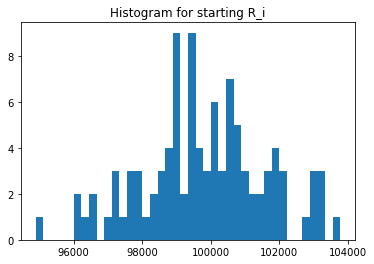

In [22]:
import matplotlib.pyplot as plt
a = starting_Ri.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_i")
plt.show()

In [23]:
experiments.UNI_Qi.unique()

array([201996.5577461 , 198767.09001246, 197612.05563807, 198836.73777557,
       201433.41979024, 200388.64850544, 203911.95947475, 201508.3008214 ,
       201329.31949659, 195449.06267274, 203759.64873892, 202063.43624101,
       199946.02378366, 207547.2919022 , 196671.4744237 , 197607.83541865,
       199099.02061417, 199258.81513095, 200270.26826131, 198693.76672789,
       192206.43227218, 194381.99155529, 197211.68766149, 205948.76232285,
       195623.69283111, 200444.13841788, 199123.32731913, 203940.0990102 ,
       197834.49564824, 198092.6478981 , 198166.08896096, 204166.38934621,
       195814.00663028, 203694.95955916, 193071.40387685, 201379.06857217,
       199537.98758168, 201300.4157378 , 202975.48770611, 197937.83138716,
       200788.91811579, 200686.5803837 , 198003.20728512, 196792.34984566,
       197141.53484327, 204273.07410747, 198799.32417871, 194173.07162628,
       202461.48465812, 205999.20144367, 197892.35510346, 195176.23794053,
       203317.0574681 , 2

In [24]:
experiments.UNI_Si.unique()

array([10000], dtype=int64)

In [25]:
experiments.UNI_Qj.unique()

array([194418.4474541 , 201904.14952918, 200398.96300874, 197996.40227455,
       196600.92827866, 198222.06850876, 203454.75174422, 197747.81243404,
       195291.57119252, 196077.231658  , 197163.19100989, 194032.06930399,
       195796.0226227 , 200274.41256359, 207603.31638219, 193893.14310625,
       196395.68708622, 203172.92928252, 205690.05487723, 195079.09308881,
       211180.94193703, 194471.01880576, 200858.12505511, 203188.96817795,
       204688.0190082 , 208955.66475475, 202518.13993079, 202643.26662457,
       202361.02101812, 196139.41003538, 195113.38003965, 201175.61438211,
       201903.17850891, 201901.7459278 , 201191.35420859, 202098.49027696,
       193672.9508536 , 201004.38478618, 200911.82102208, 201939.03604997,
       195137.12985027, 205296.97880476, 202876.2016126 , 199108.23227827,
       203151.55171495, 194787.8221507 , 200739.82658988, 201042.13295417,
       200931.08249079, 195762.39587696, 196641.67923206, 206296.19078279,
       196356.27137964, 1

In [26]:
experiments.UNI_Rj.unique()

array([ 97209.22372705, 100952.07476459, 100199.48150437,  98998.20113728,
        98300.46413933,  99111.03425438, 101727.37587211,  98873.90621702,
        97645.78559626,  98038.615829  ,  98581.59550495,  97016.03465199,
        97898.01131135, 100137.2062818 , 103801.6581911 ,  96946.57155313,
        98197.84354311, 101586.46464126, 102845.02743862,  97539.54654441,
       105590.47096851,  97235.50940288, 100429.06252756, 101594.48408897,
       102344.0095041 , 104477.83237737, 101259.0699654 , 101321.63331229,
       101180.51050906,  98069.70501769,  97556.69001982, 100587.80719106,
       100951.58925445, 100950.8729639 , 100595.67710429, 101049.24513848,
        96836.4754268 , 100502.19239309, 100455.91051104, 100969.51802499,
        97568.56492513, 102648.48940238, 101438.1008063 ,  99554.11613914,
       101575.77585748,  97393.91107535, 100369.91329494, 100521.06647709,
       100465.5412454 ,  97881.19793848,  98320.83961603, 103148.09539139,
        98178.13568982,  

In [27]:
starting_Rj = experiments[experiments.timestep == 0]
starting_Rj = starting_Rj['UNI_Rj']
starting_Rj.reset_index(drop=True)
starting_Rj.unique()

array([ 97209.22372705,  98998.20113728, 100952.07476459,  98300.46413933,
       101727.37587211,  98873.90621702,  97645.78559626, 100199.48150437,
        98581.59550495,  97898.01131135,  99111.03425438,  96946.57155313,
       103801.6581911 , 100137.2062818 , 102845.02743862,  97539.54654441,
        98197.84354311, 101586.46464126,  97235.50940288, 101594.48408897,
       102344.0095041 , 104477.83237737, 101321.63331229,  98038.615829  ,
       101259.0699654 , 101180.51050906,  98069.70501769,  97016.03465199,
       100429.06252756, 100595.67710429, 100950.8729639 ,  96836.4754268 ,
       100502.19239309, 100455.91051104, 102648.48940238, 101575.77585748,
       101438.1008063 ,  97393.91107535,  97556.69001982,  99554.11613914,
       100369.91329494, 101049.24513848, 100521.06647709, 100465.5412454 ,
       103148.09539139,  98320.83961603,  98445.85349378,  98178.13568982,
       100587.80719106,  97881.19793848, 100969.51802499, 100695.23274396,
       101640.17738244,  

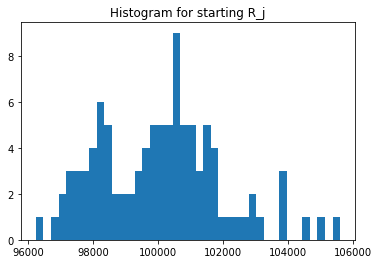

In [28]:
a = starting_Rj.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_j")
plt.show()

In [29]:
experiments.UNI_Sj.unique()

array([10000], dtype=int64)

In [30]:
experiments.UNI_ij.unique()

array([100998.27887305,  99383.54500623,  98806.02781904,  99418.36888778,
       100716.70989512, 100194.32425272, 101955.97973737, 100754.1504107 ,
       100664.65974829,  97724.53133637, 101879.82436946, 101031.7181205 ,
        99973.01189183, 103773.6459511 ,  98335.73721185,  98803.91770933,
        99549.51030708,  99629.40756547, 100135.13413065,  99346.88336395,
        96103.21613609,  97190.99577765,  98605.84383074, 102974.38116142,
        97811.84641555, 100222.06920894,  99561.66365956, 101970.0495051 ,
        98917.24782412,  99046.32394905,  99083.04448048, 102083.1946731 ,
        97907.00331514, 101847.47977958,  96535.70193842, 100689.53428609,
        99768.99379084, 100650.2078689 , 101487.74385306,  98968.91569358,
       100394.45905789, 100343.29019185,  99001.60364256,  98396.17492283,
        98570.76742164, 102136.53705374,  99399.66208935,  97086.53581314,
       101230.74232906, 102999.60072183,  98946.17755173,  97588.11897026,
       101658.52873405, 1

In [31]:
experiments.UNI_ji.unique()

array([ 97209.22372705, 100952.07476459, 100199.48150437,  98998.20113728,
        98300.46413933,  99111.03425438, 101727.37587211,  98873.90621702,
        97645.78559626,  98038.615829  ,  98581.59550495,  97016.03465199,
        97898.01131135, 100137.2062818 , 103801.6581911 ,  96946.57155313,
        98197.84354311, 101586.46464126, 102845.02743862,  97539.54654441,
       105590.47096851,  97235.50940288, 100429.06252756, 101594.48408897,
       102344.0095041 , 104477.83237737, 101259.0699654 , 101321.63331229,
       101180.51050906,  98069.70501769,  97556.69001982, 100587.80719106,
       100951.58925445, 100950.8729639 , 100595.67710429, 101049.24513848,
        96836.4754268 , 100502.19239309, 100455.91051104, 100969.51802499,
        97568.56492513, 102648.48940238, 101438.1008063 ,  99554.11613914,
       101575.77585748,  97393.91107535, 100369.91329494, 100521.06647709,
       100465.5412454 ,  97881.19793848,  98320.83961603, 103148.09539139,
        98178.13568982,  

In [32]:
experiments.UNI_Sij.unique()

array([9.81796429e+09, 1.00329751e+10, 9.90031276e+09, 9.84223968e+09,
       9.90049933e+09, 9.93036310e+09, 1.03717143e+10, 9.96195642e+09,
       9.82947978e+09, 9.58077778e+09, 1.00434756e+10, 9.80169667e+09,
       9.78715905e+09, 1.03916030e+10, 1.02074126e+10, 9.57870108e+09,
       9.77554724e+09, 1.01209993e+10, 1.02984006e+10, 9.69024995e+09,
       1.01475839e+10, 9.45041598e+09, 9.90289246e+09, 1.04616291e+10,
       1.00104565e+10, 1.04709845e+10, 1.00815215e+10, 1.03317720e+10,
       1.00084976e+10, 9.71344377e+09, 9.66621386e+09, 1.02683247e+10,
       9.88386758e+09, 1.02815920e+10, 9.71107430e+09, 1.01746014e+10,
       9.66127772e+09, 1.01155666e+10, 1.01950437e+10, 9.99284372e+09,
       9.79534330e+09, 1.03000872e+10, 1.00425347e+10, 9.79574423e+09,
       1.00124022e+10, 9.94747681e+09, 9.97673547e+09, 9.75924212e+09,
       1.01702013e+10, 1.00817243e+10, 9.72847125e+09, 1.00660286e+10,
       9.98064483e+09, 9.88579074e+09, 9.99227694e+09, 9.89760437e+09,
      

In [33]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

# Agent sequences

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


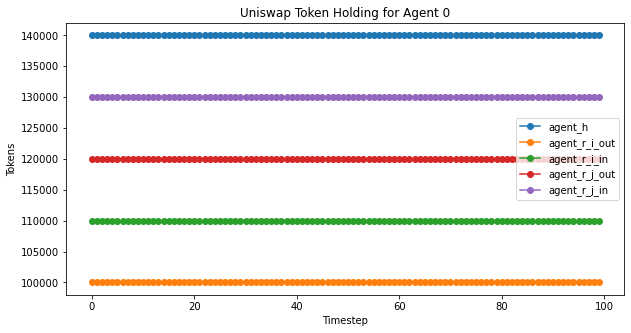

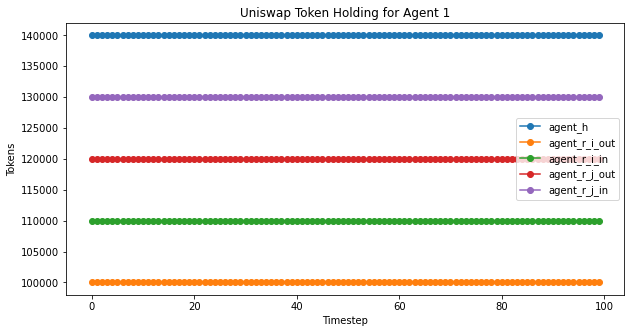

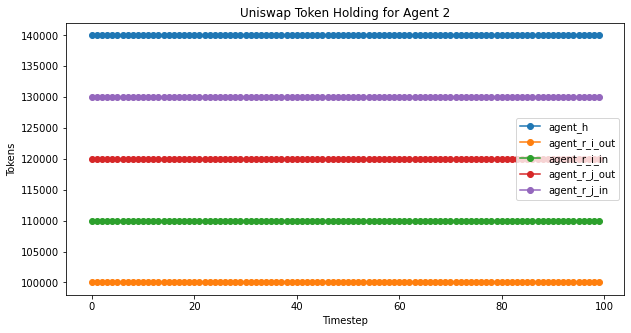

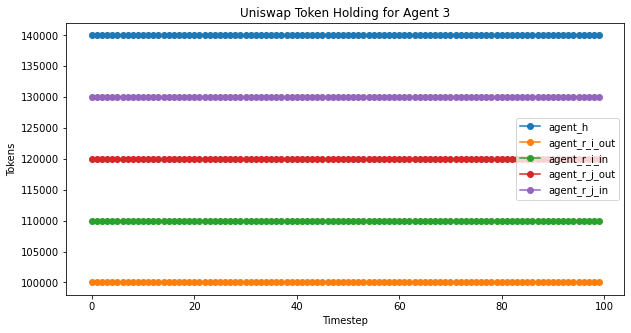

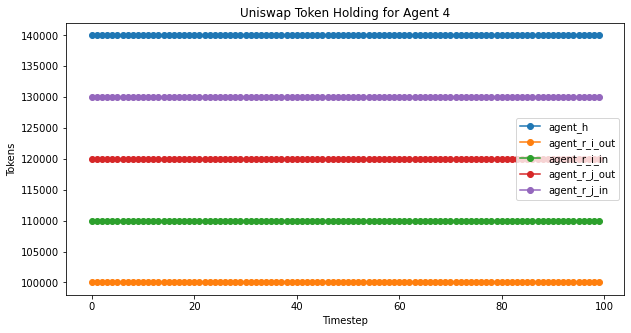

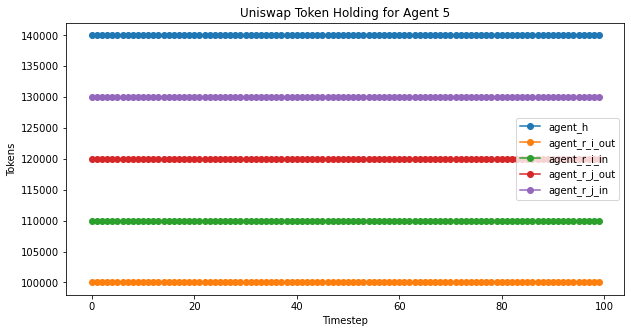

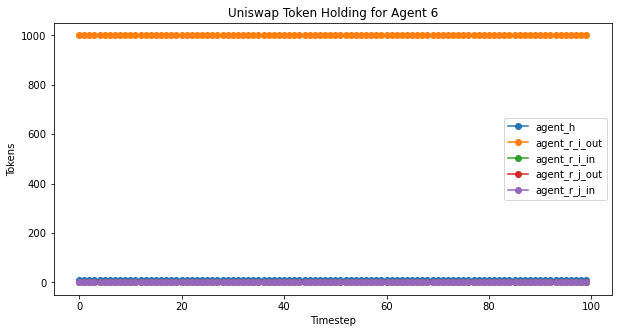

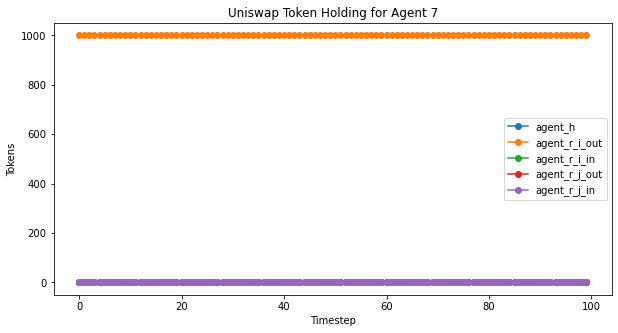

In [34]:
agent_plot(experiment2,'Uniswap Token Holding for Agent ', 100) #,4,'j')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


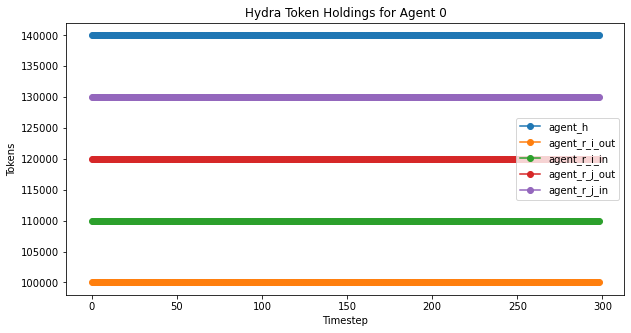

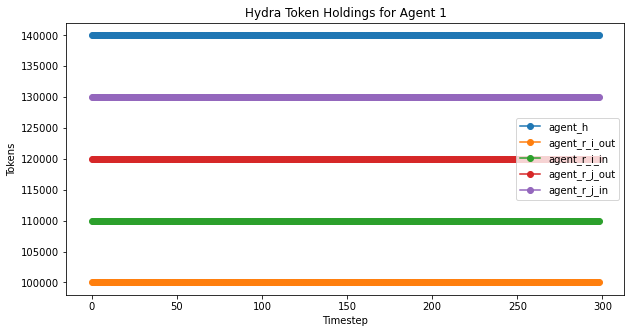

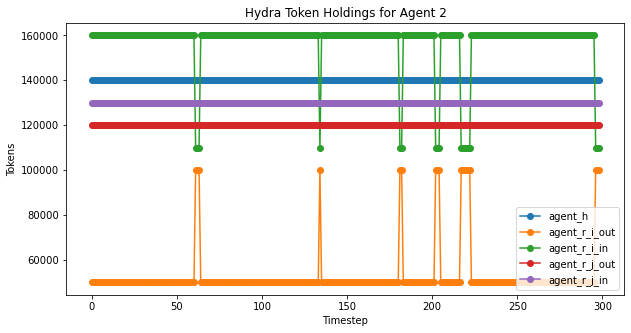

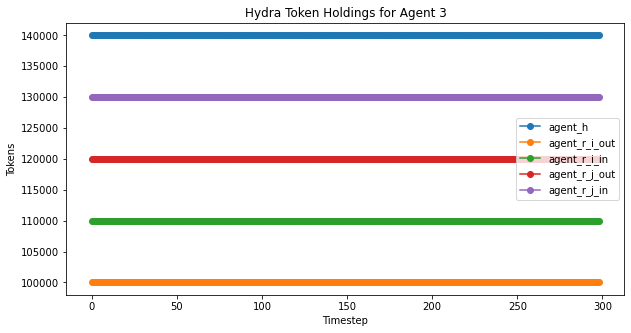

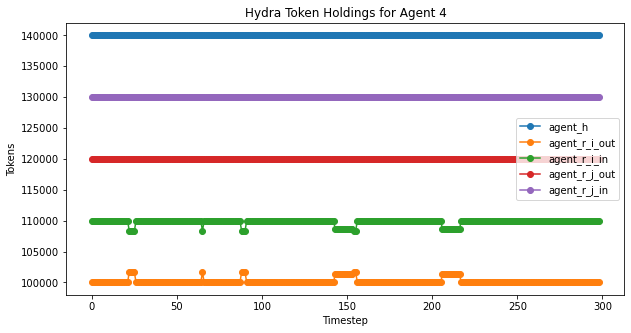

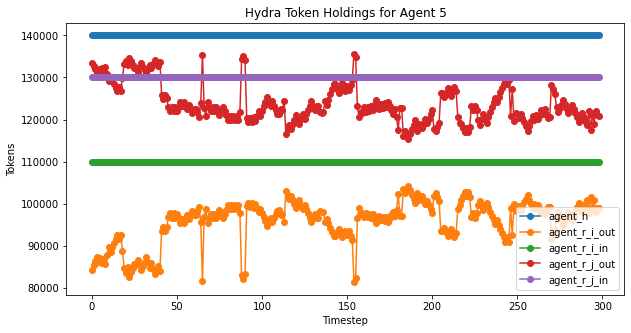

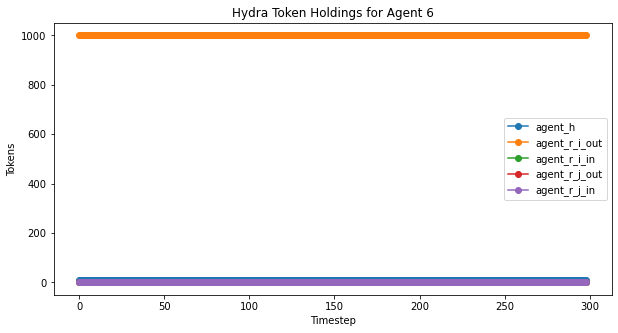

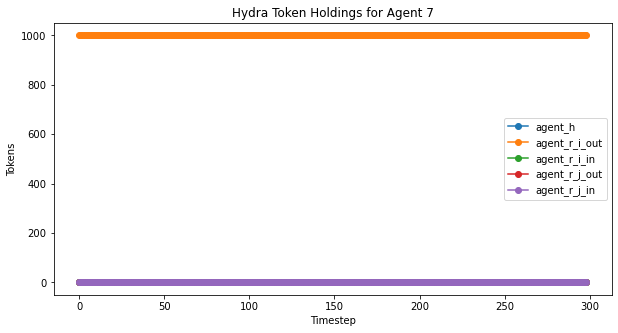

In [35]:
hydra_agent_plot(experiments,'Hydra Token Holdings for Agent ', 299)

# Liquidity dynamics

Movement of the Uniswap variables

- 'UNI_Ri', 'UNI_Qi', 'UNI_Si'
- 'UNI_Rj', 'UNI_Qj', 'UNI_Sj'
- 'UNI_ij', 'UNI_ji', 'UNI_Sij'

## Uniswap -- Ri-Q instance

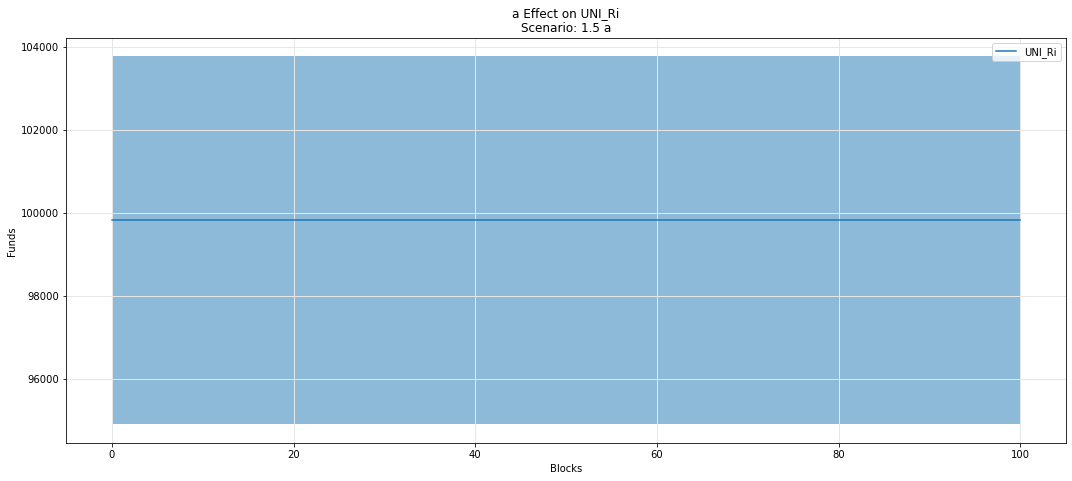

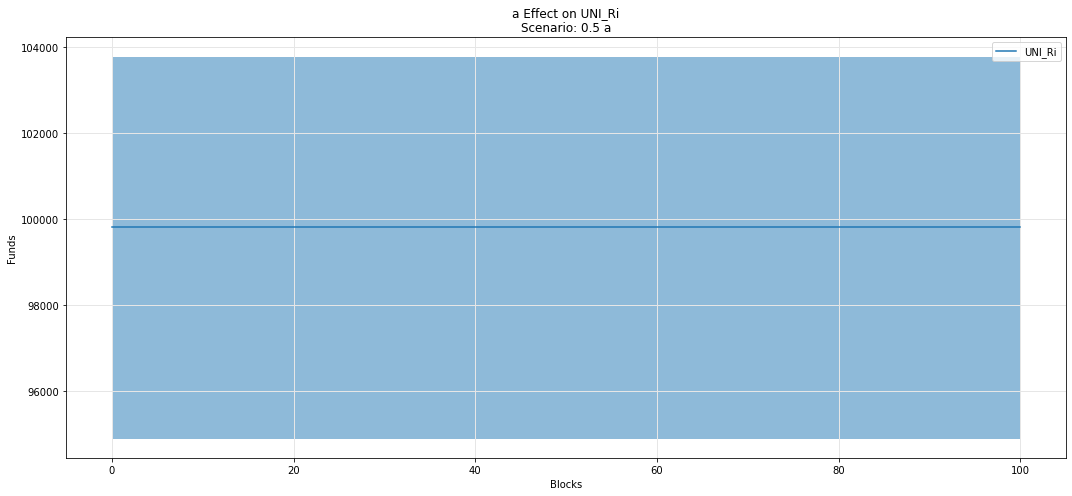

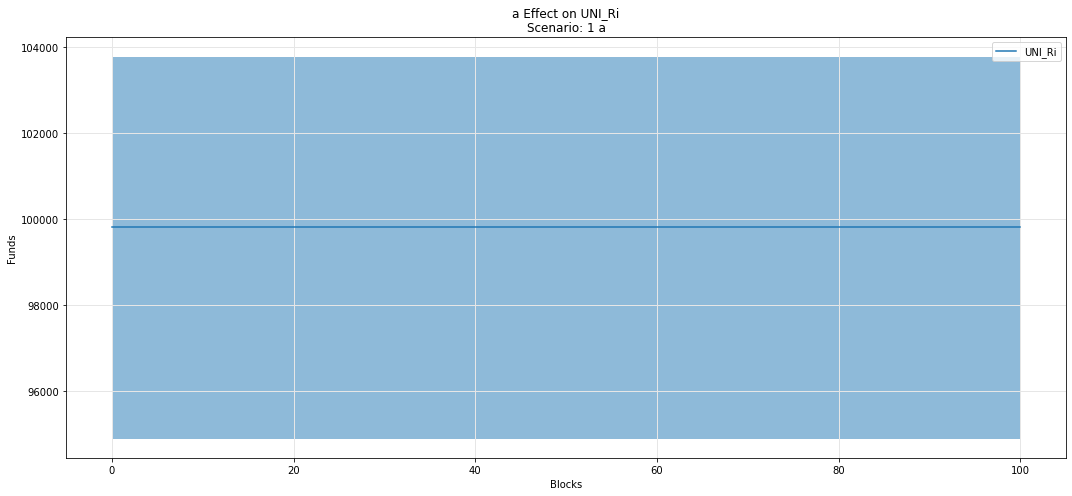

In [36]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Ri')

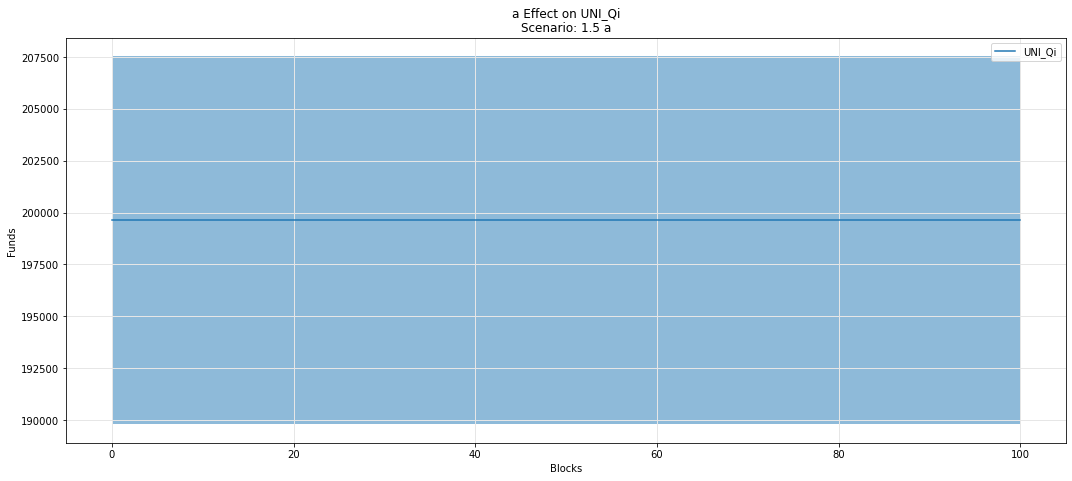

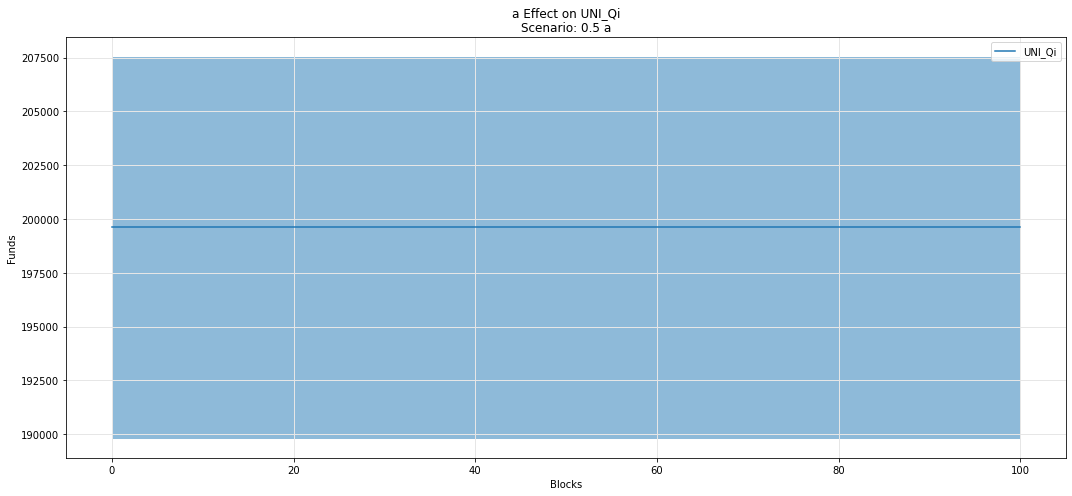

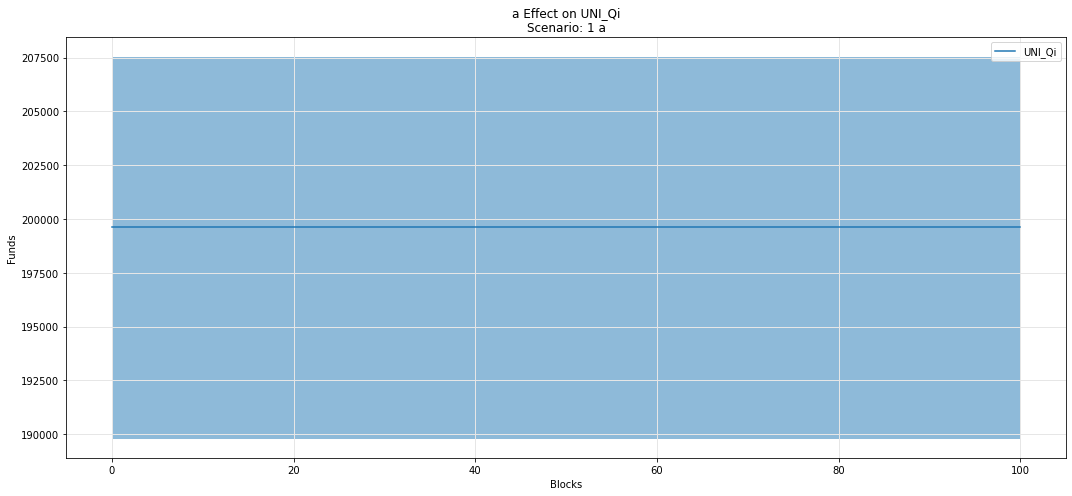

In [37]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qi')

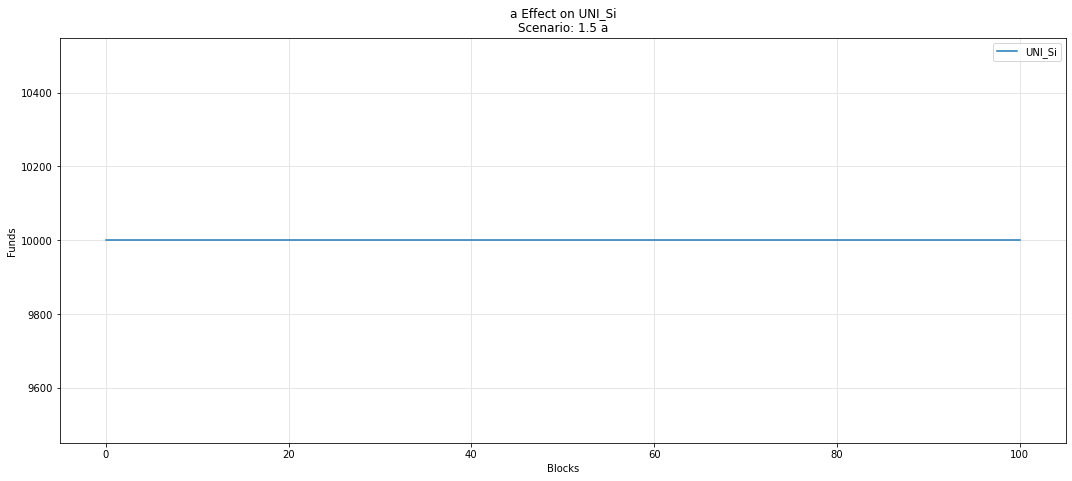

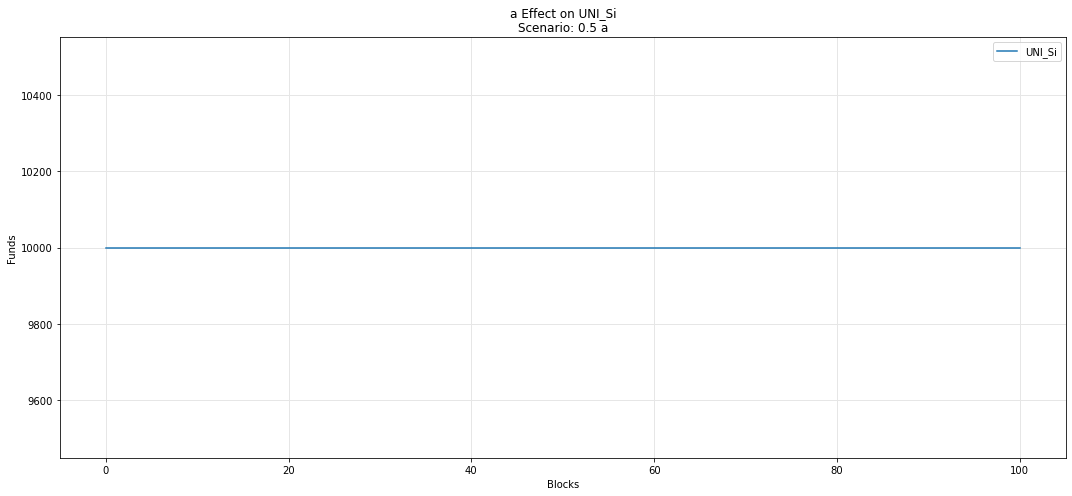

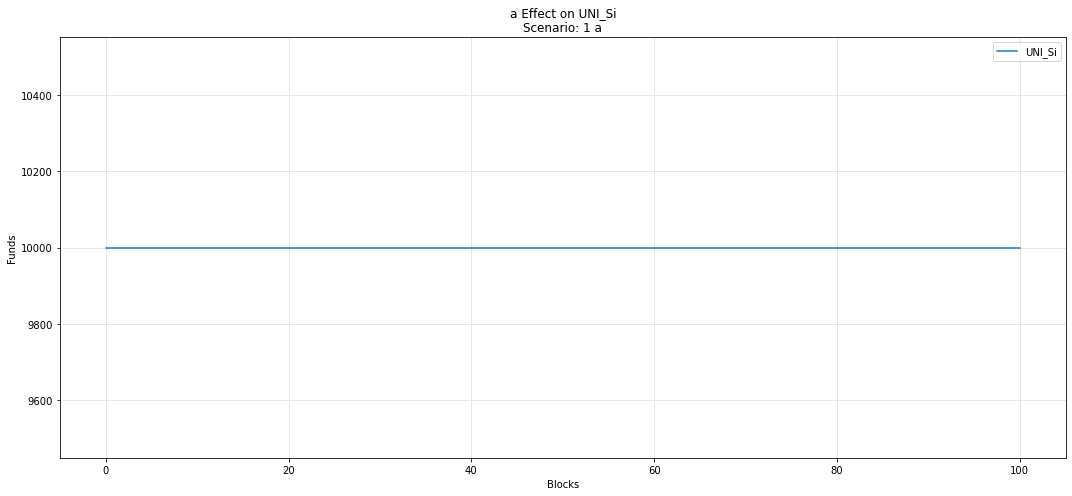

In [38]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Si')

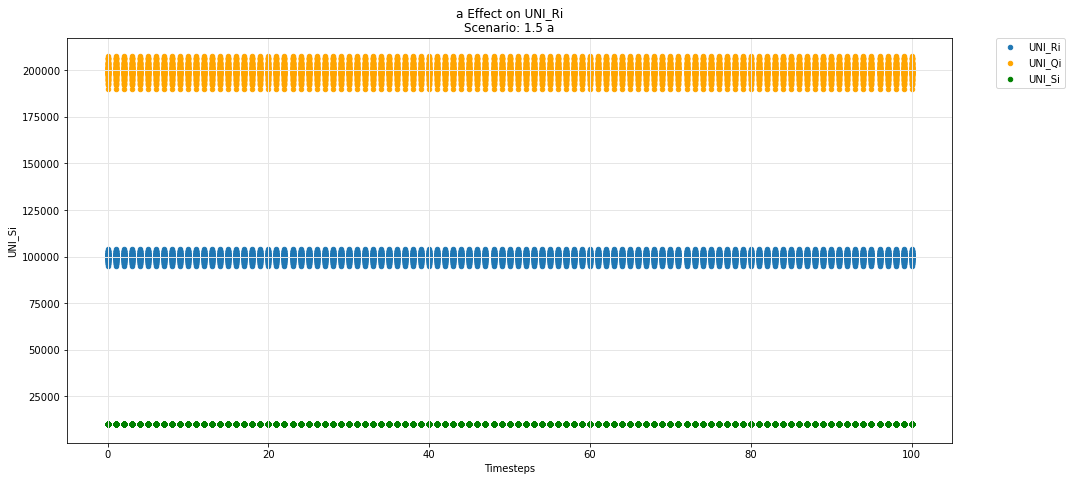

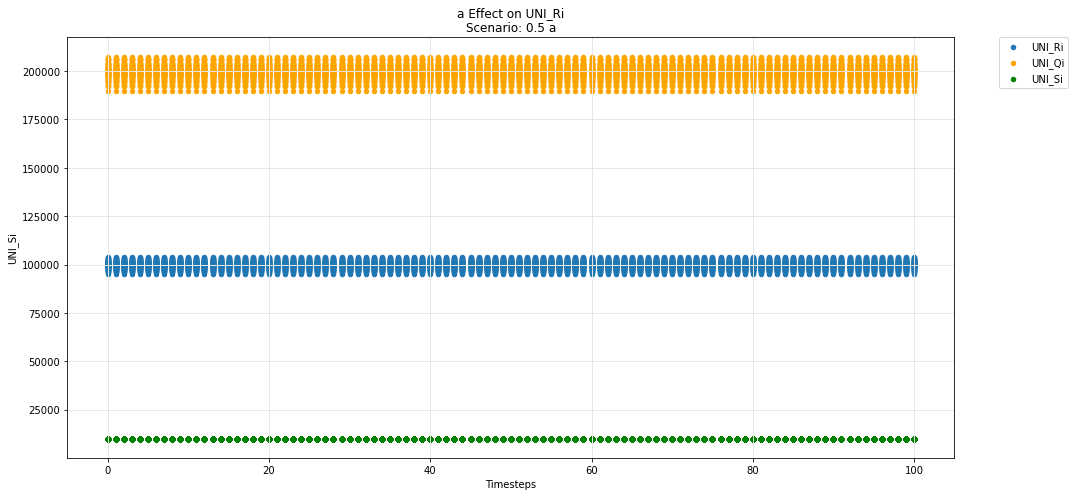

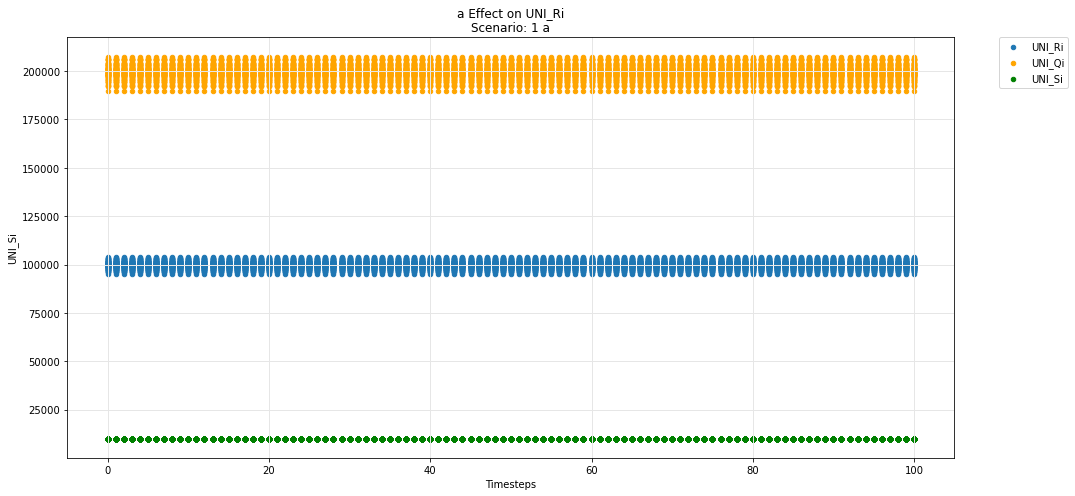

In [39]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Ri', 'UNI_Qi', 'UNI_Si')

## Uniswap -- Rj-Q instance

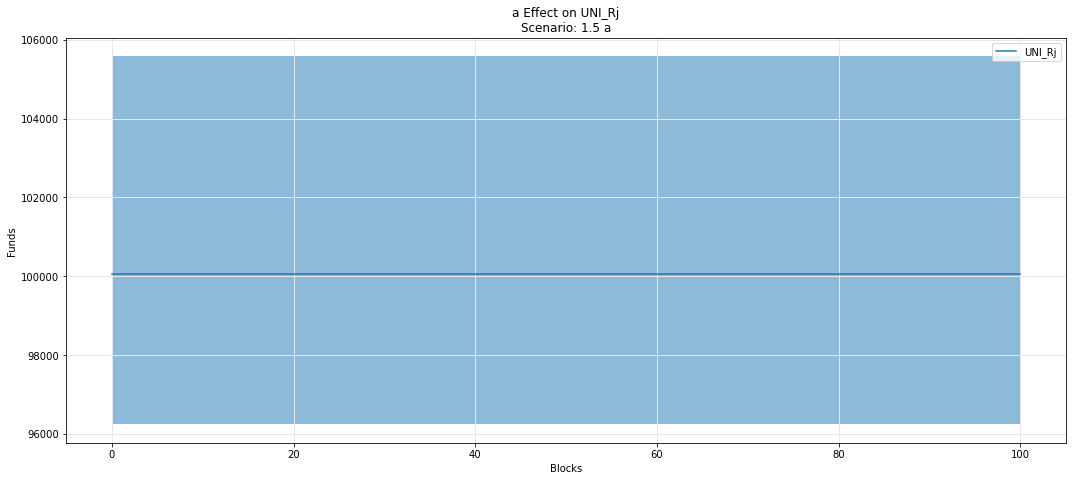

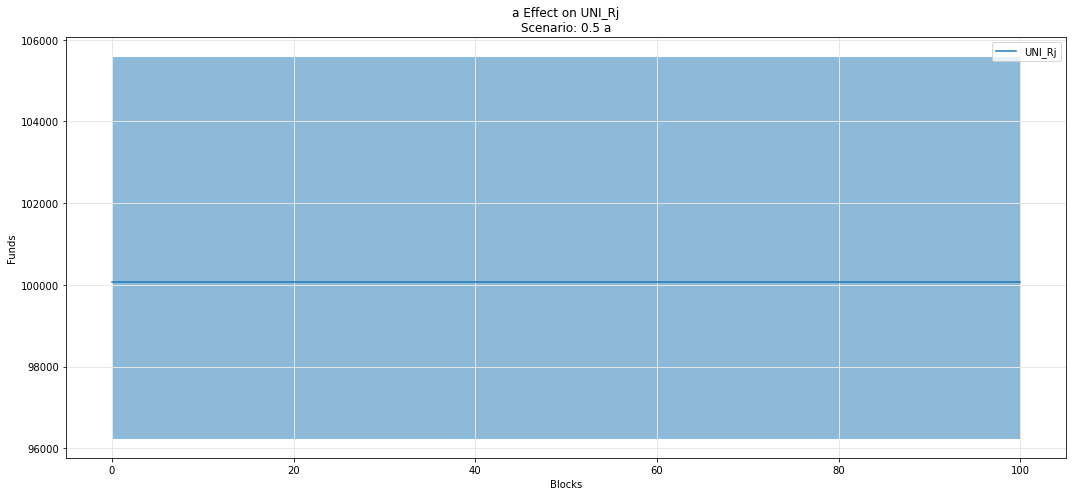

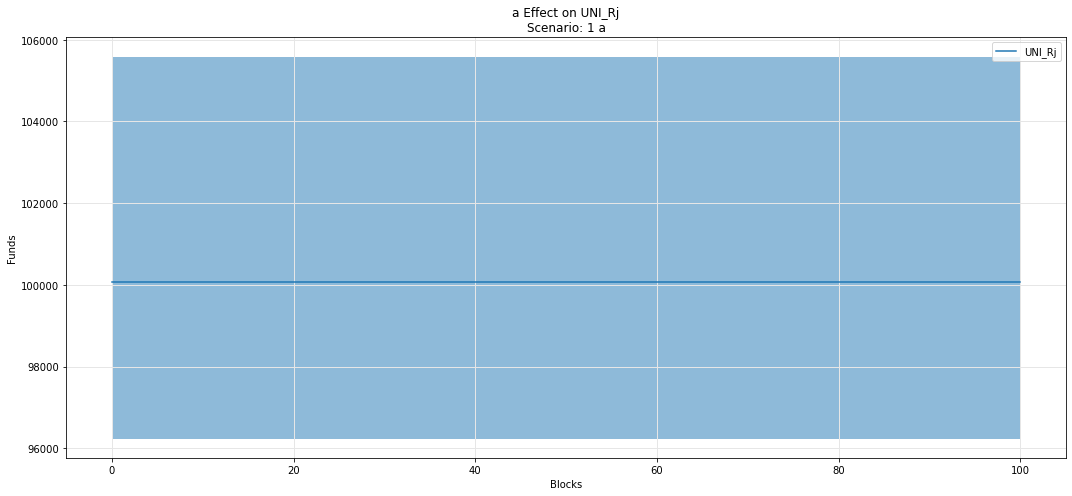

In [40]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Rj')

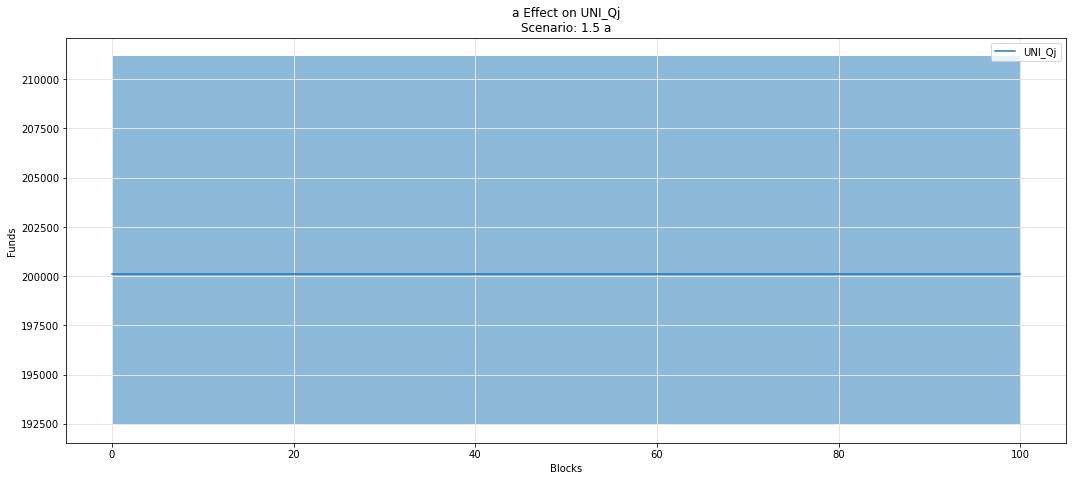

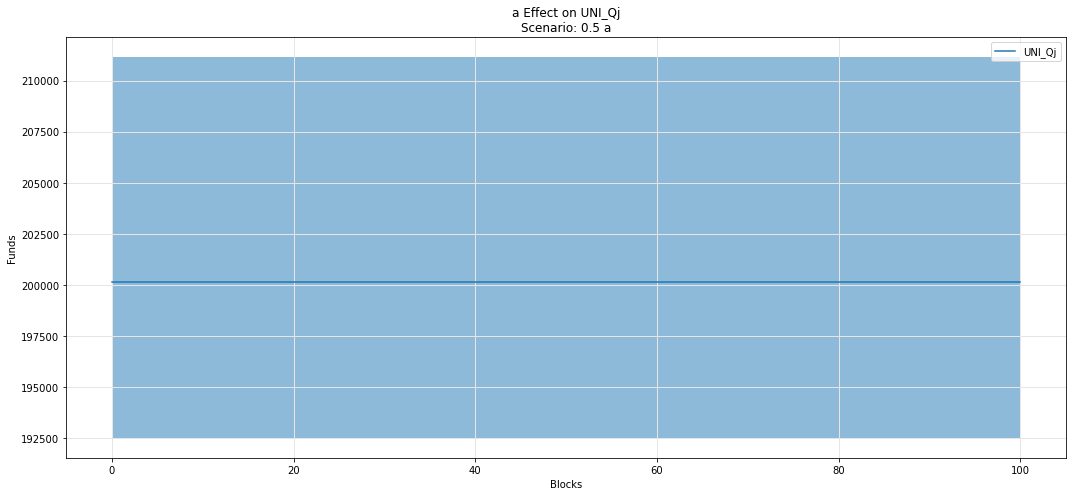

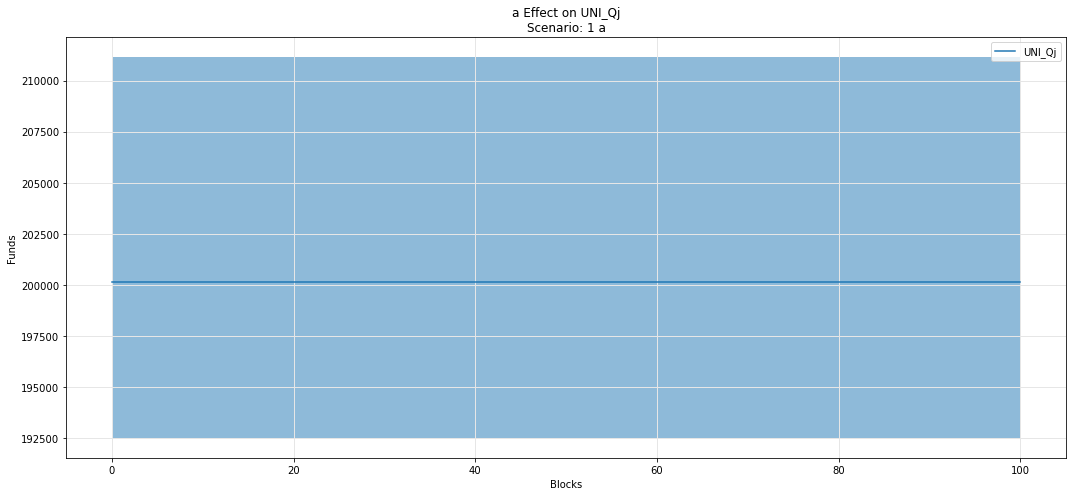

In [41]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qj')

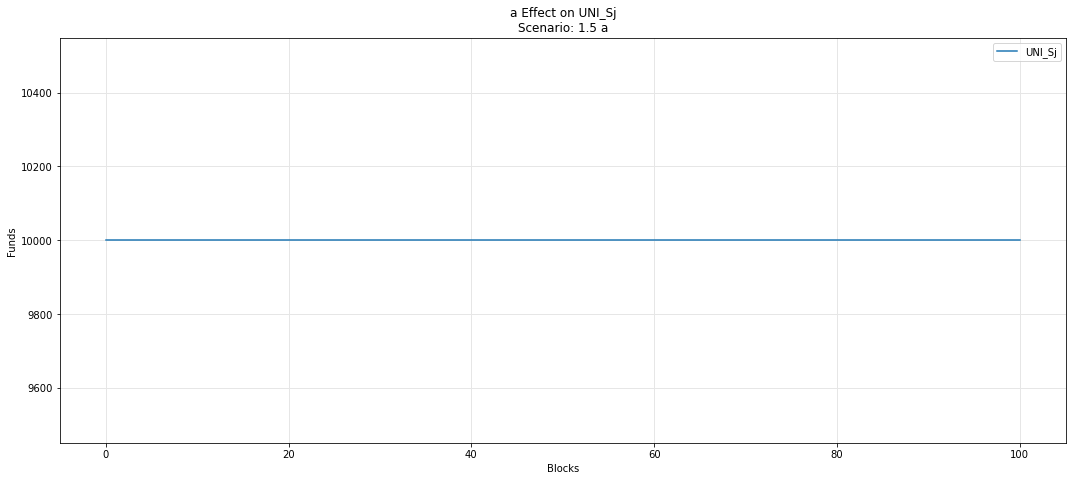

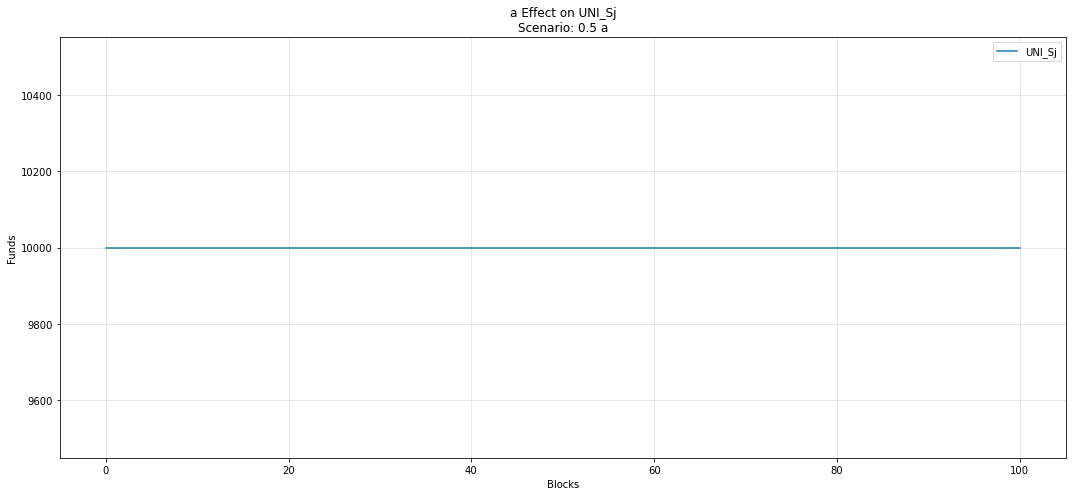

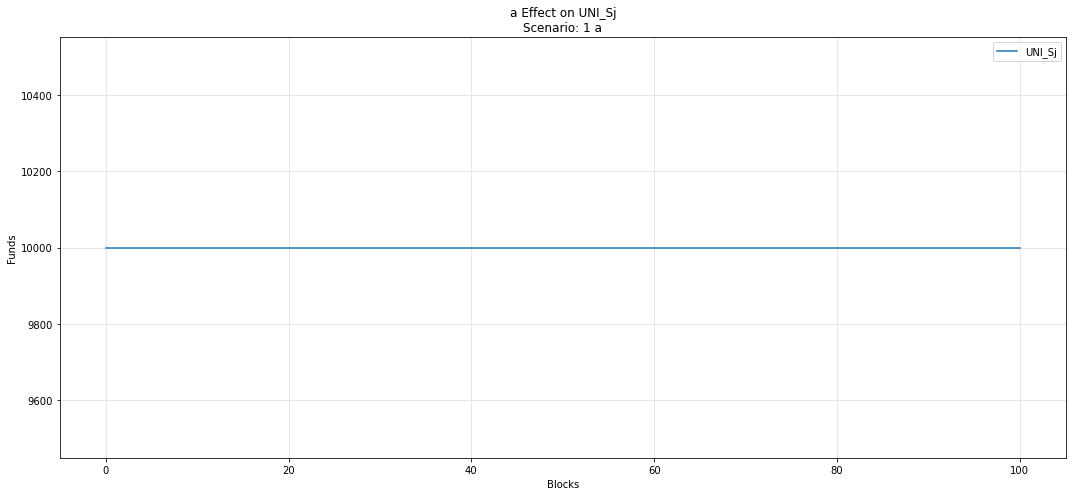

In [42]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sj')

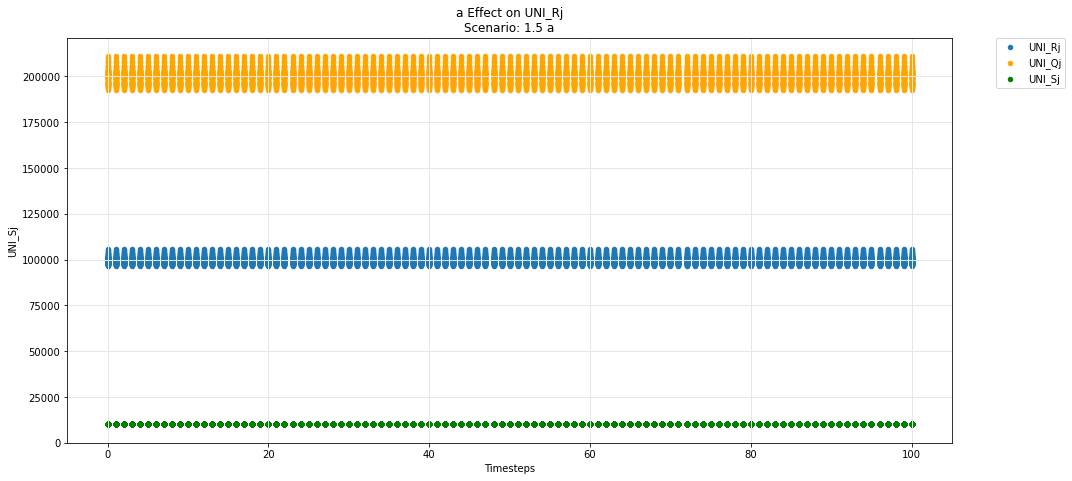

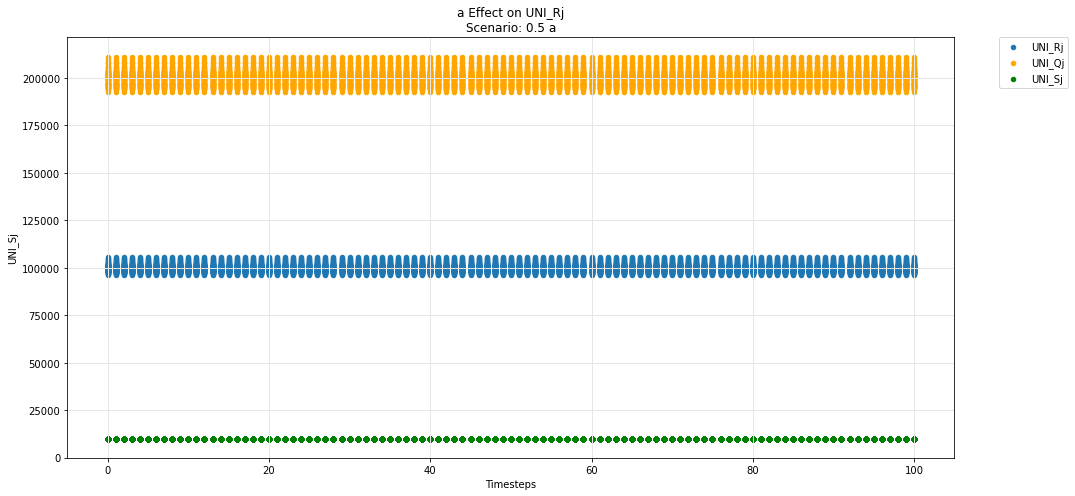

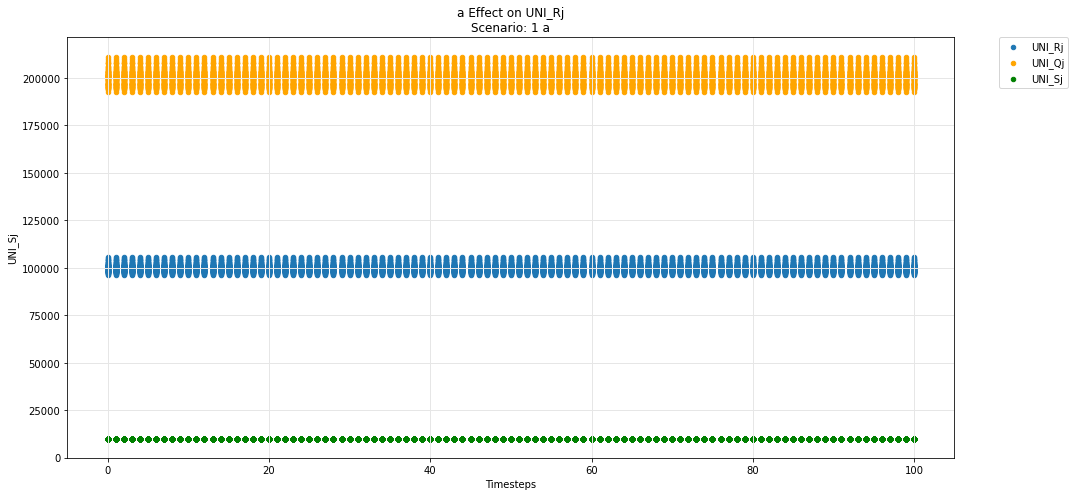

In [43]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Rj', 'UNI_Qj', 'UNI_Sj')

## Uniswap -- ij-Q instance

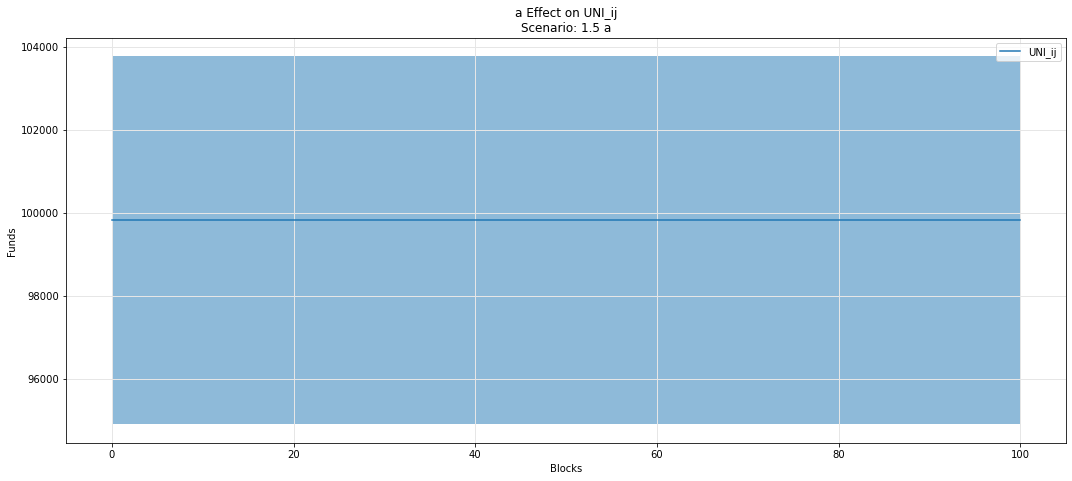

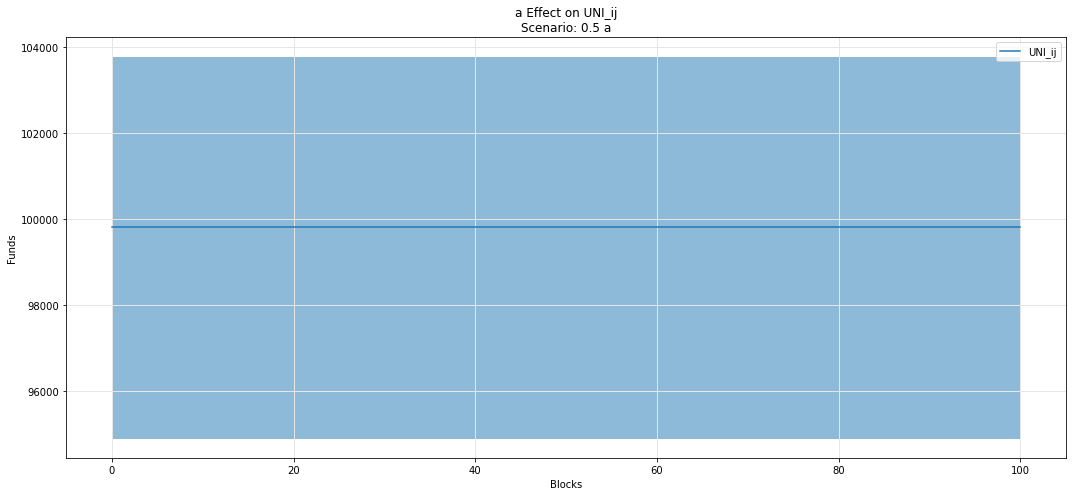

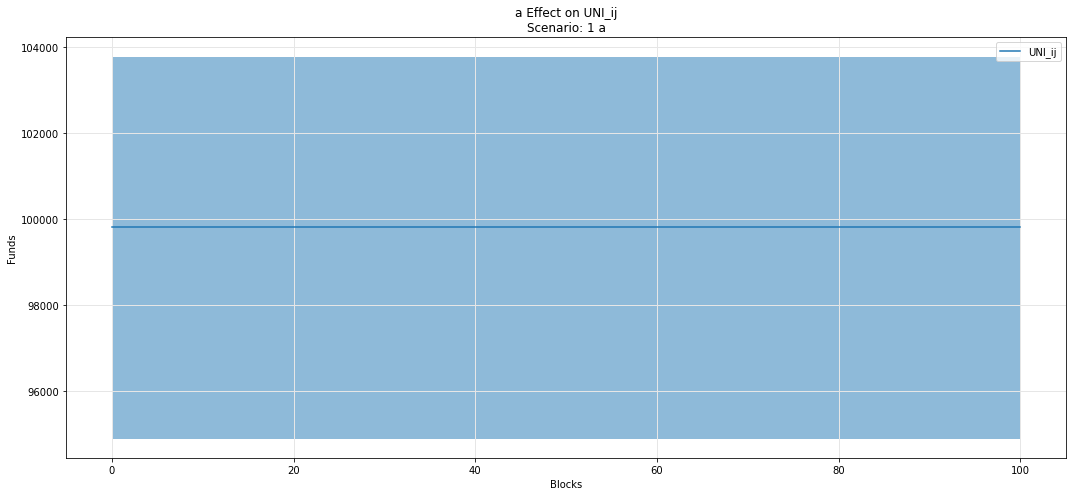

In [44]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ij')

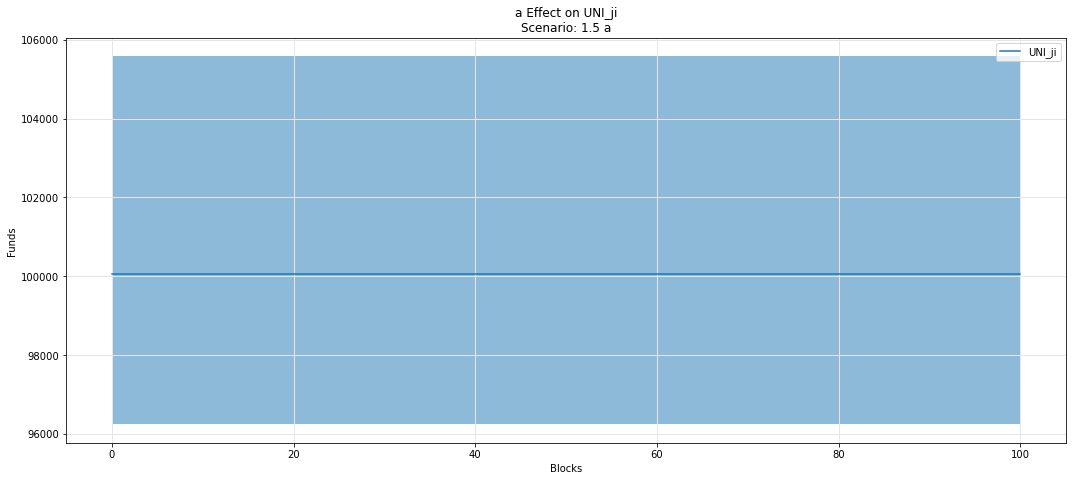

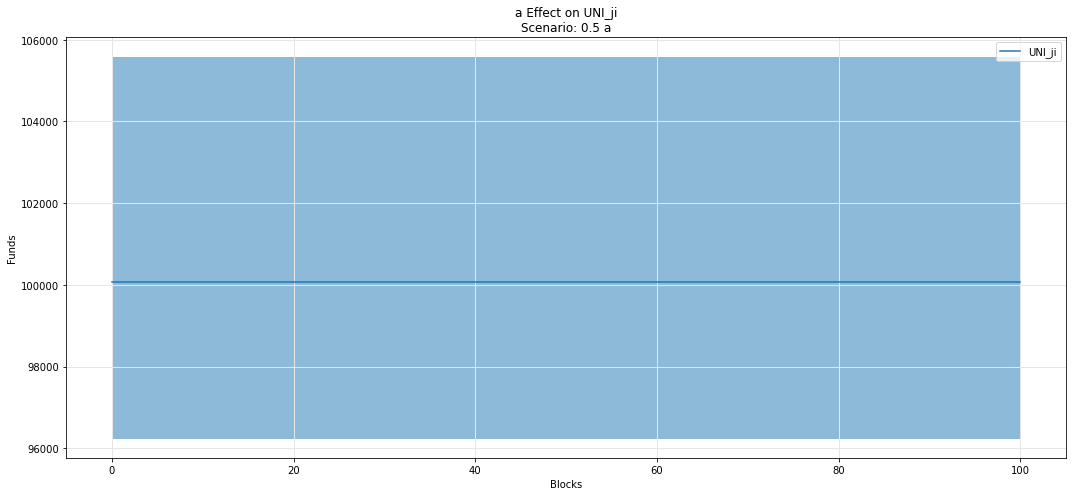

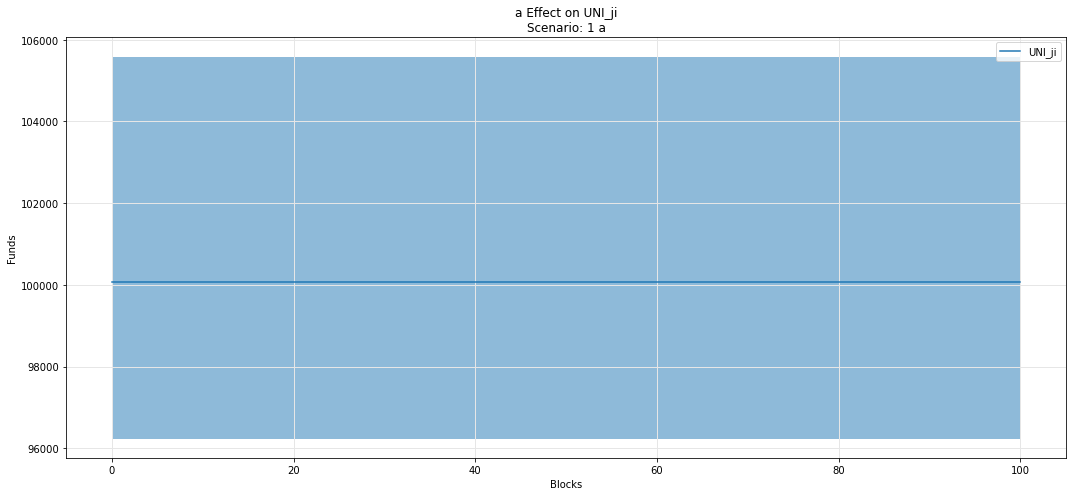

In [45]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ji')

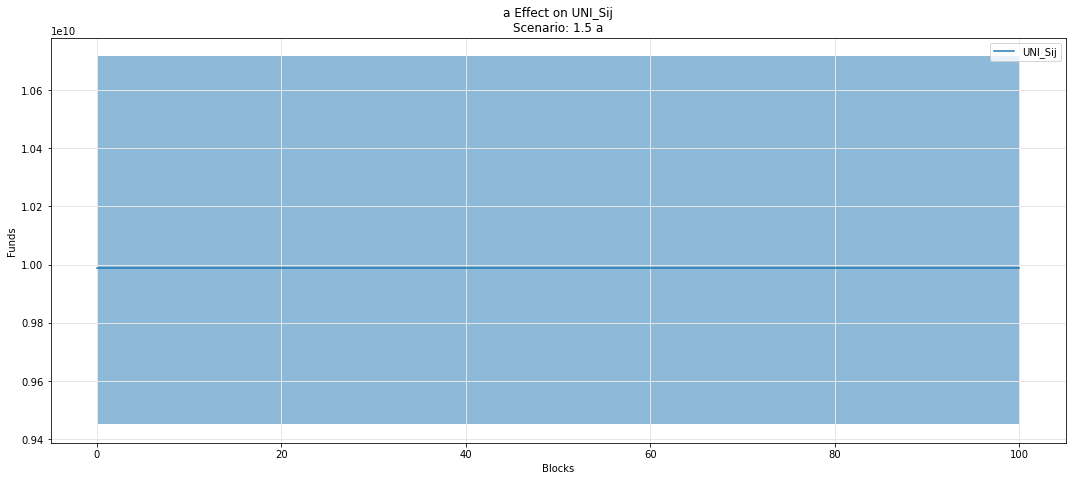

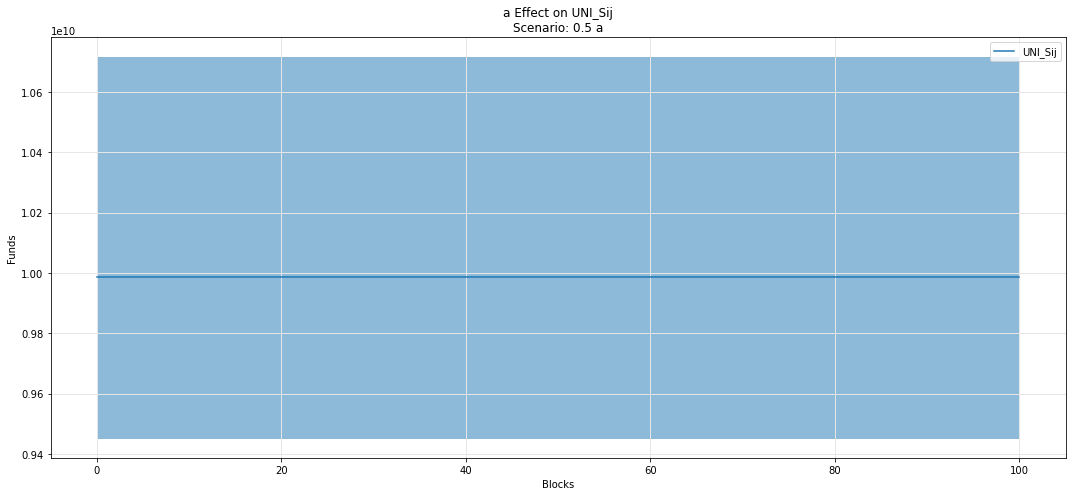

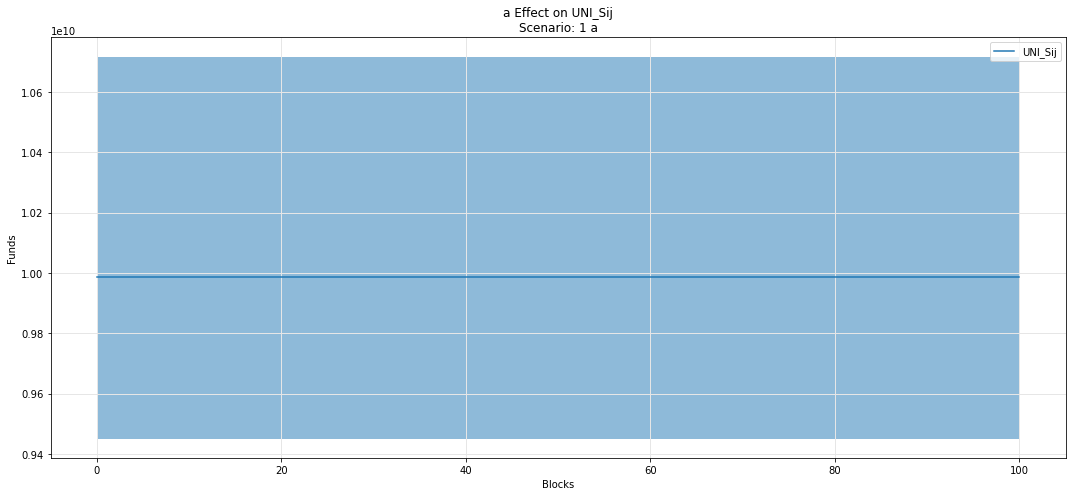

In [46]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sij')

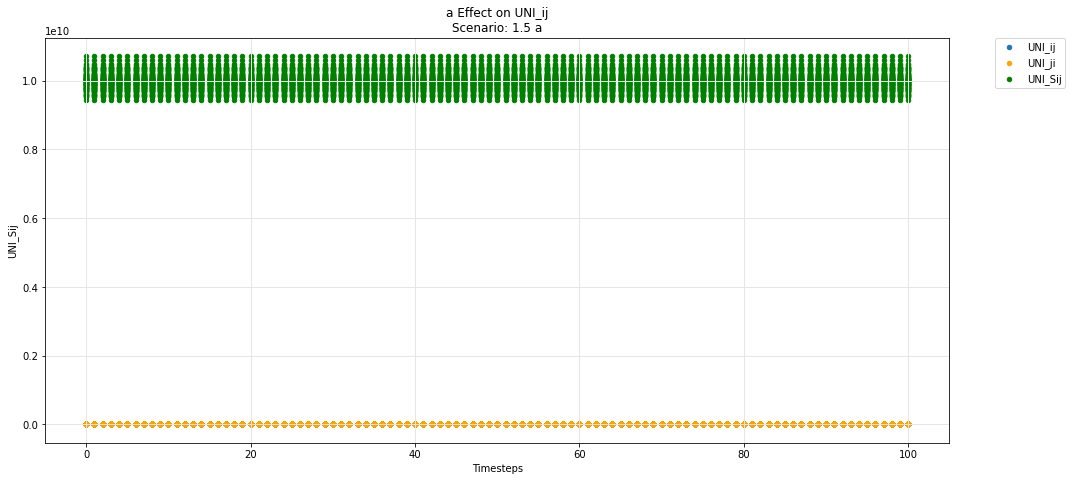

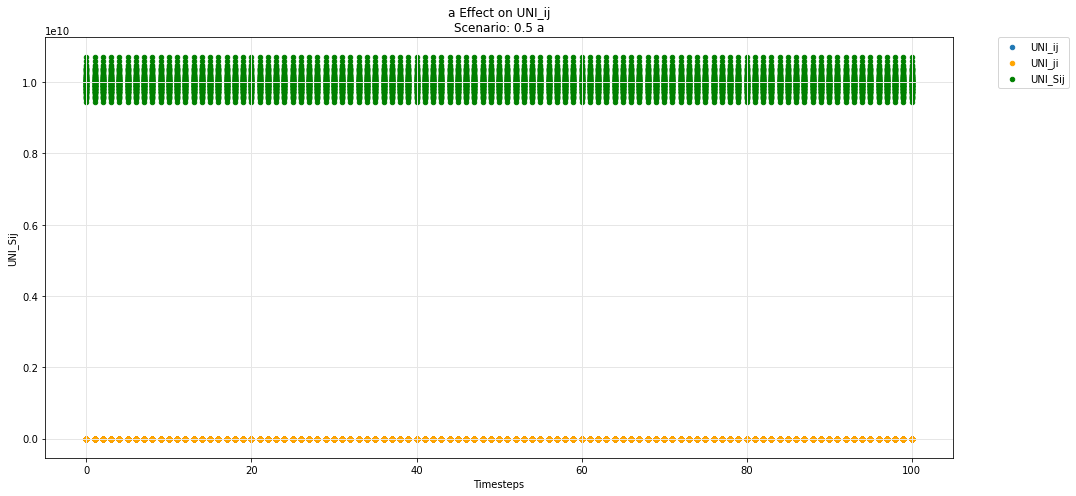

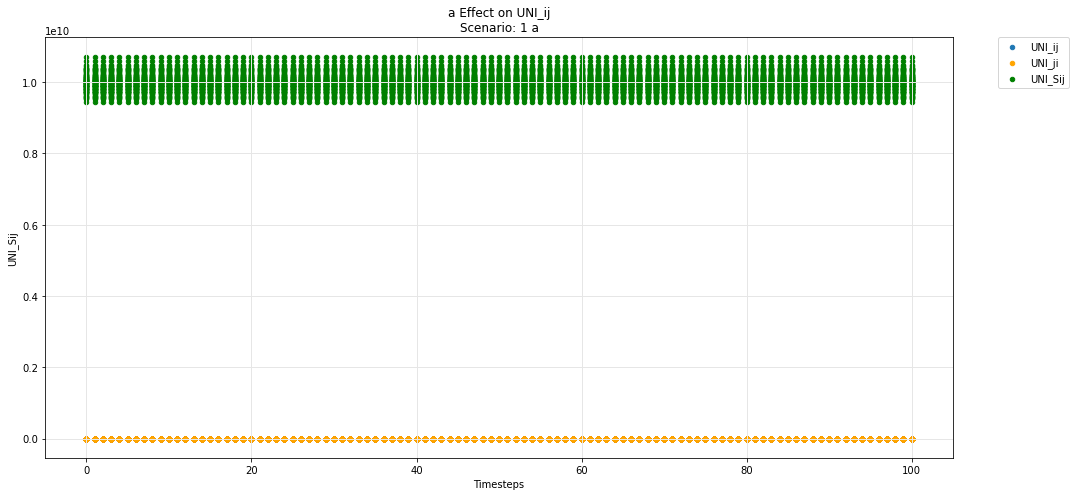

In [47]:
param_test_plot(experiments, config_ids, 'a', 'UNI_ij', 'UNI_ji', 'UNI_Sij')

## Hydra -- base

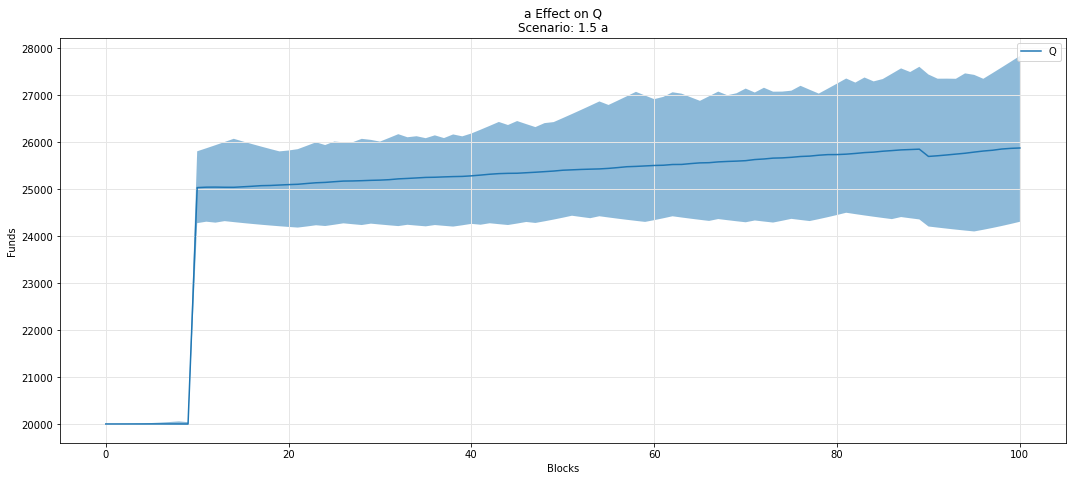

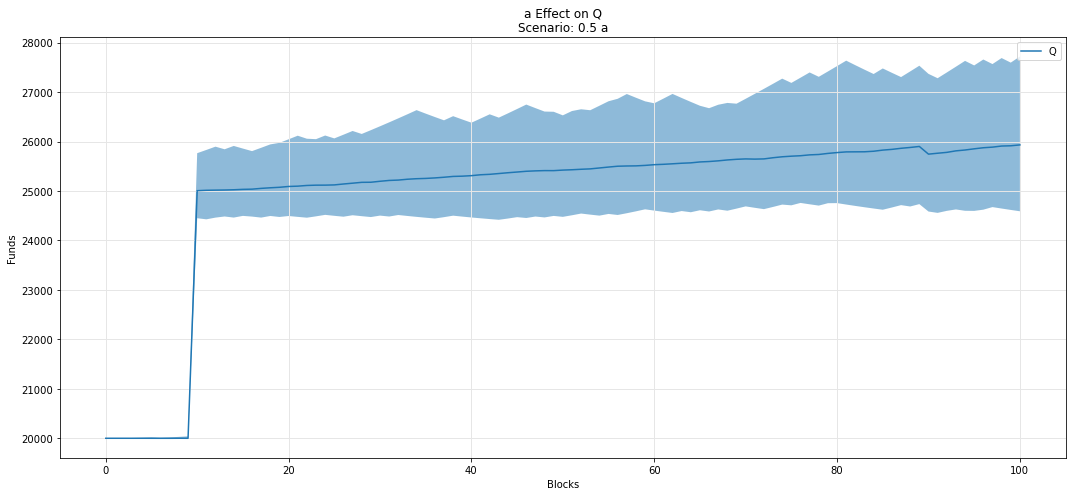

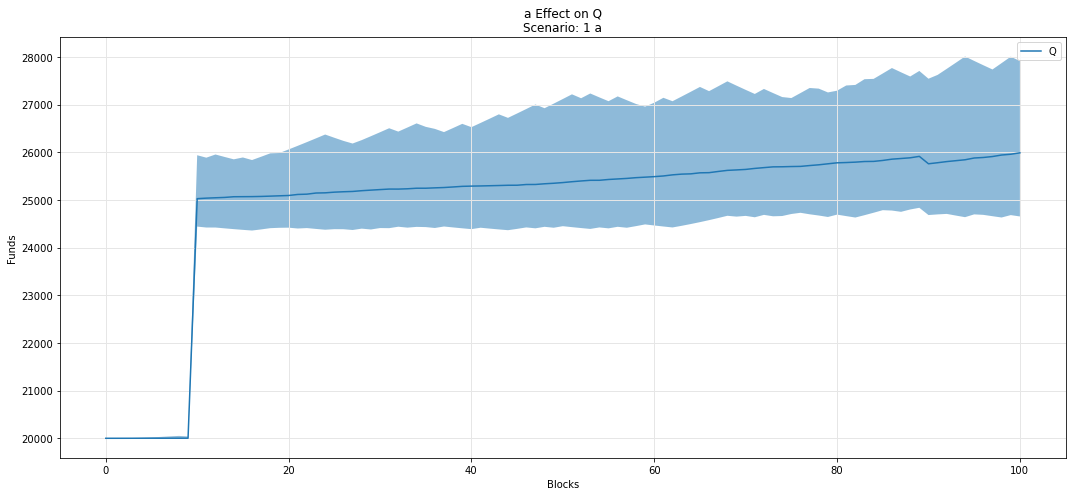

In [48]:
param_fan_plot3(experiments, config_ids, 'a','Q')

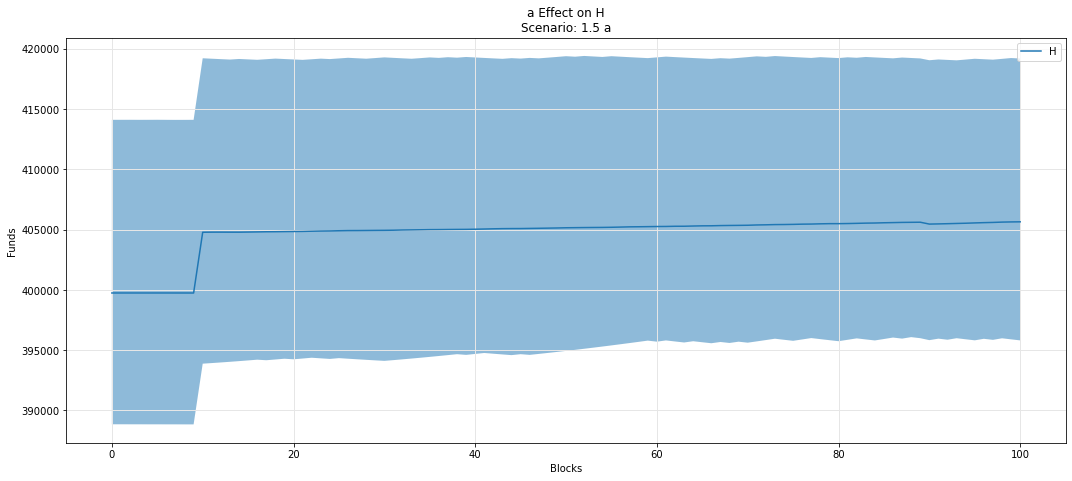

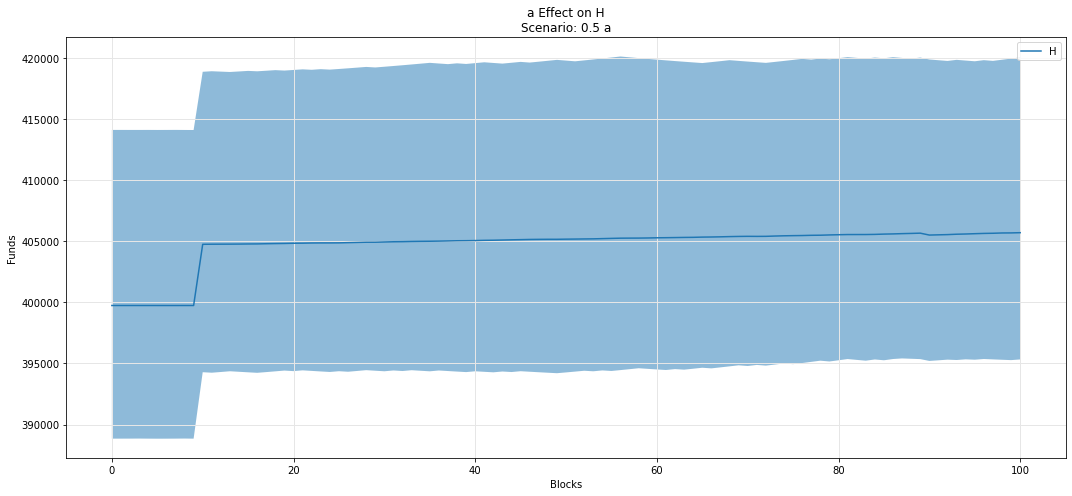

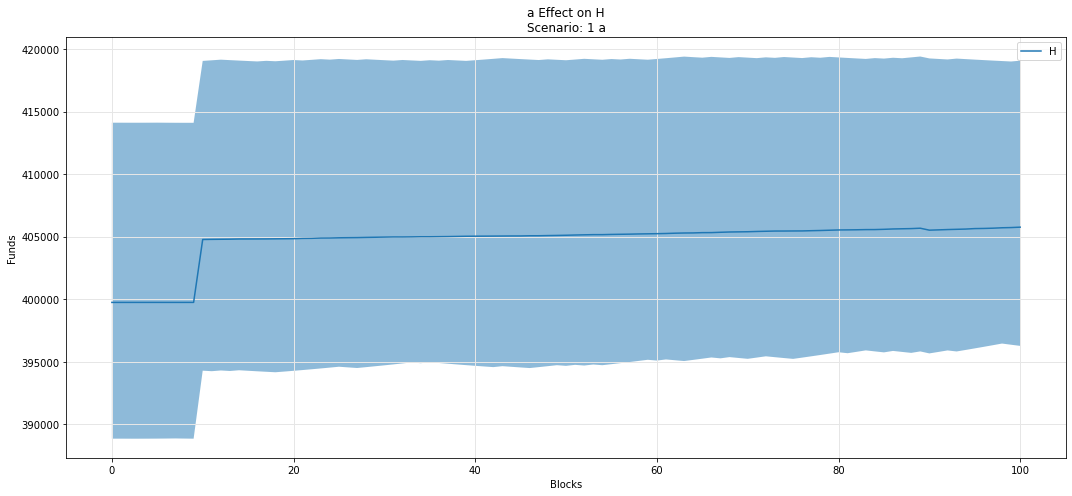

In [49]:
param_fan_plot3(experiments, config_ids, 'a','H')

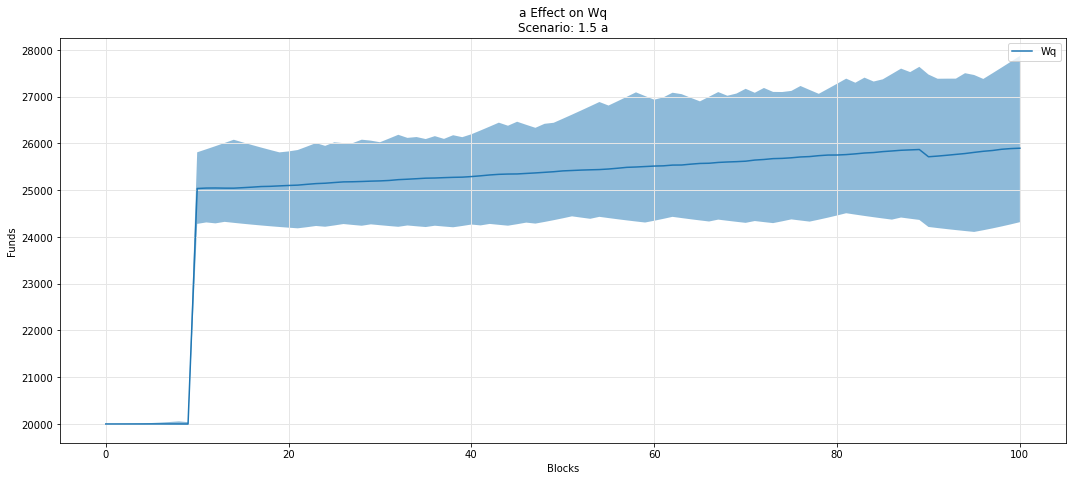

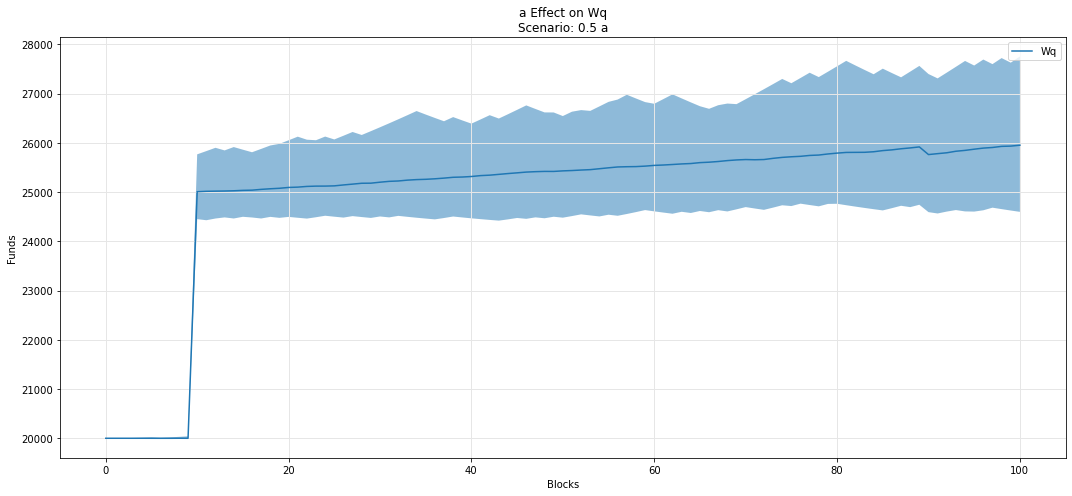

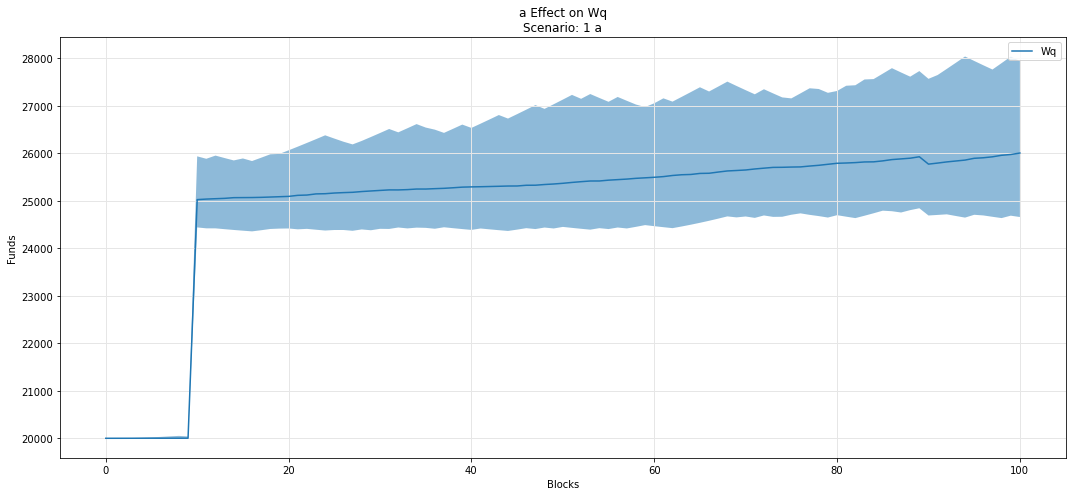

In [50]:
param_fan_plot3(experiments, config_ids, 'a','Wq')

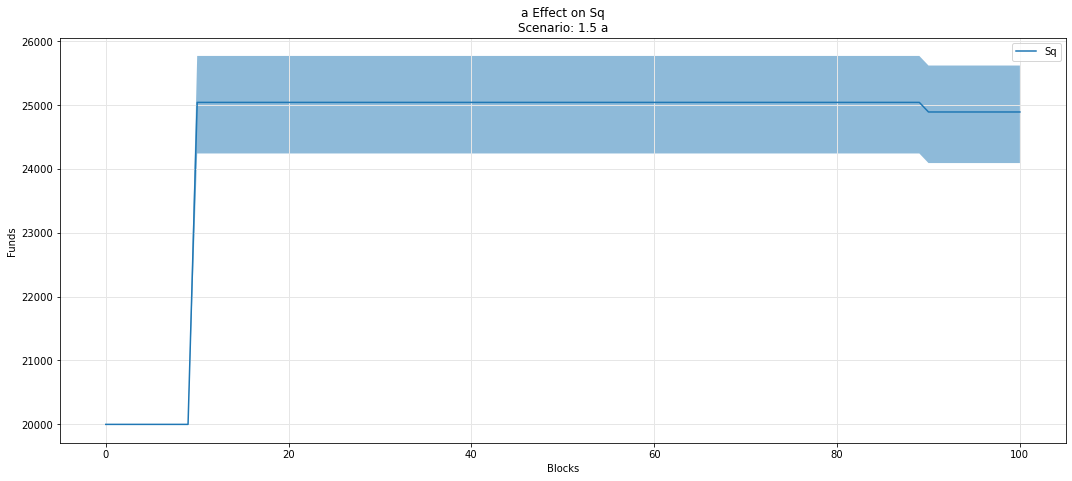

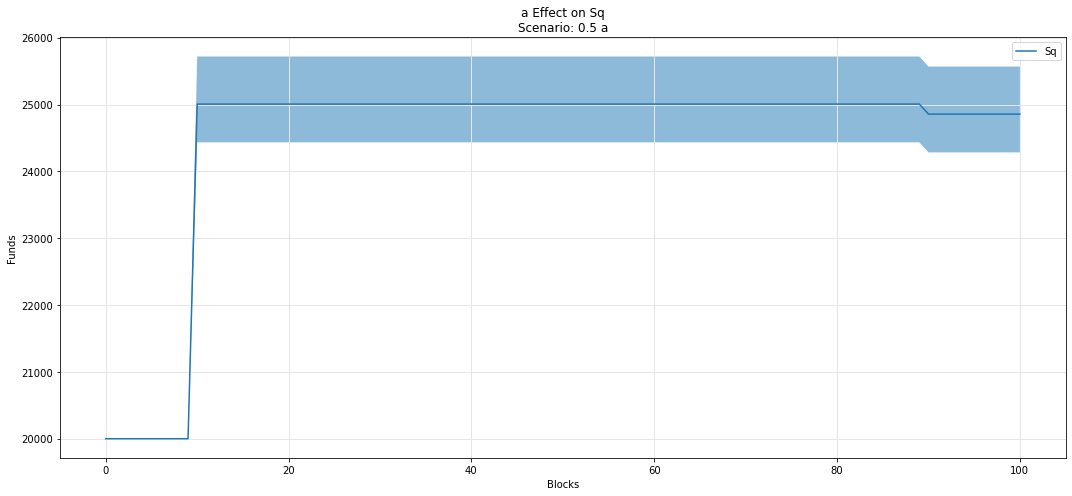

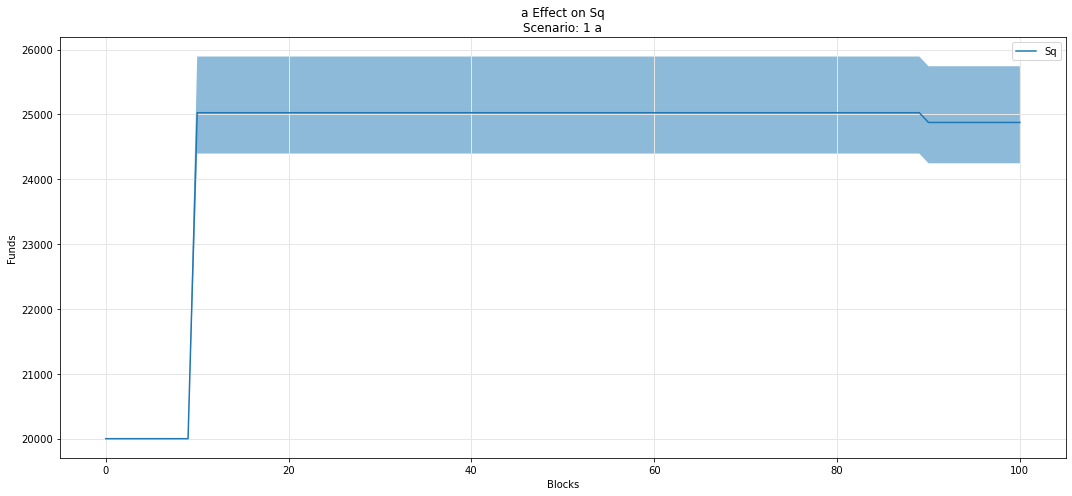

In [51]:
param_fan_plot3(experiments, config_ids, 'a','Sq')

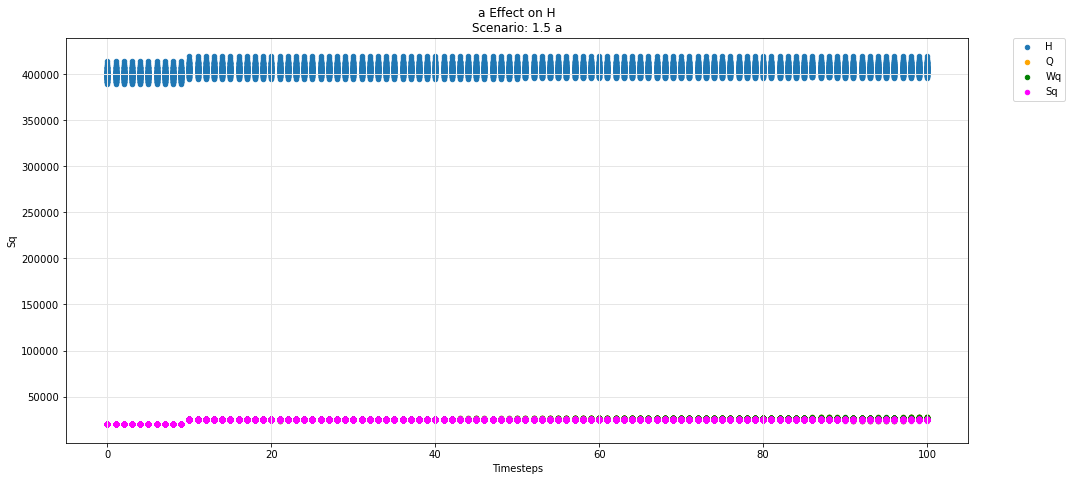

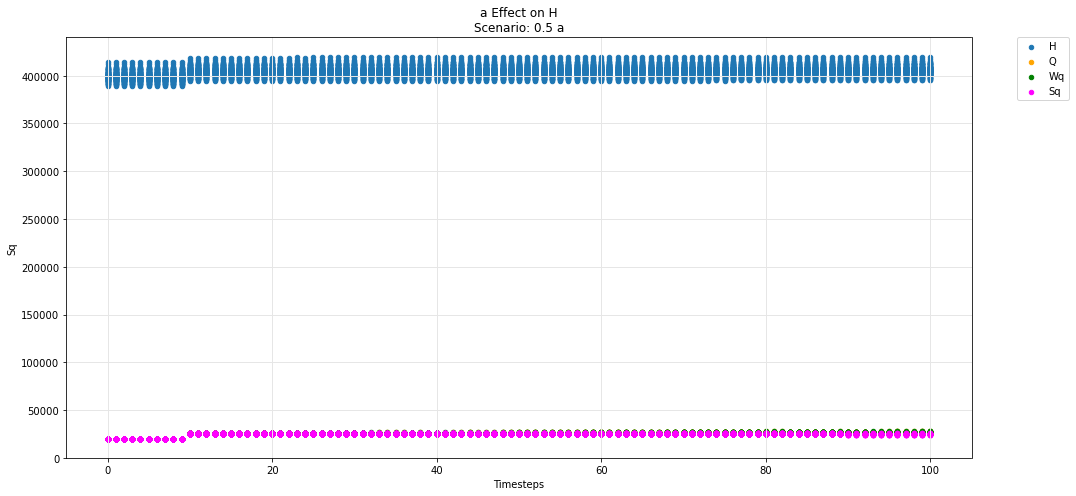

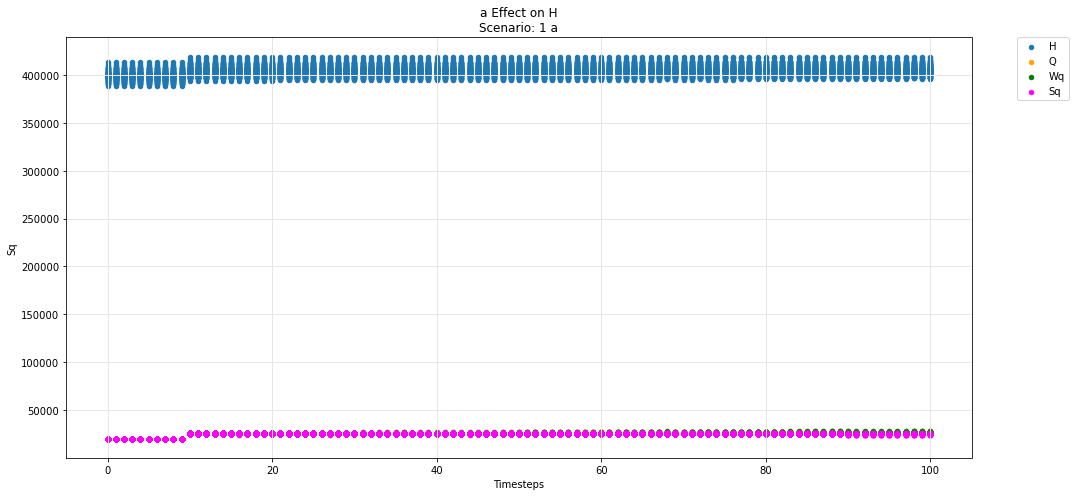

In [52]:
param_test_plot(experiments, config_ids, 'a', 'H', 'Q', 'Wq', 'Sq')

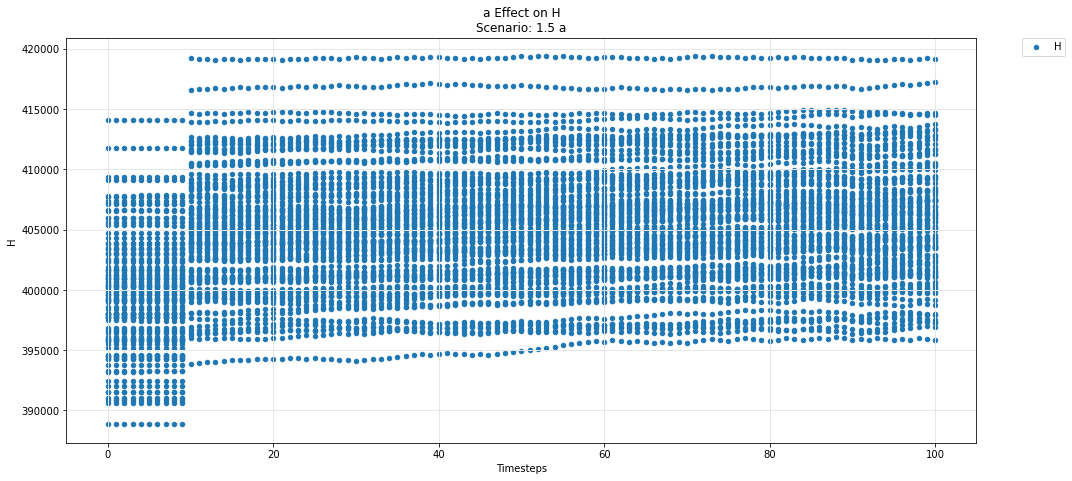

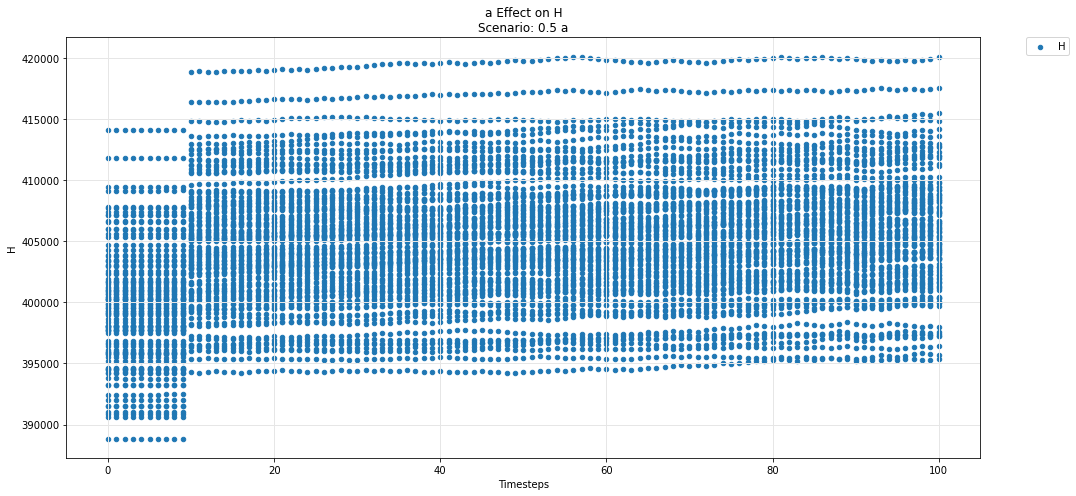

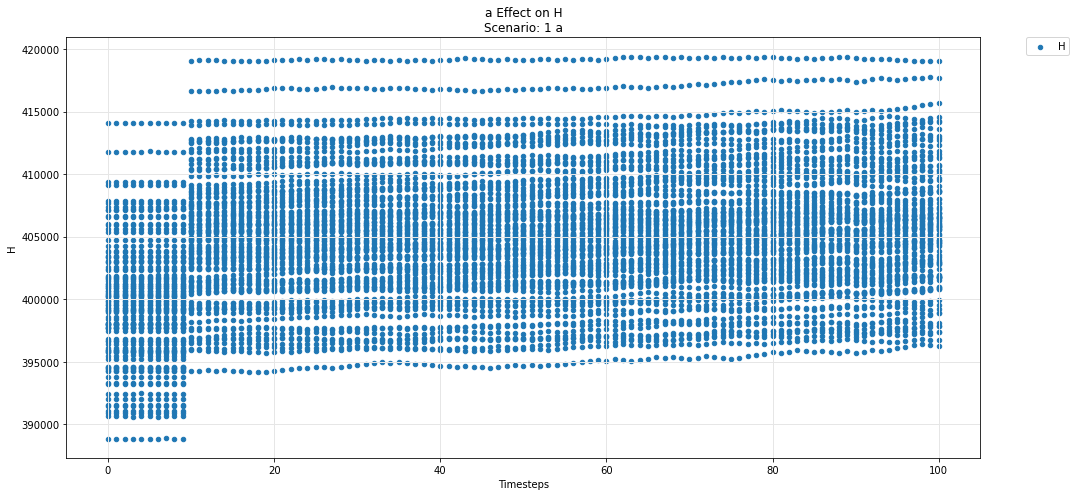

In [53]:
param_test_plot(experiments, config_ids, 'a', 'H')

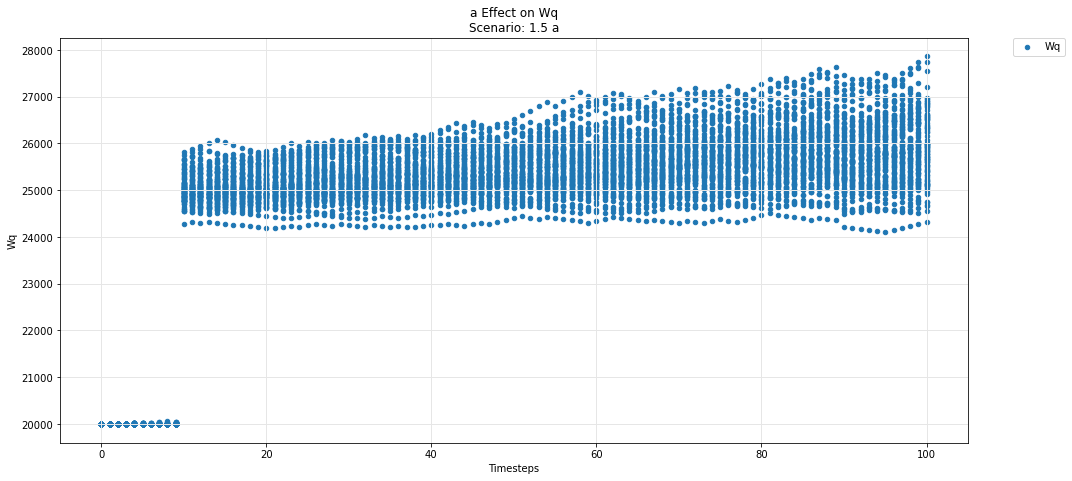

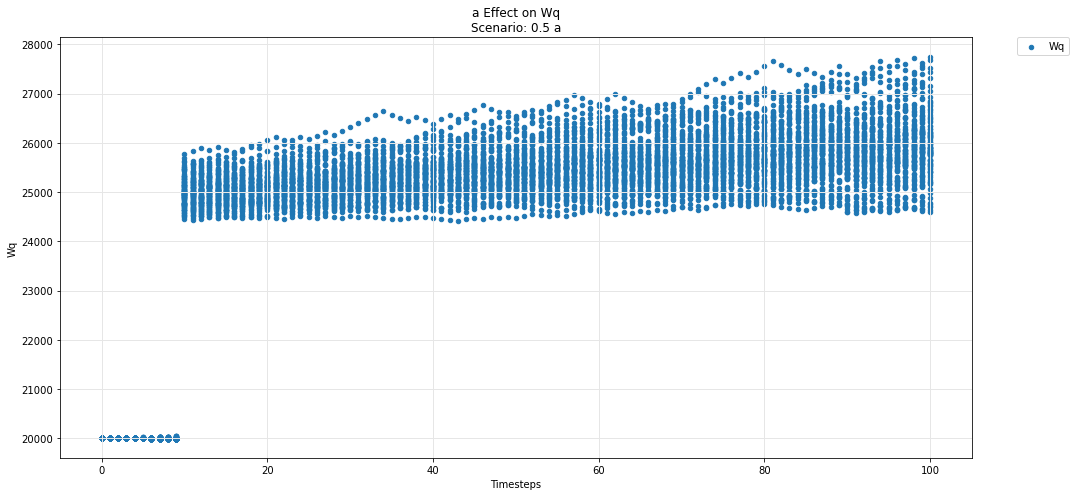

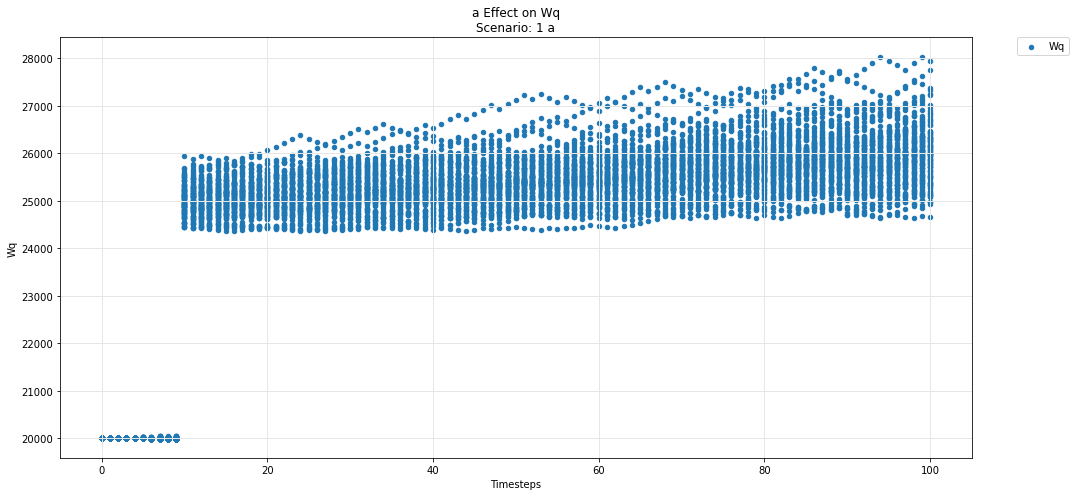

In [54]:
param_test_plot(experiments, config_ids, 'a', 'Wq')

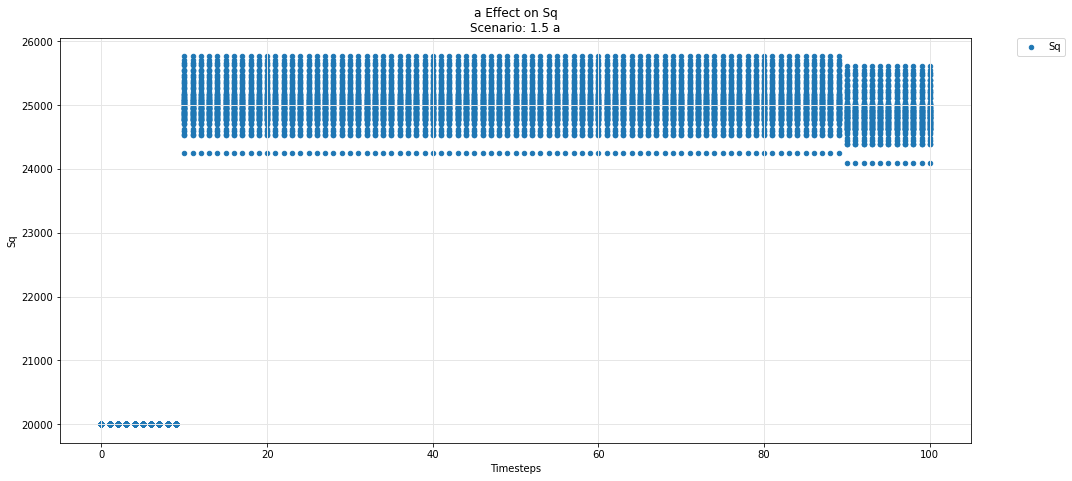

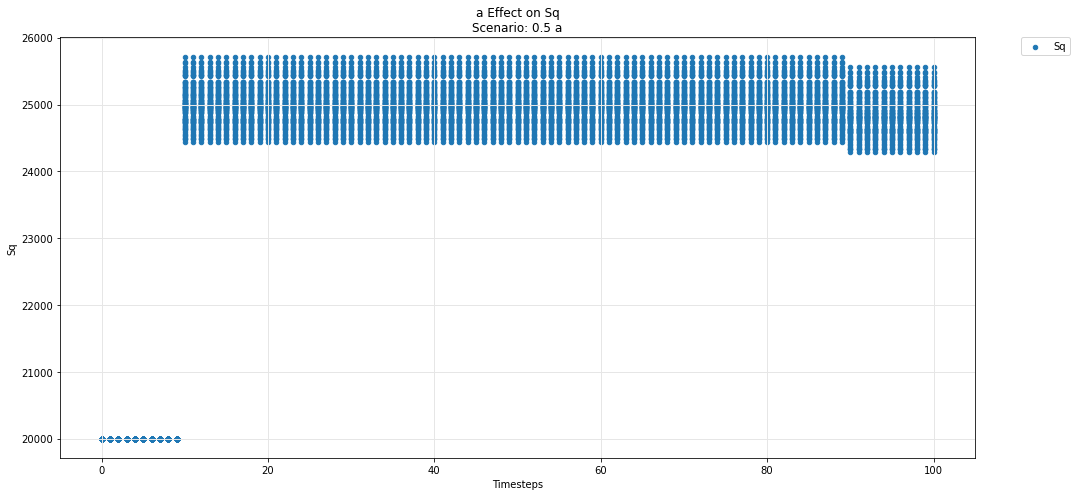

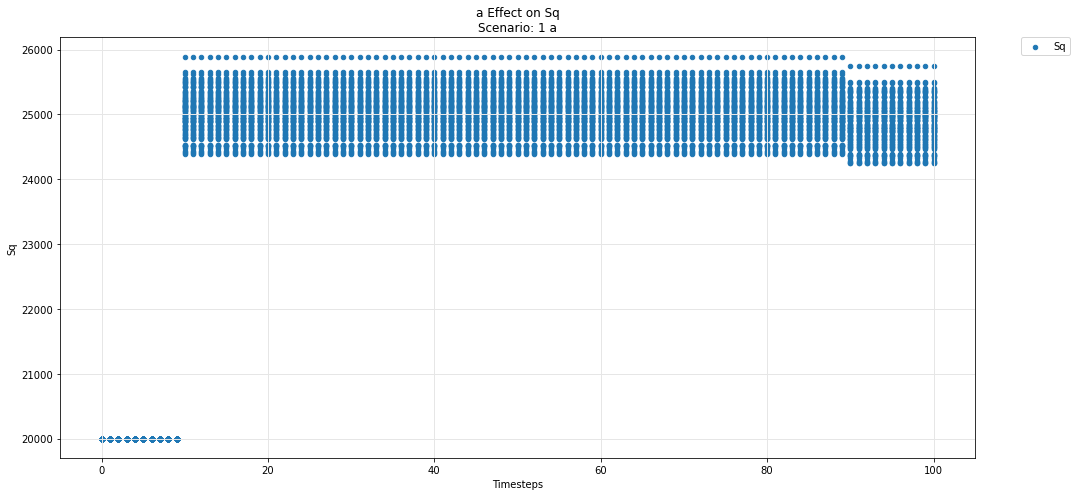

In [55]:
param_test_plot(experiments, config_ids, 'a', 'Sq')

## Hydra -- pool

Movement of the Omnipool variables
- Asset i
- Asset j
- Asset k

over the course of the simulation

In [56]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

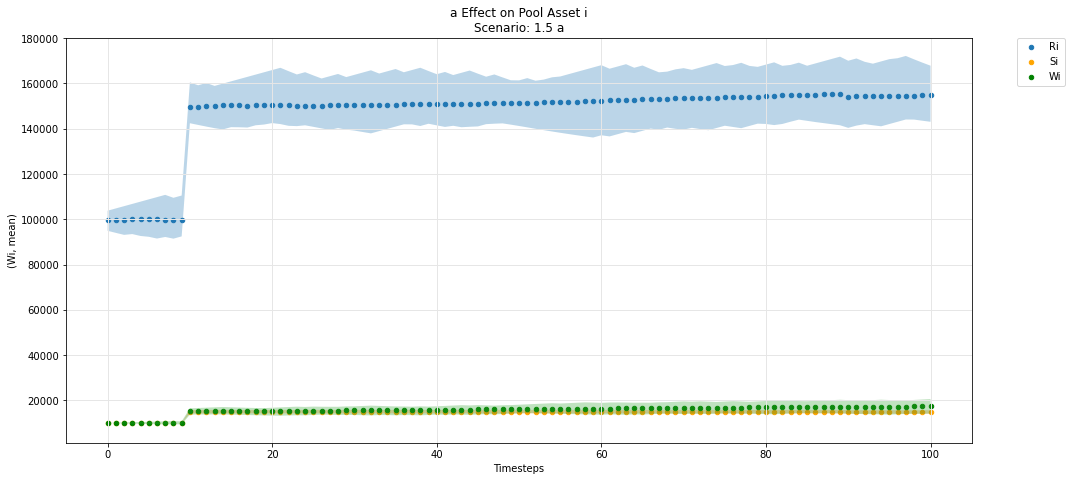

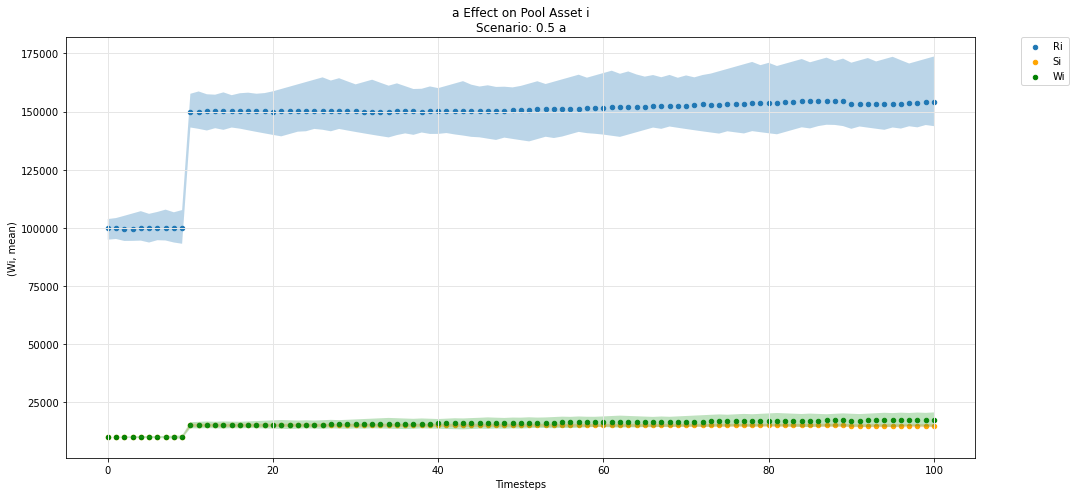

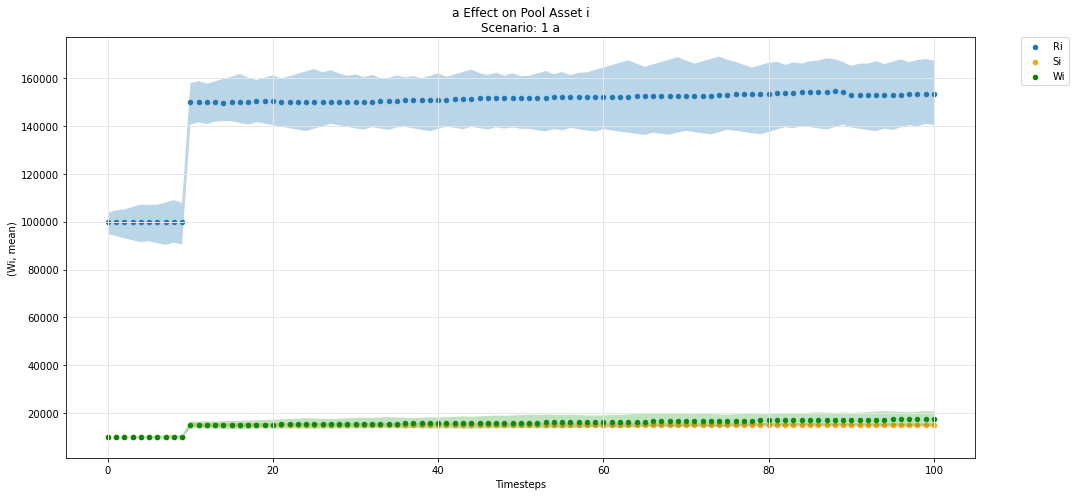

In [57]:
param_pool_simulation_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

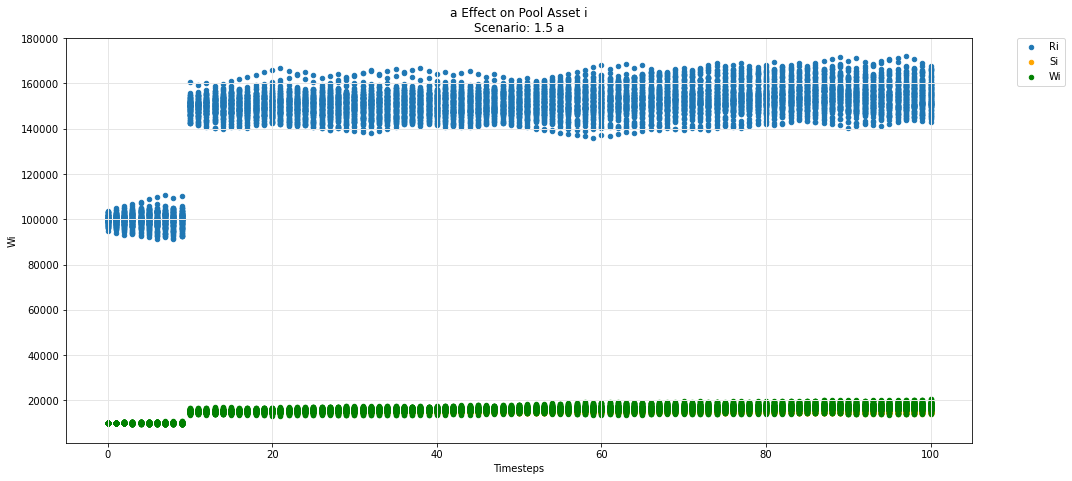

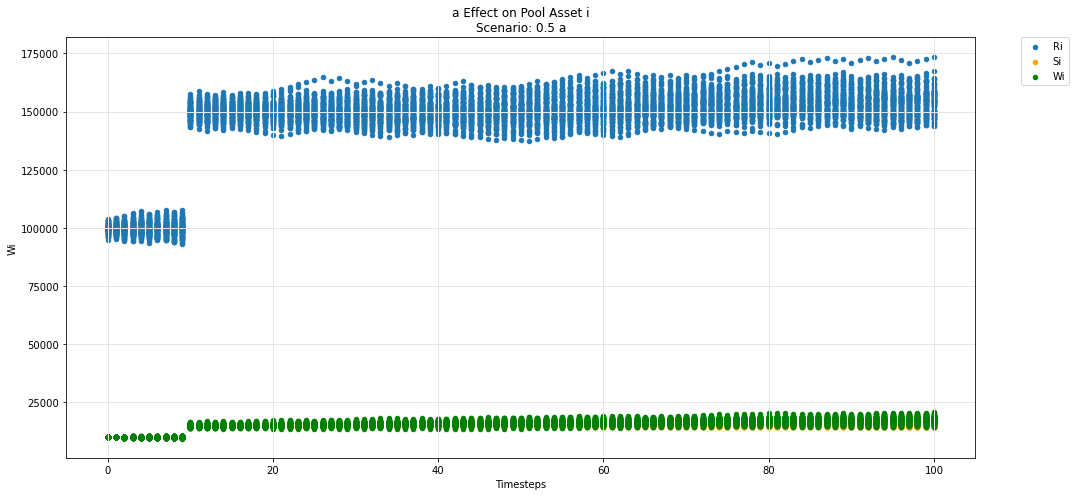

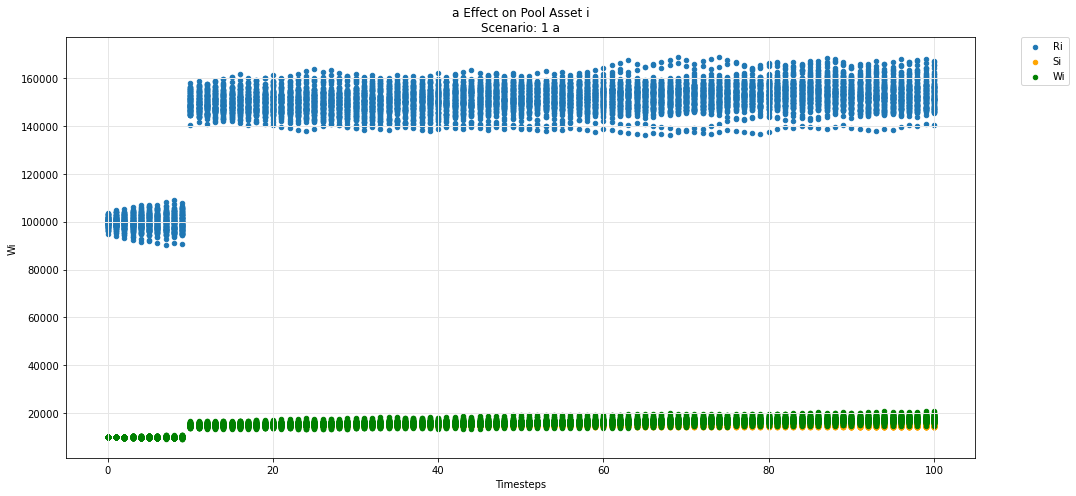

In [58]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

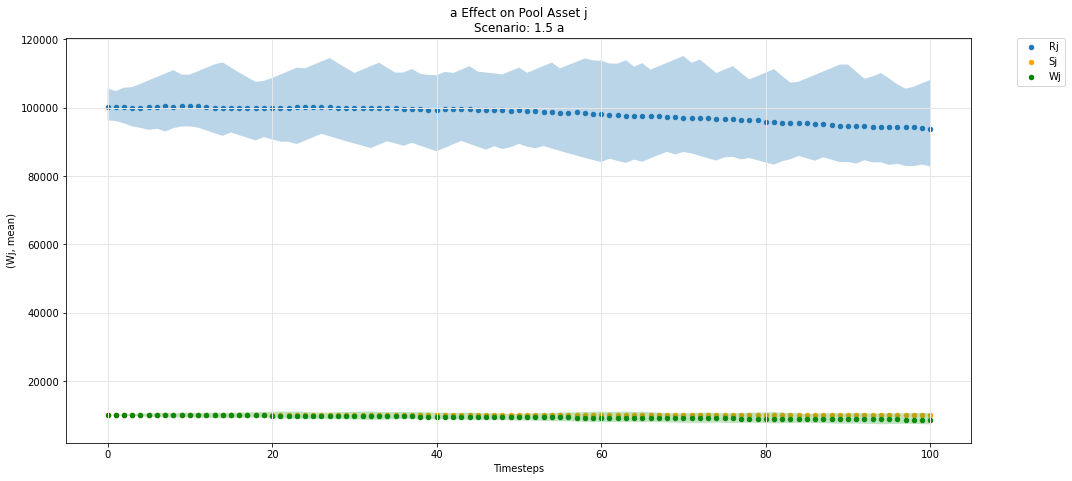

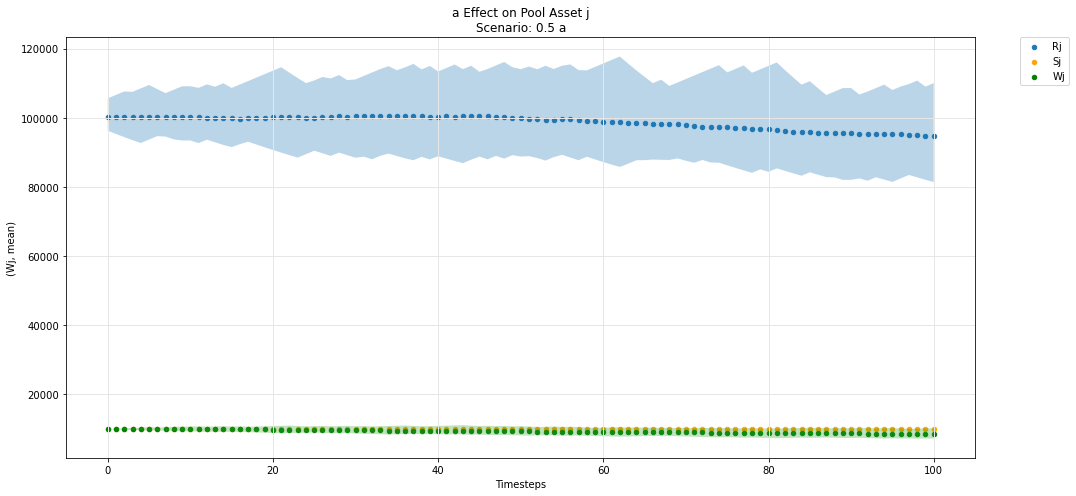

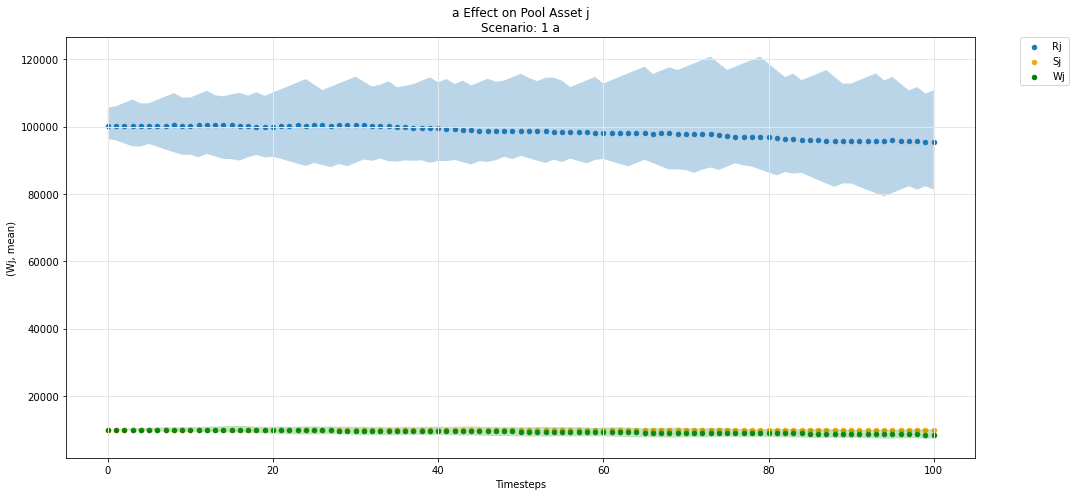

In [59]:
param_pool_simulation_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

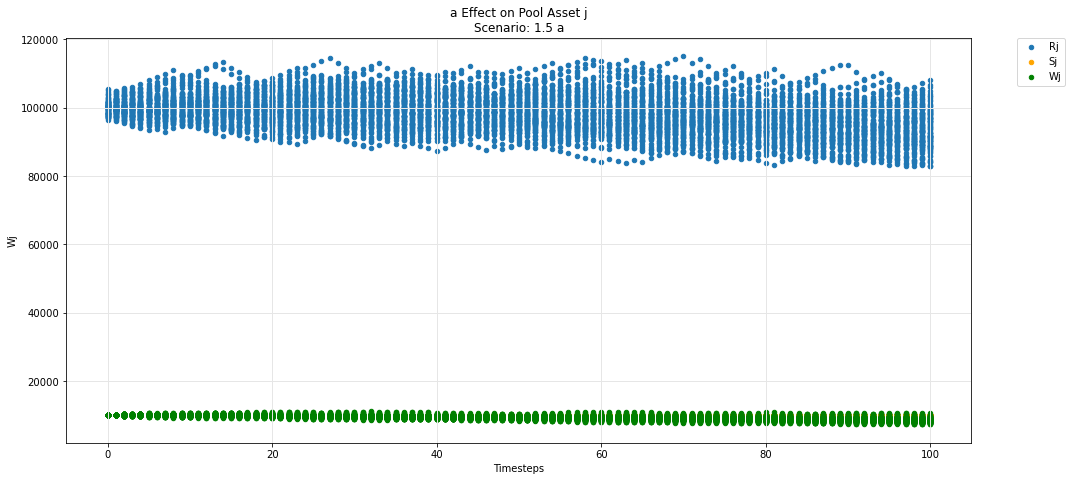

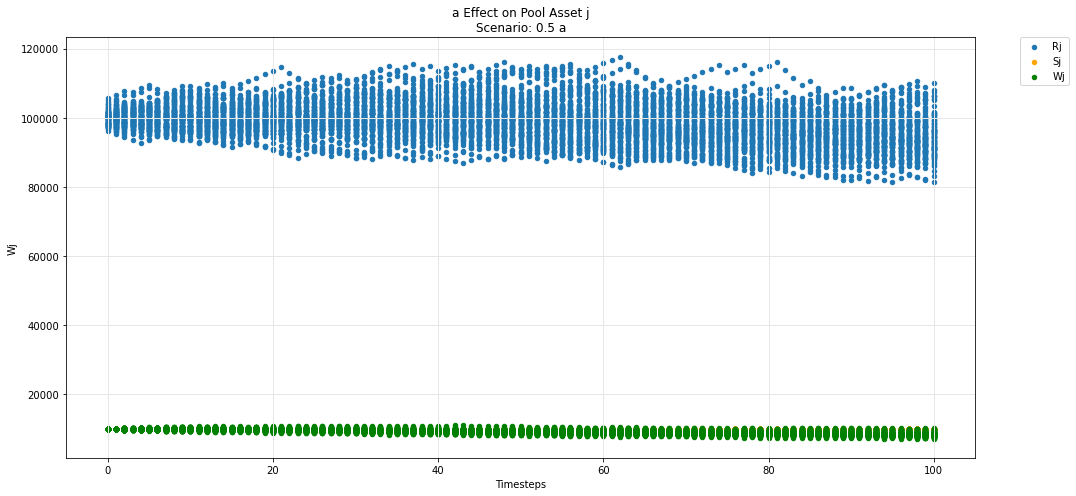

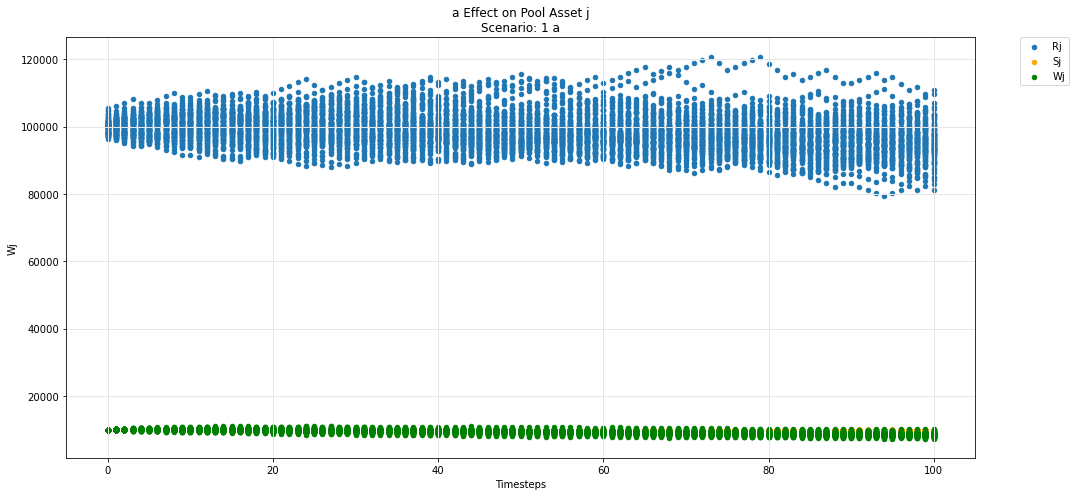

In [60]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

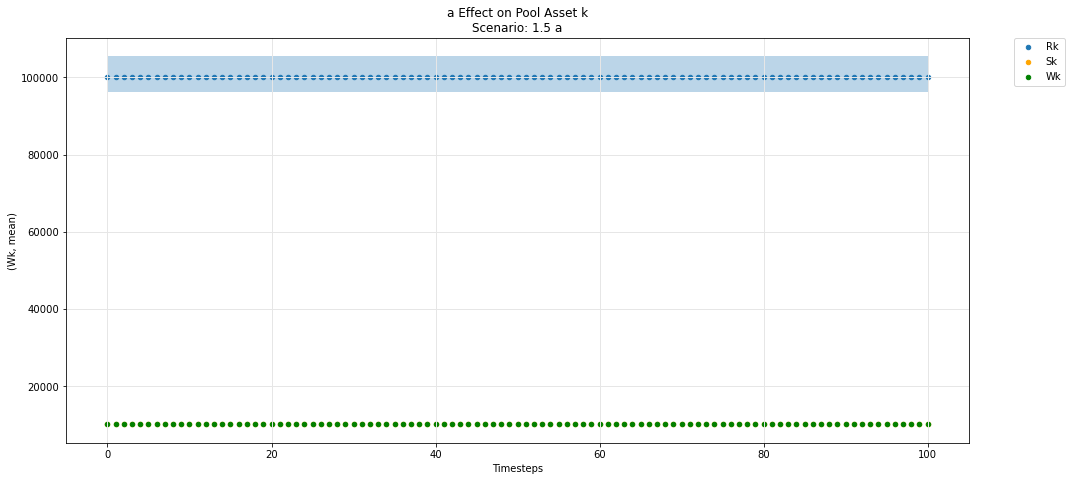

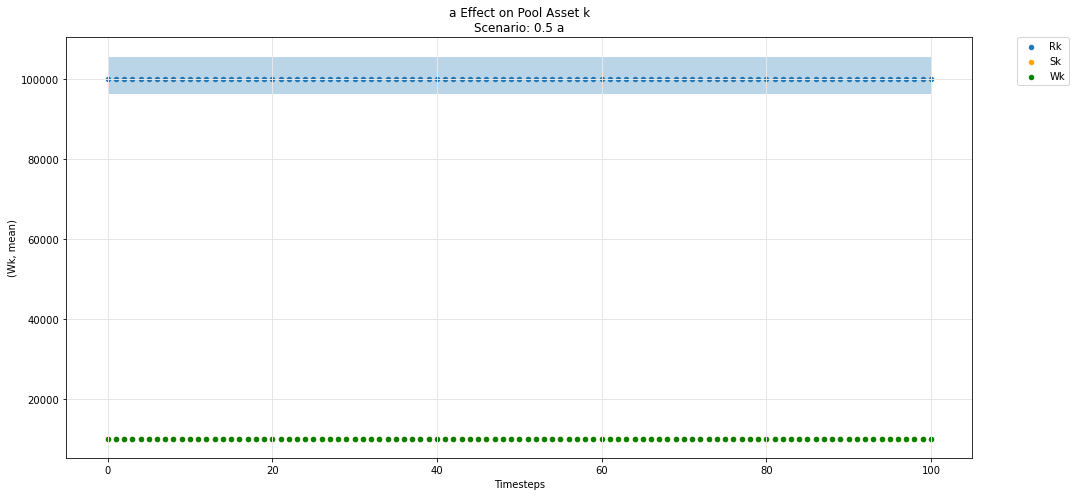

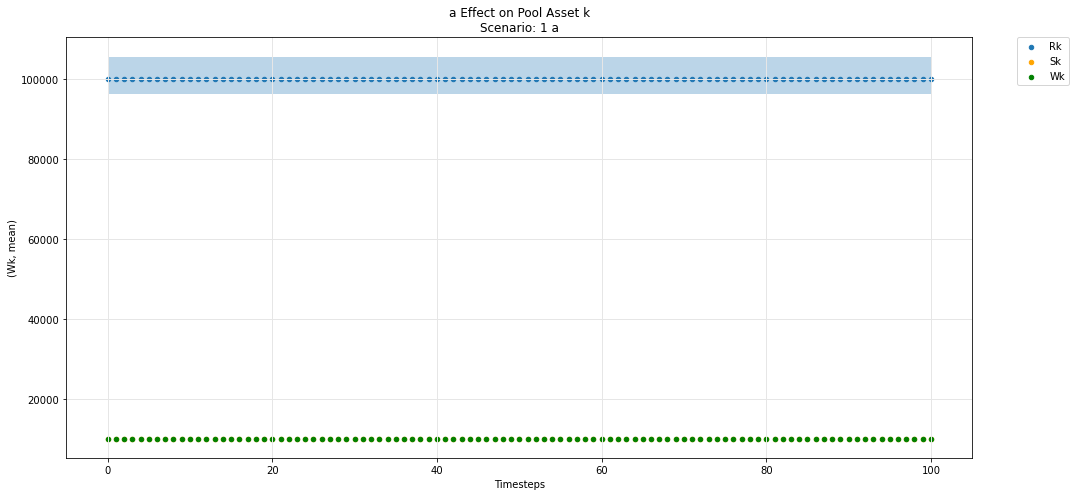

In [61]:
param_pool_simulation_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

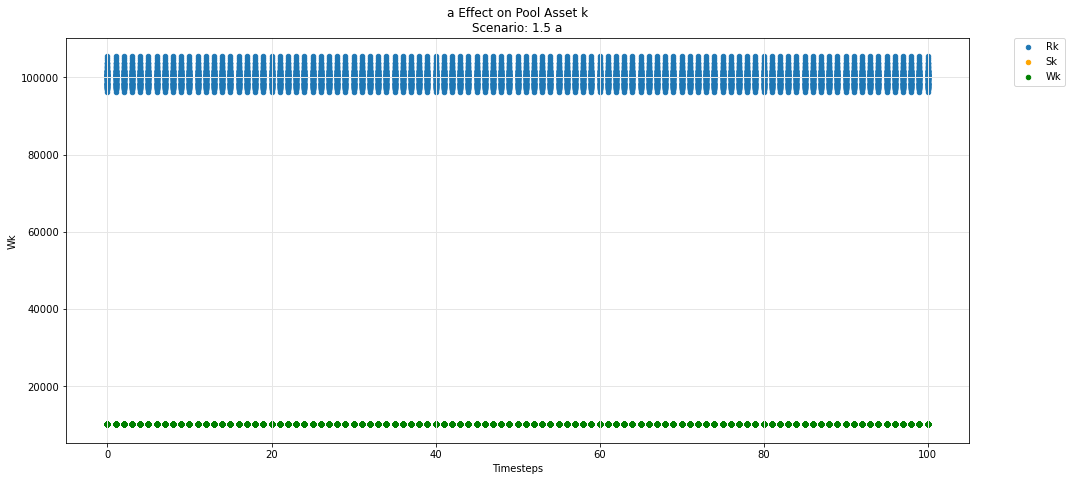

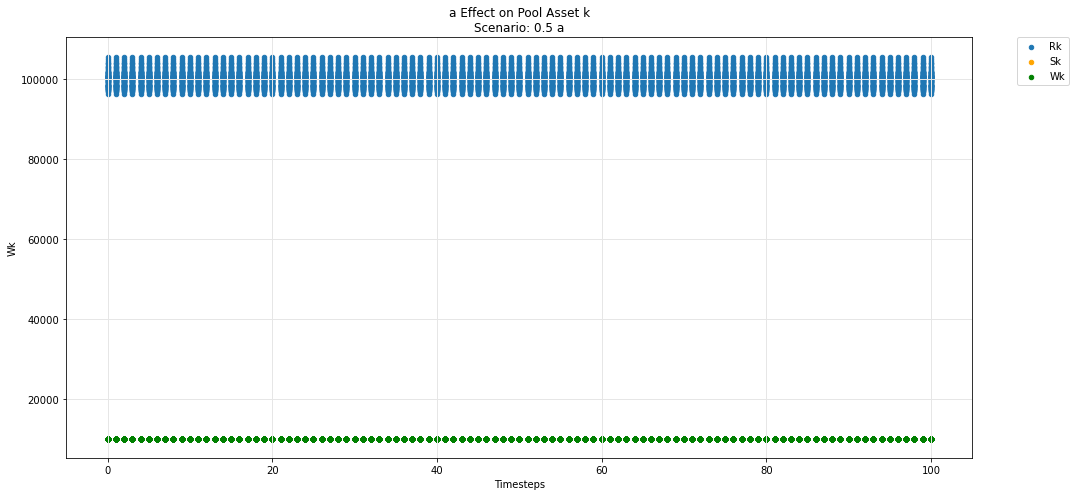

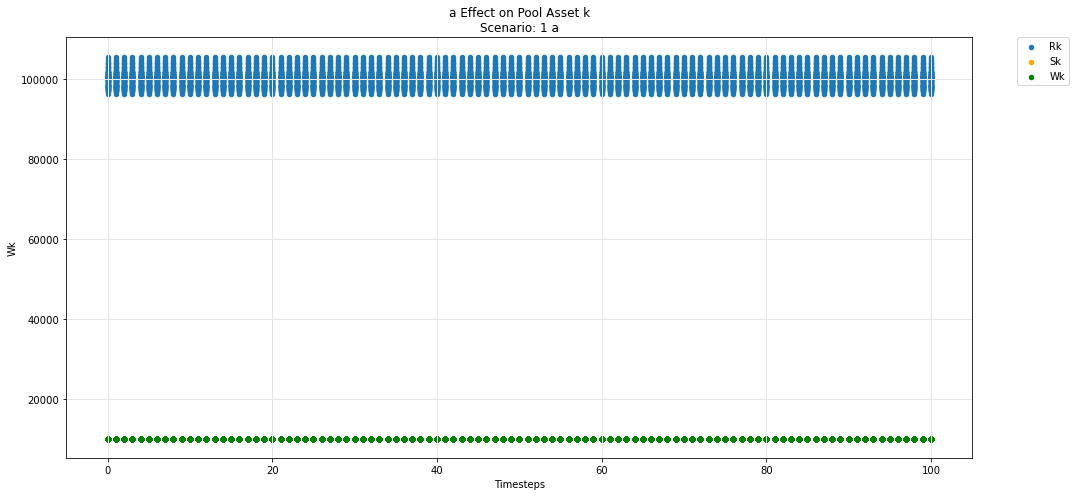

In [62]:
param_pool_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

In [63]:
def param_pool_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=df_label, label=df_label, ax=ax, legend=True, kind ='scatter')

        for count, arg in enumerate(args):
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))

            df.plot(x='timestep', y=df_arg_label, label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

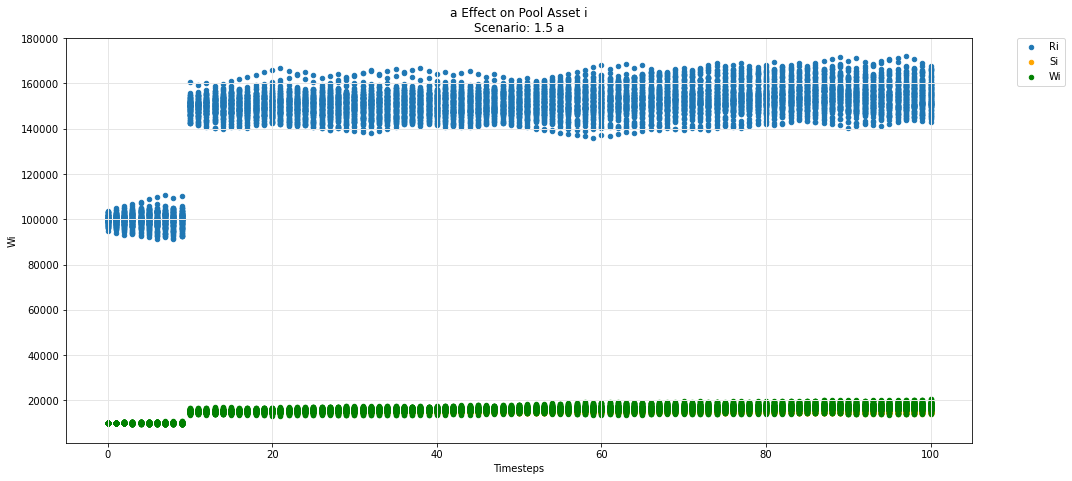

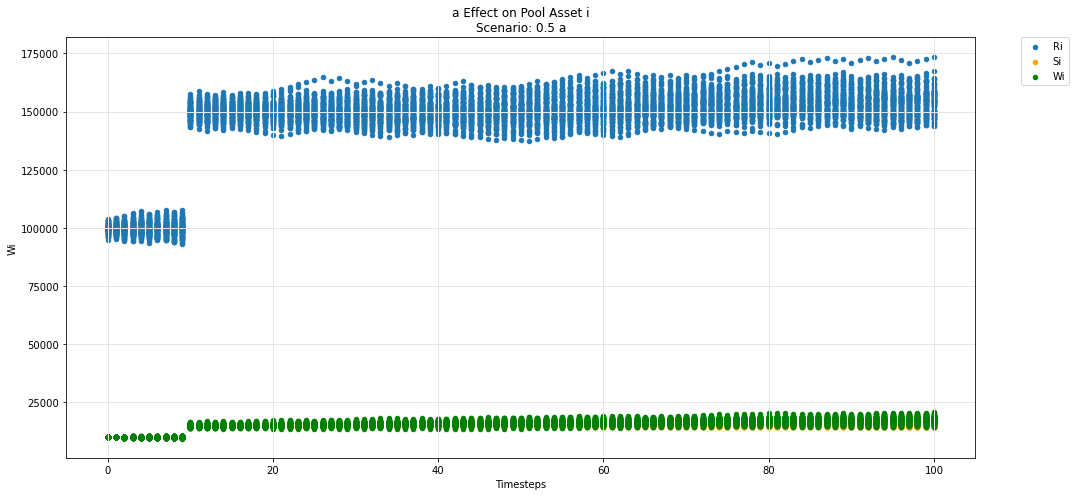

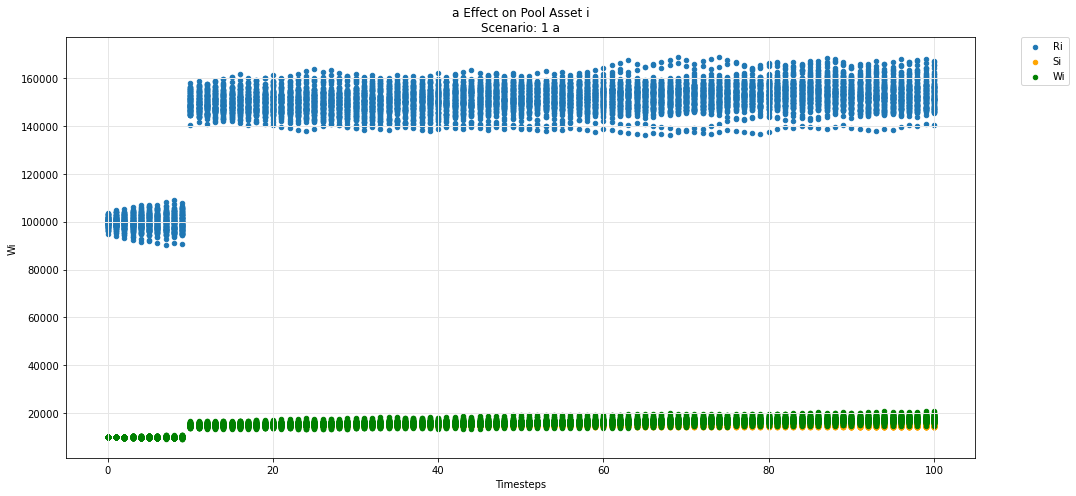

In [64]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

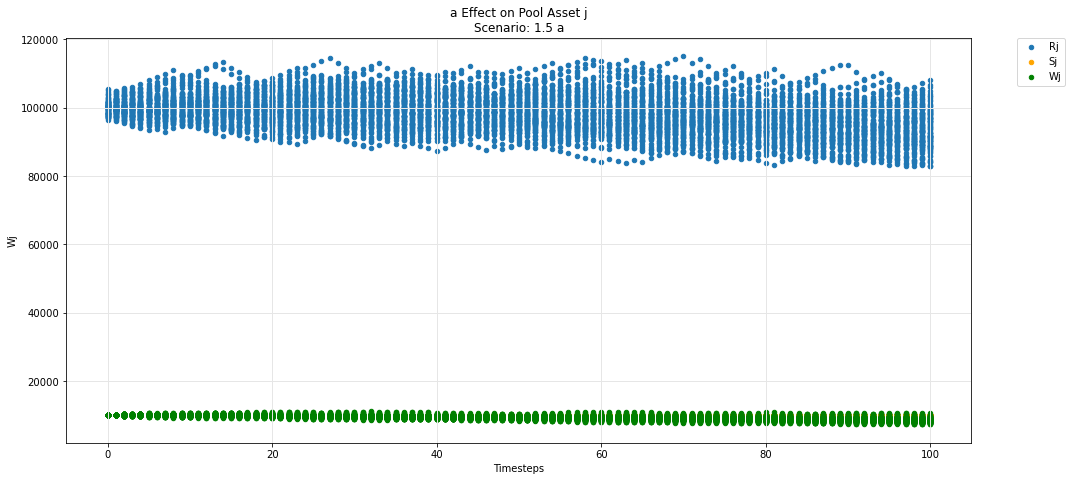

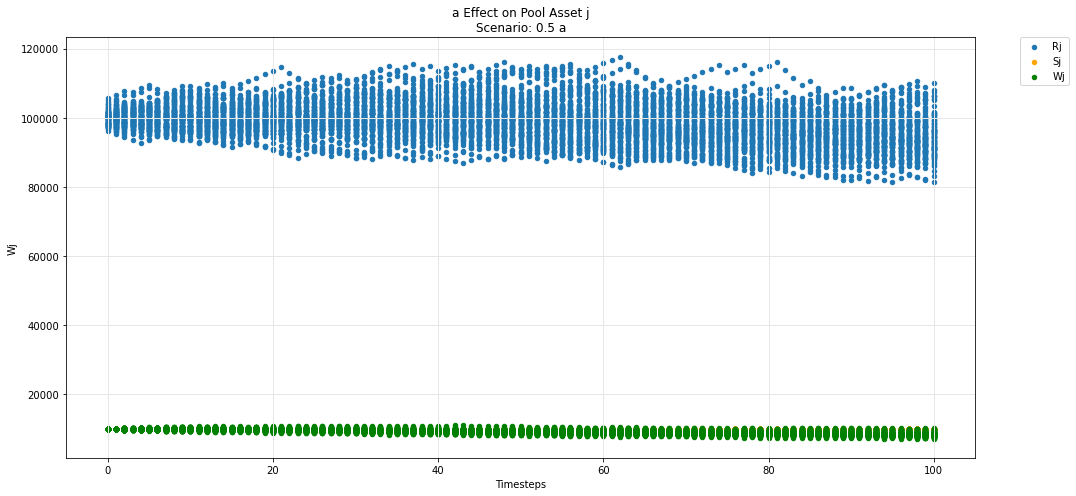

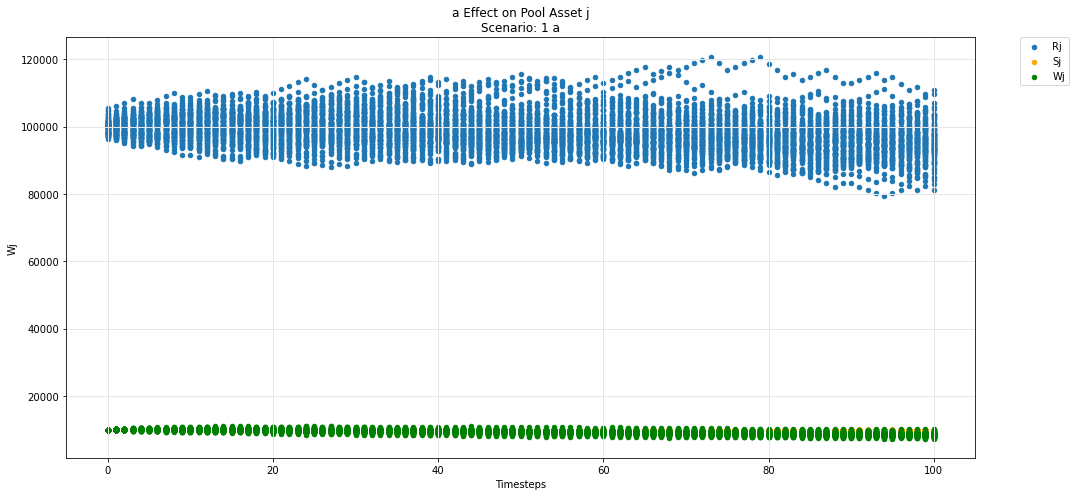

In [65]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

In [66]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

# Prices

## Uniswap

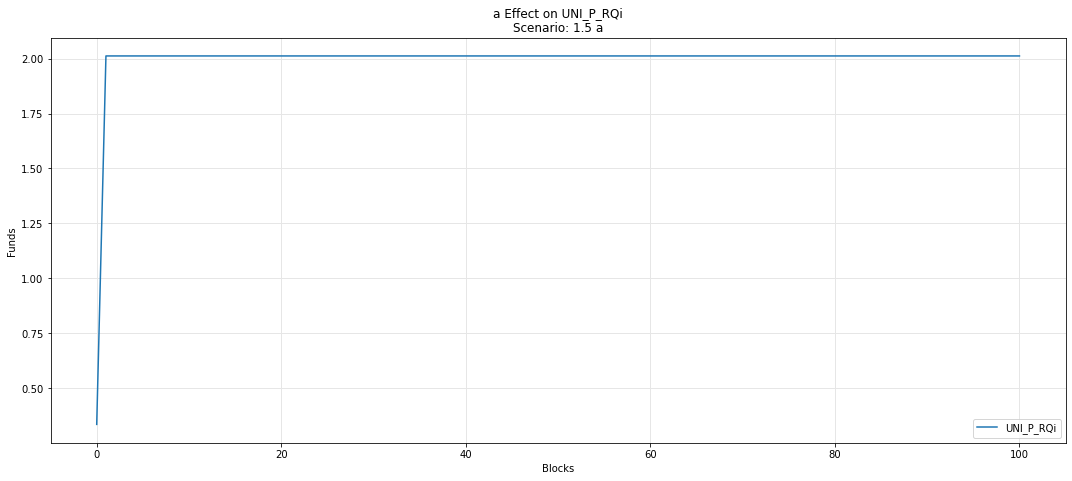

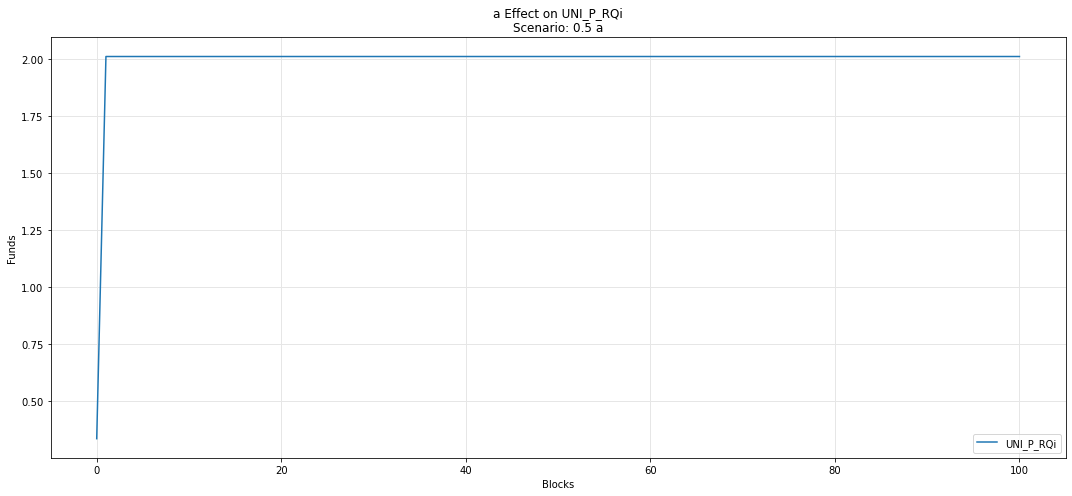

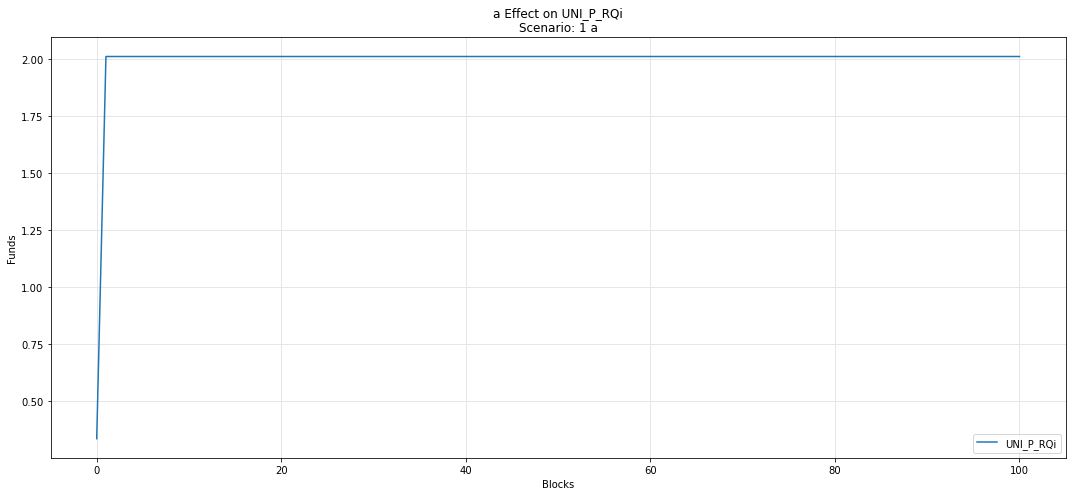

In [67]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQi')

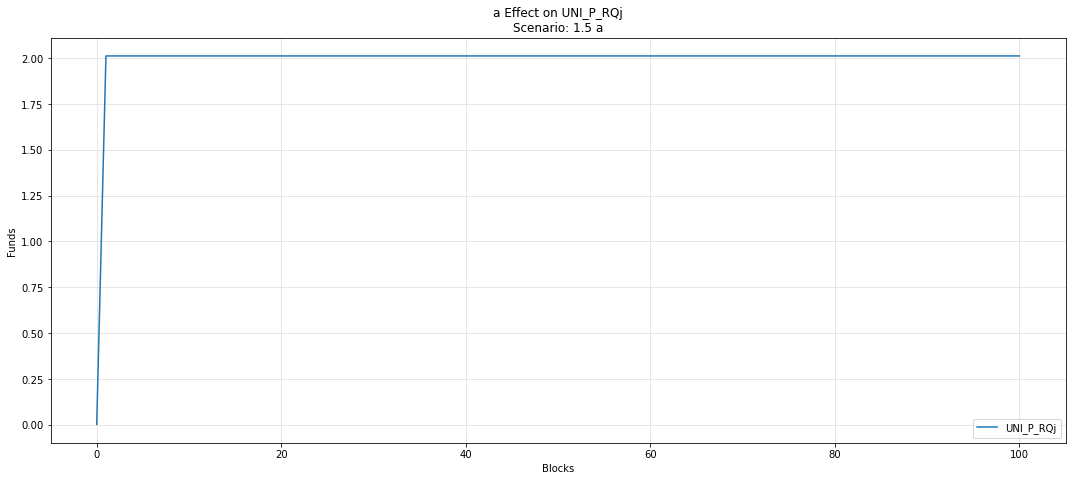

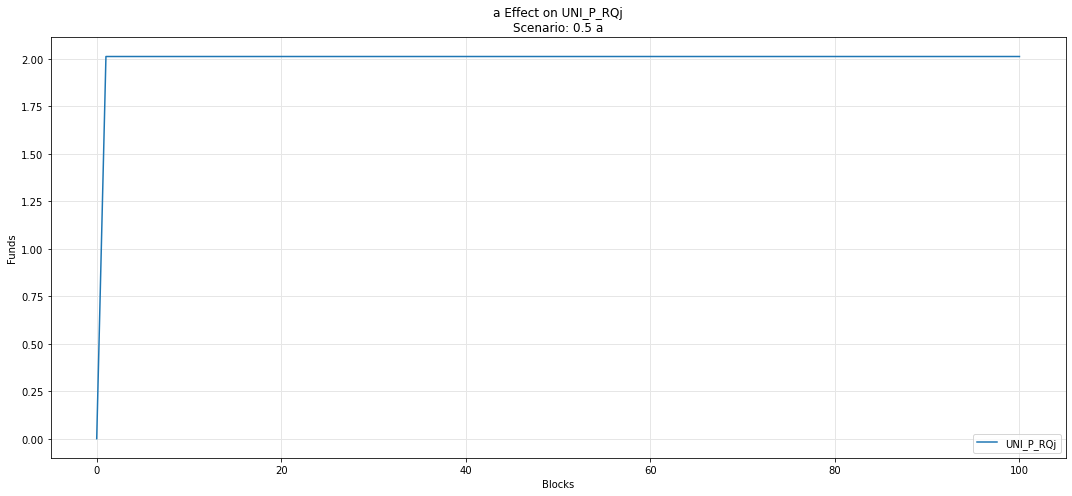

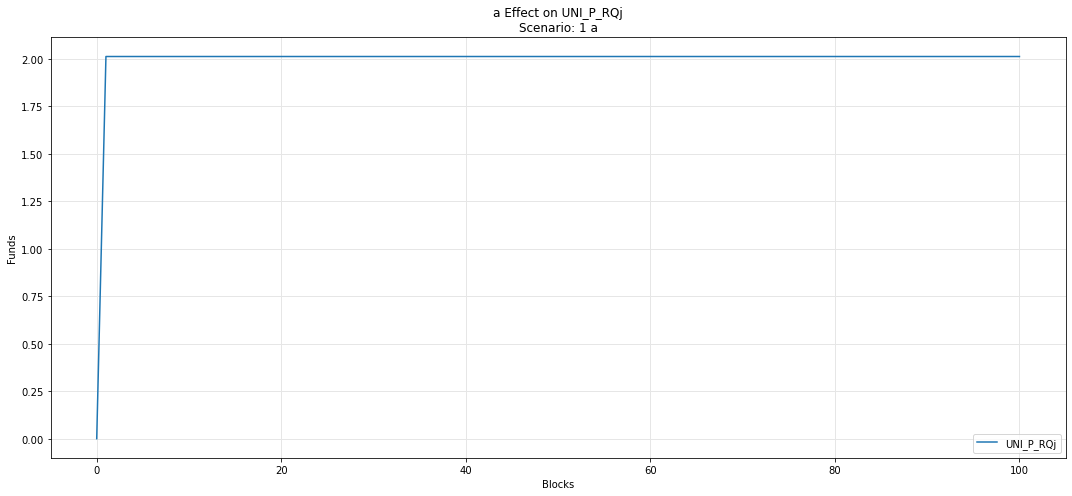

In [68]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQj')

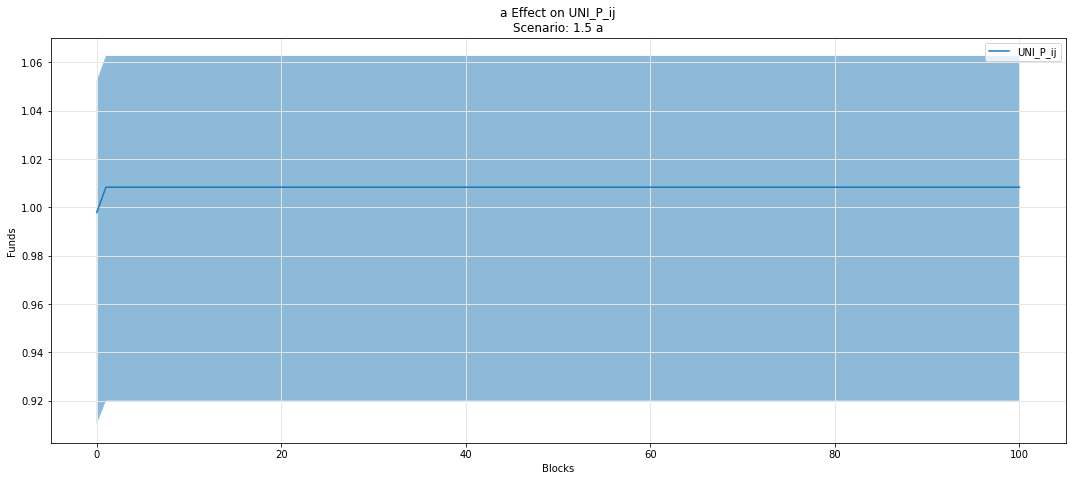

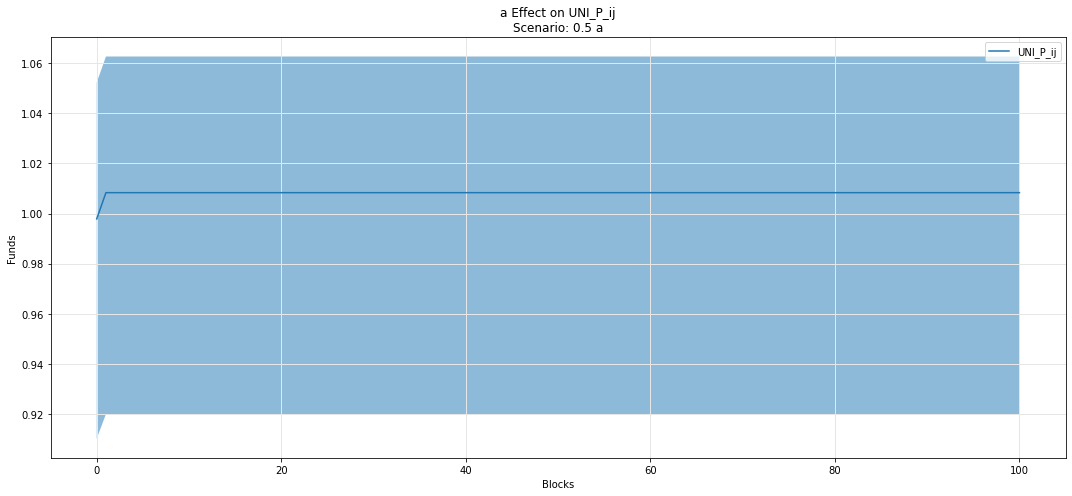

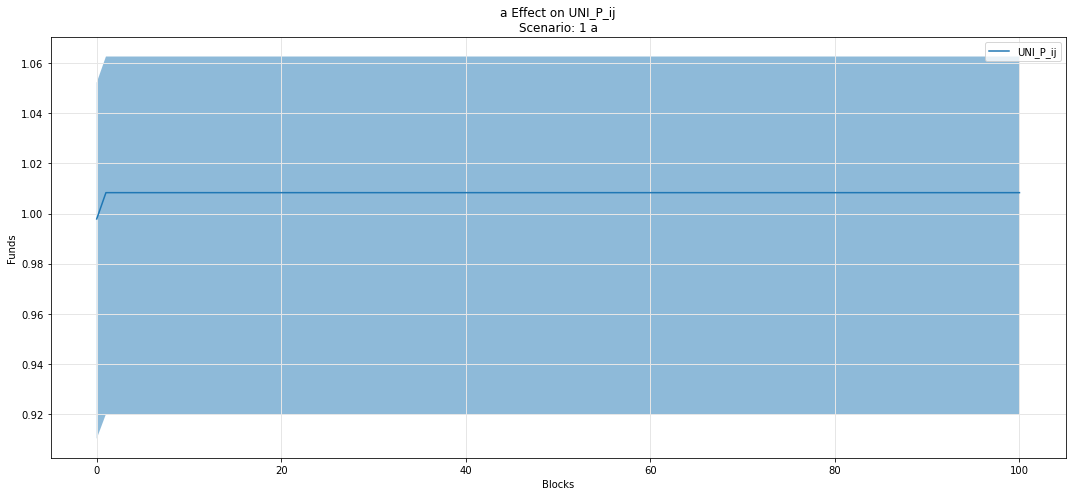

In [69]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_ij')

## Omnipool

## Asset i

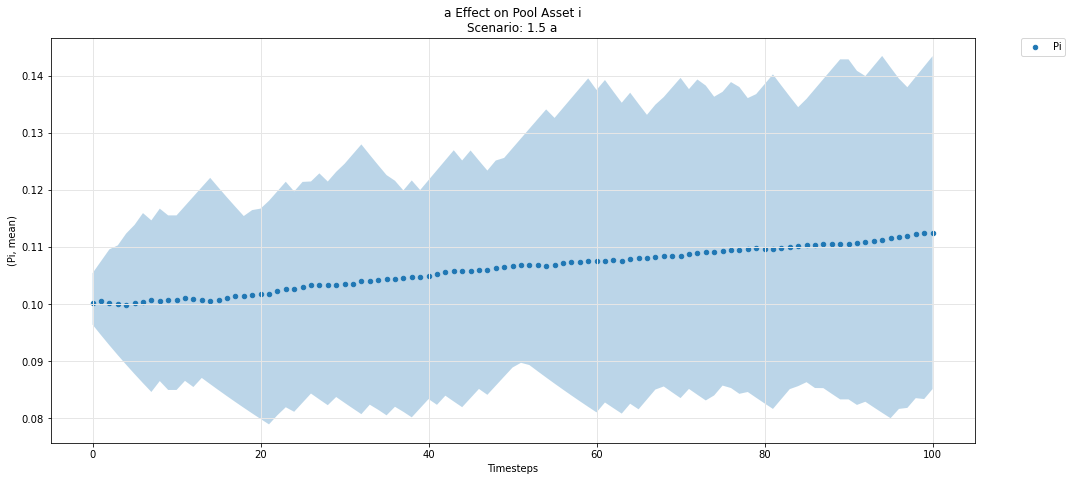

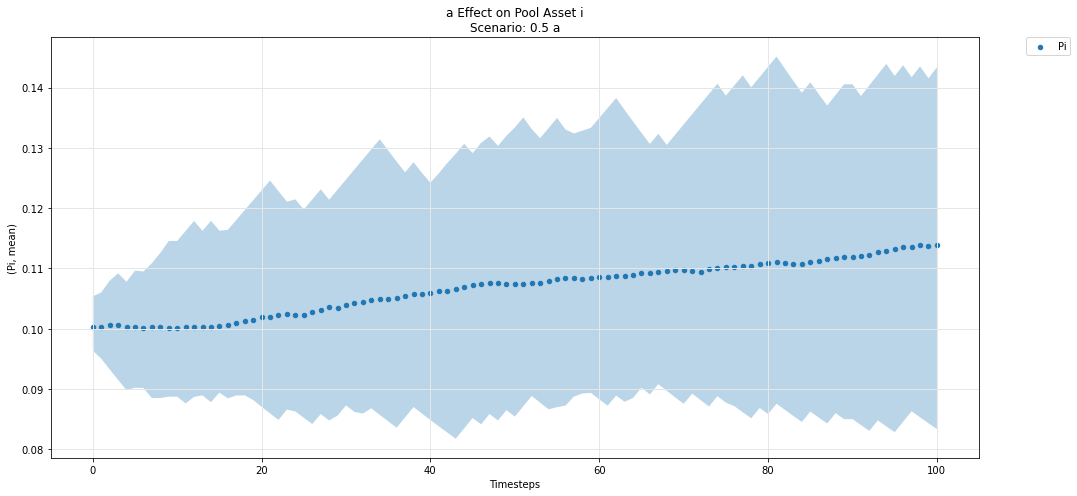

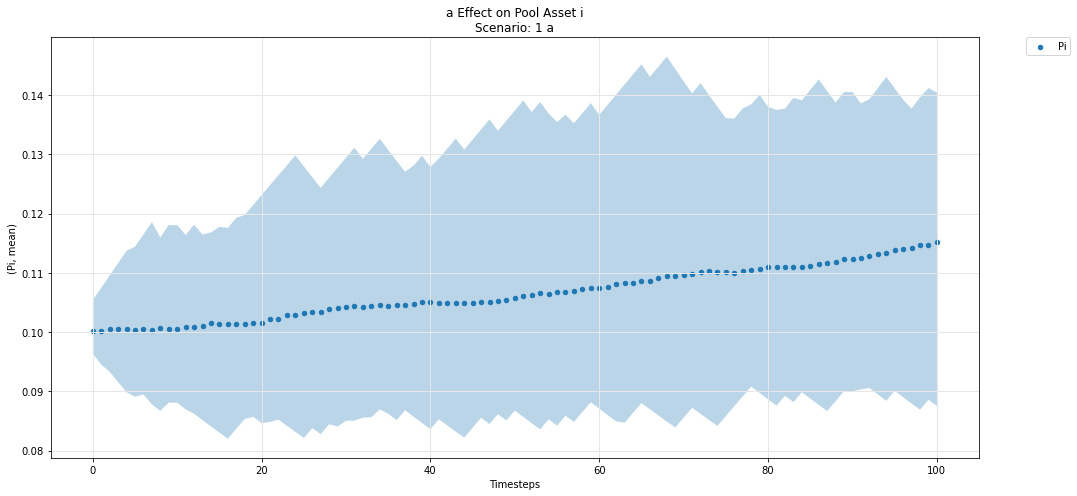

In [70]:
param_pool_simulation_plot(experiments, config_ids, 'a','i','P')

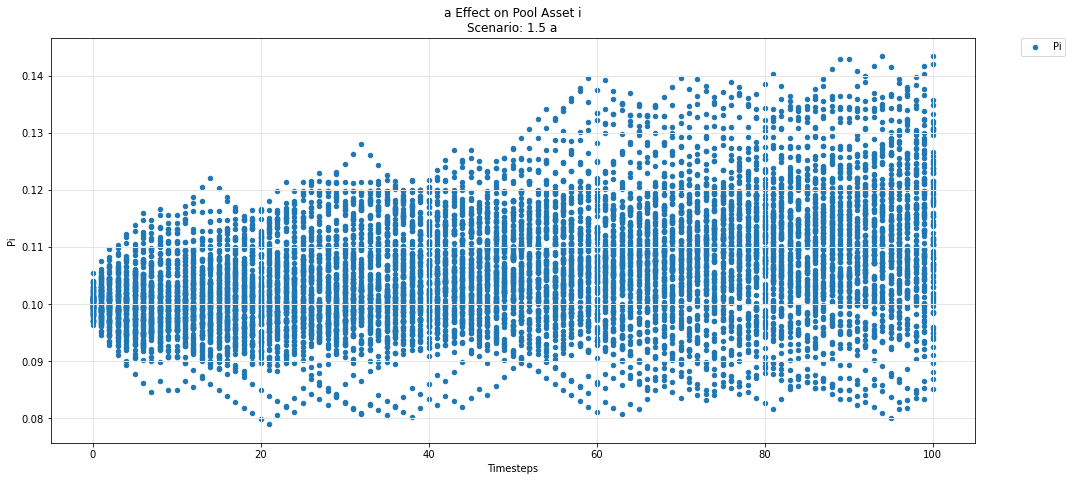

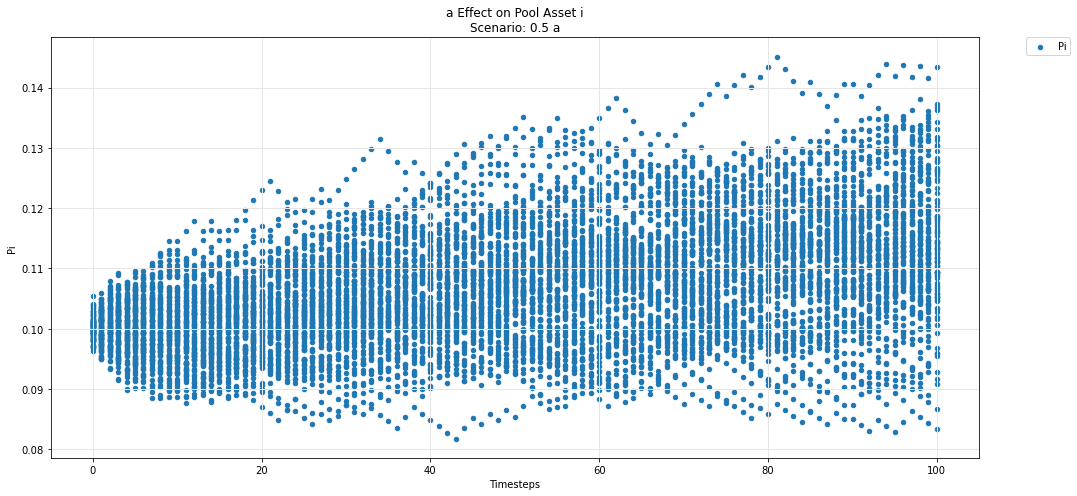

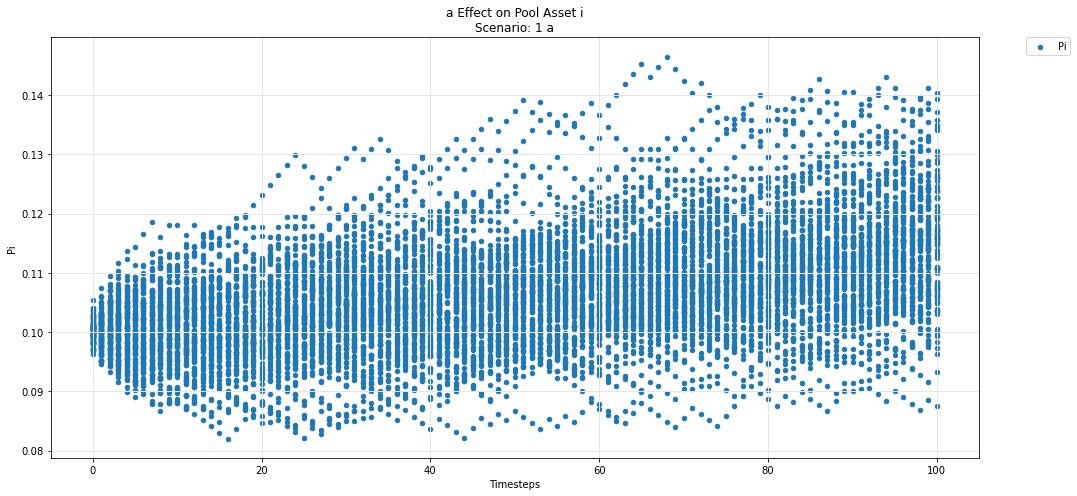

In [71]:
param_pool_plot(experiments, config_ids, 'a','i','P')

## Asset j

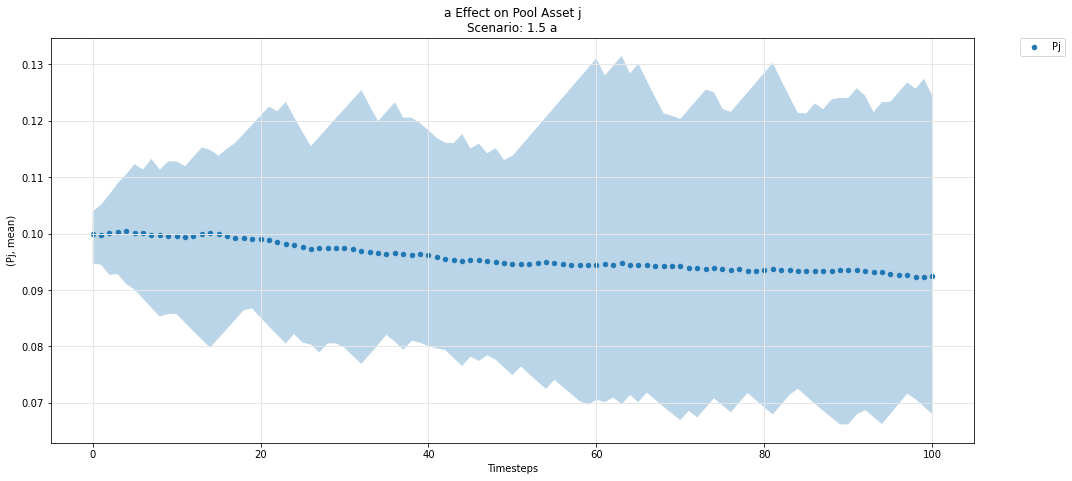

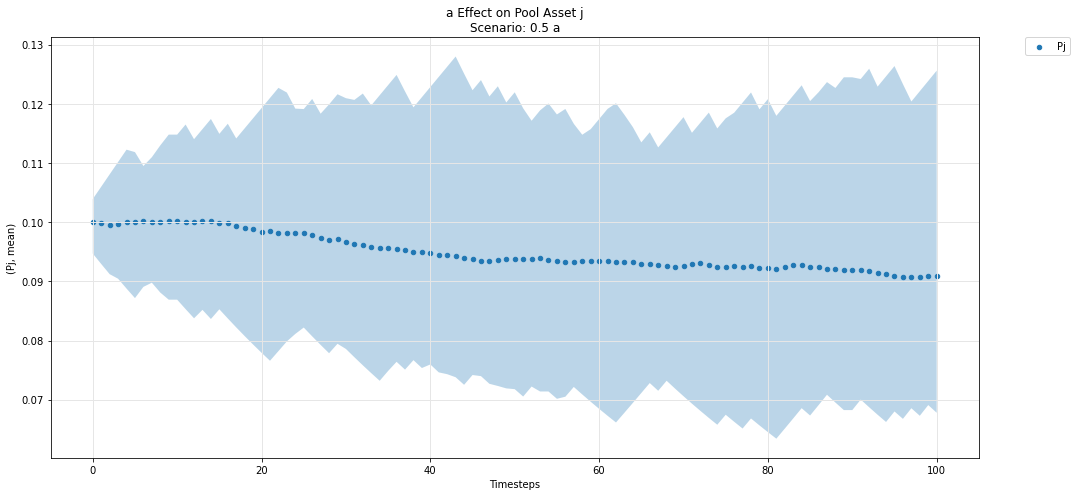

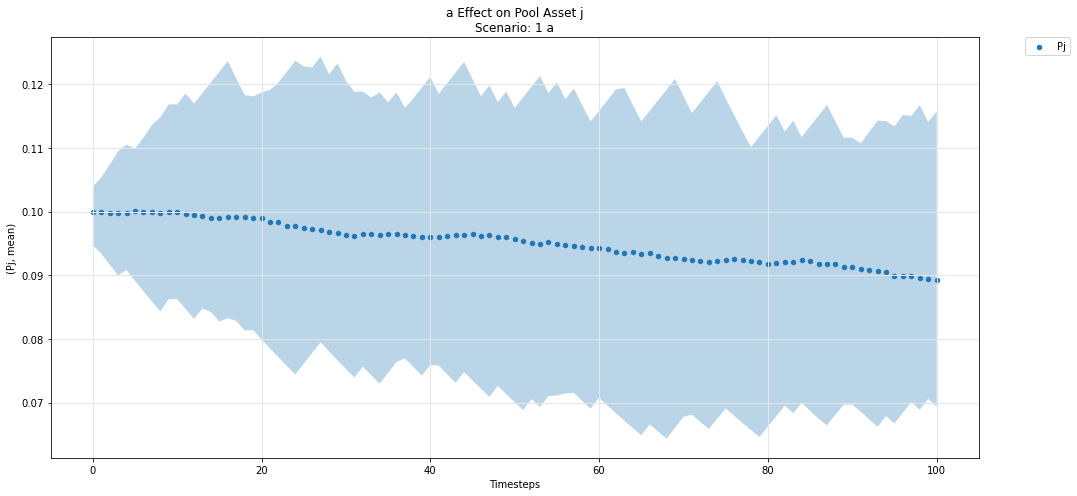

In [72]:
param_pool_simulation_plot(experiments, config_ids, 'a','j','P')

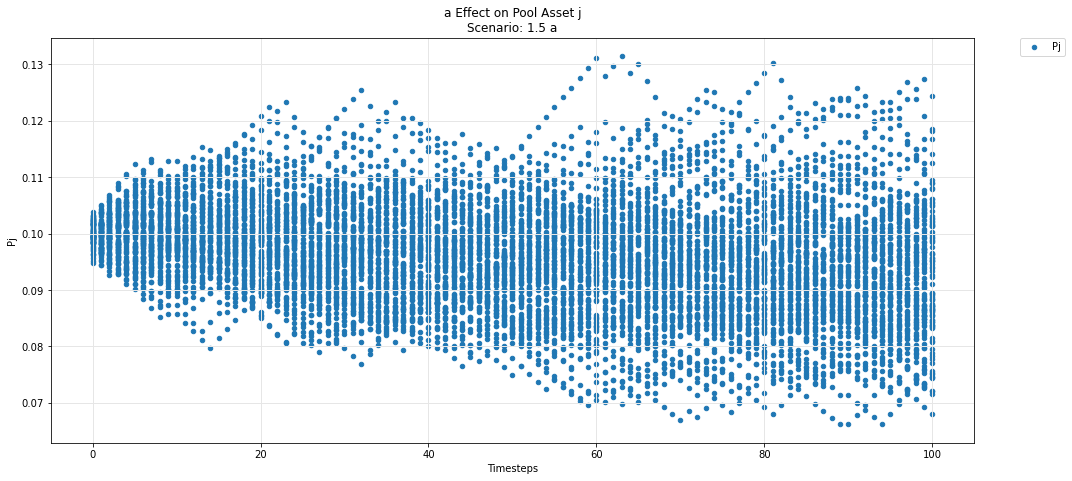

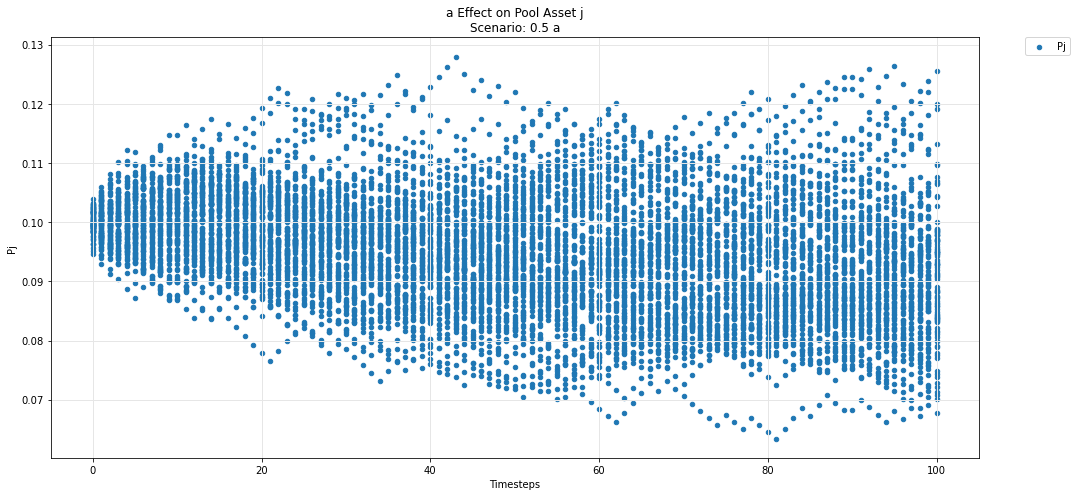

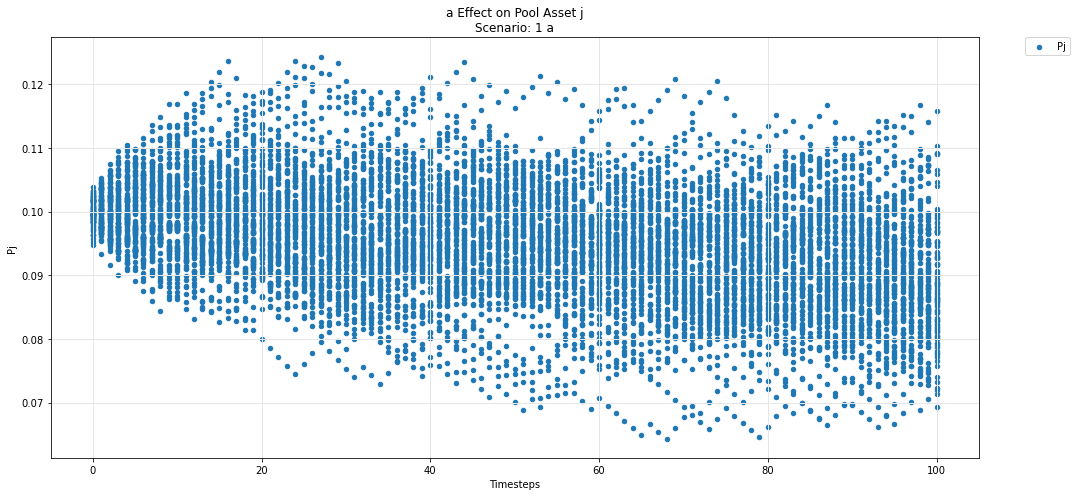

In [73]:
param_pool_plot(experiments, config_ids, 'a','j','P')

## Asset k

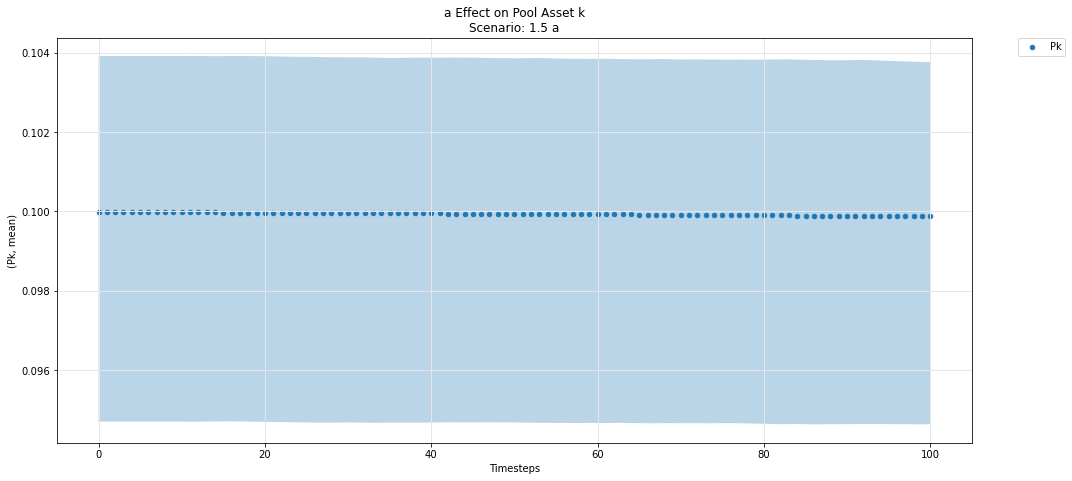

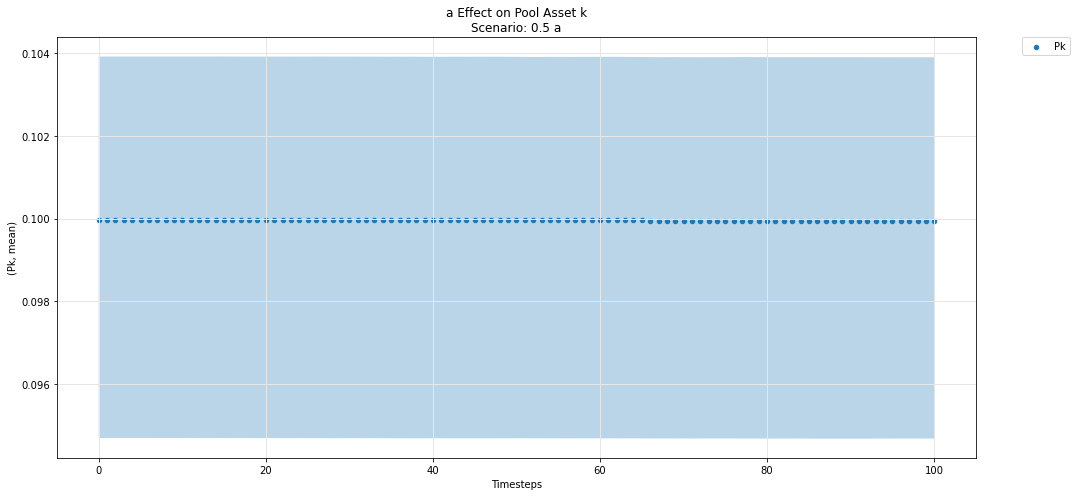

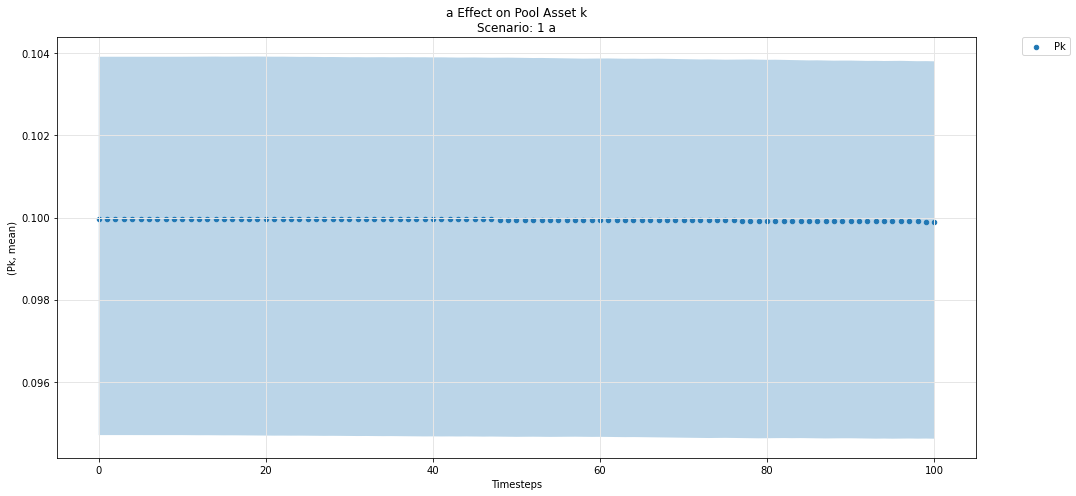

In [74]:
param_pool_simulation_plot(experiments, config_ids, 'a','k','P')

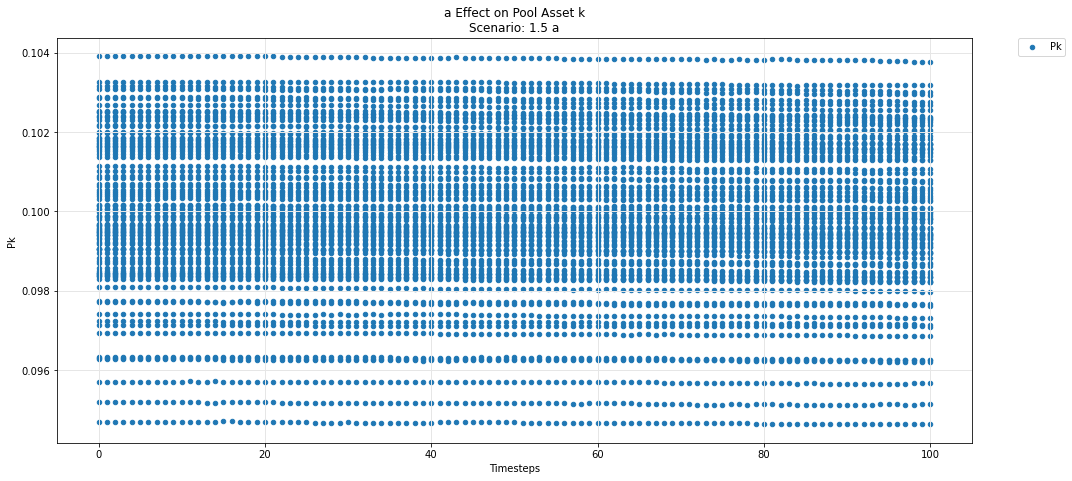

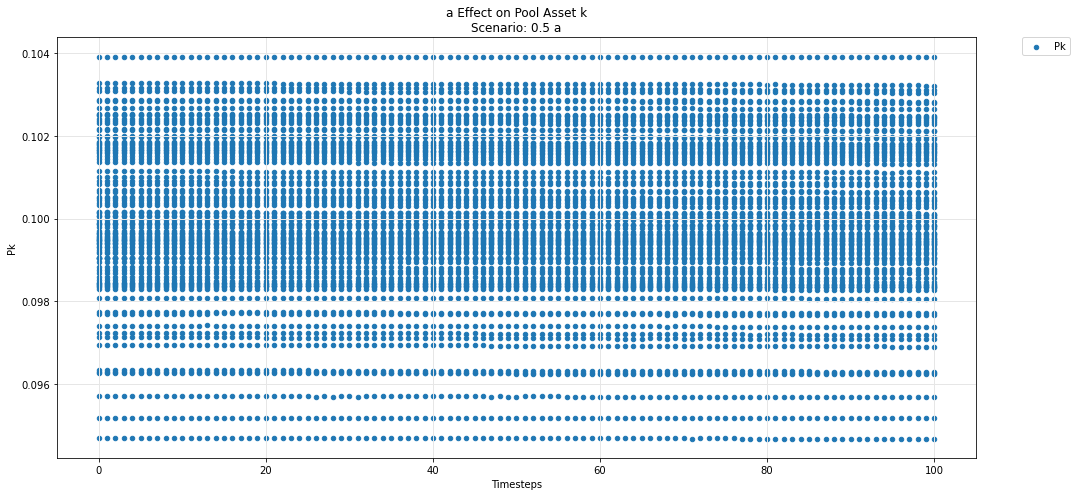

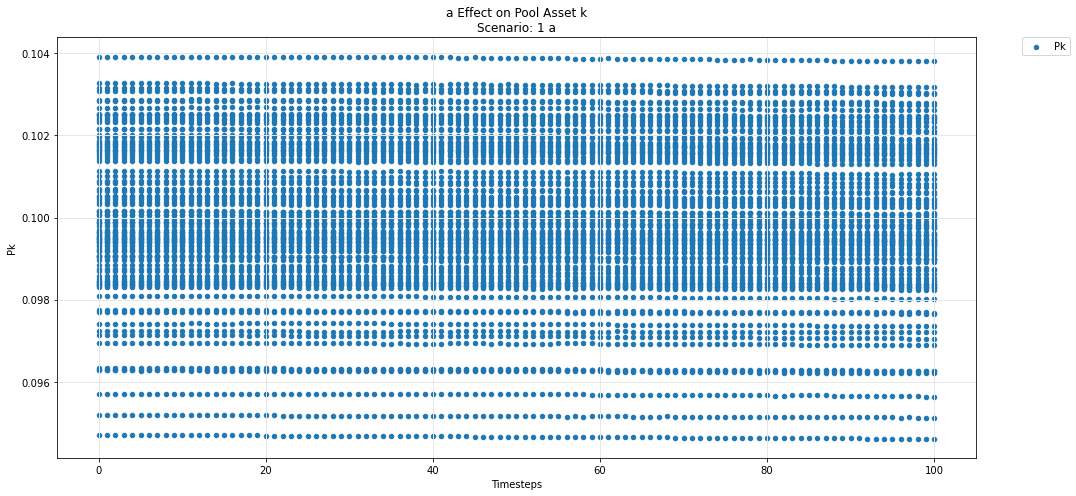

In [75]:
param_pool_plot(experiments, config_ids, 'a','k','P')